In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
import pylab as pl

# Display HTML
from IPython.core.display import display, HTML
from sklearn.neural_network import MLPClassifier


C:\Users\user\AppData\Local\Temp\ipykernel_11872\3318437670.py:19: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
data = pd.read_csv('CIC 2017-cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('Label', axis=1)
y = data['Label']
print (X.shape)
print (y.shape)

(50242, 78)
(50242,)



Classifier: KNN
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2063
           1       0.99      1.00      1.00      1353
           2       0.99      1.00      1.00       996
           3       1.00      1.00      1.00      1668
           4       0.96      0.98      0.97       207
           5       1.00      0.99      1.00      1378
           6       1.00      1.00      1.00      2384

    accuracy                           1.00     10049
   macro avg       0.99      0.99      0.99     10049
weighted avg       1.00      1.00      1.00     10049



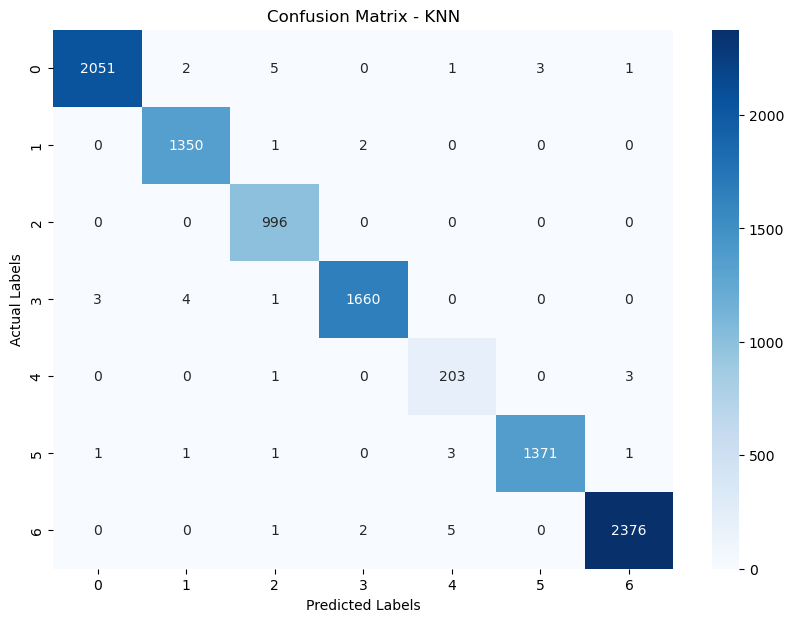


Classifier: DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2063
           1       1.00      1.00      1.00      1353
           2       1.00      1.00      1.00       996
           3       1.00      1.00      1.00      1668
           4       0.97      0.97      0.97       207
           5       0.99      1.00      1.00      1378
           6       1.00      1.00      1.00      2384

    accuracy                           1.00     10049
   macro avg       0.99      0.99      0.99     10049
weighted avg       1.00      1.00      1.00     10049



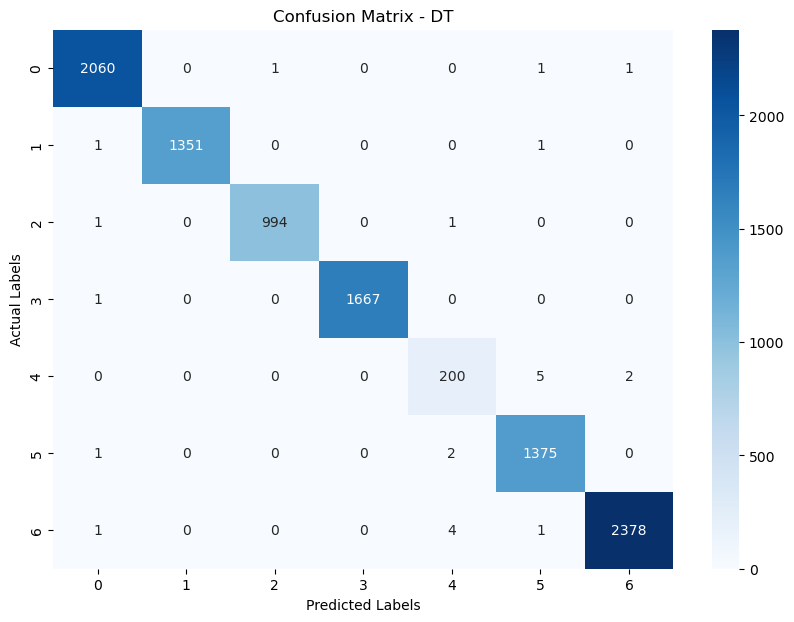


Classifier: NB
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2063
           1       1.00      0.97      0.98      1353
           2       0.73      0.99      0.84       996
           3       0.98      0.93      0.96      1668
           4       0.52      0.99      0.68       207
           5       0.99      0.73      0.84      1378
           6       1.00      0.99      1.00      2384

    accuracy                           0.94     10049
   macro avg       0.89      0.94      0.90     10049
weighted avg       0.96      0.94      0.94     10049



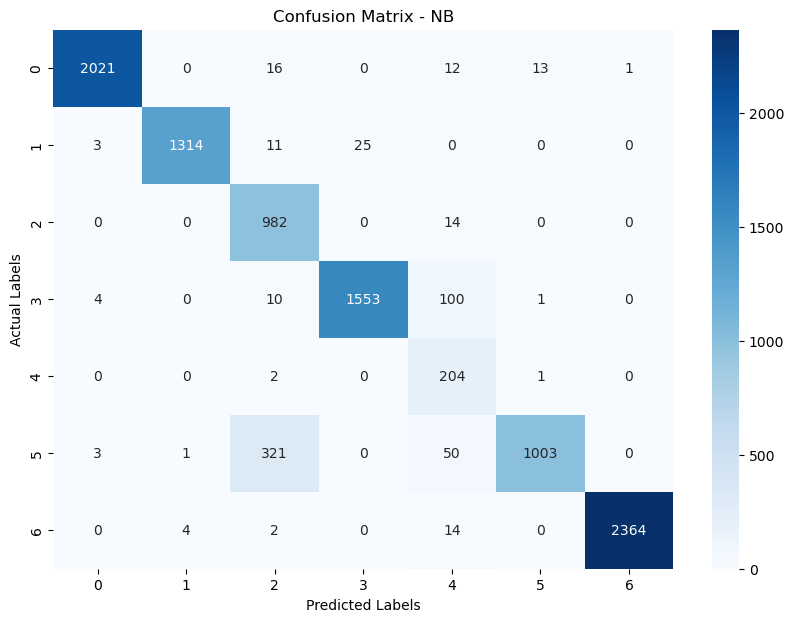


Classifier: SVM
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2063
           1       0.91      1.00      0.95      1353
           2       0.99      0.99      0.99       996
           3       1.00      0.92      0.96      1668
           4       0.90      0.87      0.89       207
           5       0.98      0.98      0.98      1378
           6       1.00      0.98      0.99      2384

    accuracy                           0.97     10049
   macro avg       0.96      0.96      0.96     10049
weighted avg       0.97      0.97      0.97     10049



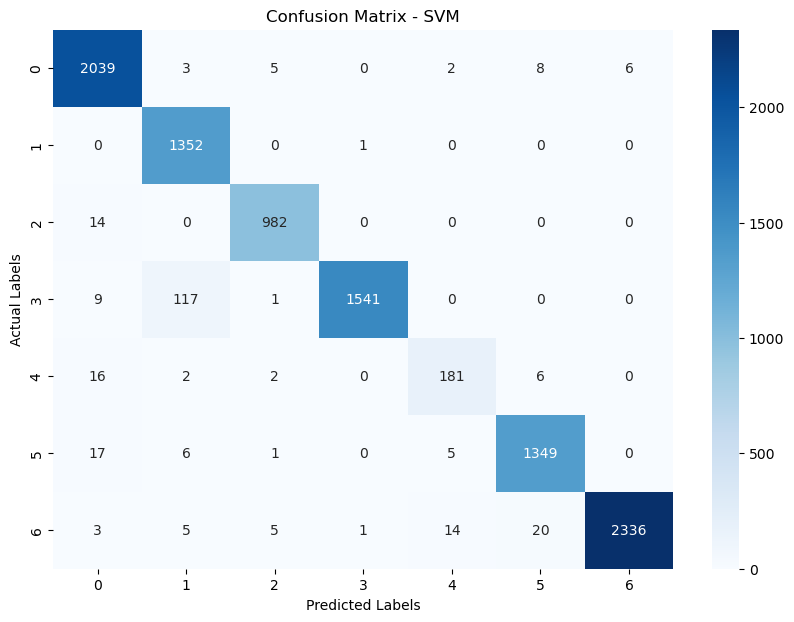


Evaluation Metrics for Each Classifier:

Classifier: KNN
Accuracy: 0.9958
Precision: 0.9905
Recall: 0.9942
F1-Score: 0.9923

Classifier: DT
Accuracy: 0.9976
Precision: 0.9937
Recall: 0.9937
F1-Score: 0.9937

Classifier: NB
Accuracy: 0.9395
Precision: 0.8870
Recall: 0.9390
F1-Score: 0.8970

Classifier: SVM
Accuracy: 0.9732
Precision: 0.9623
Recall: 0.9615
F1-Score: 0.9613


In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=10),  # Adjusted n_neighbors parameter as an example
    'DT': DecisionTreeClassifier(max_depth=20),  # Adjusted max_depth parameter as an example
    'NB': GaussianNB(),
    'SVM': SVC()
}

# Initialize dictionaries to store evaluation metrics
all_accuracies = {}
all_precisions = {}
all_recalls = {}
all_f1_scores = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics
    all_accuracies[clf_name] = accuracy
    all_precisions[clf_name] = precision
    all_recalls[clf_name] = recall
    all_f1_scores[clf_name] = f1
    
    # Print classification report
    print(f"\nClassifier: {clf_name}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Print evaluation metrics for each classifier
print("\nEvaluation Metrics for Each Classifier:")
for clf_name in classifiers.keys():
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {all_accuracies[clf_name]:.4f}")
    print(f"Precision: {all_precisions[clf_name]:.4f}")
    print(f"Recall: {all_recalls[clf_name]:.4f}")
    print(f"F1-Score: {all_f1_scores[clf_name]:.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.0069501111221680345
At iteration 2, the best solution fitness is 0.006851593856768448
At iteration 3, the best solution fitness is 0.006851593856768448
At iteration 4, the best solution fitness is 0.006851593856768448
At iteration 5, the best solution fitness is 0.006851593856768448
At iteration 6, the best solution fitness is 0.006851593856768448
At iteration 7, the best solution fitness is 0.006851593856768448
At iteration 8, the best solution fitness is 0.006851593856768448
At iteration 9, the best solution fitness is 0.006851593856768448
At iteration 10, the best solution fitness is 0.006851593856768448
At iteration 11, the best solution fitness is 0.006851593856768448
At iteration 12, the best solution fitness is 0.006851593856768448
At iteration 13, the best solution fitness is 0.006851593856768448
At iteration 14, the best solution fitness is 0.006851593856768448
At iteration 15, the best solution fitness is 0.00

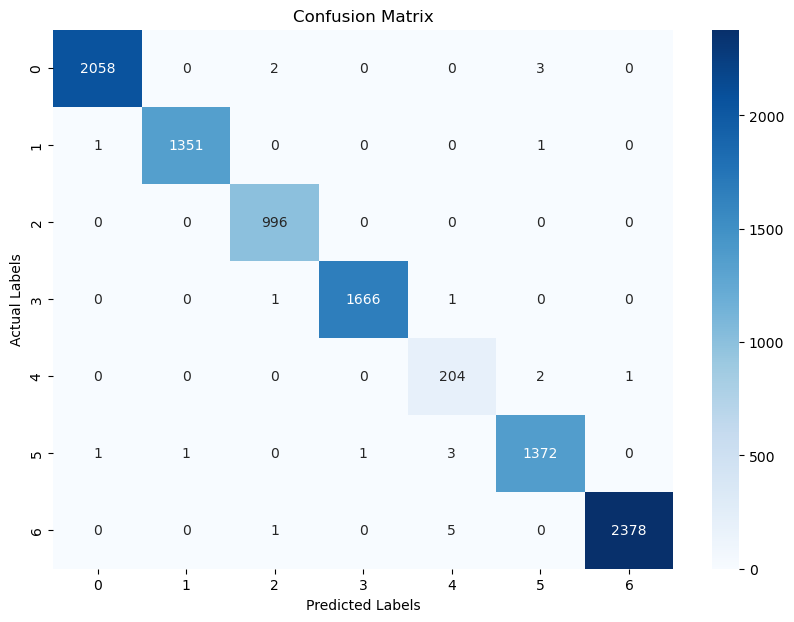

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.006229475569708395
At iteration 2, the best solution fitness is 0.006229475569708395
At iteration 3, the best solution fitness is 0.006229475569708395
At iteration 4, the best solution fitness is 0.006229475569708395
At iteration 5, the best solution fitness is 0.006229475569708395
At iteration 6, the best solution fitness is 0.006229475569708395
At iteration 7, the best solution fitness is 0.006229475569708395
At iteration 8, the best solution fitness is 0.006229475569708395
At iteration 9, the best solution fitness is 0.006229475569708395
At iteration 10, the best solution fitness is 0.006229475569708395
At iteration 11, the best solution fitness is 0.006229475569708395
At iteration 12, the best solution fitness is 0.006229475569708395
At iteration 13, the best solution fitness is 0.006229475569708395
At iteration 14, the best solution fitness is 0.006229475569708395
At iteration 15, the best solution fitness is 0.006

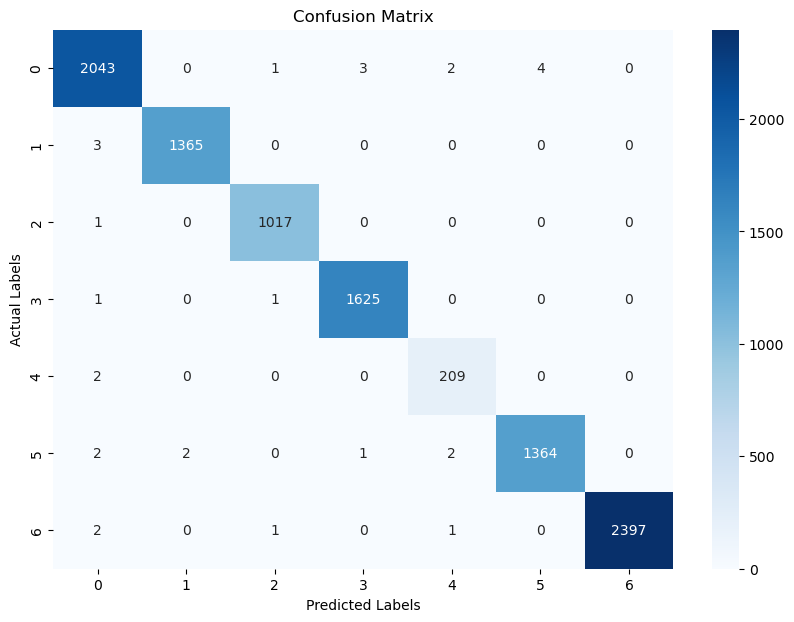

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.006565495737552649
At iteration 2, the best solution fitness is 0.006565495737552649
At iteration 3, the best solution fitness is 0.006565495737552649
At iteration 4, the best solution fitness is 0.006091816764520527
At iteration 5, the best solution fitness is 0.006091816764520527
At iteration 6, the best solution fitness is 0.006091816764520527
At iteration 7, the best solution fitness is 0.005668059840116752
At iteration 8, the best solution fitness is 0.005668059840116752
At iteration 9, the best solution fitness is 0.005668059840116752
At iteration 10, the best solution fitness is 0.005668059840116752
At iteration 11, the best solution fitness is 0.005668059840116752
At iteration 12, the best solution fitness is 0.005668059840116752
At iteration 13, the best solution fitness is 0.005668059840116752
At iteration 14, the best solution fitness is 0.005668059840116752
At iteration 15, the best solution fitness is 0.005

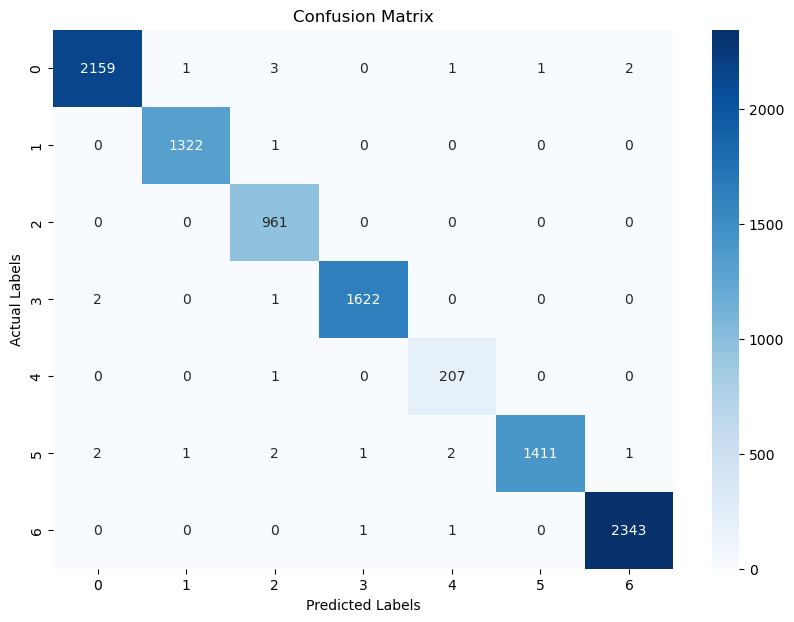

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.006792218131157364
At iteration 2, the best solution fitness is 0.006180880352937265
At iteration 3, the best solution fitness is 0.006180880352937265
At iteration 4, the best solution fitness is 0.006180880352937265
At iteration 5, the best solution fitness is 0.006180880352937265
At iteration 6, the best solution fitness is 0.006180880352937265
At iteration 7, the best solution fitness is 0.006180880352937265
At iteration 8, the best solution fitness is 0.006180880352937265
At iteration 9, the best solution fitness is 0.006180880352937265
At iteration 10, the best solution fitness is 0.006180880352937265
At iteration 11, the best solution fitness is 0.006180880352937265
At iteration 12, the best solution fitness is 0.006180880352937265
At iteration 13, the best solution fitness is 0.006180880352937265
At iteration 14, the best solution fitness is 0.006180880352937265
At iteration 15, the best solution fitness is 0.006

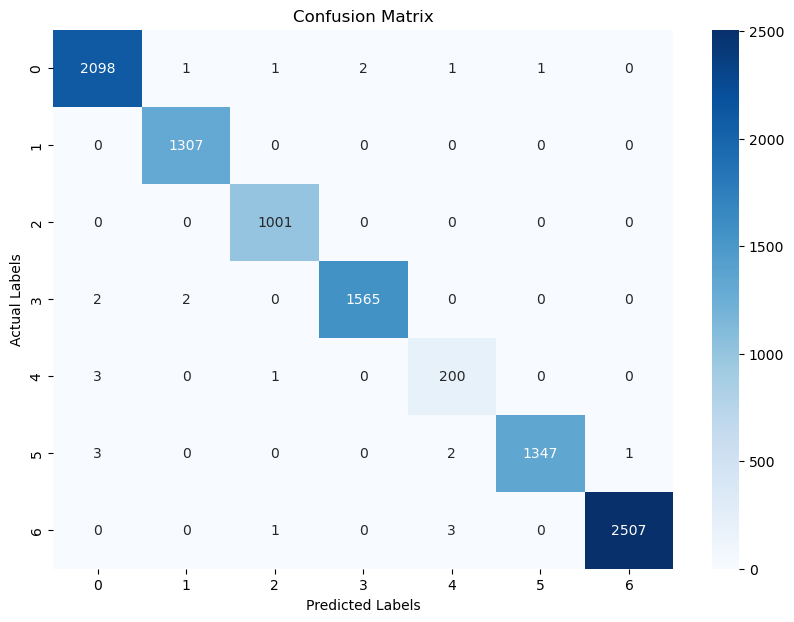

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.007078316250373163
At iteration 2, the best solution fitness is 0.007078316250373163
At iteration 3, the best solution fitness is 0.007078316250373163
At iteration 4, the best solution fitness is 0.0069501111221680345
At iteration 5, the best solution fitness is 0.00692987693634523
At iteration 6, the best solution fitness is 0.006782764454174515
At iteration 7, the best solution fitness is 0.006782764454174515
At iteration 8, the best solution fitness is 0.006782764454174515
At iteration 9, the best solution fitness is 0.006782764454174515
At iteration 10, the best solution fitness is 0.006782764454174515
At iteration 11, the best solution fitness is 0.006782764454174515
At iteration 12, the best solution fitness is 0.006782764454174515
At iteration 13, the best solution fitness is 0.006782764454174515
At iteration 14, the best solution fitness is 0.006782764454174515
At iteration 15, the best solution fitness is 0.006

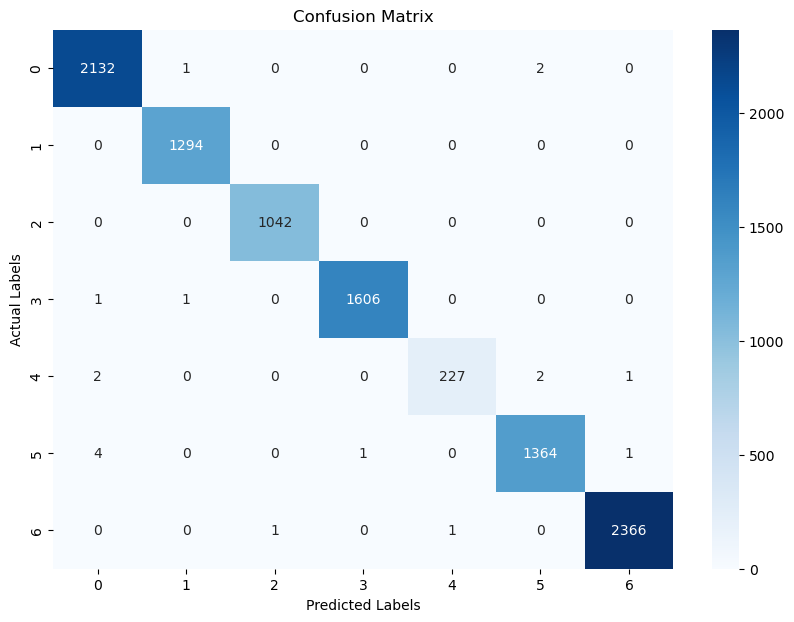


Average Number of Features Selected Each Run: 29.80

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9976, STD=0.0003
Precision: AVG=0.9948, STD=0.0018
Recall: AVG=0.9963, STD=0.0006
F1-Score: AVG=0.9955, STD=0.0009


In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.00584486018509301
At iteration 2, the best solution fitness is 0.00519438086708463
At iteration 3, the best solution fitness is 0.005027034199091111
At iteration 4, the best solution fitness is 0.004898829070885983
At iteration 5, the best solution fitness is 0.004898829070885983
At iteration 6, the best solution fitness is 0.004740936079875312
At iteration 7, the best solution fitness is 0.004740936079875312
At iteration 8, the best solution fitness is 0.004740936079875312
At iteration 9, the best solution fitness is 0.004740936079875312
At iteration 10, the best solution fitness is 0.004740936079875312
Best Accuracy = 0.9953


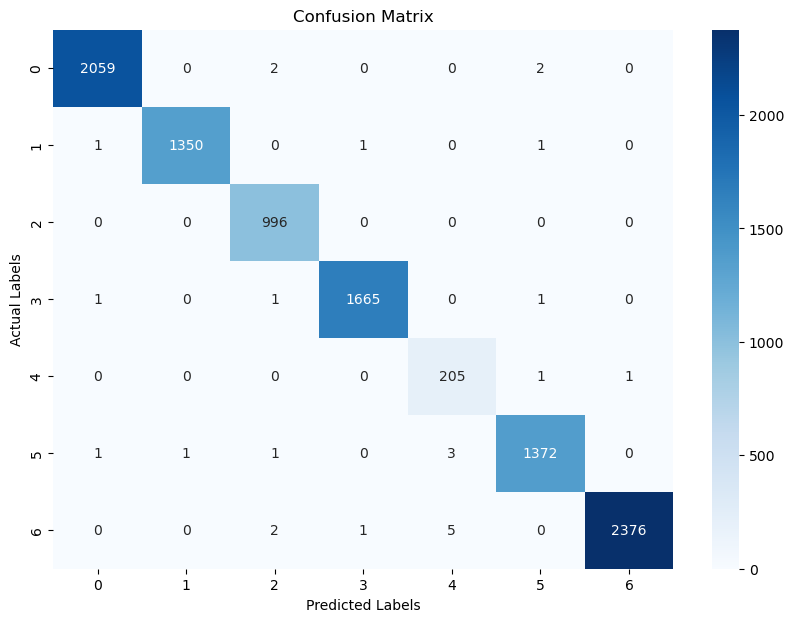

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.006091816764520527
At iteration 2, the best solution fitness is 0.005480478986300429
At iteration 3, the best solution fitness is 0.00519438086708463
At iteration 4, the best solution fitness is 0.005066175738879502
At iteration 5, the best solution fitness is 0.004937970610674374
At iteration 6, the best solution fitness is 0.004937970610674374
At iteration 7, the best solution fitness is 0.004937970610674374
At iteration 8, the best solution fitness is 0.004908282747868722
At iteration 9, the best solution fitness is 0.004908282747868722
At iteration 10, the best solution fitness is 0.004908282747868722
Best Accuracy = 0.9951


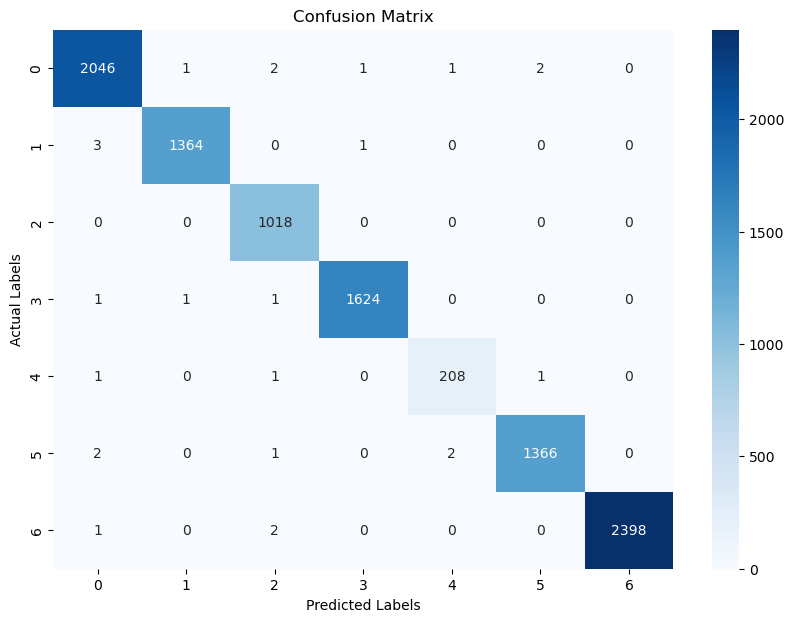

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.005450791123494886
At iteration 2, the best solution fitness is 0.005027034199091111
At iteration 3, the best solution fitness is 0.004800311805486396
At iteration 4, the best solution fitness is 0.004445384283676664
At iteration 5, the best solution fitness is 0.004445384283676664
At iteration 6, the best solution fitness is 0.004445384283676664
At iteration 7, the best solution fitness is 0.004445384283676664
At iteration 8, the best solution fitness is 0.004445384283676664
At iteration 9, the best solution fitness is 0.004415696420871012
At iteration 10, the best solution fitness is 0.00438600855806547
Best Accuracy = 0.9956


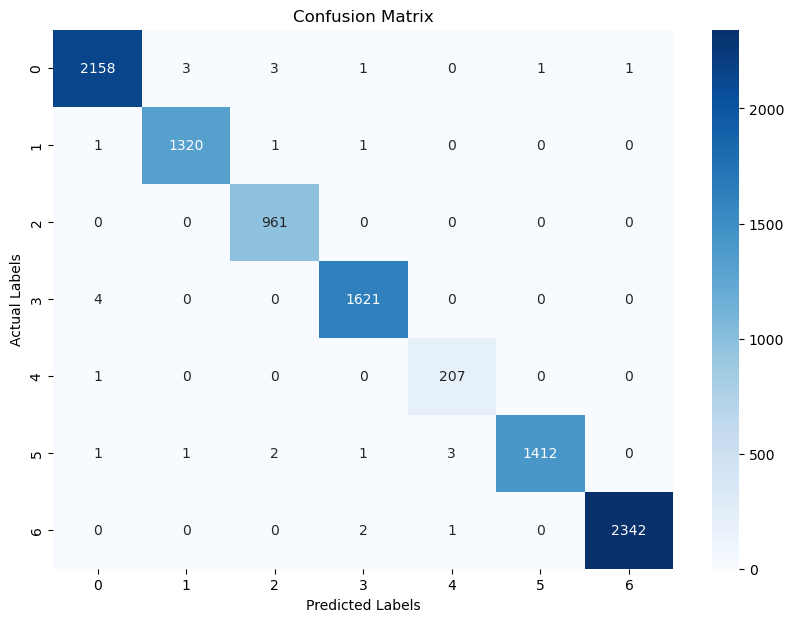

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.005894782233721465
At iteration 2, the best solution fitness is 0.005578996251700014
At iteration 3, the best solution fitness is 0.005095863601685045
At iteration 4, the best solution fitness is 0.004800311805486396
At iteration 5, the best solution fitness is 0.004642418814475726
At iteration 6, the best solution fitness is 0.004642418814475726
At iteration 7, the best solution fitness is 0.004642418814475726
At iteration 8, the best solution fitness is 0.004514213686270598
At iteration 9, the best solution fitness is 0.004514213686270598
At iteration 10, the best solution fitness is 0.004514213686270598
Best Accuracy = 0.9955


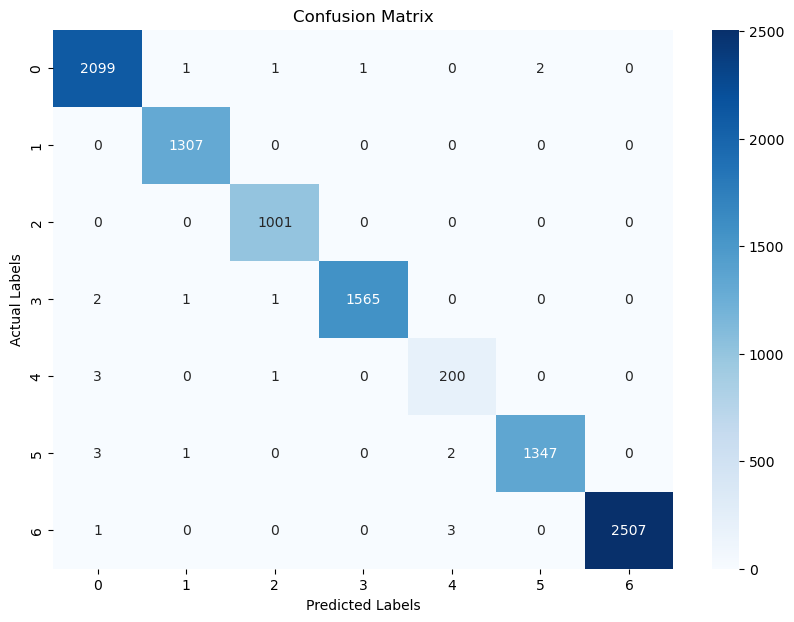

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.0055992304375228185
At iteration 2, the best solution fitness is 0.004731482402892463
At iteration 3, the best solution fitness is 0.004731482402892463
At iteration 4, the best solution fitness is 0.004701794540086921
At iteration 5, the best solution fitness is 0.004701794540086921
At iteration 6, the best solution fitness is 0.004573589411881793
At iteration 7, the best solution fitness is 0.004573589411881793
At iteration 8, the best solution fitness is 0.004573589411881793
At iteration 9, the best solution fitness is 0.004573589411881793
At iteration 10, the best solution fitness is 0.004573589411881793
Best Accuracy = 0.9954


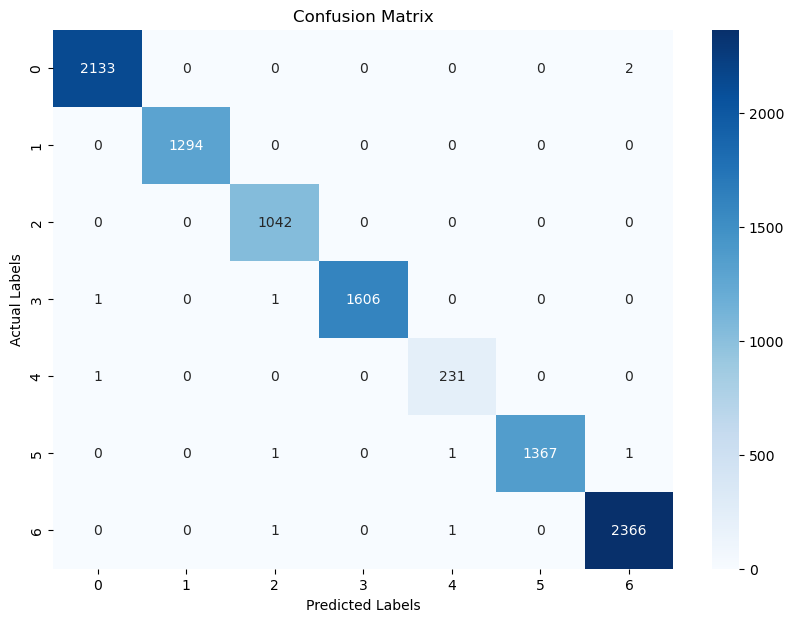


Average Number of Features Selected Each Run: 16.40

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9978, STD=0.0006
Precision: AVG=0.9953, STD=0.0017
Recall: AVG=0.9968, STD=0.0010
F1-Score: AVG=0.9960, STD=0.0013


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(current, best, beta=1.0):
    u = np.random.uniform(-0.5, 0.5, current.shape)
    return current + beta * np.sign(u) * np.log(1 - 2 * np.abs(u)) * (current - best)

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Variables to keep the positions and fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # Fitness values
    Ffun_new = np.zeros(Xnew.shape[0])  # New fitness values
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)
        
        for i in range(X_pos.shape[0]):
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover based on provided equation
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                        else:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                        else:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        
            Flag_UB = Xnew[i, :] > UB
            Flag_LB = Xnew[i, :] < LB
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        Conv_curve[C_Iter - 1] = Best_FF
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 10
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [4]:
data = pd.read_csv('UNSW_NB15_cleaned with binary-com.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('label', axis=1)
y = data['label']
print (X.shape)
print (y.shape)

(13335, 41)
(13335,)


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



Classifier: KNN
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1327
           1       0.98      1.00      0.99      1340

    accuracy                           0.99      2667
   macro avg       0.99      0.99      0.99      2667
weighted avg       0.99      0.99      0.99      2667



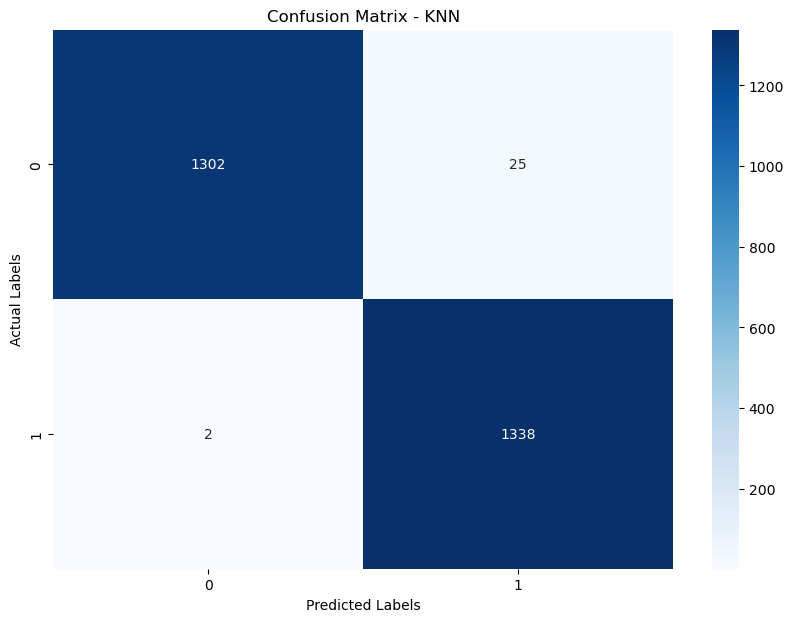


Classifier: DT
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1327
           1       0.99      1.00      0.99      1340

    accuracy                           0.99      2667
   macro avg       0.99      0.99      0.99      2667
weighted avg       0.99      0.99      0.99      2667



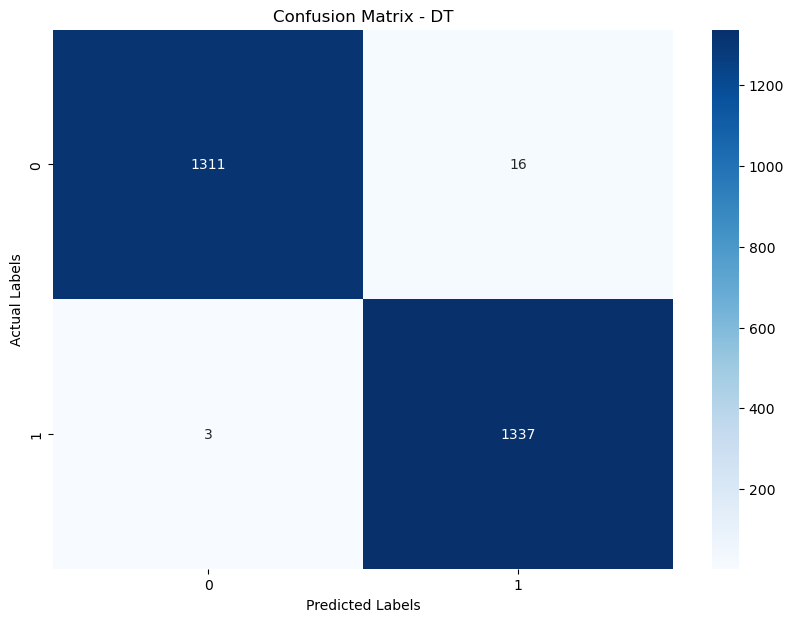


Classifier: NB
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1327
           1       0.96      0.99      0.97      1340

    accuracy                           0.97      2667
   macro avg       0.97      0.97      0.97      2667
weighted avg       0.97      0.97      0.97      2667



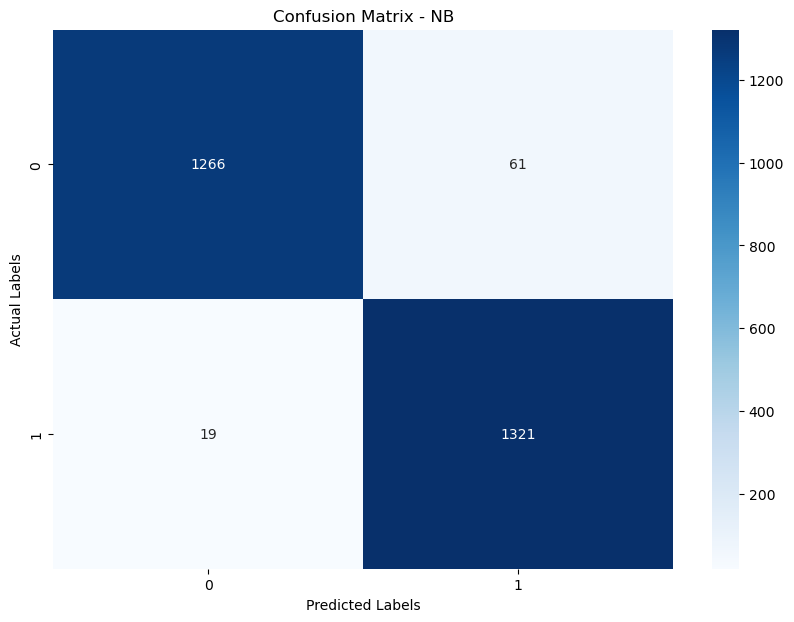


Classifier: SVM
              precision    recall  f1-score   support

           0       0.66      0.97      0.78      1327
           1       0.94      0.50      0.65      1340

    accuracy                           0.73      2667
   macro avg       0.80      0.73      0.72      2667
weighted avg       0.80      0.73      0.72      2667



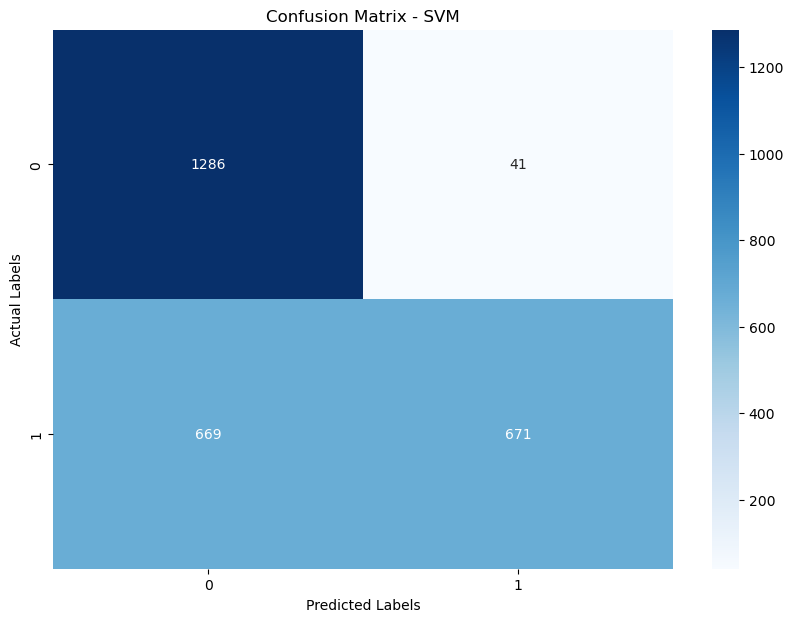


Evaluation Metrics for Each Classifier:

Classifier: KNN
Accuracy: 0.9899
Precision: 0.9901
Recall: 0.9898
F1-Score: 0.9899

Classifier: DT
Accuracy: 0.9929
Precision: 0.9929
Recall: 0.9929
F1-Score: 0.9929

Classifier: NB
Accuracy: 0.9700
Precision: 0.9705
Recall: 0.9699
F1-Score: 0.9700

Classifier: SVM
Accuracy: 0.7338
Precision: 0.8001
Recall: 0.7349
F1-Score: 0.7188


In [11]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=7),  # Adjusted n_neighbors parameter as an example
    'DT': DecisionTreeClassifier(max_depth=10),  # Adjusted max_depth parameter as an example
    'NB': GaussianNB(),
    'SVM': SVC()
}

# Initialize dictionaries to store evaluation metrics
all_accuracies = {}
all_precisions = {}
all_recalls = {}
all_f1_scores = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics
    all_accuracies[clf_name] = accuracy
    all_precisions[clf_name] = precision
    all_recalls[clf_name] = recall
    all_f1_scores[clf_name] = f1
    
    # Print classification report
    print(f"\nClassifier: {clf_name}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Print evaluation metrics for each classifier
print("\nEvaluation Metrics for Each Classifier:")
for clf_name in classifiers.keys():
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {all_accuracies[clf_name]:.4f}")
    print(f"Precision: {all_precisions[clf_name]:.4f}")
    print(f"Recall: {all_recalls[clf_name]:.4f}")
    print(f"F1-Score: {all_f1_scores[clf_name]:.4f}")


# AOA Binary

Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.011930917171938917
At iteration 2, the best solution fitness is 0.009576394414112847
At iteration 3, the best solution fitness is 0.009576394414112847
At iteration 4, the best solution fitness is 0.009576394414112847
At iteration 5, the best solution fitness is 0.009576394414112847
At iteration 6, the best solution fitness is 0.009576394414112847
At iteration 7, the best solution fitness is 0.009576394414112847
At iteration 8, the best solution fitness is 0.009576394414112847
At iteration 9, the best solution fitness is 0.009576394414112847
At iteration 10, the best solution fitness is 0.009576394414112847
At iteration 11, the best solution fitness is 0.009576394414112847
At iteration 12, the best solution fitness is 0.009576394414112847
At iteration 13, the best solution fitness is 0.009576394414112847
At iteration 14, the best solution fitness is 0.009576394414112847
At iteration 15, the best solution fitness is 0.009

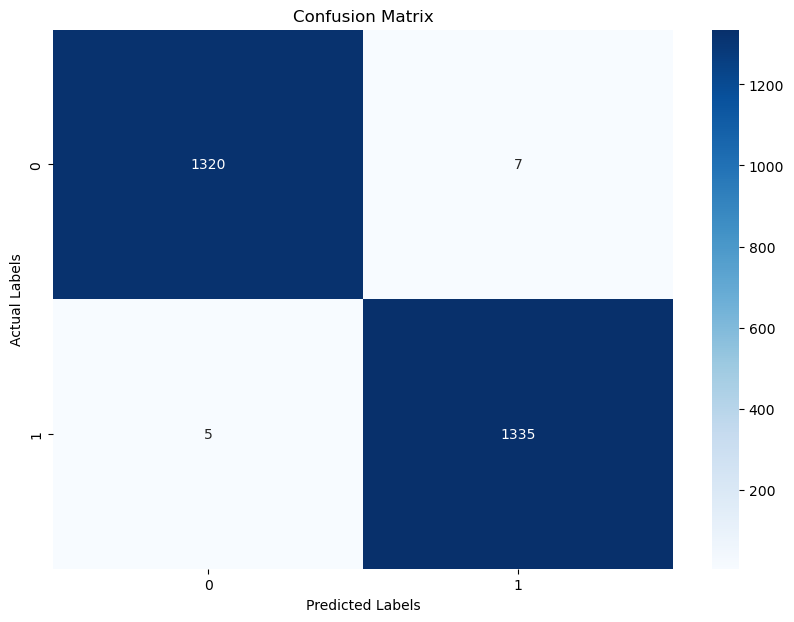

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.010955307415841357
At iteration 2, the best solution fitness is 0.0104461027737387
At iteration 3, the best solution fitness is 0.0104461027737387
At iteration 4, the best solution fitness is 0.0104461027737387
At iteration 5, the best solution fitness is 0.0104461027737387
At iteration 6, the best solution fitness is 0.0104461027737387
At iteration 7, the best solution fitness is 0.0104461027737387
At iteration 8, the best solution fitness is 0.0104461027737387
At iteration 9, the best solution fitness is 0.0104461027737387
At iteration 10, the best solution fitness is 0.0104461027737387
At iteration 11, the best solution fitness is 0.0104461027737387
At iteration 12, the best solution fitness is 0.0104461027737387
At iteration 13, the best solution fitness is 0.0104461027737387
At iteration 14, the best solution fitness is 0.0104461027737387
At iteration 15, the best solution fitness is 0.0104461027737387
At iteration

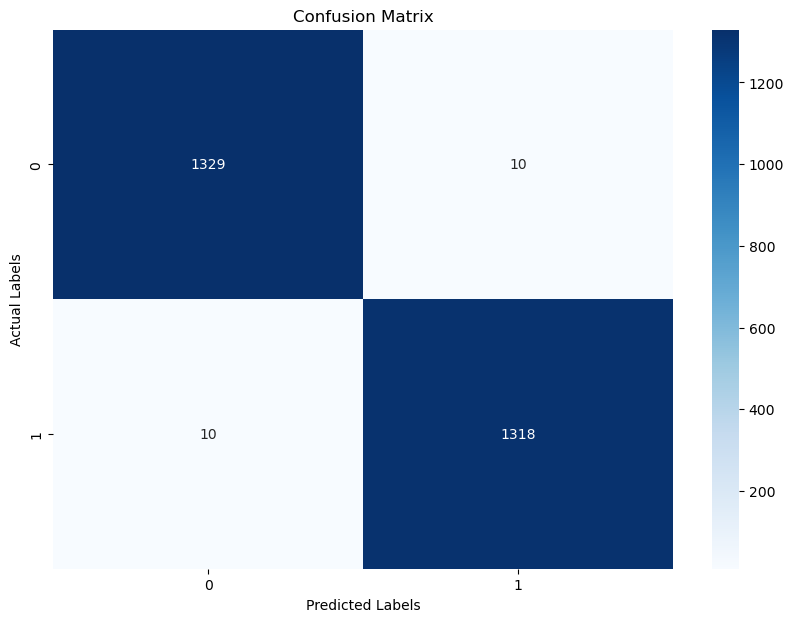

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.012800625531564665
At iteration 2, the best solution fitness is 0.012429421932014583
At iteration 3, the best solution fitness is 0.010584103816291277
At iteration 4, the best solution fitness is 0.010584103816291277
At iteration 5, the best solution fitness is 0.010584103816291277
At iteration 6, the best solution fitness is 0.010584103816291277
At iteration 7, the best solution fitness is 0.010584103816291277
At iteration 8, the best solution fitness is 0.010584103816291277
At iteration 9, the best solution fitness is 0.010584103816291277
At iteration 10, the best solution fitness is 0.010584103816291277
At iteration 11, the best solution fitness is 0.010584103816291277
At iteration 12, the best solution fitness is 0.010584103816291277
At iteration 13, the best solution fitness is 0.010584103816291277
At iteration 14, the best solution fitness is 0.010584103816291277
At iteration 15, the best solution fitness is 0.010

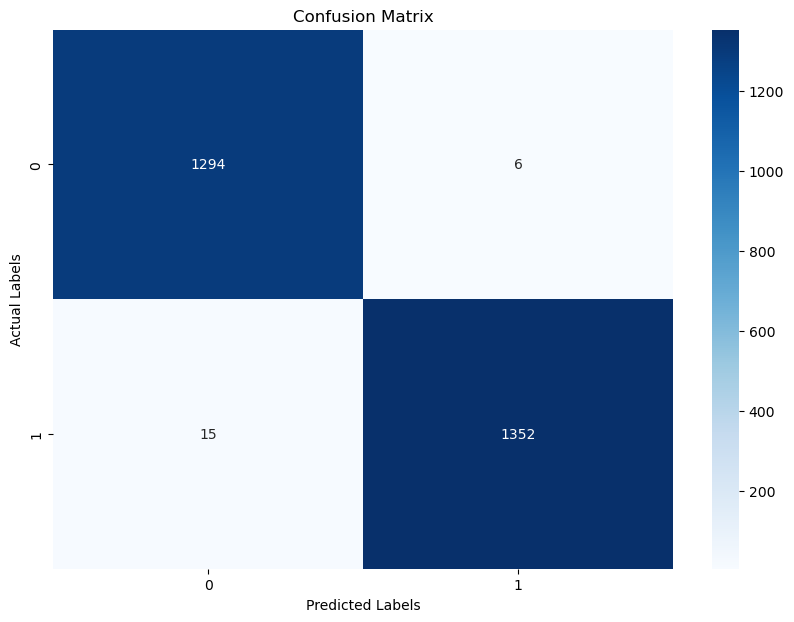

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.013288430409613444
At iteration 2, the best solution fitness is 0.013288430409613444
At iteration 3, the best solution fitness is 0.013288430409613444
At iteration 4, the best solution fitness is 0.012662624489012089
At iteration 5, the best solution fitness is 0.012662624489012089
At iteration 6, the best solution fitness is 0.012662624489012089
At iteration 7, the best solution fitness is 0.012662624489012089
At iteration 8, the best solution fitness is 0.012185519492990193
At iteration 9, the best solution fitness is 0.012185519492990193
At iteration 10, the best solution fitness is 0.012185519492990193
At iteration 11, the best solution fitness is 0.012185519492990193
At iteration 12, the best solution fitness is 0.012185519492990193
At iteration 13, the best solution fitness is 0.012185519492990193
At iteration 14, the best solution fitness is 0.012185519492990193
At iteration 15, the best solution fitness is 0.012

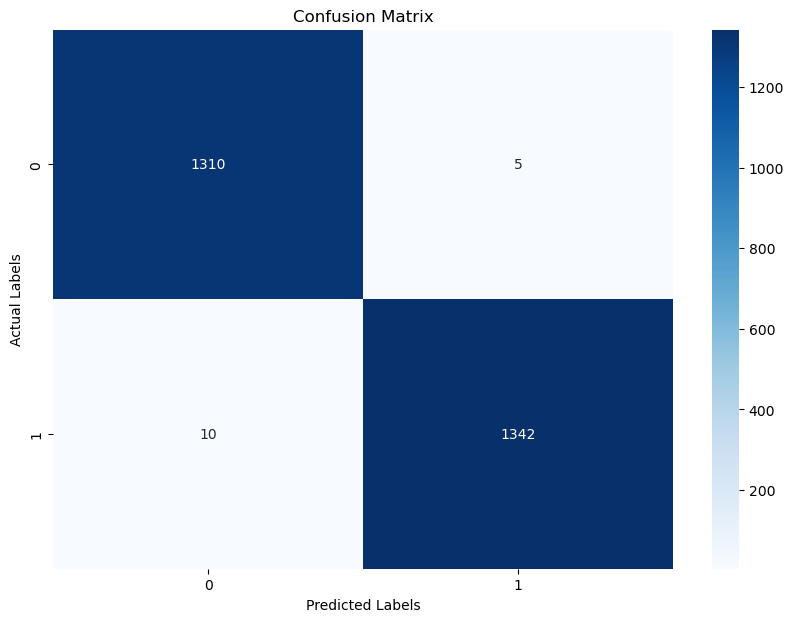

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.011305111251337454
At iteration 2, the best solution fitness is 0.011305111251337454
At iteration 3, the best solution fitness is 0.011305111251337454
At iteration 4, the best solution fitness is 0.009109989300117942
At iteration 5, the best solution fitness is 0.009109989300117942
At iteration 6, the best solution fitness is 0.009109989300117942
At iteration 7, the best solution fitness is 0.009109989300117942
At iteration 8, the best solution fitness is 0.009109989300117942
At iteration 9, the best solution fitness is 0.009109989300117942
At iteration 10, the best solution fitness is 0.009109989300117942
At iteration 11, the best solution fitness is 0.009109989300117942
At iteration 12, the best solution fitness is 0.009109989300117942
At iteration 13, the best solution fitness is 0.009109989300117942
At iteration 14, the best solution fitness is 0.009109989300117942
At iteration 15, the best solution fitness is 0.009

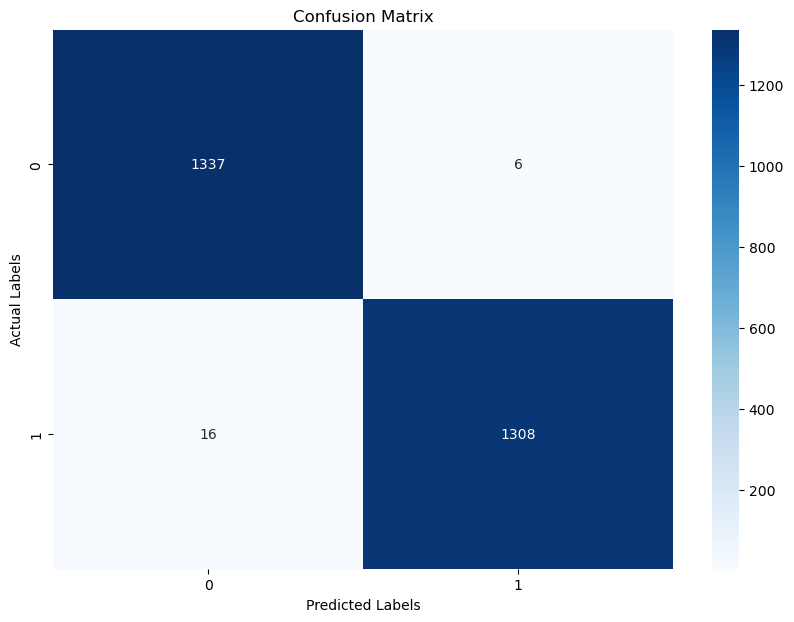


Average Number of Features Selected Each Run: 17.60

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9933, STD=0.0014
Precision: AVG=0.9932, STD=0.0014
Recall: AVG=0.9933, STD=0.0014
F1-Score: AVG=0.9932, STD=0.0014


In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(current, best, beta=1.0):
    u = np.random.uniform(-0.5, 0.5, current.shape)
    return current + beta * np.sign(u) * np.log(1 - 2 * np.abs(u)) * (current - best)

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Variables to keep the positions and fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # Fitness values
    Ffun_new = np.zeros(Xnew.shape[0])  # New fitness values
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)
        
        for i in range(X_pos.shape[0]):
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover based on provided equation
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                        else:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                        else:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        
            Flag_UB = Xnew[i, :] > UB
            Flag_LB = Xnew[i, :] < LB
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        Conv_curve[C_Iter - 1] = Best_FF
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1
    
    return Best_FF, Best_P, Conv_curve

# Load the dataset
data = pd.read_csv('UNSW_NB15_cleaned with binary-com.csv')

# Assuming 'label' is the column representing the class labels
X = data.drop('label', axis=1)
y = data['label']

print("Before processing:")
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class distribution: {y.value_counts()}")

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
confusion_matrices = np.zeros((2, 2))
classification_reports = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices += cm
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = confusion_matrices / n_runs

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Before processing:
Features shape: (13335, 41)
Labels shape: (13335,)
Class distribution: label
0    6674
1    6661
Name: count, dtype: int64
Run 1/5
AOA Working
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_11872\3728165992.py", line 166, in <module>
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Temp\ipykernel_11872\3728165992.py", line 78, in AOA
    Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Local\Temp\ipykernel_11872\3728165992.py", line 31, in cost_function
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy

Before processing:
Features shape: (13335, 41)
Labels shape: (13335,)
Class distribution: label
0    6674
1    6661
Name: count, dtype: int64
Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.00849488326154358
At iteration 2, the best solution fitness is 0.00825098082251919
At iteration 3, the best solution fitness is 0.008123679661993496
At iteration 4, the best solution fitness is 0.008123679661993496
At iteration 5, the best solution fitness is 0.008123679661993496
At iteration 6, the best solution fitness is 0.008123679661993496
At iteration 7, the best solution fitness is 0.008123679661993496
At iteration 8, the best solution fitness is 0.007996378501467807
At iteration 9, the best solution fitness is 0.007752476062443416
At iteration 10, the best solution fitness is 0.007752476062443416
At iteration 11, the best solution fitness is 0.007752476062443416
At iteration 12, the best solution fitness is 0.007752476062443416
At iteration 13, the best solution fitness is

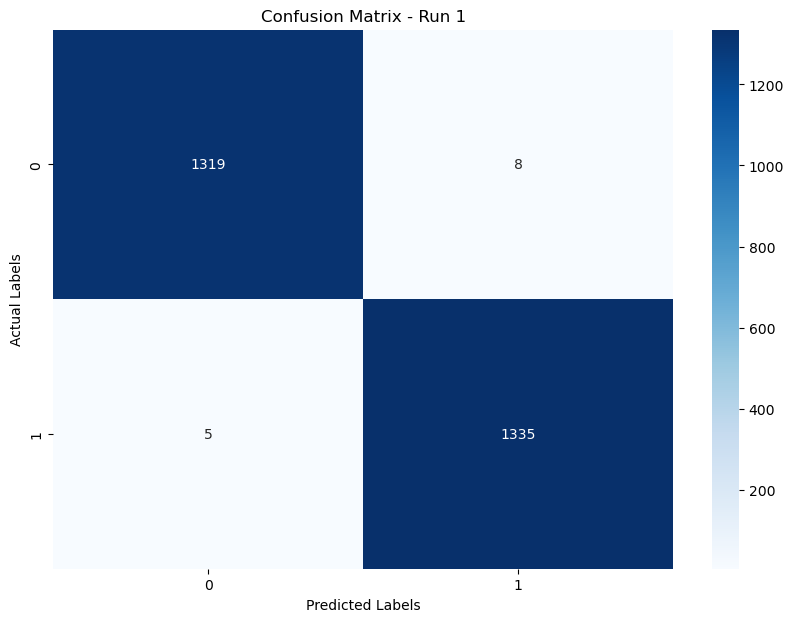

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1327
           1       0.99      1.00      1.00      1340

    accuracy                           1.00      2667
   macro avg       1.00      1.00      1.00      2667
weighted avg       1.00      1.00      1.00      2667

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.011591813218469596
At iteration 2, the best solution fitness is 0.008887486625147427
At iteration 3, the best solution fitness is 0.007890477104995991
At iteration 4, the best solution fitness is 0.007890477104995991
At iteration 5, the best solution fitness is 0.007763175944470409
At iteration 6, the best solution fitness is 0.007275371066421628
At iteration 7, the best solution fitness is 0.007275371066421628
At iteration 8, the best solution fitness is 0.007275371066421628
At iteration 9, the best solution fitness is 0.007275371066421628
At iteration 10, the best so

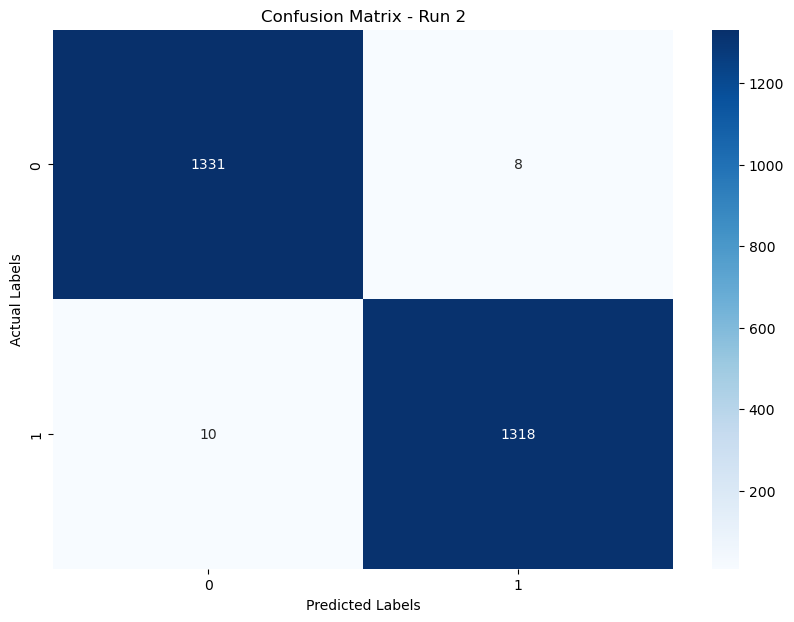

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1339
           1       0.99      0.99      0.99      1328

    accuracy                           0.99      2667
   macro avg       0.99      0.99      0.99      2667
weighted avg       0.99      0.99      0.99      2667

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.009109989300117942
At iteration 2, the best solution fitness is 0.007508573623419026
At iteration 3, the best solution fitness is 0.007508573623419026
At iteration 4, the best solution fitness is 0.007508573623419026
At iteration 5, the best solution fitness is 0.007264671184394635
At iteration 6, the best solution fitness is 0.007264671184394635
At iteration 7, the best solution fitness is 0.007264671184394635
At iteration 8, the best solution fitness is 0.007264671184394635
At iteration 9, the best solution fitness is 0.007264671184394635
At iteration 10, the best so

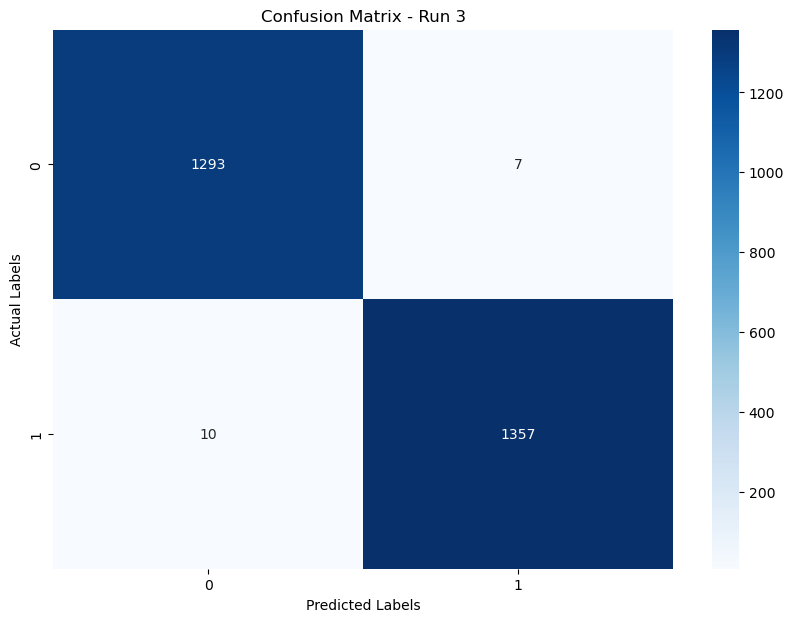

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1300
           1       0.99      0.99      0.99      1367

    accuracy                           0.99      2667
   macro avg       0.99      0.99      0.99      2667
weighted avg       0.99      0.99      0.99      2667

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.00862218442206916
At iteration 2, the best solution fitness is 0.008134379544020381
At iteration 3, the best solution fitness is 0.007763175944470409
At iteration 4, the best solution fitness is 0.007763175944470409
At iteration 5, the best solution fitness is 0.007763175944470409
At iteration 6, the best solution fitness is 0.007763175944470409
At iteration 7, the best solution fitness is 0.007763175944470409
At iteration 8, the best solution fitness is 0.007763175944470409
At iteration 9, the best solution fitness is 0.007763175944470409
At iteration 10, the best sol

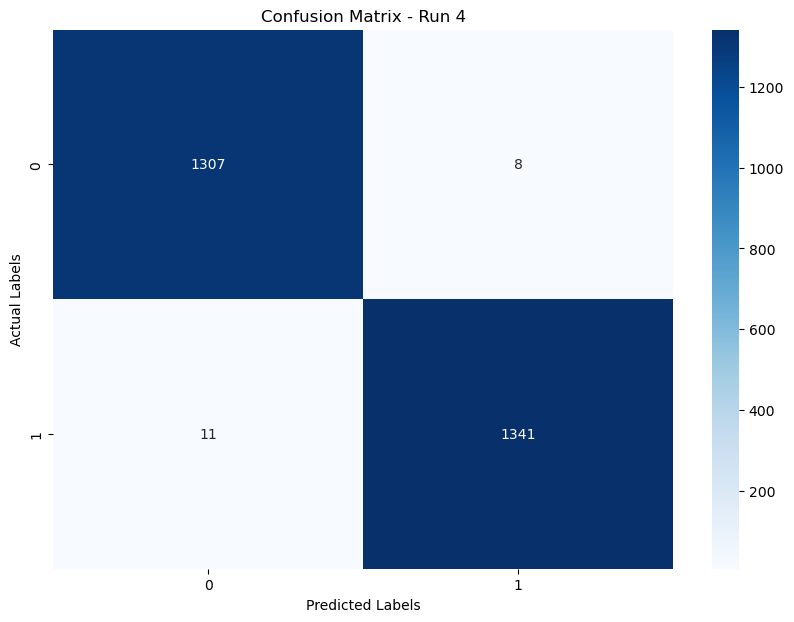

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1315
           1       0.99      0.99      0.99      1352

    accuracy                           0.99      2667
   macro avg       0.99      0.99      0.99      2667
weighted avg       0.99      0.99      0.99      2667

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.00862218442206916
At iteration 2, the best solution fitness is 0.007741776180416423
At iteration 3, the best solution fitness is 0.007497873741392033
At iteration 4, the best solution fitness is 0.007497873741392033
At iteration 5, the best solution fitness is 0.007497873741392033
At iteration 6, the best solution fitness is 0.007497873741392033
At iteration 7, the best solution fitness is 0.007497873741392033
At iteration 8, the best solution fitness is 0.007497873741392033
At iteration 9, the best solution fitness is 0.007497873741392033
At iteration 10, the best sol

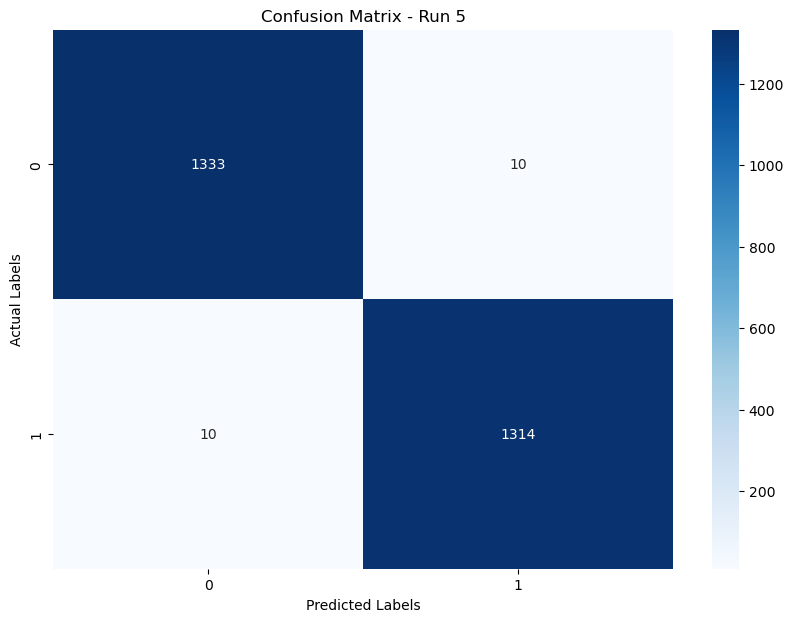

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1324

    accuracy                           0.99      2667
   macro avg       0.99      0.99      0.99      2667
weighted avg       0.99      0.99      0.99      2667



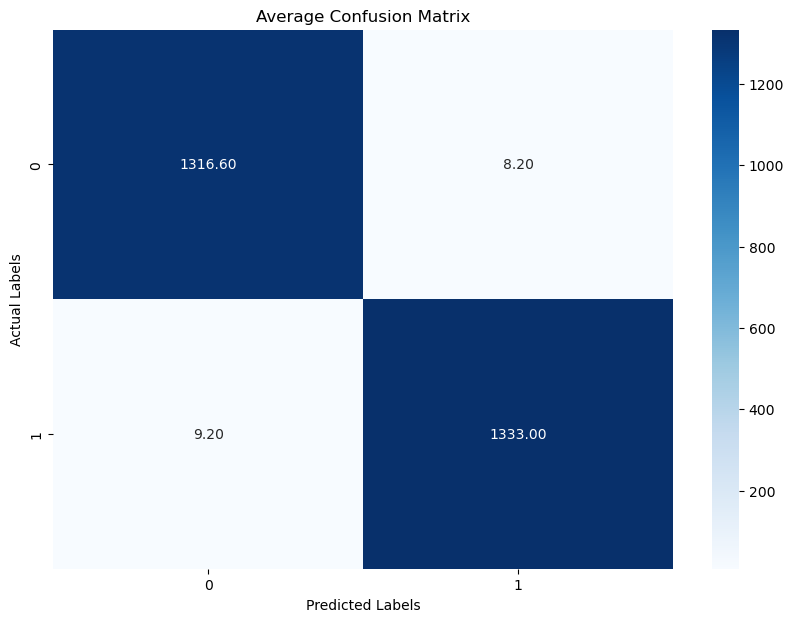


Average Classification Report:
Accuracy: 0.9935
Precision: 0.9935
Recall: 0.9935
F1-Score: 0.9935

Average Number of Features Selected Each Run: 10.00

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9935, STD=0.0009
Precision: AVG=0.9935, STD=0.0009
Recall: AVG=0.9935, STD=0.0009
F1-Score: AVG=0.9935, STD=0.0009


In [14]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

# Load the dataset
data = pd.read_csv('UNSW_NB15_cleaned with binary-com.csv')

# Assuming 'label' is the column representing the class labels
X = data.drop('label', axis=1)
y = data['label']

print("Before processing:")
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class distribution: {y.value_counts()}")

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
confusion_matrices = np.zeros((2, 2))
classification_reports = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices += cm
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = confusion_matrices / n_runs

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [10]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def initialization(N, dim, ub, lb):
    # Initialize a set of random solutions within given bounds
    return np.random.rand(N, dim) * (ub - lb) + lb

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta
    selected_features = x > 0.5
    if not np.any(selected_features):
        return alpha + beta
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]
    fitness = alpha * error + beta * (num_selected_features / total_features)
    return fitness

def SCHO(N, Max_iteration, lb, ub, dim, fobj):
    Destination_position = np.zeros(dim)
    Destination_fitness = float('inf')
    Destination_position_second = np.zeros(dim)
    Convergence_curve = np.zeros(Max_iteration)
    Position_sort = np.zeros((N, dim))

    # Initialize SCHO parameters
    u, m, n = 0.388, 0.45, 0.5
    p, q = 10, 9
    Alpha, Beta = 4.6, 1.55
    ct = 3.6
    BS = int(Max_iteration / Beta)
    T = int(Max_iteration / ct)
    BSi = 0
    ub_2, lb_2 = ub, lb

    # Initialize the set of random solutions
    X = initialization(N, dim, ub, lb)
    Objective_values = np.array([fobj(X[i, :]) for i in range(X.shape[0])])
    
    for i in range(X.shape[0]):
        if Objective_values[i] < Destination_fitness:
            Destination_position = X[i, :]
            Destination_fitness = Objective_values[i]
    
    Convergence_curve[0] = Destination_fitness
    t = 1

    # Main loop
    while t < Max_iteration:
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                cosh2 = (np.exp(t / Max_iteration) + np.exp(-t / Max_iteration)) / 2
                sinh2 = (np.exp(t / Max_iteration) - np.exp(-t / Max_iteration)) / 2
                r1 = np.random.rand()
                A = (p - q * (t / Max_iteration) ** (cosh2 / sinh2)) * r1

                if t == BSi:
                    delta = (1 - t / Max_iteration) * abs(Destination_position[j] - Destination_position_second[j])
                    ub_2 = Destination_position[j] + delta
                    lb_2 = Destination_position[j] - delta
                    ub_2 = min(ub_2, ub)
                    lb_2 = max(lb_2, lb)
                    X = initialization(N, dim, ub_2, lb_2)
                    BSi_temp = BSi
                    BSi = 0

                if t <= T:
                    r2, r3, r4, r5 = np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()
                    a1 = 3 * (-1.3 * t / Max_iteration + m)
                    if A > 1:
                        sinh = (np.exp(r3) - np.exp(-r3)) / 2
                        cosh = (np.exp(r3) + np.exp(-r3)) / 2
                        W1 = r2 * a1 * (cosh + u * sinh - 1)
                        if r5 <= 0.5:
                            X[i, j] = Destination_position[j] + r4 * W1 * X[i, j]
                        else:
                            X[i, j] = Destination_position[j] - r4 * W1 * X[i, j]
                    else:
                        sinh = (np.exp(r3) - np.exp(-r3)) / 2
                        cosh = (np.exp(r3) + np.exp(-r3)) / 2
                        W3 = r2 * a1 * (cosh + u * sinh)
                        if r5 <= 0.5:
                            X[i, j] = Destination_position[j] + r4 * W3 * X[i, j]
                        else:
                            X[i, j] = Destination_position[j] - r4 * W3 * X[i, j]
                else:
                    r2, r3, r4, r5 = np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()
                    a2 = 2 * (-t / Max_iteration + n)
                    W2 = r2 * a2
                    if A < 1:
                        sinh = (np.exp(r3) - np.exp(-r3)) / 2
                        cosh = (np.exp(r3) + np.exp(-r3)) / 2
                        X[i, j] = X[i, j] + (r5 * sinh / cosh * abs(W2 * Destination_position[j] - X[i, j]))
                    else:
                        if r4 <= 0.5:
                            X[i, j] = X[i, j] + (abs(0.003 * W2 * Destination_position[j] - X[i, j]))
                        else:
                            X[i, j] = X[i, j] + (-abs(0.003 * W2 * Destination_position[j] - X[i, j]))

        BSi = BSi_temp
        for i in range(X.shape[0]):
            Flag4ub = X[i, :] > ub_2
            Flag4lb = X[i, :] < lb_2
            X[i, :] = (X[i, :] * (~(Flag4ub + Flag4lb))) + (ub_2 + lb_2) / 2 * Flag4ub + lb_2 * Flag4lb
            Objective_values[i] = fobj(X[i, :])
            if Objective_values[i] < Destination_fitness:
                Destination_position = X[i, :]
                Destination_fitness = Objective_values[i]

        if t == BS:
            BSi = BS + 1
            BS = BS + int((Max_iteration - BS) / Alpha)
            sorted_indices = np.argsort(Objective_values)
            Position_sort = X[sorted_indices, :]
            Destination_position_second = Position_sort[1, :]  # the second solution

        Convergence_curve[t-1] = Destination_fitness
        t += 1

    return Destination_fitness, Destination_position, Convergence_curve

def run_optimization():
    N = 30
    M_Iter = 20
    LB = 0
    UB = 1
    Dim = X.shape[1]
    n_runs = 5

    all_accuracies = []
    all_precisions = []
    all_recalls = []
    all_f1_scores = []
    selected_features_counts = []

    for run in range(n_runs):
        print(f"Run {run + 1}/{n_runs}")
        Best_FF, Best_P, Conv_curve = SCHO(N, M_Iter, LB, UB, Dim, cost_function)
        
        best_accuracy = 1 - Best_FF
        print(f"Best Accuracy = {best_accuracy:.4f}")
        
        selected_features = Best_P > 0.5
        selected_feature_indices = np.where(selected_features)[0]
        selected_features_counts.append(len(selected_feature_indices))
        
        if len(selected_feature_indices) == 0:
            print("No features selected, skipping this run.")
            continue

        X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
        X_selected = np.ascontiguousarray(X_selected)
        
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
        
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        all_accuracies.append(accuracy_score(y_test, y_pred))
        all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Labels')
        plt.xlabel('Predicted Labels')
        plt.show()

    avg_selected_features = np.mean(selected_features_counts)
    print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

    print("\nAverage and Standard Deviation after multiple runs:")
    print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
    print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
    print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
    print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")

In [13]:
data = pd.read_csv('NLS-KDD-Cleaned-com.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('label', axis=1)
y = data['label']
print (X.shape)
print (y.shape)



(28729, 41)
(28729,)



Classifier: KNN
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1670
           1       0.60      0.38      0.46         8
           2       0.94      0.95      0.95       182
           3       0.99      0.96      0.98      1528
           4       0.98      1.00      0.99      2358

    accuracy                           0.98      5746
   macro avg       0.90      0.85      0.87      5746
weighted avg       0.98      0.98      0.98      5746



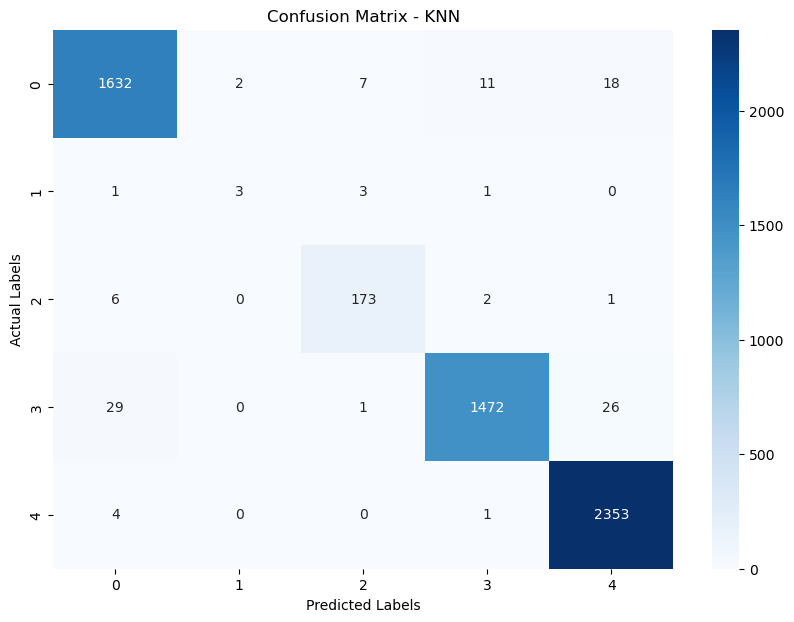


Classifier: DT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1670
           1       0.71      0.62      0.67         8
           2       0.94      0.98      0.96       182
           3       0.98      0.98      0.98      1528
           4       1.00      1.00      1.00      2358

    accuracy                           0.98      5746
   macro avg       0.92      0.91      0.92      5746
weighted avg       0.98      0.98      0.98      5746



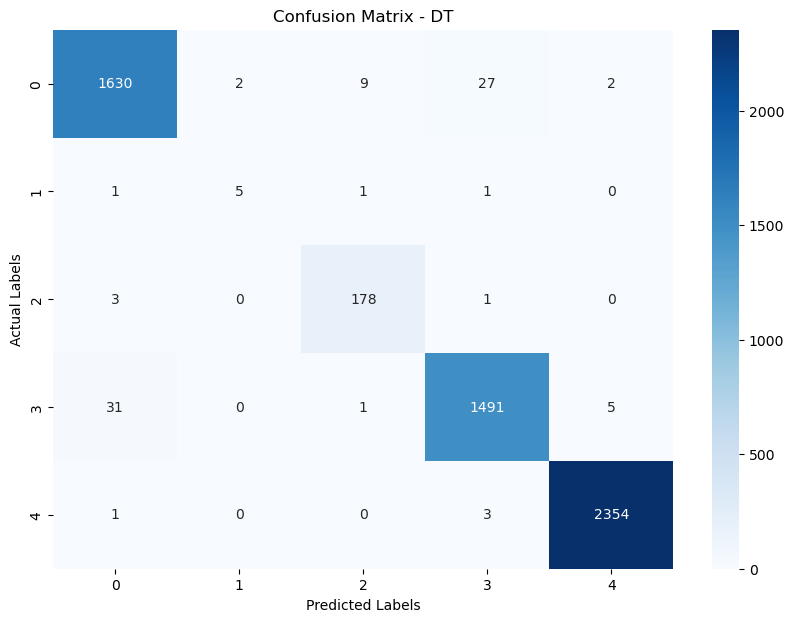


Classifier: NB
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      1670
           1       0.01      0.75      0.03         8
           2       0.71      0.53      0.61       182
           3       0.73      0.92      0.81      1528
           4       0.96      0.84      0.90      2358

    accuracy                           0.80      5746
   macro avg       0.67      0.74      0.63      5746
weighted avg       0.89      0.80      0.83      5746



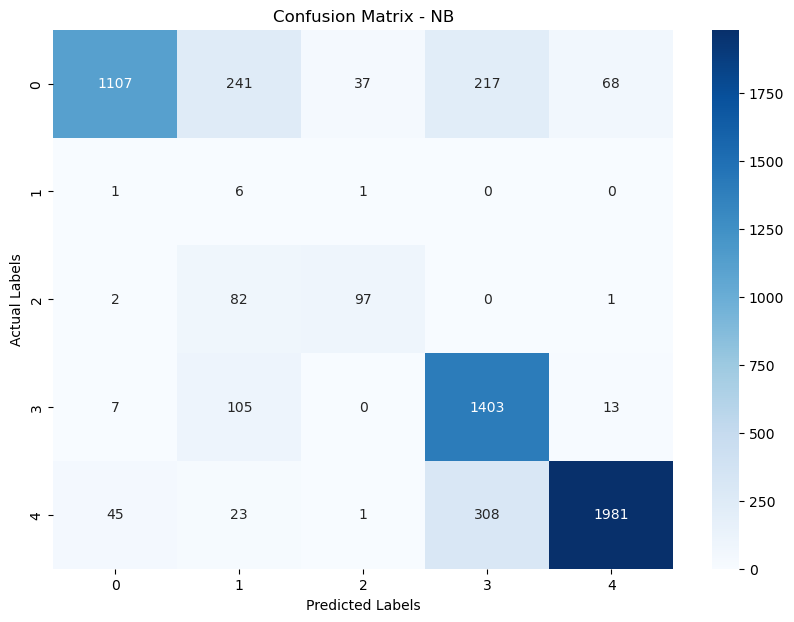


Classifier: SVM
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1670
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00       182
           3       0.90      0.95      0.92      1528
           4       0.96      0.96      0.96      2358

    accuracy                           0.91      5746
   macro avg       0.54      0.56      0.55      5746
weighted avg       0.88      0.91      0.90      5746



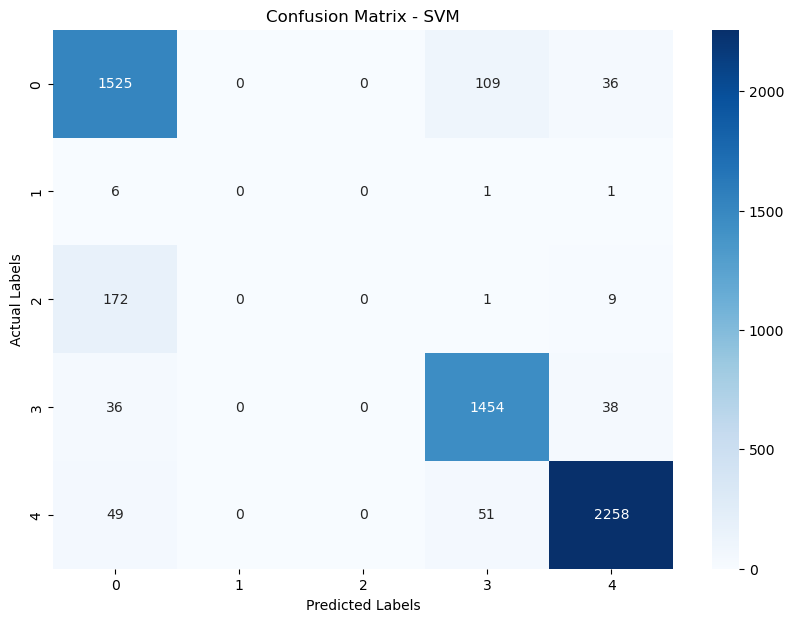


Evaluation Metrics for Each Classifier:

Classifier: KNN
Accuracy: 0.9803
Precision: 0.8975
Recall: 0.8528
F1-Score: 0.8699

Classifier: DT
Accuracy: 0.9847
Precision: 0.9221
Recall: 0.9106
F1-Score: 0.9157

Classifier: NB
Accuracy: 0.7995
Precision: 0.6734
Recall: 0.7408
F1-Score: 0.6251

Classifier: SVM
Accuracy: 0.9114
Precision: 0.5434
Recall: 0.5645
F1-Score: 0.5536


In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=7),  # Adjusted n_neighbors parameter as an example
    'DT': DecisionTreeClassifier(max_depth=10),  # Adjusted max_depth parameter as an example
    'NB': GaussianNB(),
    'SVM': SVC()
}

# Initialize dictionaries to store evaluation metrics
all_accuracies = {}
all_precisions = {}
all_recalls = {}
all_f1_scores = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics
    all_accuracies[clf_name] = accuracy
    all_precisions[clf_name] = precision
    all_recalls[clf_name] = recall
    all_f1_scores[clf_name] = f1
    
    # Print classification report
    print(f"\nClassifier: {clf_name}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Print evaluation metrics for each classifier
print("\nEvaluation Metrics for Each Classifier:")
for clf_name in classifiers.keys():
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {all_accuracies[clf_name]:.4f}")
    print(f"Precision: {all_precisions[clf_name]:.4f}")
    print(f"Recall: {all_recalls[clf_name]:.4f}")
    print(f"F1-Score: {all_f1_scores[clf_name]:.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.014799478746614806
At iteration 2, the best solution fitness is 0.014799478746614806
At iteration 3, the best solution fitness is 0.014799478746614806
At iteration 4, the best solution fitness is 0.014799478746614806
At iteration 5, the best solution fitness is 0.014799478746614806
At iteration 6, the best solution fitness is 0.014799478746614806
At iteration 7, the best solution fitness is 0.014799478746614806
At iteration 8, the best solution fitness is 0.014799478746614806
At iteration 9, the best solution fitness is 0.014799478746614806
At iteration 10, the best solution fitness is 0.014799478746614806
At iteration 11, the best solution fitness is 0.014799478746614806
At iteration 12, the best solution fitness is 0.014799478746614806
At iteration 13, the best solution fitness is 0.014799478746614806
At iteration 14, the best solution fitness is 0.014799478746614806
At iteration 15, the best solution fitness is 0.014

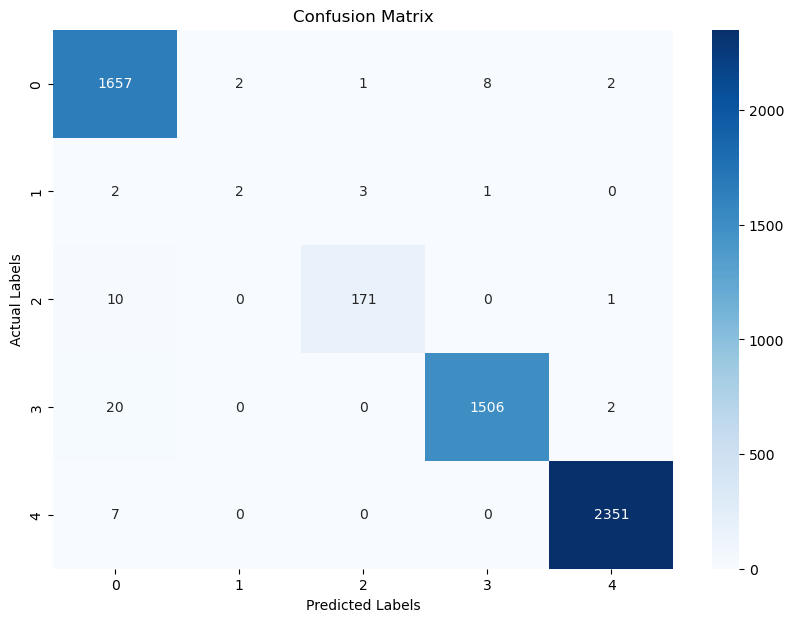

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.015746012072024647
At iteration 2, the best solution fitness is 0.015746012072024647
At iteration 3, the best solution fitness is 0.013938009898720672
At iteration 4, the best solution fitness is 0.013938009898720672
At iteration 5, the best solution fitness is 0.013938009898720672
At iteration 6, the best solution fitness is 0.013938009898720672
At iteration 7, the best solution fitness is 0.013938009898720672
At iteration 8, the best solution fitness is 0.013938009898720672
At iteration 9, the best solution fitness is 0.013938009898720672
At iteration 10, the best solution fitness is 0.013938009898720672
At iteration 11, the best solution fitness is 0.013938009898720672
At iteration 12, the best solution fitness is 0.013938009898720672
At iteration 13, the best solution fitness is 0.013938009898720672
At iteration 14, the best solution fitness is 0.013938009898720672
At iteration 15, the best solution fitness is 0.013

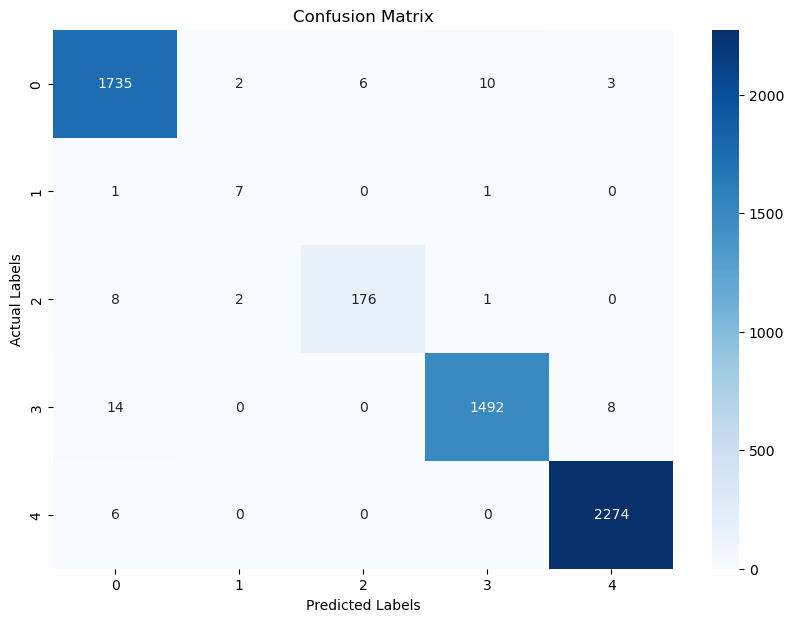

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.015488653824930178
At iteration 2, the best solution fitness is 0.015488653824930178
At iteration 3, the best solution fitness is 0.015488653824930178
At iteration 4, the best solution fitness is 0.015430500963554736
At iteration 5, the best solution fitness is 0.015056836993709272
At iteration 6, the best solution fitness is 0.015056836993709272
At iteration 7, the best solution fitness is 0.014526499876902695
At iteration 8, the best solution fitness is 0.014526499876902695
At iteration 9, the best solution fitness is 0.014526499876902695
At iteration 10, the best solution fitness is 0.014526499876902695
At iteration 11, the best solution fitness is 0.014526499876902695
At iteration 12, the best solution fitness is 0.014526499876902695
At iteration 13, the best solution fitness is 0.014526499876902695
At iteration 14, the best solution fitness is 0.014526499876902695
At iteration 15, the best solution fitness is 0.014

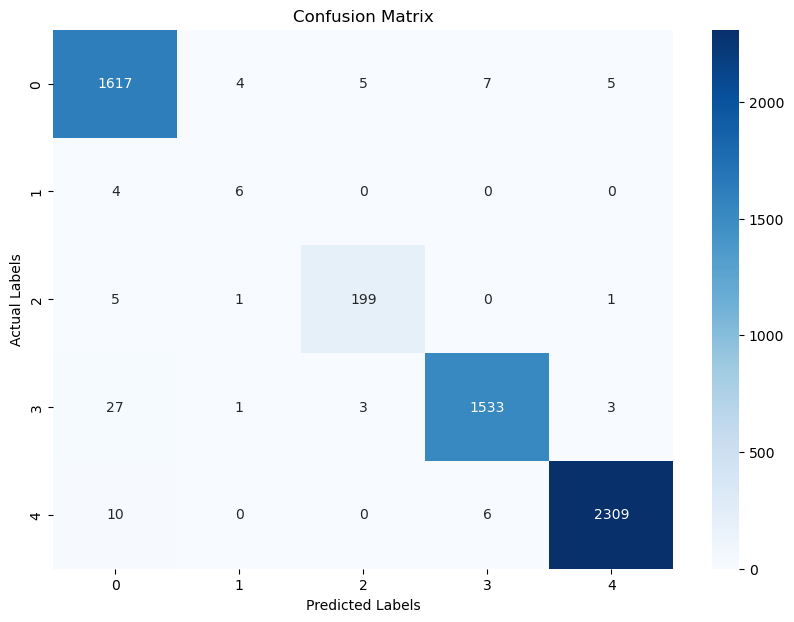

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.014842010985372602
At iteration 2, the best solution fitness is 0.014842010985372602
At iteration 3, the best solution fitness is 0.014842010985372602
At iteration 4, the best solution fitness is 0.014842010985372602
At iteration 5, the best solution fitness is 0.014656261407723766
At iteration 6, the best solution fitness is 0.014656261407723766
At iteration 7, the best solution fitness is 0.014656261407723766
At iteration 8, the best solution fitness is 0.014656261407723766
At iteration 9, the best solution fitness is 0.014656261407723766
At iteration 10, the best solution fitness is 0.014656261407723766
At iteration 11, the best solution fitness is 0.014656261407723766
At iteration 12, the best solution fitness is 0.014656261407723766
At iteration 13, the best solution fitness is 0.014656261407723766
At iteration 14, the best solution fitness is 0.014656261407723766
At iteration 15, the best solution fitness is 0.014

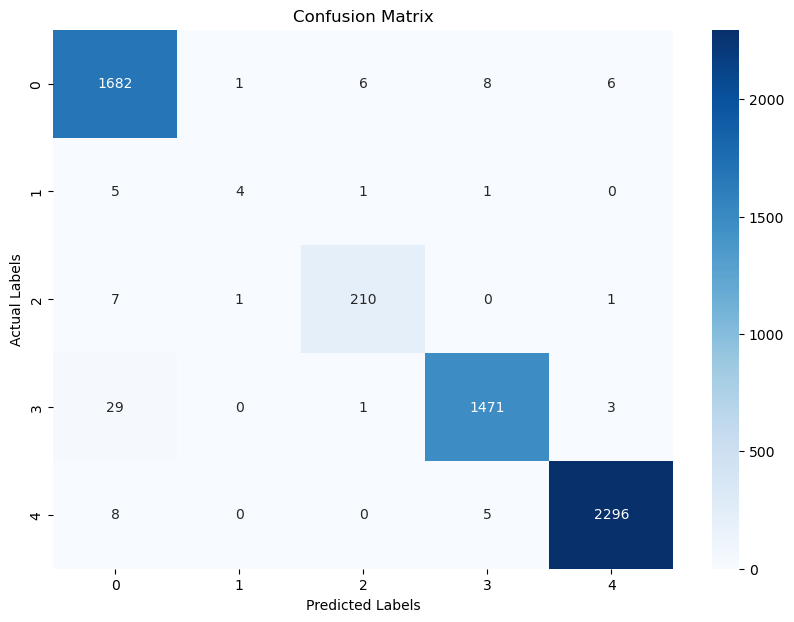

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.015316360055351308
At iteration 2, the best solution fitness is 0.015316360055351308
At iteration 3, the best solution fitness is 0.014929240277435878
At iteration 4, the best solution fitness is 0.014929240277435878
At iteration 5, the best solution fitness is 0.014929240277435878
At iteration 6, the best solution fitness is 0.014929240277435878
At iteration 7, the best solution fitness is 0.014929240277435878
At iteration 8, the best solution fitness is 0.014929240277435878
At iteration 9, the best solution fitness is 0.014929240277435878
At iteration 10, the best solution fitness is 0.014929240277435878
At iteration 11, the best solution fitness is 0.014929240277435878
At iteration 12, the best solution fitness is 0.014929240277435878
At iteration 13, the best solution fitness is 0.014929240277435878
At iteration 14, the best solution fitness is 0.014929240277435878
At iteration 15, the best solution fitness is 0.014

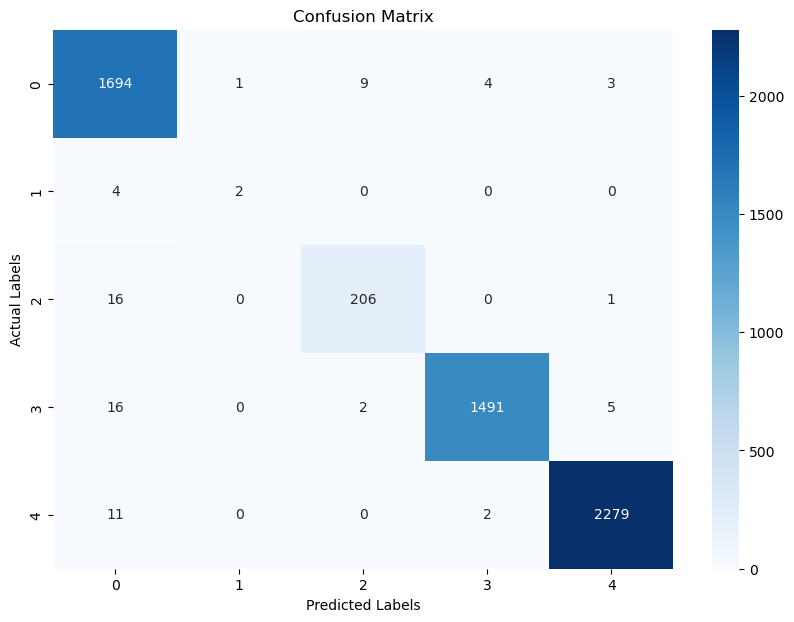


Average Number of Features Selected Each Run: 18.20

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9875, STD=0.0017
Precision: AVG=0.9044, STD=0.0145
Recall: AVG=0.8755, STD=0.0396
F1-Score: AVG=0.8838, STD=0.0245


In [16]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.013895477659962763
At iteration 2, the best solution fitness is 0.012819182803731961
At iteration 3, the best solution fitness is 0.012819182803731961
At iteration 4, the best solution fitness is 0.012819182803731961
At iteration 5, the best solution fitness is 0.012819182803731961
At iteration 6, the best solution fitness is 0.012819182803731961
At iteration 7, the best solution fitness is 0.012819182803731961
At iteration 8, the best solution fitness is 0.012819182803731961
At iteration 9, the best solution fitness is 0.012819182803731961
At iteration 10, the best solution fitness is 0.012819182803731961
At iteration 11, the best solution fitness is 0.012819182803731961
At iteration 12, the best solution fitness is 0.012819182803731961
At iteration 13, the best solution fitness is 0.012819182803731961
At iteration 14, the best solution fitness is 0.012819182803731961
At iteration 15, the best solution fitness is 0.012

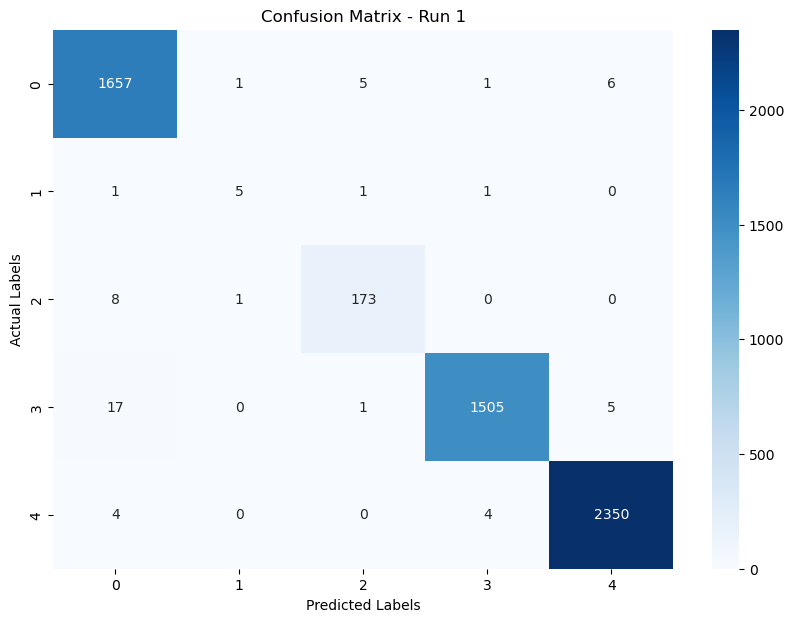

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1670
           1       0.71      0.62      0.67         8
           2       0.96      0.95      0.96       182
           3       1.00      0.98      0.99      1528
           4       1.00      1.00      1.00      2358

    accuracy                           0.99      5746
   macro avg       0.93      0.91      0.92      5746
weighted avg       0.99      0.99      0.99      5746

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.013651575220938373
At iteration 2, the best solution fitness is 0.011899561094462274
At iteration 3, the best solution fitness is 0.011899561094462274
At iteration 4, the best solution fitness is 0.011899561094462274
At iteration 5, the best solution fitness is 0.011899561094462274
At iteration 6, the best solution fitness is 0.011899561094462274
At iteration 7, the best solution fitness is 0.01182795242501675

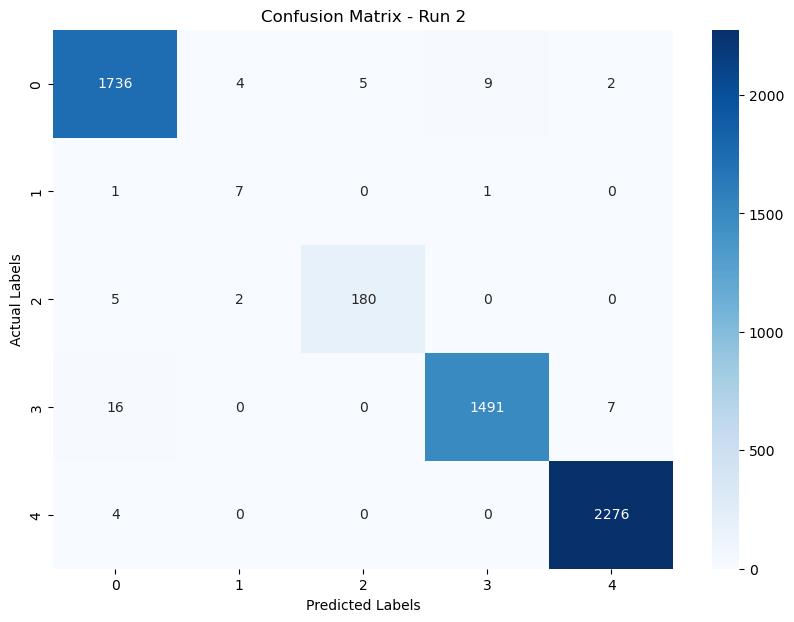

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1756
           1       0.54      0.78      0.64         9
           2       0.97      0.96      0.97       187
           3       0.99      0.98      0.99      1514
           4       1.00      1.00      1.00      2280

    accuracy                           0.99      5746
   macro avg       0.90      0.94      0.92      5746
weighted avg       0.99      0.99      0.99      5746

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.01296240014262311
At iteration 2, the best solution fitness is 0.011268538877522456
At iteration 3, the best solution fitness is 0.010709125330028046
At iteration 4, the best solution fitness is 0.010608440229894805
At iteration 5, the best solution fitness is 0.010608440229894805
At iteration 6, the best solution fitness is 0.010608440229894805
At iteration 7, the best solution fitness is 0.010608440229894805

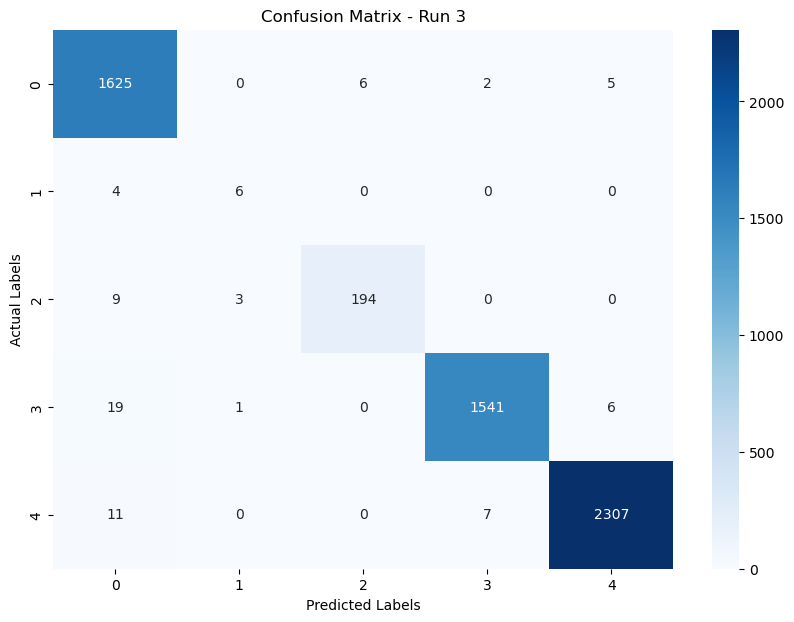

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1638
           1       0.60      0.60      0.60        10
           2       0.97      0.94      0.96       206
           3       0.99      0.98      0.99      1567
           4       1.00      0.99      0.99      2325

    accuracy                           0.99      5746
   macro avg       0.91      0.90      0.90      5746
weighted avg       0.99      0.99      0.99      5746

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.014454891207457174
At iteration 2, the best solution fitness is 0.013694107459696282
At iteration 3, the best solution fitness is 0.013622498790250652
At iteration 4, the best solution fitness is 0.013622498790250652
At iteration 5, the best solution fitness is 0.013622498790250652
At iteration 6, the best solution fitness is 0.013622498790250652
At iteration 7, the best solution fitness is 0.01362249879025065

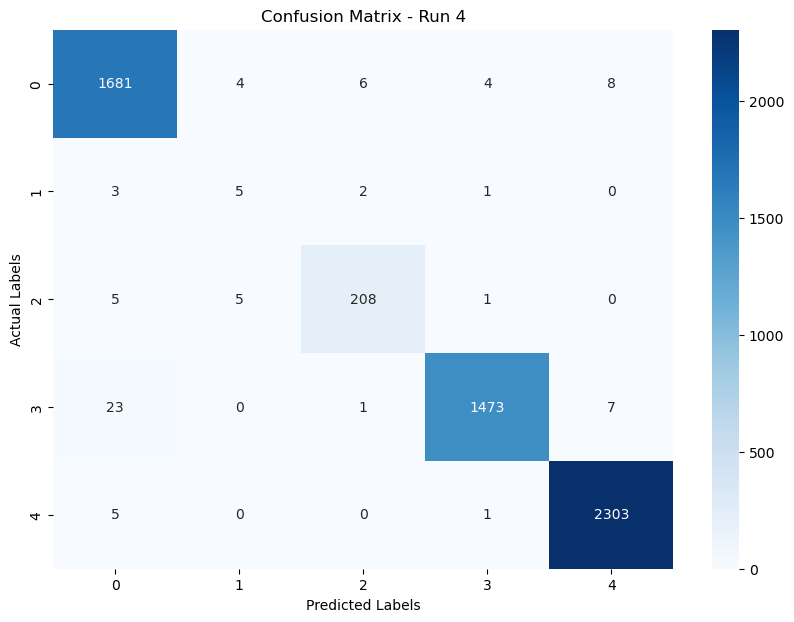

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1703
           1       0.36      0.45      0.40        11
           2       0.96      0.95      0.95       219
           3       1.00      0.98      0.99      1504
           4       0.99      1.00      1.00      2309

    accuracy                           0.99      5746
   macro avg       0.86      0.87      0.86      5746
weighted avg       0.99      0.99      0.99      5746

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.011928637525149997
At iteration 2, the best solution fitness is 0.011268538877522456
At iteration 3, the best solution fitness is 0.010995560007810344
At iteration 4, the best solution fitness is 0.010995560007810344
At iteration 5, the best solution fitness is 0.010995560007810344
At iteration 6, the best solution fitness is 0.010995560007810344
At iteration 7, the best solution fitness is 0.01099556000781034

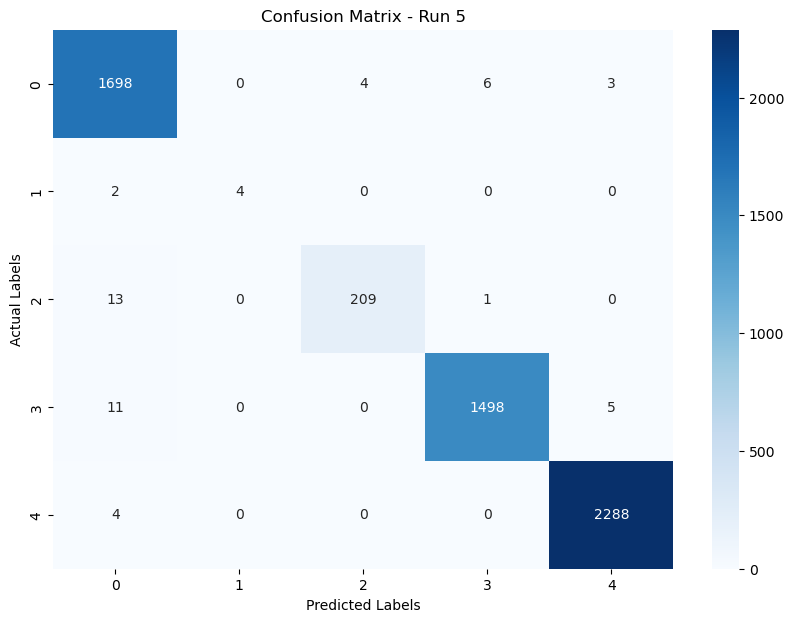

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1711
           1       1.00      0.67      0.80         6
           2       0.98      0.94      0.96       223
           3       1.00      0.99      0.99      1514
           4       1.00      1.00      1.00      2292

    accuracy                           0.99      5746
   macro avg       0.99      0.92      0.95      5746
weighted avg       0.99      0.99      0.99      5746



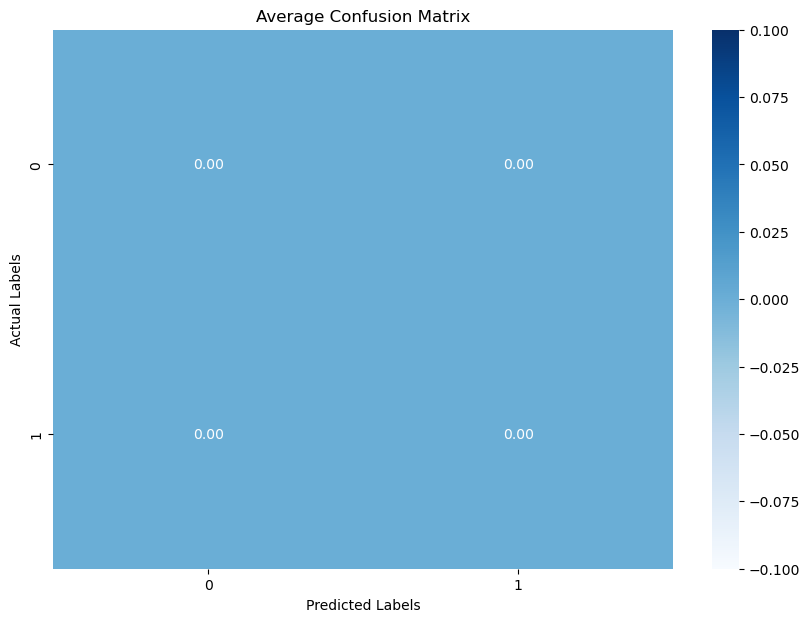


Average Classification Report:
Accuracy: 0.9892
Precision: 0.9163
Recall: 0.9089
F1-Score: 0.9100

Average Number of Features Selected Each Run: 13.80

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9892, STD=0.0018
Precision: AVG=0.9163, STD=0.0443
Recall: AVG=0.9089, STD=0.0223
F1-Score: AVG=0.9100, STD=0.0270


In [22]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = confusion_matrices / n_runs

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")

In [14]:
data = pd.read_csv('KDD99-Cleaned-com.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('label', axis=1)
y = data['label']
print (X.shape)
print (y.shape)

(14902, 115)
(14902,)



Classifier: KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1545
           1       1.00      1.00      1.00      1436

    accuracy                           1.00      2981
   macro avg       1.00      1.00      1.00      2981
weighted avg       1.00      1.00      1.00      2981



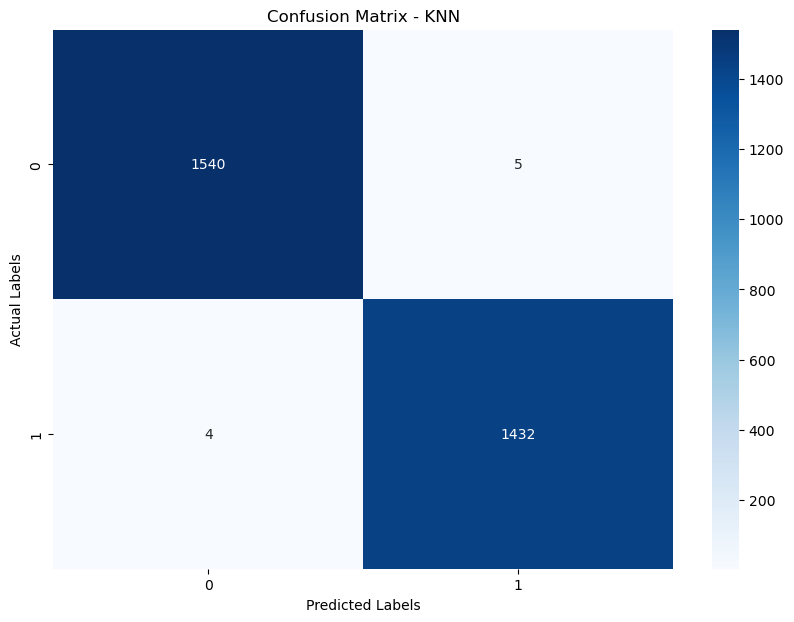


Classifier: DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1545
           1       1.00      1.00      1.00      1436

    accuracy                           1.00      2981
   macro avg       1.00      1.00      1.00      2981
weighted avg       1.00      1.00      1.00      2981



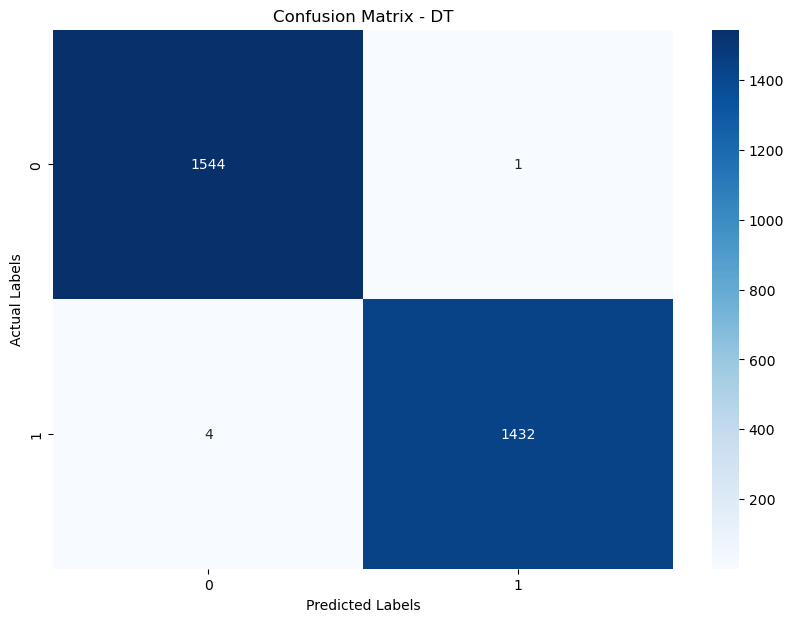


Classifier: NB
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1545
           1       0.99      0.90      0.94      1436

    accuracy                           0.95      2981
   macro avg       0.95      0.95      0.95      2981
weighted avg       0.95      0.95      0.95      2981



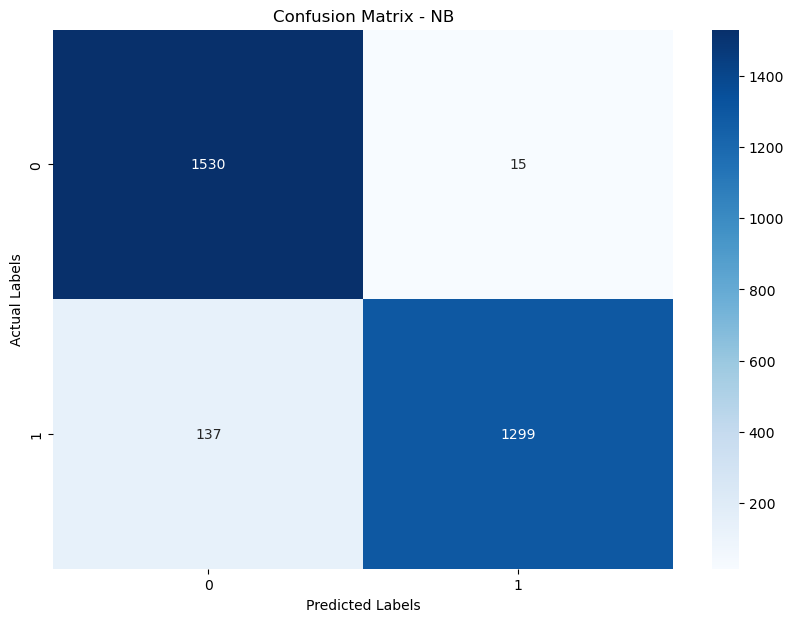


Classifier: SVM
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1545
           1       1.00      0.99      1.00      1436

    accuracy                           1.00      2981
   macro avg       1.00      1.00      1.00      2981
weighted avg       1.00      1.00      1.00      2981



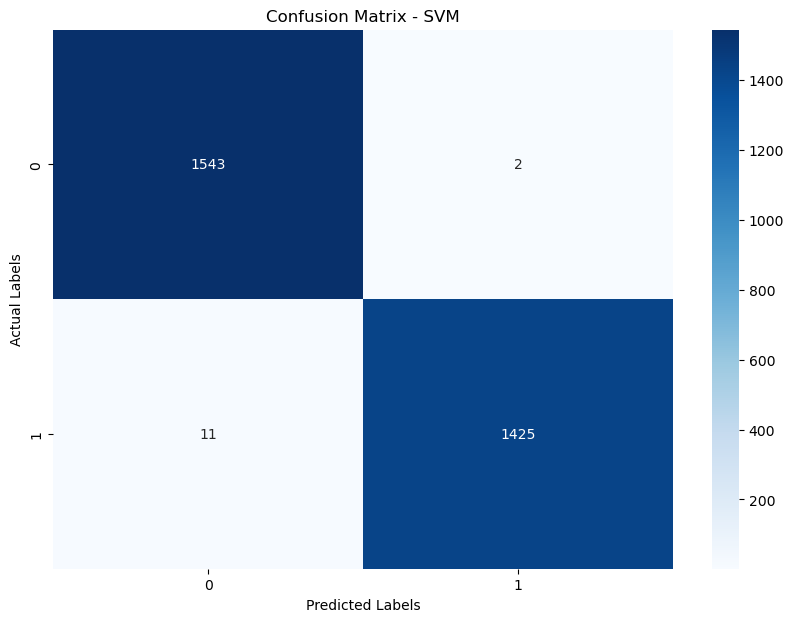


Evaluation Metrics for Each Classifier:

Classifier: KNN
Accuracy: 0.9970
Precision: 0.9970
Recall: 0.9970
F1-Score: 0.9970

Classifier: DT
Accuracy: 0.9983
Precision: 0.9984
Recall: 0.9983
F1-Score: 0.9983

Classifier: NB
Accuracy: 0.9490
Precision: 0.9532
Recall: 0.9474
F1-Score: 0.9487

Classifier: SVM
Accuracy: 0.9956
Precision: 0.9958
Recall: 0.9955
F1-Score: 0.9956


In [15]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=7),  # Adjusted n_neighbors parameter as an example
    'DT': DecisionTreeClassifier(max_depth=10),  # Adjusted max_depth parameter as an example
    'NB': GaussianNB(),
    'SVM': SVC()
}

# Initialize dictionaries to store evaluation metrics
all_accuracies = {}
all_precisions = {}
all_recalls = {}
all_f1_scores = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics
    all_accuracies[clf_name] = accuracy
    all_precisions[clf_name] = precision
    all_recalls[clf_name] = recall
    all_f1_scores[clf_name] = f1
    
    # Print classification report
    print(f"\nClassifier: {clf_name}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Print evaluation metrics for each classifier
print("\nEvaluation Metrics for Each Classifier:")
for clf_name in classifiers.keys():
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {all_accuracies[clf_name]:.4f}")
    print(f"Precision: {all_precisions[clf_name]:.4f}")
    print(f"Recall: {all_recalls[clf_name]:.4f}")
    print(f"F1-Score: {all_f1_scores[clf_name]:.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.004853842451467979
At iteration 2, the best solution fitness is 0.004853842451467979
At iteration 3, the best solution fitness is 0.004853842451467979
At iteration 4, the best solution fitness is 0.004853842451467979
At iteration 5, the best solution fitness is 0.004853842451467979
At iteration 6, the best solution fitness is 0.004853842451467979
At iteration 7, the best solution fitness is 0.004853842451467979
At iteration 8, the best solution fitness is 0.004853842451467979
At iteration 9, the best solution fitness is 0.004853842451467979
At iteration 10, the best solution fitness is 0.004853842451467979
At iteration 11, the best solution fitness is 0.004853842451467979
At iteration 12, the best solution fitness is 0.004853842451467979
At iteration 13, the best solution fitness is 0.004853842451467979
At iteration 14, the best solution fitness is 0.004853842451467979
At iteration 15, the best solution fitness is 0.004

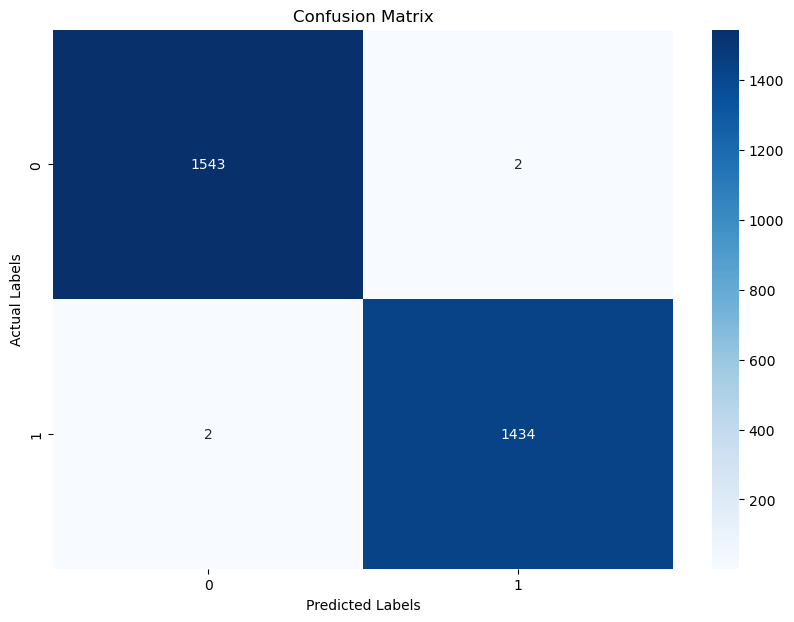

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.005605005615273501
At iteration 2, the best solution fitness is 0.005415369805872024
At iteration 3, the best solution fitness is 0.005415369805872024
At iteration 4, the best solution fitness is 0.005328413284132893
At iteration 5, the best solution fitness is 0.005328413284132893
At iteration 6, the best solution fitness is 0.005328413284132893
At iteration 7, the best solution fitness is 0.005328413284132893
At iteration 8, the best solution fitness is 0.005328413284132893
At iteration 9, the best solution fitness is 0.005328413284132893
At iteration 10, the best solution fitness is 0.005328413284132893
At iteration 11, the best solution fitness is 0.005328413284132893
At iteration 12, the best solution fitness is 0.005328413284132893
At iteration 13, the best solution fitness is 0.005328413284132893
At iteration 14, the best solution fitness is 0.005328413284132893
At iteration 15, the best solution fitness is 0.005

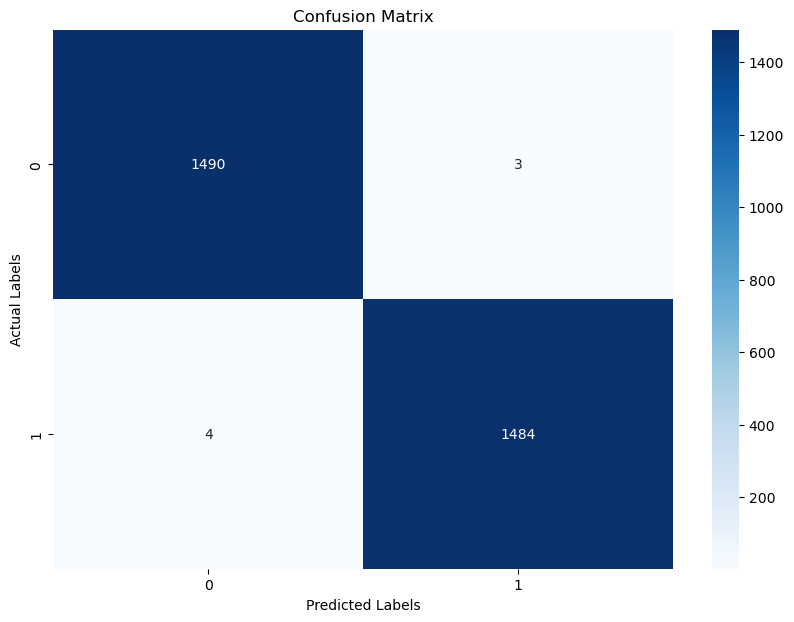

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.005778918658751762
At iteration 2, the best solution fitness is 0.005605005615273501
At iteration 3, the best solution fitness is 0.005605005615273501
At iteration 4, the best solution fitness is 0.005257179528316979
At iteration 5, the best solution fitness is 0.005241456762393763
At iteration 6, the best solution fitness is 0.005241456762393763
At iteration 7, the best solution fitness is 0.005241456762393763
At iteration 8, the best solution fitness is 0.005241456762393763
At iteration 9, the best solution fitness is 0.005241456762393763
At iteration 10, the best solution fitness is 0.005241456762393763
At iteration 11, the best solution fitness is 0.005241456762393763
At iteration 12, the best solution fitness is 0.005241456762393763
At iteration 13, the best solution fitness is 0.005241456762393763
At iteration 14, the best solution fitness is 0.005241456762393763
At iteration 15, the best solution fitness is 0.005

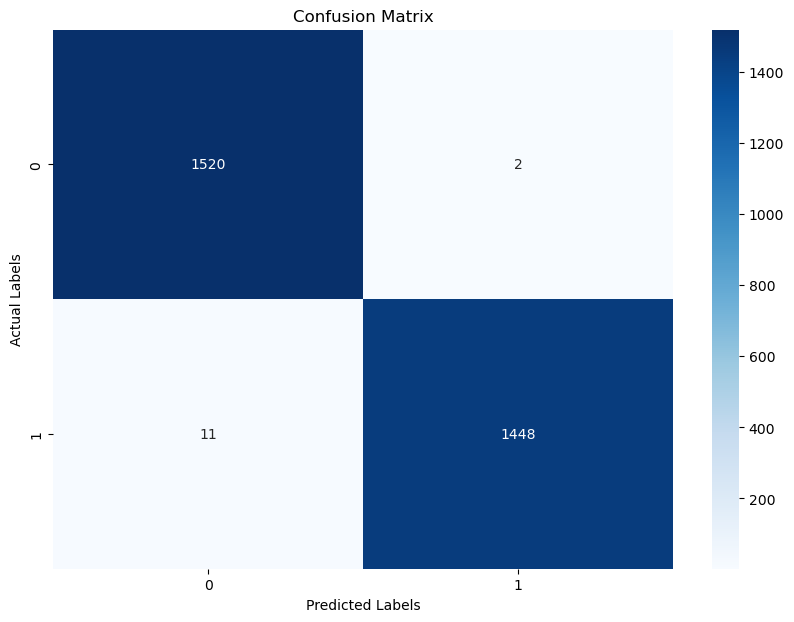

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.005691962137012631
At iteration 2, the best solution fitness is 0.005257179528316979
At iteration 3, the best solution fitness is 0.005257179528316979
At iteration 4, the best solution fitness is 0.005257179528316979
At iteration 5, the best solution fitness is 0.005257179528316979
At iteration 6, the best solution fitness is 0.005257179528316979
At iteration 7, the best solution fitness is 0.005257179528316979
At iteration 8, the best solution fitness is 0.005257179528316979
At iteration 9, the best solution fitness is 0.005257179528316979
At iteration 10, the best solution fitness is 0.005257179528316979
At iteration 11, the best solution fitness is 0.005257179528316979
At iteration 12, the best solution fitness is 0.005257179528316979
At iteration 13, the best solution fitness is 0.005257179528316979
At iteration 14, the best solution fitness is 0.005257179528316979
At iteration 15, the best solution fitness is 0.005

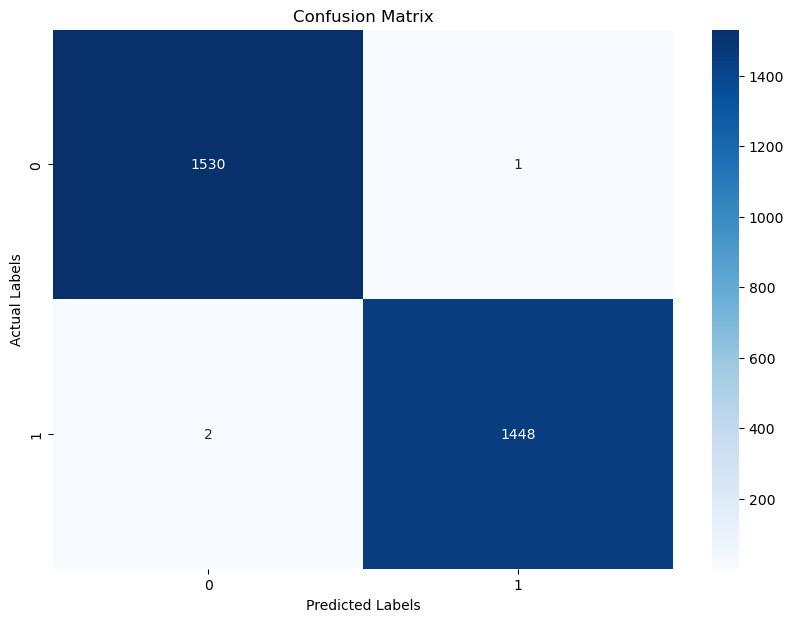

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.004996309963099588
At iteration 2, the best solution fitness is 0.004996309963099588
At iteration 3, the best solution fitness is 0.004751163163805523
At iteration 4, the best solution fitness is 0.004751163163805523
At iteration 5, the best solution fitness is 0.004751163163805523
At iteration 6, the best solution fitness is 0.004751163163805523
At iteration 7, the best solution fitness is 0.004751163163805523
At iteration 8, the best solution fitness is 0.004751163163805523
At iteration 9, the best solution fitness is 0.004751163163805523
At iteration 10, the best solution fitness is 0.004751163163805523
At iteration 11, the best solution fitness is 0.004751163163805523
At iteration 12, the best solution fitness is 0.004751163163805523
At iteration 13, the best solution fitness is 0.004751163163805523
At iteration 14, the best solution fitness is 0.004751163163805523
At iteration 15, the best solution fitness is 0.004

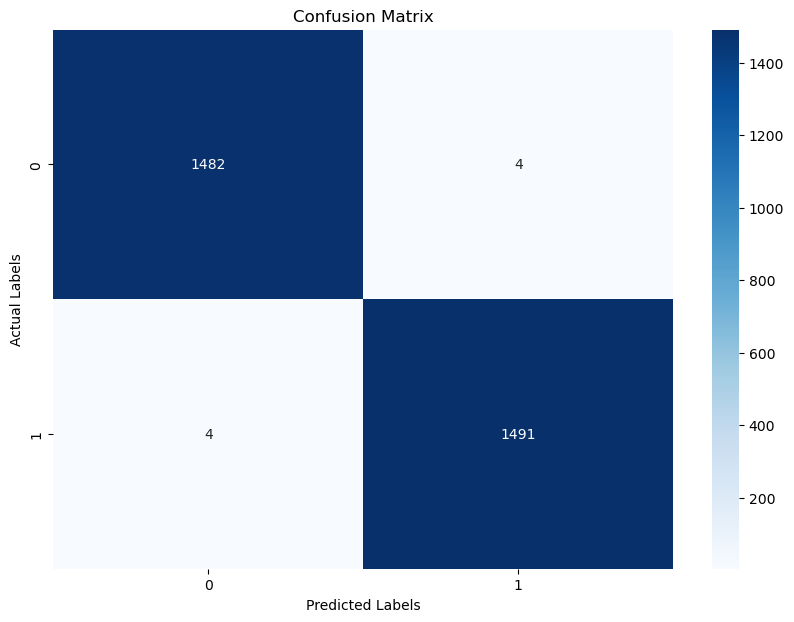


Average Number of Features Selected Each Run: 24.80

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9977, STD=0.0012
Precision: AVG=0.9977, STD=0.0012
Recall: AVG=0.9976, STD=0.0012
F1-Score: AVG=0.9977, STD=0.0012


In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.003968554468153348
At iteration 2, the best solution fitness is 0.003288625060163631
At iteration 3, the best solution fitness is 0.0028538424514679786
At iteration 4, the best solution fitness is 0.0027668859297288483
At iteration 5, the best solution fitness is 0.0027668859297288483
At iteration 6, the best solution fitness is 0.0026799294079897177
At iteration 7, the best solution fitness is 0.0026799294079897177
At iteration 8, the best solution fitness is 0.0026799294079897177
At iteration 9, the best solution fitness is 0.0026799294079897177
At iteration 10, the best solution fitness is 0.0026799294079897177
At iteration 11, the best solution fitness is 0.0026799294079897177
At iteration 12, the best solution fitness is 0.0026799294079897177
At iteration 13, the best solution fitness is 0.0026799294079897177
At iteration 14, the best solution fitness is 0.0026799294079897177
At iteration 15, the best solution fitn

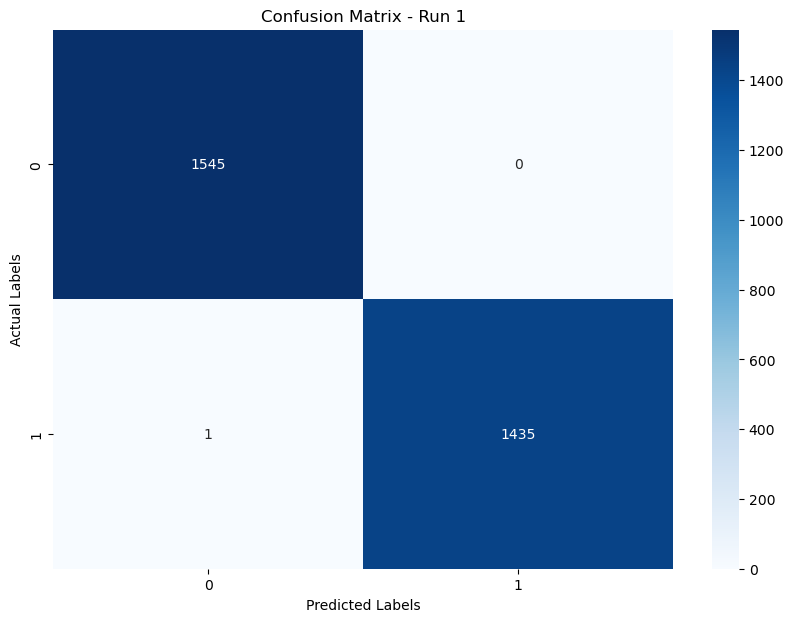

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1545
           1       1.00      1.00      1.00      1436

    accuracy                           1.00      2981
   macro avg       1.00      1.00      1.00      2981
weighted avg       1.00      1.00      1.00      2981

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.0027354403978821964
At iteration 2, the best solution fitness is 0.0024902935985881306
At iteration 3, the best solution fitness is 0.00231638055510987
At iteration 4, the best solution fitness is 0.0022294240333707396
At iteration 5, the best solution fitness is 0.002142467511631609
At iteration 6, the best solution fitness is 0.002142467511631609
At iteration 7, the best solution fitness is 0.001968554468153348
At iteration 8, the best solution fitness is 0.001968554468153348
At iteration 9, the best solution fitness is 0.001968554468153348
At iteration 10, the best 

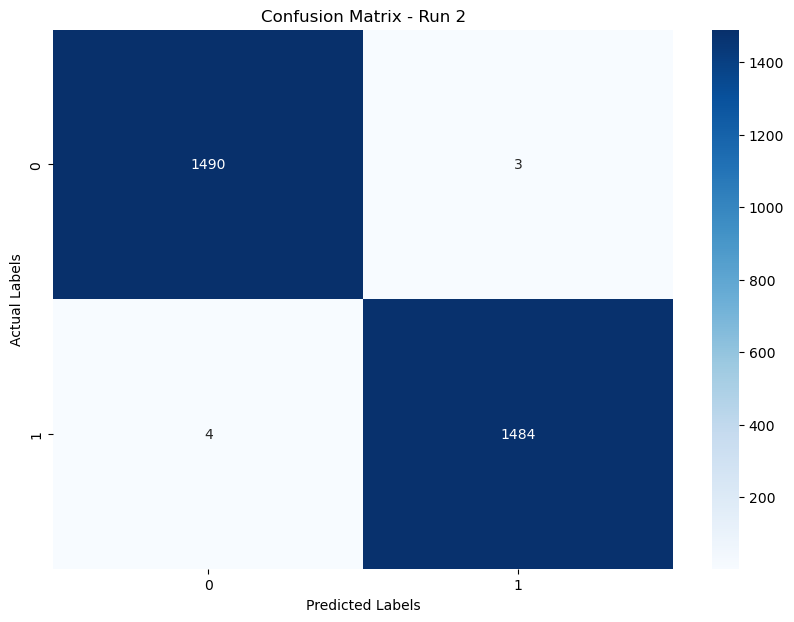

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1493
           1       1.00      1.00      1.00      1488

    accuracy                           1.00      2981
   macro avg       1.00      1.00      1.00      2981
weighted avg       1.00      1.00      1.00      2981

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.0028223969196213266
At iteration 2, the best solution fitness is 0.002300657789186544
At iteration 3, the best solution fitness is 0.002213701267447414
At iteration 4, the best solution fitness is 0.002213701267447414
At iteration 5, the best solution fitness is 0.002039788223969153
At iteration 6, the best solution fitness is 0.002039788223969153
At iteration 7, the best solution fitness is 0.0019528317022300223
At iteration 8, the best solution fitness is 0.0019528317022300223
At iteration 9, the best solution fitness is 0.0019528317022300223
At iteration 10, the bes

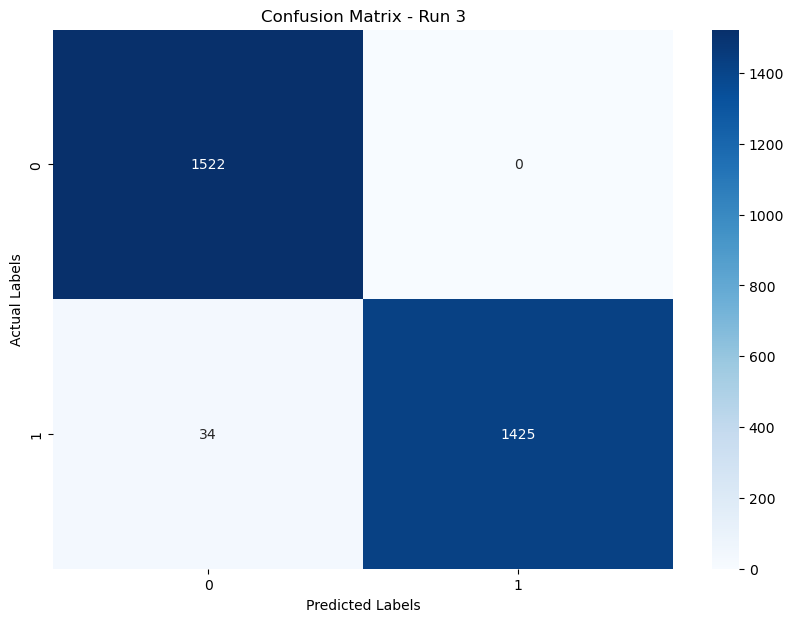

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1522
           1       1.00      0.98      0.99      1459

    accuracy                           0.99      2981
   macro avg       0.99      0.99      0.99      2981
weighted avg       0.99      0.99      0.99      2981

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.004332103321033196
At iteration 2, the best solution fitness is 0.0038973207123375437
At iteration 3, the best solution fitness is 0.0034625381036418918
At iteration 4, the best solution fitness is 0.0033755815819027615
At iteration 5, the best solution fitness is 0.003288625060163631
At iteration 6, the best solution fitness is 0.0032016685384245003
At iteration 7, the best solution fitness is 0.0032016685384245003
At iteration 8, the best solution fitness is 0.0032016685384245003
At iteration 9, the best solution fitness is 0.00311471201668537
At iteration 10, the be

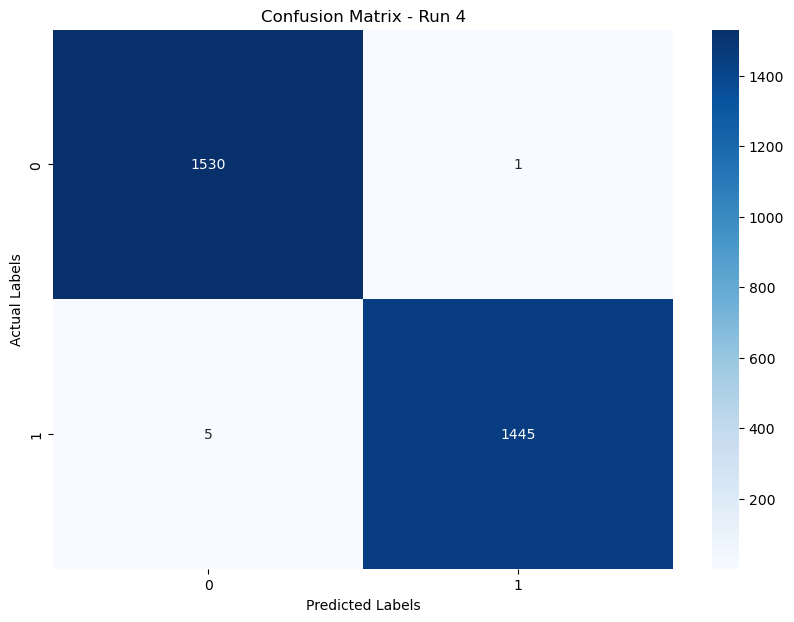

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1531
           1       1.00      1.00      1.00      1450

    accuracy                           1.00      2981
   macro avg       1.00      1.00      1.00      2981
weighted avg       1.00      1.00      1.00      2981

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.0038103641905984135
At iteration 2, the best solution fitness is 0.0034625381036418918
At iteration 3, the best solution fitness is 0.00311471201668537
At iteration 4, the best solution fitness is 0.0030277554949462394
At iteration 5, the best solution fitness is 0.0028538424514679786
At iteration 6, the best solution fitness is 0.0028538424514679786
At iteration 7, the best solution fitness is 0.0028538424514679786
At iteration 8, the best solution fitness is 0.0028538424514679786
At iteration 9, the best solution fitness is 0.0028538424514679786
At iteration 10, the 

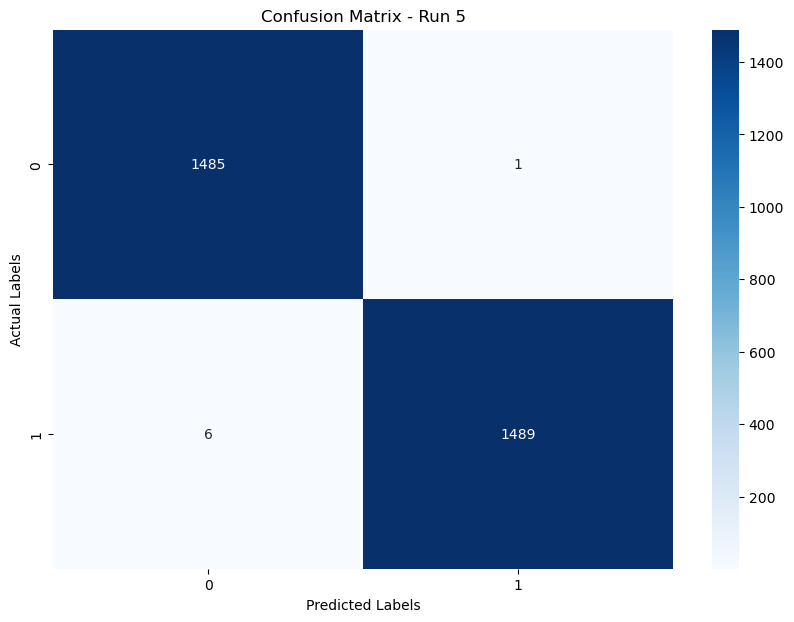

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      2981
   macro avg       1.00      1.00      1.00      2981
weighted avg       1.00      1.00      1.00      2981



NameError: name 'confusion_matrices' is not defined

In [6]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-2 * x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = confusion_matrices / n_runs

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")

In [24]:
data = pd.read_csv('Cleaned-Dark-bainry-com.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('Type', axis=1)
y = data['Type']
print (X.shape)
print (y.shape)

(12601, 57)
(12601,)


Run 1/2
At iteration 1, the best solution fitness is 0.0052
At iteration 2, the best solution fitness is 0.0044
At iteration 3, the best solution fitness is 0.0033
At iteration 4, the best solution fitness is 0.0031
At iteration 5, the best solution fitness is 0.0029
At iteration 6, the best solution fitness is 0.0029
At iteration 7, the best solution fitness is 0.0029
At iteration 8, the best solution fitness is 0.0029
At iteration 9, the best solution fitness is 0.0029
At iteration 10, the best solution fitness is 0.0029
At iteration 11, the best solution fitness is 0.0029
At iteration 12, the best solution fitness is 0.0029
At iteration 13, the best solution fitness is 0.0029
At iteration 14, the best solution fitness is 0.0029
At iteration 15, the best solution fitness is 0.0029
At iteration 16, the best solution fitness is 0.0029
At iteration 17, the best solution fitness is 0.0029
At iteration 18, the best solution fitness is 0.0029
At iteration 19, the best solution fitness is 0

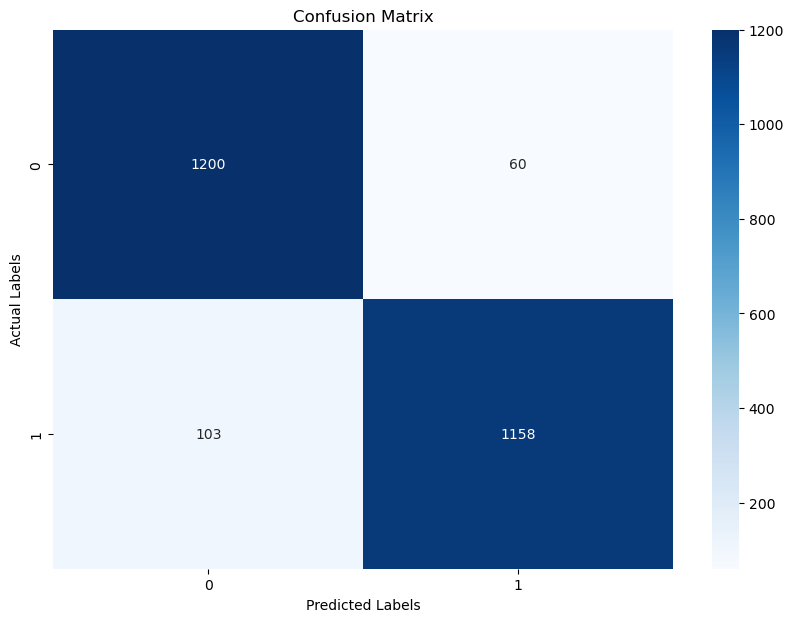

Run 2/2
At iteration 1, the best solution fitness is 0.0047
At iteration 2, the best solution fitness is 0.0042
At iteration 3, the best solution fitness is 0.0042
At iteration 4, the best solution fitness is 0.0042
At iteration 5, the best solution fitness is 0.0042
At iteration 6, the best solution fitness is 0.0042
At iteration 7, the best solution fitness is 0.0035
At iteration 8, the best solution fitness is 0.0035
At iteration 9, the best solution fitness is 0.0035
At iteration 10, the best solution fitness is 0.0035
At iteration 11, the best solution fitness is 0.0035
At iteration 12, the best solution fitness is 0.0035
At iteration 13, the best solution fitness is 0.0035
At iteration 14, the best solution fitness is 0.0035
At iteration 15, the best solution fitness is 0.0035
At iteration 16, the best solution fitness is 0.0035
At iteration 17, the best solution fitness is 0.0035
At iteration 18, the best solution fitness is 0.0035
At iteration 19, the best solution fitness is 0

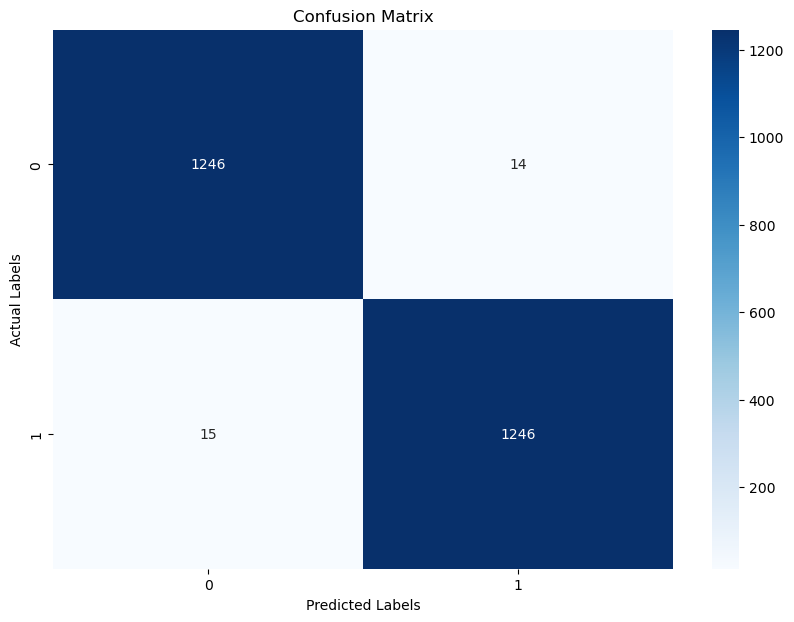


Average Number of Features Selected Each Run: 8.50

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9619, STD=0.0266
Precision: AVG=0.9622, STD=0.0263
Recall: AVG=0.9619, STD=0.0266
F1-Score: AVG=0.9619, STD=0.0266


In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Cost function without transformation function
def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Determine inclusion probabilities directly using binary values
    selected_features = x > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)
    classifier = KNeighborsClassifier(n_neighbors=1, weights='distance', p=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(SearchAgents_no, dim, ub, lb):
    Boundary_no = len(ub) if isinstance(ub, (list, np.ndarray)) else 1
    X = np.zeros((SearchAgents_no, dim))
    # If the boundaries of all variables are equal
    if Boundary_no == 1:
        X = np.random.rand(SearchAgents_no, dim) * (ub - lb) + lb
    # If each variable has a different lb and ub
    elif Boundary_no > 1:
        for i in range(dim):
            ub_i = ub[i]
            lb_i = lb[i]
            X[:, i] = np.random.rand(SearchAgents_no) * (ub_i - lb_i) + lb_i
    return X

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-3 * x))

def SCHO(N, Max_iteration, lb, ub, dim, fobj, X_data, y_data):
    Destination_position = np.zeros(dim)
    Destination_fitness = float('inf')
    Destination_position_second = np.zeros(dim)
    Convergence_curve = np.zeros(Max_iteration)
    Position_sort = np.zeros((N, dim))

    # Initialize SCHO parameters
    u, m, n = 0.388, 0.45, 0.5
    p, q = 10, 9
    Alpha, Beta = 4.6, 1.55
    ct = 3.6
    BS = int(Max_iteration / Beta)
    T = int(Max_iteration / ct)
    BSi = 0
    BSi_temp = 0
    ub_2, lb_2 = np.array([ub]*dim), np.array([lb]*dim)

    # Initialize the set of random solutions
    X = initialization(N, dim, ub_2, lb_2)
    Objective_values = np.zeros(N)
    
    # Calculate the fitness of the first set and find the best one
    for i in range(N):
        Objective_values[i] = fobj(X[i, :], X_data, y_data)
        if Objective_values[i] < Destination_fitness:
            Destination_position = X[i, :]
            Destination_fitness = Objective_values[i]
    
    Convergence_curve[0] = Destination_fitness
    t = 1

    # Main loop
    while t <= Max_iteration:
        for i in range(N):  # in i-th solution
            for j in range(dim):  # in j-th dimension
                # update A by using Eq. (17)
                cosh2 = (np.exp(t / Max_iteration) + np.exp(-t / Max_iteration)) / 2
                sinh2 = (np.exp(t / Max_iteration) - np.exp(-t / Max_iteration)) / 2
                r1 = np.random.rand()
                A = (p - q * (t / Max_iteration) ** (cosh2 / sinh2)) * r1

                # enter the bounded search strategy
                if t == BSi:
                    delta = (1 - t / Max_iteration) * abs(Destination_position[j] - Destination_position_second[j])
                    ub_2[j] = min(Destination_position[j] + delta, ub)
                    lb_2[j] = max(Destination_position[j] - delta, lb)
                    X = initialization(N, dim, ub_2, lb_2)
                    BSi_temp = BSi
                    BSi = 0

                # the first phase of exploration and exploitation
                if t <= T:
                    r2, r3, r4, r5 = np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()
                    a1 = 3 * (-1.3 * t / Max_iteration + m)
                    sinh = (np.exp(r3) - np.exp(-r3)) / 2
                    cosh = (np.exp(r3) + np.exp(-r3)) / 2
                    if A > 1:
                        W1 = r2 * a1 * (cosh + u * sinh - 1)
                        if r5 <= 0.5:
                            X[i, j] = Destination_position[j] + r4 * W1 * X[i, j]
                        else:
                            X[i, j] = Destination_position[j] - r4 * W1 * X[i, j]
                    else:
                        W3 = r2 * a1 * (cosh + u * sinh)
                        if r5 <= 0.5:
                            X[i, j] = Destination_position[j] + r4 * W3 * X[i, j]
                        else:
                            X[i, j] = Destination_position[j] - r4 * W3 * X[i, j]
                else:
                    # the second phase of exploration and exploitation
                    r2, r3, r4, r5 = np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()
                    a2 = 2 * (-t / Max_iteration + n)
                    W2 = r2 * a2
                    sinh = (np.exp(r3) - np.exp(-r3)) / 2
                    cosh = (np.exp(r3) + np.exp(-r3)) / 2
                    if A < 1:
                        X[i, j] = X[i, j] + r5 * sinh / cosh * abs(W2 * Destination_position[j] - X[i, j])
                    else:
                        if r4 <= 0.5:
                            X[i, j] = X[i, j] + abs(0.003 * W2 * Destination_position[j] - X[i, j])
                        else:
                            X[i, j] = X[i, j] - abs(0.003 * W2 * Destination_position[j] - X[i, j])
        
        BSi = BSi_temp
        for i in range(N):
            # Check if solutions go outside the search space and bring them back
            Flag4ub = X[i, :] > ub_2
            Flag4lb = X[i, :] < lb_2
            X[i, :] = (X[i, :] * (~(Flag4ub + Flag4lb))) + (ub_2 + lb_2) / 2 * Flag4ub + lb_2 * Flag4lb
            # Calculate the objective values
            Objective_values[i] = fobj(X[i, :], X_data, y_data)
            # Update the destination if there is a better solution
            if Objective_values[i] < Destination_fitness:
                Destination_position = X[i, :]
                Destination_fitness = Objective_values[i]

        print(f'At iteration {t}, the best solution fitness is {Destination_fitness:.4f}')
        
        # find the second solution
        if t == BS:
            BSi = BS + 1
            BS = BS + int((Max_iteration - BS) / Alpha)
            temp = np.zeros(dim)
            temp2 = np.zeros((N, dim))
            # sorting
            for i in range(N - 1):
                for j in range(N - 1 - i):
                    if Objective_values[j] > Objective_values[j + 1]:
                        temp = Objective_values[j]
                        Objective_values[j] = Objective_values[j + 1]
                        Objective_values[j + 1] = temp
                        temp2[j, :] = Position_sort[j, :]
                        Position_sort[j, :] = Position_sort[j + 1, :]
                        Position_sort[j + 1, :] = temp2[j, :]
            Destination_position_second = Position_sort[1, :]  # the second solution
        
        Convergence_curve[t - 1] = Destination_fitness
        t += 1

    avg_fitness = np.mean(Objective_values)
    print(f'Average fitness for this run: {avg_fitness}')
    
    return Destination_fitness, Destination_position, Convergence_curve

def run_optimization():
    N = 100  # Increase population size
    M_Iter = 20  # Increase number of iterations
    LB = 0
    UB = 1
    Dim = X.shape[1]
    n_runs = 2

    all_accuracies = []
    all_precisions = []
    all_recalls = []
    all_f1_scores = []
    selected_features_counts = []

    for run in range(n_runs):
        print(f"Run {run + 1}/{n_runs}")
        Best_FF, Best_P, Conv_curve = SCHO(N, M_Iter, LB, UB, Dim, cost_function, X, y)
        
        best_accuracy = 1 - Best_FF
        print(f"Best Accuracy = {best_accuracy:.4f}")
        
        selected_features = s_shaped_transformation(Best_P) > 0.5
        selected_feature_indices = np.where(selected_features)[0]
        selected_features_counts.append(len(selected_feature_indices))
        
        if len(selected_feature_indices) == 0:
            print("No features selected, skipping this run.")
            continue

        X_selected = X.iloc[:, selected_feature_indices] if isinstance(X, pd.DataFrame) else X[:, selected_feature_indices]
        X_selected = np.ascontiguousarray(X_selected)
        
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run, stratify=y)
        
        knn = KNeighborsClassifier(n_neighbors=1, weights='distance', p=1)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        all_accuracies.append(accuracy_score(y_test, y_pred))
        all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Labels')
        plt.xlabel('Predicted Labels')
        plt.show()

    avg_selected_features = np.mean(selected_features_counts)
    print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

    print("\nAverage and Standard Deviation after multiple runs:")
    print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
    print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
    print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
    print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")

# Run optimization without transformation function
run_optimization()


Classifier: KNN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1295
           1       0.99      0.99      0.99      1226

    accuracy                           0.99      2521
   macro avg       0.99      0.99      0.99      2521
weighted avg       0.99      0.99      0.99      2521



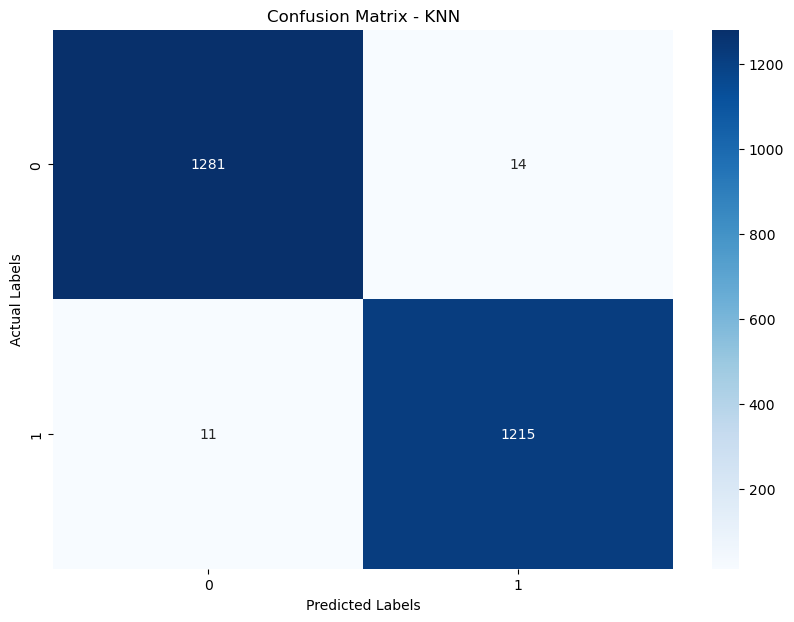


Classifier: DT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1295
           1       1.00      0.99      0.99      1226

    accuracy                           0.99      2521
   macro avg       0.99      0.99      0.99      2521
weighted avg       0.99      0.99      0.99      2521



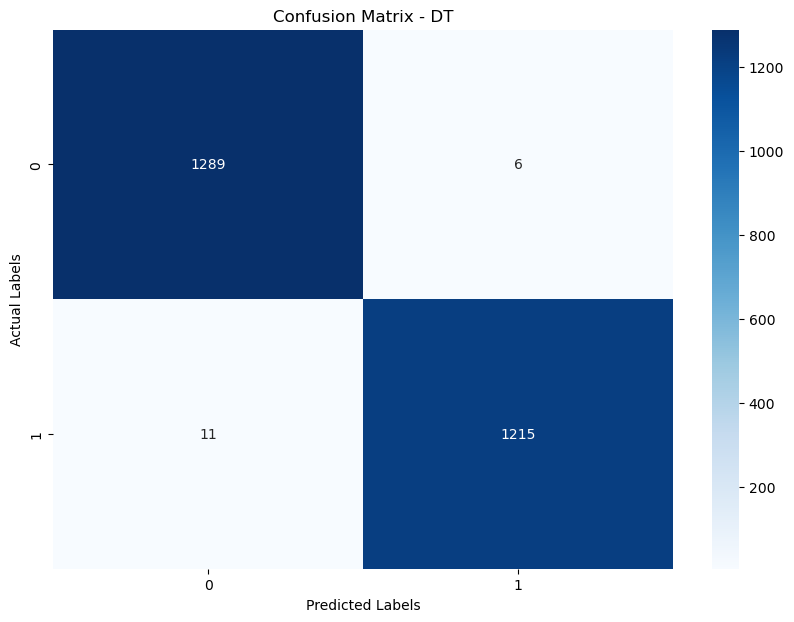


Classifier: NB
              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1295
           1       0.93      0.44      0.59      1226

    accuracy                           0.71      2521
   macro avg       0.79      0.70      0.68      2521
weighted avg       0.78      0.71      0.69      2521



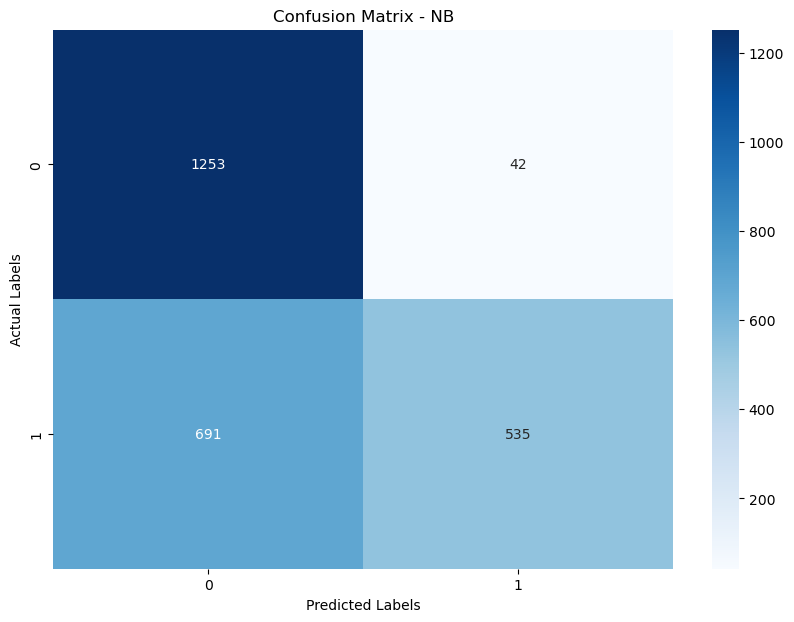


Classifier: SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1295
           1       0.98      0.96      0.97      1226

    accuracy                           0.97      2521
   macro avg       0.97      0.97      0.97      2521
weighted avg       0.97      0.97      0.97      2521



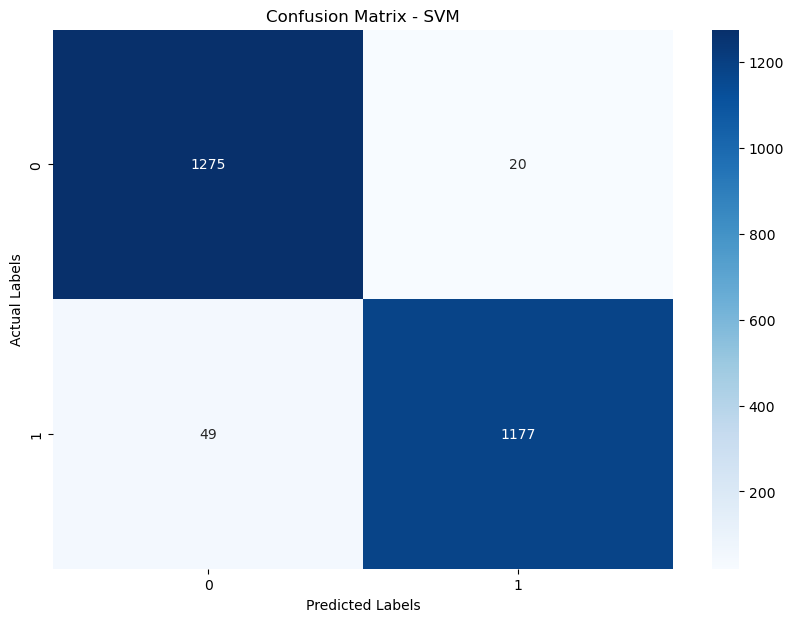


Evaluation Metrics for Each Classifier:

Classifier: KNN
Accuracy: 0.9901
Precision: 0.9900
Recall: 0.9901
F1-Score: 0.9901

Classifier: DT
Accuracy: 0.9933
Precision: 0.9933
Recall: 0.9932
F1-Score: 0.9933

Classifier: NB
Accuracy: 0.7092
Precision: 0.7859
Recall: 0.7020
F1-Score: 0.6836

Classifier: SVM
Accuracy: 0.9726
Precision: 0.9731
Recall: 0.9723
F1-Score: 0.9726


In [17]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=7),  # Adjusted n_neighbors parameter as an example
    'DT': DecisionTreeClassifier(max_depth=10),  # Adjusted max_depth parameter as an example
    'NB': GaussianNB(),
    'SVM': SVC()
}

# Initialize dictionaries to store evaluation metrics
all_accuracies = {}
all_precisions = {}
all_recalls = {}
all_f1_scores = {}

for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics
    all_accuracies[clf_name] = accuracy
    all_precisions[clf_name] = precision
    all_recalls[clf_name] = recall
    all_f1_scores[clf_name] = f1
    
    # Print classification report
    print(f"\nClassifier: {clf_name}")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

# Print evaluation metrics for each classifier
print("\nEvaluation Metrics for Each Classifier:")
for clf_name in classifiers.keys():
    print(f"\nClassifier: {clf_name}")
    print(f"Accuracy: {all_accuracies[clf_name]:.4f}")
    print(f"Precision: {all_precisions[clf_name]:.4f}")
    print(f"Recall: {all_recalls[clf_name]:.4f}")
    print(f"F1-Score: {all_f1_scores[clf_name]:.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.007878452577298014
At iteration 2, the best solution fitness is 0.0073521367878243305
At iteration 3, the best solution fitness is 0.0073521367878243305
At iteration 4, the best solution fitness is 0.0073521367878243305
At iteration 5, the best solution fitness is 0.006608558285837545
At iteration 6, the best solution fitness is 0.006608558285837545
At iteration 7, the best solution fitness is 0.006608558285837545
At iteration 8, the best solution fitness is 0.006608558285837545
At iteration 9, the best solution fitness is 0.006608558285837545
At iteration 10, the best solution fitness is 0.006608558285837545
At iteration 11, the best solution fitness is 0.006608558285837545
At iteration 12, the best solution fitness is 0.006608558285837545
At iteration 13, the best solution fitness is 0.006608558285837545
At iteration 14, the best solution fitness is 0.006608558285837545
At iteration 15, the best solution fitness is 0.

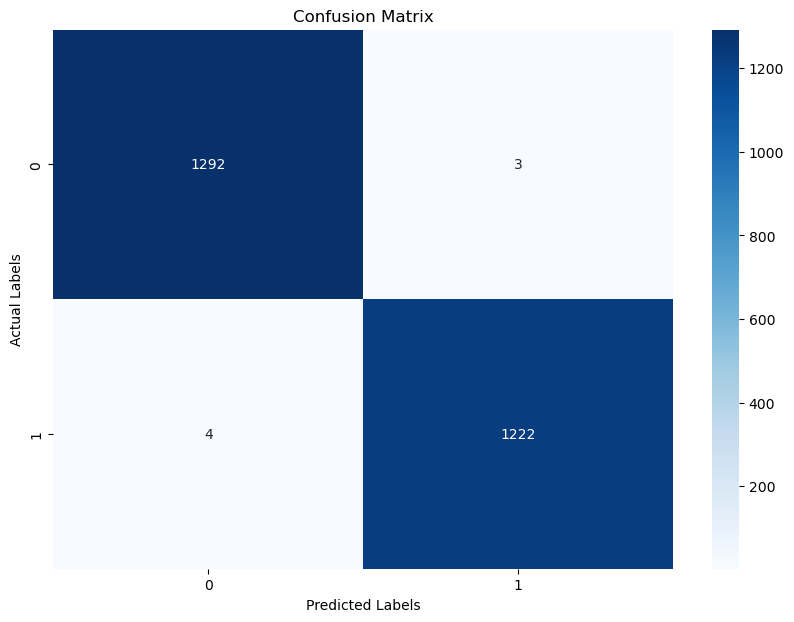

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.00761936574876304
At iteration 2, the best solution fitness is 0.0075275753843155584
At iteration 3, the best solution fitness is 0.007485751268293685
At iteration 4, the best solution fitness is 0.007485751268293685
At iteration 5, the best solution fitness is 0.007485751268293685
At iteration 6, the best solution fitness is 0.007485751268293685
At iteration 7, the best solution fitness is 0.007485751268293685
At iteration 8, the best solution fitness is 0.007485751268293685
At iteration 9, the best solution fitness is 0.007485751268293685
At iteration 10, the best solution fitness is 0.007485751268293685
At iteration 11, the best solution fitness is 0.007485751268293685
At iteration 12, the best solution fitness is 0.007485751268293685
At iteration 13, the best solution fitness is 0.007485751268293685
At iteration 14, the best solution fitness is 0.007485751268293685
At iteration 15, the best solution fitness is 0.007

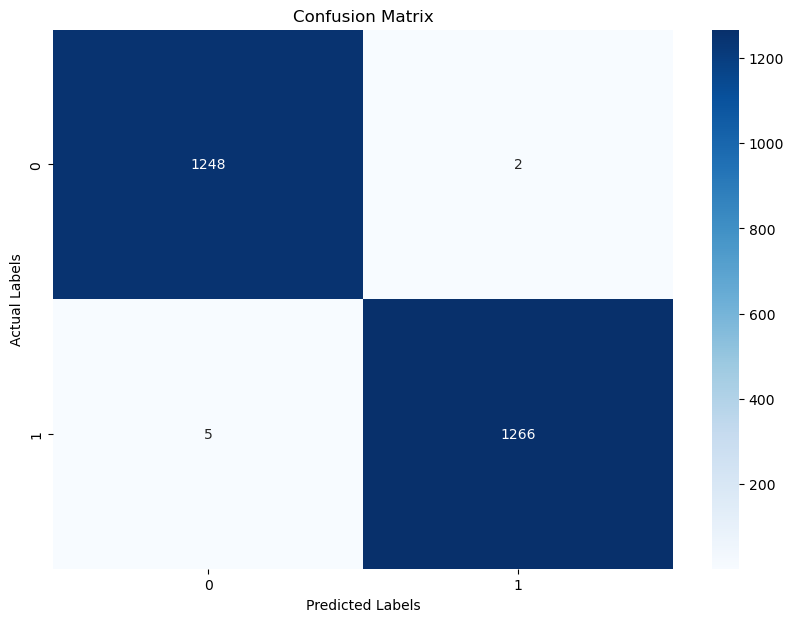

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.007134874075311229
At iteration 2, the best solution fitness is 0.007134874075311229
At iteration 3, the best solution fitness is 0.007051225843267482
At iteration 4, the best solution fitness is 0.007051225843267482
At iteration 5, the best solution fitness is 0.007051225843267482
At iteration 6, the best solution fitness is 0.006524910053793798
At iteration 7, the best solution fitness is 0.006524910053793798
At iteration 8, the best solution fitness is 0.006524910053793798
At iteration 9, the best solution fitness is 0.006524910053793798
At iteration 10, the best solution fitness is 0.006524910053793798
At iteration 11, the best solution fitness is 0.006524910053793798
At iteration 12, the best solution fitness is 0.006524910053793798
At iteration 13, the best solution fitness is 0.006524910053793798
At iteration 14, the best solution fitness is 0.006524910053793798
At iteration 15, the best solution fitness is 0.006

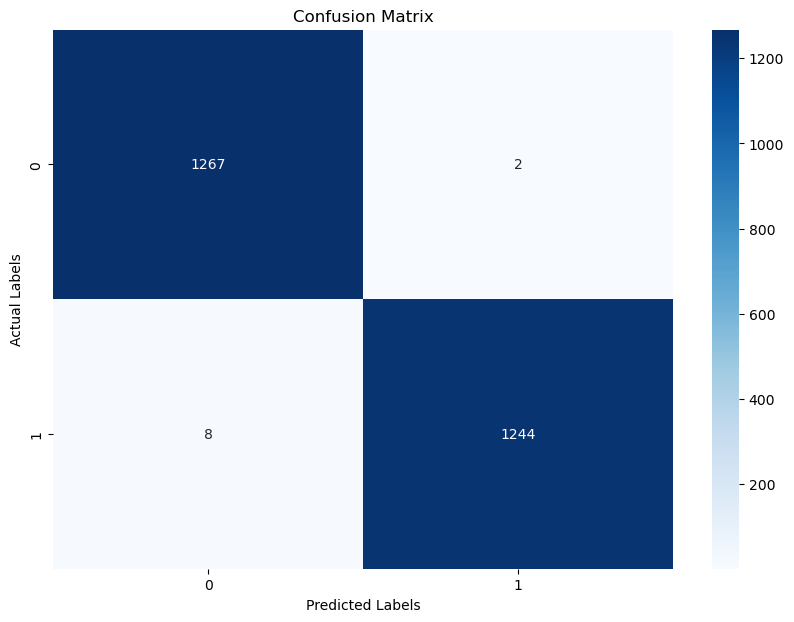

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.007703013980806786
At iteration 2, the best solution fitness is 0.0062158569768332155
At iteration 3, the best solution fitness is 0.0062158569768332155
At iteration 4, the best solution fitness is 0.0062158569768332155
At iteration 5, the best solution fitness is 0.0062158569768332155
At iteration 6, the best solution fitness is 0.0062158569768332155
At iteration 7, the best solution fitness is 0.0062158569768332155
At iteration 8, the best solution fitness is 0.0062158569768332155
At iteration 9, the best solution fitness is 0.0062158569768332155
At iteration 10, the best solution fitness is 0.0062158569768332155
At iteration 11, the best solution fitness is 0.0062158569768332155
At iteration 12, the best solution fitness is 0.0062158569768332155
At iteration 13, the best solution fitness is 0.0062158569768332155
At iteration 14, the best solution fitness is 0.0062158569768332155
At iteration 15, the best solution fit

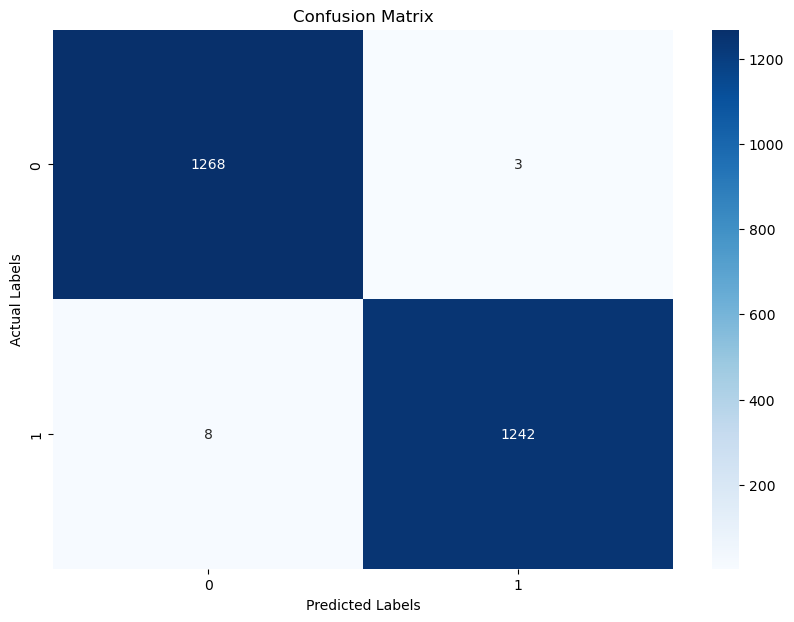

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.0073521367878243305
At iteration 2, the best solution fitness is 0.0073521367878243305
At iteration 3, the best solution fitness is 0.0073521367878243305
At iteration 4, the best solution fitness is 0.0073521367878243305
At iteration 5, the best solution fitness is 0.0073521367878243305
At iteration 6, the best solution fitness is 0.0073521367878243305
At iteration 7, the best solution fitness is 0.0073521367878243305
At iteration 8, the best solution fitness is 0.0073521367878243305
At iteration 9, the best solution fitness is 0.0073521367878243305
At iteration 10, the best solution fitness is 0.0073521367878243305
At iteration 11, the best solution fitness is 0.0073521367878243305
At iteration 12, the best solution fitness is 0.0073521367878243305
At iteration 13, the best solution fitness is 0.0073521367878243305
At iteration 14, the best solution fitness is 0.0073521367878243305
At iteration 15, the best solution fi

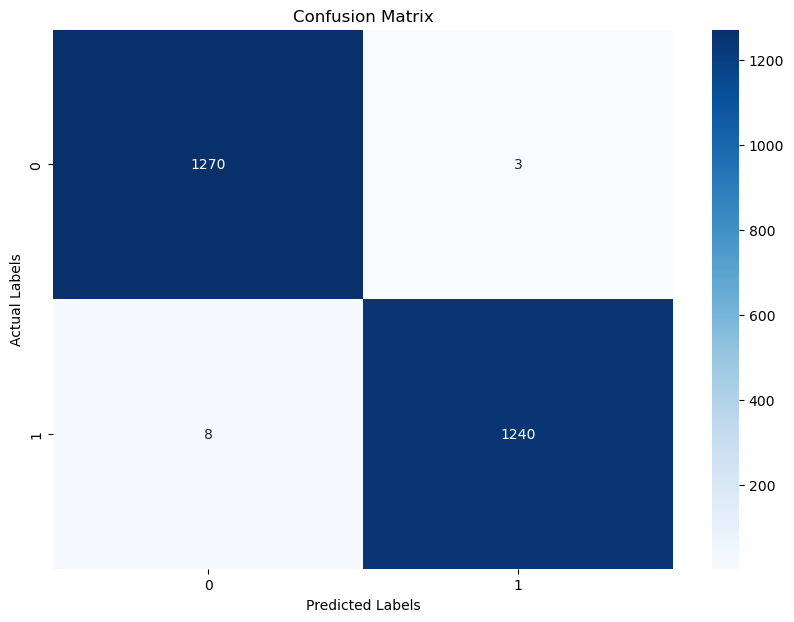


Average Number of Features Selected Each Run: 24.20

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9964, STD=0.0007
Precision: AVG=0.9964, STD=0.0007
Recall: AVG=0.9963, STD=0.0007
F1-Score: AVG=0.9963, STD=0.0007


In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.005380488110398948
At iteration 2, the best solution fitness is 0.0046369096084121625
At iteration 3, the best solution fitness is 0.004110593818938479
At iteration 4, the best solution fitness is 0.004110593818938479
At iteration 5, the best solution fitness is 0.004110593818938479
At iteration 6, the best solution fitness is 0.004110593818938479
At iteration 7, the best solution fitness is 0.004110593818938479
At iteration 8, the best solution fitness is 0.004110593818938479
At iteration 9, the best solution fitness is 0.004110593818938479
At iteration 10, the best solution fitness is 0.004110593818938479
At iteration 11, the best solution fitness is 0.004110593818938479
At iteration 12, the best solution fitness is 0.004110593818938479
At iteration 13, the best solution fitness is 0.004110593818938479
At iteration 14, the best solution fitness is 0.004110593818938479
At iteration 15, the best solution fitness is 0.00

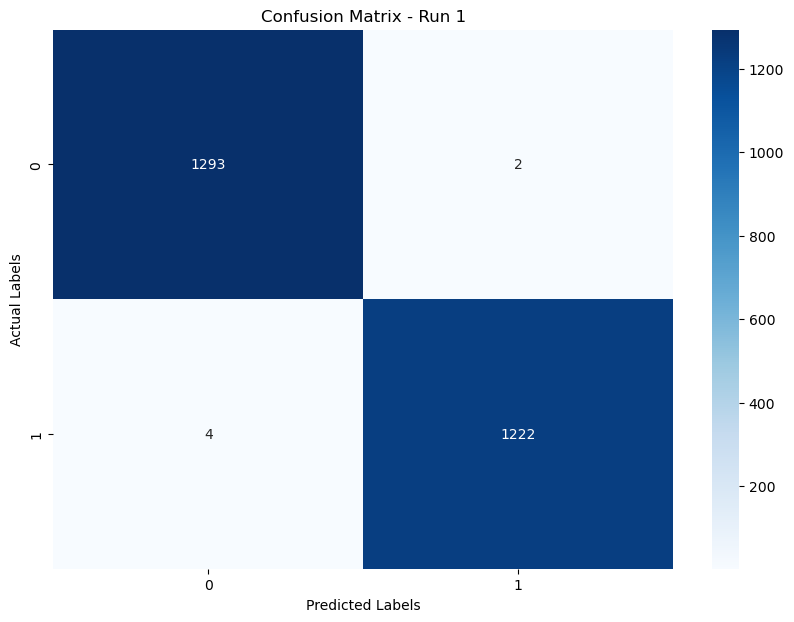

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1295
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      2521
   macro avg       1.00      1.00      1.00      2521
weighted avg       1.00      1.00      1.00      2521

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.005037753049820116
At iteration 2, the best solution fitness is 0.004862314453328888
At iteration 3, the best solution fitness is 0.004862314453328888
At iteration 4, the best solution fitness is 0.004862314453328888
At iteration 5, the best solution fitness is 0.004862314453328888
At iteration 6, the best solution fitness is 0.00468687585683766
At iteration 7, the best solution fitness is 0.004335998663855204
At iteration 8, the best solution fitness is 0.004160560067363976
At iteration 9, the best solution fitness is 0.004160560067363976
At iteration 10, the best sol

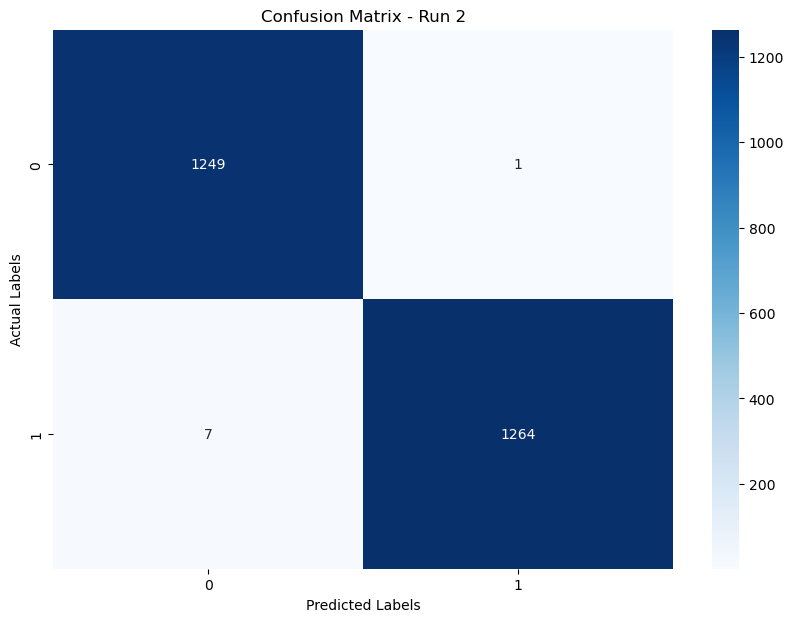

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1250
           1       1.00      0.99      1.00      1271

    accuracy                           1.00      2521
   macro avg       1.00      1.00      1.00      2521
weighted avg       1.00      1.00      1.00      2521

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.00547227847484643
At iteration 2, the best solution fitness is 0.004770524088881517
At iteration 3, the best solution fitness is 0.004419646895899061
At iteration 4, the best solution fitness is 0.004419646895899061
At iteration 5, the best solution fitness is 0.004419646895899061
At iteration 6, the best solution fitness is 0.004419646895899061
At iteration 7, the best solution fitness is 0.004419646895899061
At iteration 8, the best solution fitness is 0.004419646895899061
At iteration 9, the best solution fitness is 0.004244208299407833
At iteration 10, the best sol

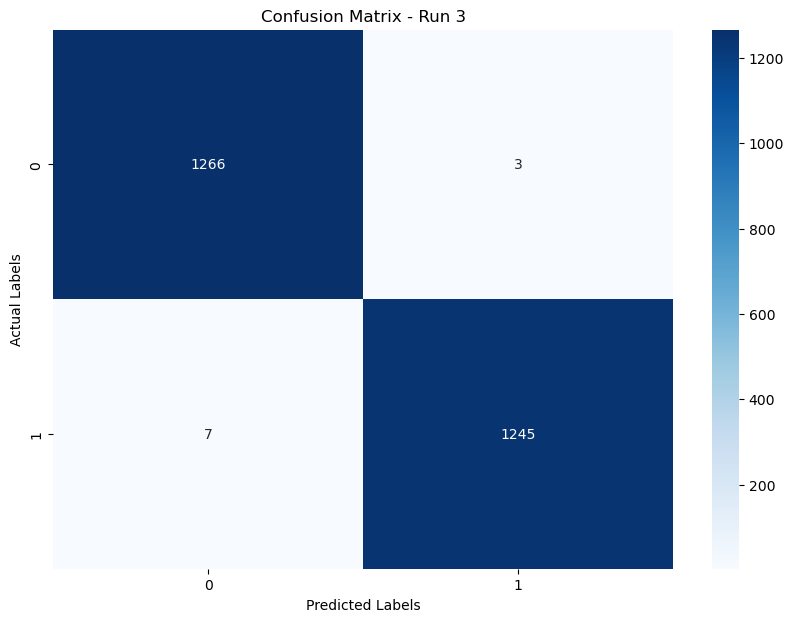

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1269
           1       1.00      0.99      1.00      1252

    accuracy                           1.00      2521
   macro avg       1.00      1.00      1.00      2521
weighted avg       1.00      1.00      1.00      2521

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.005255015762333217
At iteration 2, the best solution fitness is 0.004904138569350762
At iteration 3, the best solution fitness is 0.004553261376368306
At iteration 4, the best solution fitness is 0.004026945586894622
At iteration 5, the best solution fitness is 0.003851506990403393
At iteration 6, the best solution fitness is 0.003851506990403393
At iteration 7, the best solution fitness is 0.003851506990403393
At iteration 8, the best solution fitness is 0.003851506990403393
At iteration 9, the best solution fitness is 0.003851506990403393
At iteration 10, the best so

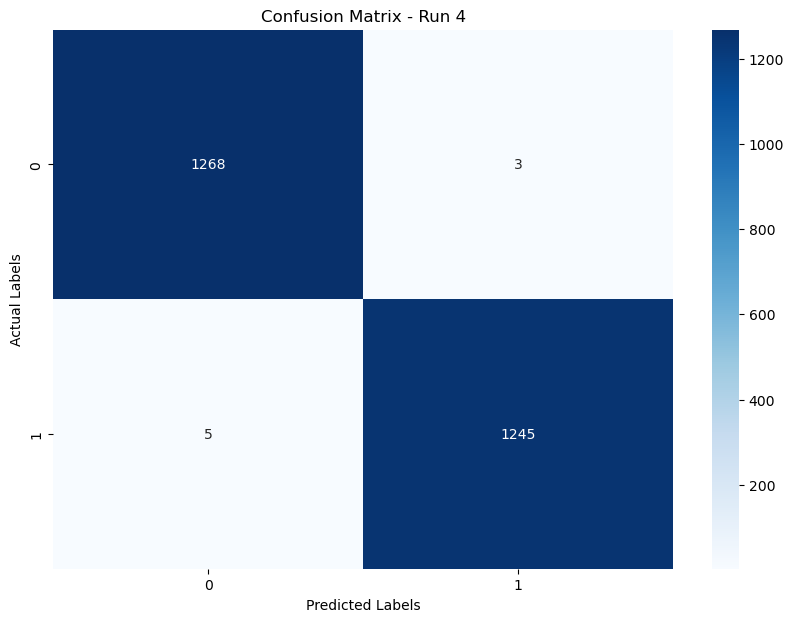

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1250

    accuracy                           1.00      2521
   macro avg       1.00      1.00      1.00      2521
weighted avg       1.00      1.00      1.00      2521

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.005163225397885846
At iteration 2, the best solution fitness is 0.00481234820490339
At iteration 3, the best solution fitness is 0.00481234820490339
At iteration 4, the best solution fitness is 0.00481234820490339
At iteration 5, the best solution fitness is 0.00481234820490339
At iteration 6, the best solution fitness is 0.00481234820490339
At iteration 7, the best solution fitness is 0.00481234820490339
At iteration 8, the best solution fitness is 0.00481234820490339
At iteration 9, the best solution fitness is 0.00481234820490339
At iteration 10, the best solution f

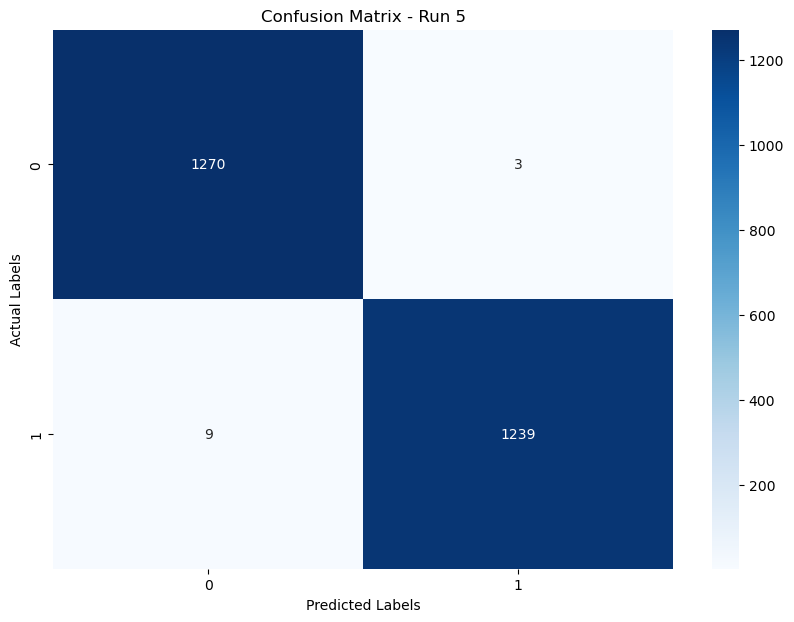

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1273
           1       1.00      0.99      1.00      1248

    accuracy                           1.00      2521
   macro avg       1.00      1.00      1.00      2521
weighted avg       1.00      1.00      1.00      2521



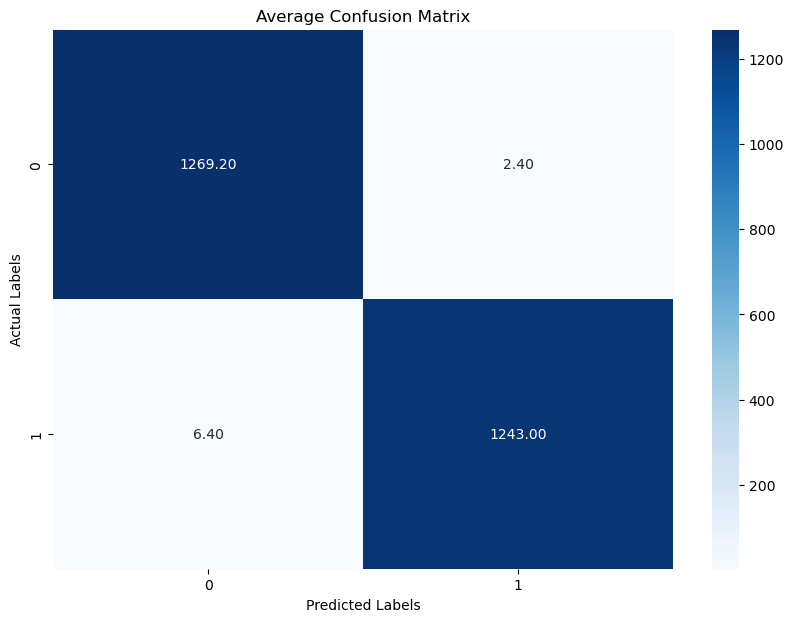


Average Classification Report:
Accuracy: 0.9965
Precision: 0.9965
Recall: 0.9965
F1-Score: 0.9965

Average Number of Features Selected Each Run: 13.40

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9965, STD=0.0008
Precision: AVG=0.9965, STD=0.0008
Recall: AVG=0.9965, STD=0.0008
F1-Score: AVG=0.9965, STD=0.0008


In [9]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


# The End

In [2]:
data = pd.read_csv('data1_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(4966, 128)
(4966,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.04636223591549301
At iteration 2, the best solution fitness is 0.04636223591549301
At iteration 3, the best solution fitness is 0.03855067907444668
At iteration 4, the best solution fitness is 0.03855067907444668
At iteration 5, the best solution fitness is 0.03855067907444668
At iteration 6, the best solution fitness is 0.03855067907444668
At iteration 7, the best solution fitness is 0.03855067907444668
At iteration 8, the best solution fitness is 0.03855067907444668
At iteration 9, the best solution fitness is 0.03855067907444668
At iteration 10, the best solution fitness is 0.03855067907444668
At iteration 11, the best solution fitness is 0.03855067907444668
At iteration 12, the best solution fitness is 0.03855067907444668
At iteration 13, the best solution fitness is 0.03855067907444668
At iteration 14, the best solution fitness is 0.03855067907444668
At iteration 15, the best solution fitness is 0.03855067907444668

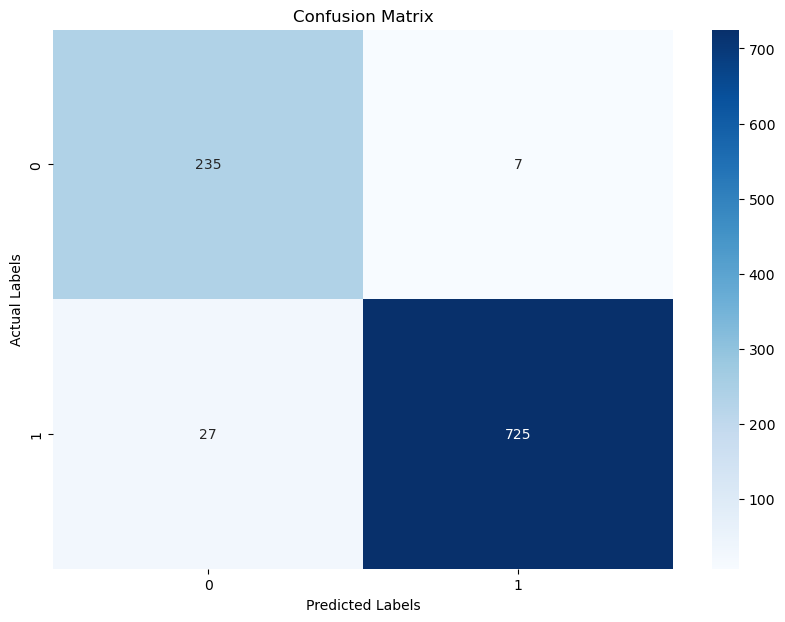

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.039546654929577416
At iteration 2, the best solution fitness is 0.039546654929577416
At iteration 3, the best solution fitness is 0.03724220321931594
At iteration 4, the best solution fitness is 0.03724220321931594
At iteration 5, the best solution fitness is 0.03724220321931594
At iteration 6, the best solution fitness is 0.03724220321931594
At iteration 7, the best solution fitness is 0.03724220321931594
At iteration 8, the best solution fitness is 0.03724220321931594
At iteration 9, the best solution fitness is 0.03724220321931594
At iteration 10, the best solution fitness is 0.03724220321931594
At iteration 11, the best solution fitness is 0.03724220321931594
At iteration 12, the best solution fitness is 0.03724220321931594
At iteration 13, the best solution fitness is 0.03724220321931594
At iteration 14, the best solution fitness is 0.03724220321931594
At iteration 15, the best solution fitness is 0.037242203219315

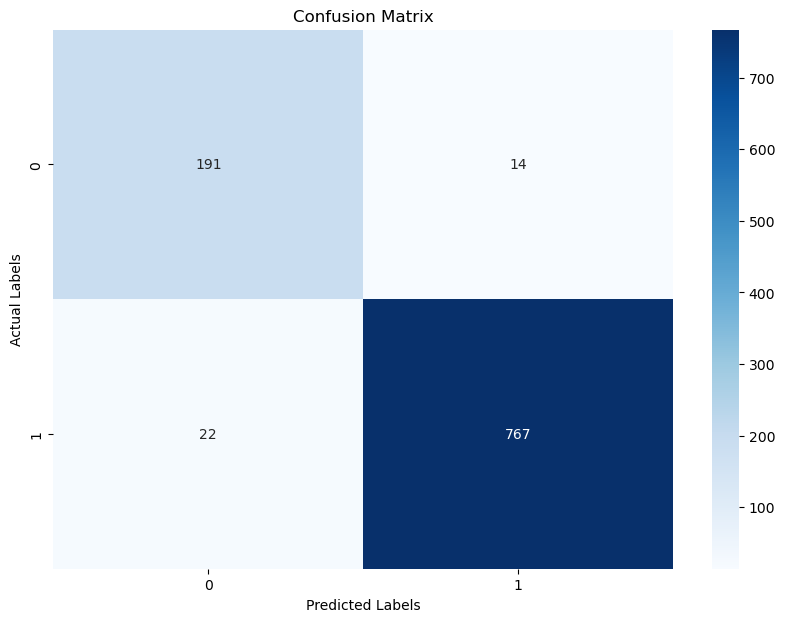

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.04872516348088533
At iteration 2, the best solution fitness is 0.041304231639839005
At iteration 3, the best solution fitness is 0.041304231639839005
At iteration 4, the best solution fitness is 0.041304231639839005
At iteration 5, the best solution fitness is 0.041304231639839005
At iteration 6, the best solution fitness is 0.041304231639839005
At iteration 7, the best solution fitness is 0.041304231639839005
At iteration 8, the best solution fitness is 0.041304231639839005
At iteration 9, the best solution fitness is 0.041304231639839005
At iteration 10, the best solution fitness is 0.041304231639839005
At iteration 11, the best solution fitness is 0.041304231639839005
At iteration 12, the best solution fitness is 0.041304231639839005
At iteration 13, the best solution fitness is 0.041304231639839005
At iteration 14, the best solution fitness is 0.041304231639839005
At iteration 15, the best solution fitness is 0.0413

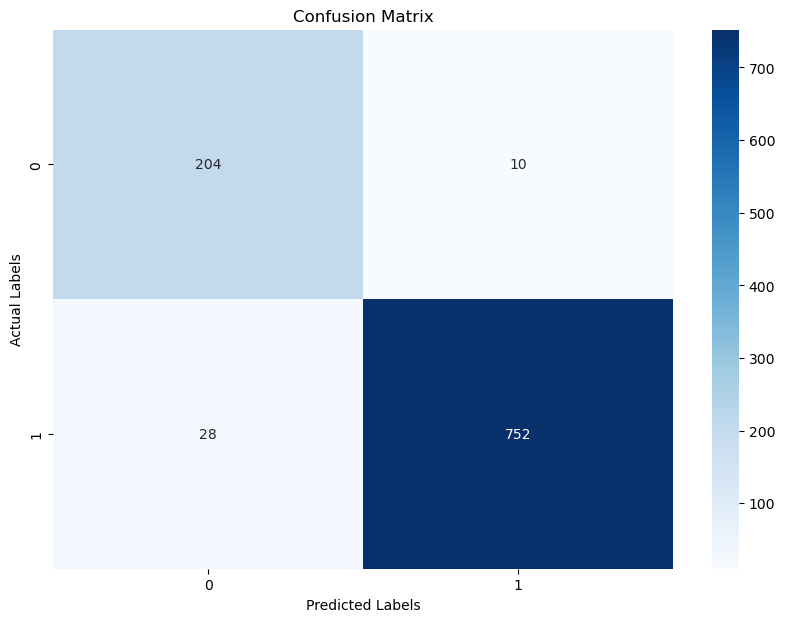

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.03786720321931594
At iteration 2, the best solution fitness is 0.03786720321931594
At iteration 3, the best solution fitness is 0.03786720321931594
At iteration 4, the best solution fitness is 0.03786720321931594
At iteration 5, the best solution fitness is 0.03786720321931594
At iteration 6, the best solution fitness is 0.03786720321931594
At iteration 7, the best solution fitness is 0.03786720321931594
At iteration 8, the best solution fitness is 0.03786720321931594
At iteration 9, the best solution fitness is 0.03786720321931594
At iteration 10, the best solution fitness is 0.03786720321931594
At iteration 11, the best solution fitness is 0.03786720321931594
At iteration 12, the best solution fitness is 0.03786720321931594
At iteration 13, the best solution fitness is 0.03786720321931594
At iteration 14, the best solution fitness is 0.03786720321931594
At iteration 15, the best solution fitness is 0.03786720321931594

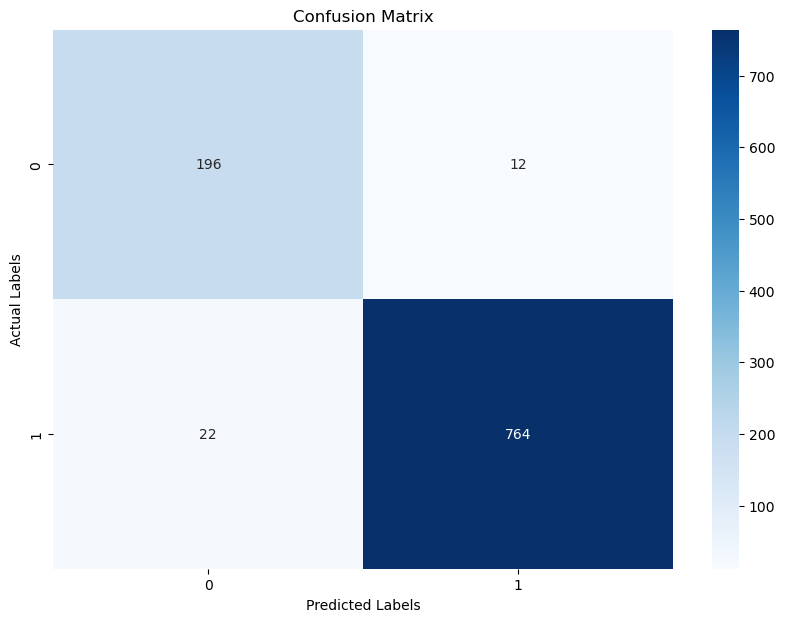

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.04507340920523143
At iteration 2, the best solution fitness is 0.04507340920523143
At iteration 3, the best solution fitness is 0.04507340920523143
At iteration 4, the best solution fitness is 0.04507340920523143
At iteration 5, the best solution fitness is 0.04507340920523143
At iteration 6, the best solution fitness is 0.04507340920523143
At iteration 7, the best solution fitness is 0.04507340920523143
At iteration 8, the best solution fitness is 0.04507340920523143
At iteration 9, the best solution fitness is 0.04507340920523143
At iteration 10, the best solution fitness is 0.04507340920523143
At iteration 11, the best solution fitness is 0.04507340920523143
At iteration 12, the best solution fitness is 0.04507340920523143
At iteration 13, the best solution fitness is 0.04507340920523143
At iteration 14, the best solution fitness is 0.04507340920523143
At iteration 15, the best solution fitness is 0.04507340920523143

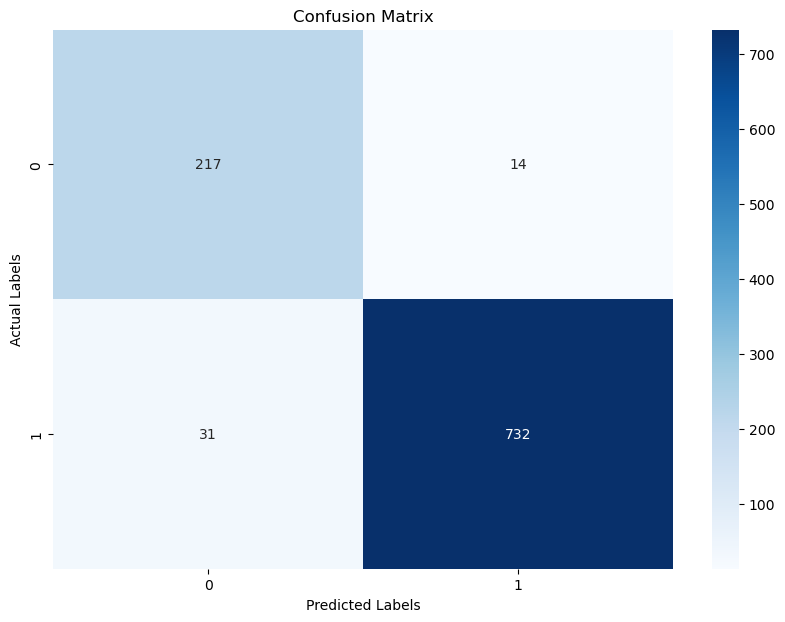


Average Number of Features Selected Each Run: 60.80

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9624, STD=0.0041
Precision: AVG=0.9372, STD=0.0058
Recall: AVG=0.9569, STD=0.0063
F1-Score: AVG=0.9465, STD=0.0055


In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.03193017479879278
At iteration 2, the best solution fitness is 0.0299382230885312
At iteration 3, the best solution fitness is 0.025798069668008034
At iteration 4, the best solution fitness is 0.025719944668008032
At iteration 5, the best solution fitness is 0.025719944668008032
At iteration 6, the best solution fitness is 0.025719944668008032
At iteration 7, the best solution fitness is 0.025719944668008032
At iteration 8, the best solution fitness is 0.025719944668008032
At iteration 9, the best solution fitness is 0.025719944668008032
At iteration 10, the best solution fitness is 0.025641819668008034
At iteration 11, the best solution fitness is 0.025563694668008032
At iteration 12, the best solution fitness is 0.025563694668008032
At iteration 13, the best solution fitness is 0.025563694668008032
At iteration 14, the best solution fitness is 0.025563694668008032
At iteration 15, the best solution fitness is 0.025563

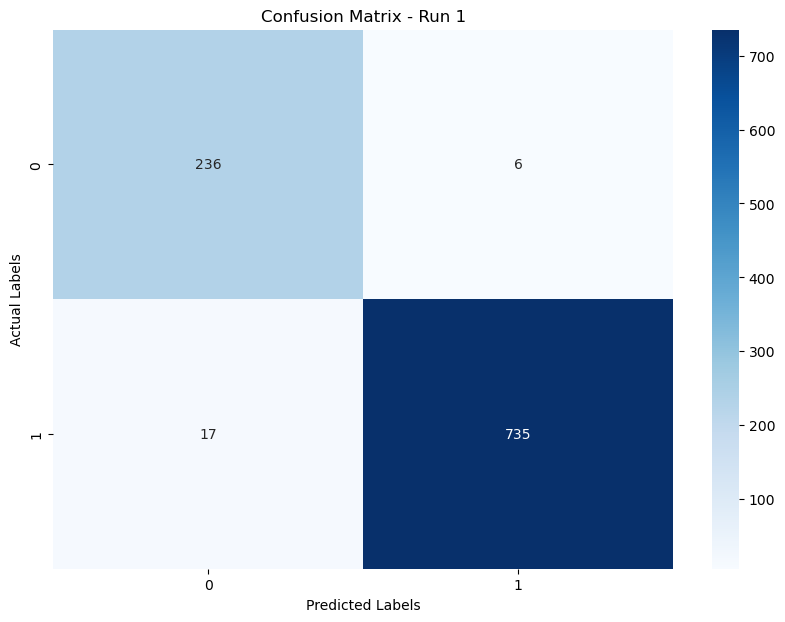

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       242
           1       0.99      0.98      0.98       752

    accuracy                           0.98       994
   macro avg       0.96      0.98      0.97       994
weighted avg       0.98      0.98      0.98       994

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.02823912223340035
At iteration 2, the best solution fitness is 0.02294674295774645
At iteration 3, the best solution fitness is 0.022868617957746452
At iteration 4, the best solution fitness is 0.022868617957746452
At iteration 5, the best solution fitness is 0.022868617957746452
At iteration 6, the best solution fitness is 0.022868617957746452
At iteration 7, the best solution fitness is 0.022868617957746452
At iteration 8, the best solution fitness is 0.022868617957746452
At iteration 9, the best solution fitness is 0.022868617957746452
At iteration 10, the best solu

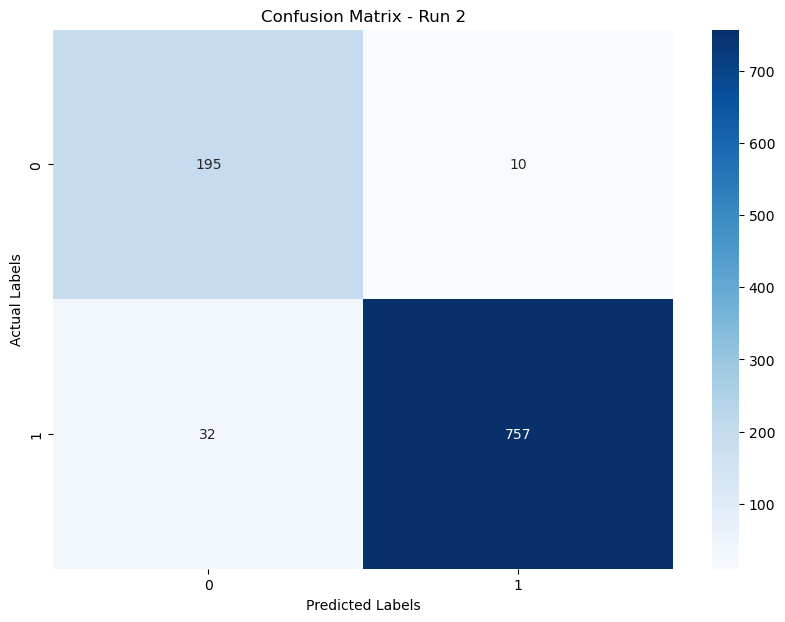

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       205
           1       0.99      0.96      0.97       789

    accuracy                           0.96       994
   macro avg       0.92      0.96      0.94       994
weighted avg       0.96      0.96      0.96       994

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.031051150653923516
At iteration 2, the best solution fitness is 0.031051150653923516
At iteration 3, the best solution fitness is 0.02507529552313888
At iteration 4, the best solution fitness is 0.022321742957746454
At iteration 5, the best solution fitness is 0.022321742957746454
At iteration 6, the best solution fitness is 0.019490065392354133
At iteration 7, the best solution fitness is 0.019490065392354133
At iteration 8, the best solution fitness is 0.019490065392354133
At iteration 9, the best solution fitness is 0.019490065392354133
At iteration 10, the best sol

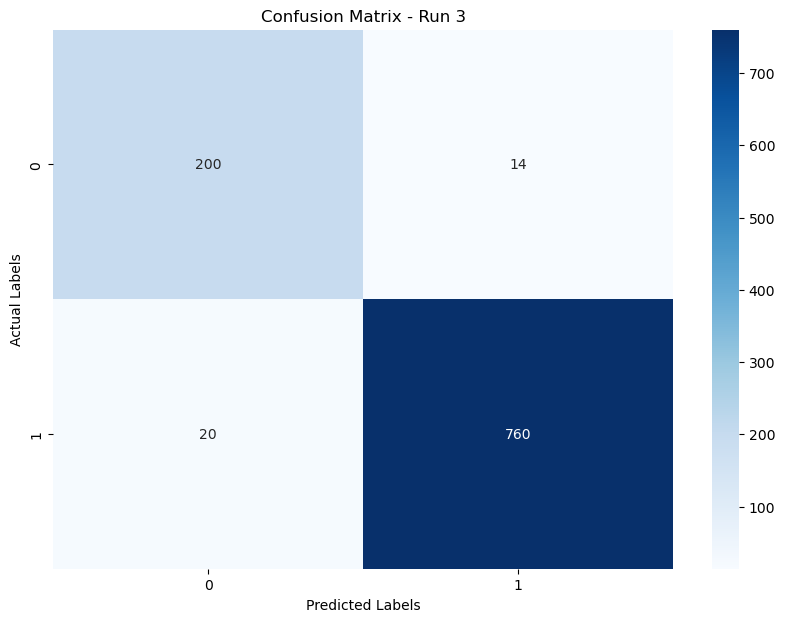

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       214
           1       0.98      0.97      0.98       780

    accuracy                           0.97       994
   macro avg       0.95      0.95      0.95       994
weighted avg       0.97      0.97      0.97       994

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.03255517479879278
At iteration 2, the best solution fitness is 0.025661468812877297
At iteration 3, the best solution fitness is 0.022986041247484868
At iteration 4, the best solution fitness is 0.021911940392354133
At iteration 5, the best solution fitness is 0.02175569039235413
At iteration 6, the best solution fitness is 0.02175569039235413
At iteration 7, the best solution fitness is 0.02175569039235413
At iteration 8, the best solution fitness is 0.021599440392354133
At iteration 9, the best solution fitness is 0.021599440392354133
At iteration 10, the best soluti

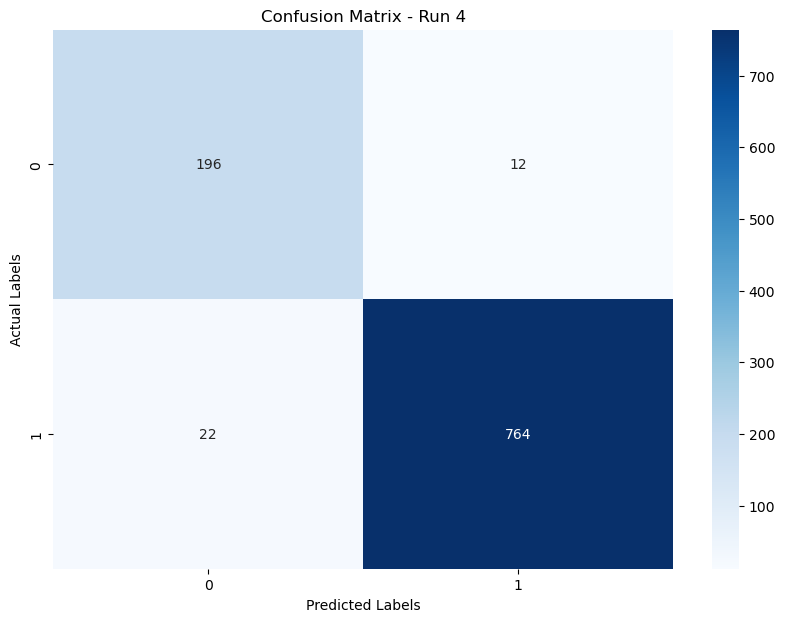

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       208
           1       0.98      0.97      0.98       786

    accuracy                           0.97       994
   macro avg       0.94      0.96      0.95       994
weighted avg       0.97      0.97      0.97       994

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.032535525653923515
At iteration 2, the best solution fitness is 0.027555646378269613
At iteration 3, the best solution fitness is 0.024333343812877297
At iteration 4, the best solution fitness is 0.024177093812877297
At iteration 5, the best solution fitness is 0.024177093812877297
At iteration 6, the best solution fitness is 0.023181117957746453
At iteration 7, the best solution fitness is 0.023181117957746453
At iteration 8, the best solution fitness is 0.023181117957746453
At iteration 9, the best solution fitness is 0.023181117957746453
At iteration 10, the best so

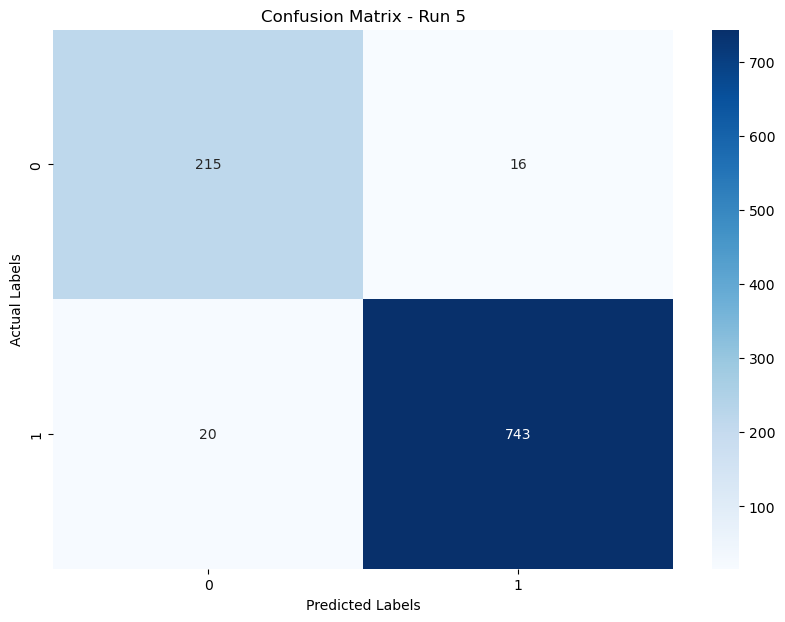

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       231
           1       0.98      0.97      0.98       763

    accuracy                           0.96       994
   macro avg       0.95      0.95      0.95       994
weighted avg       0.96      0.96      0.96       994



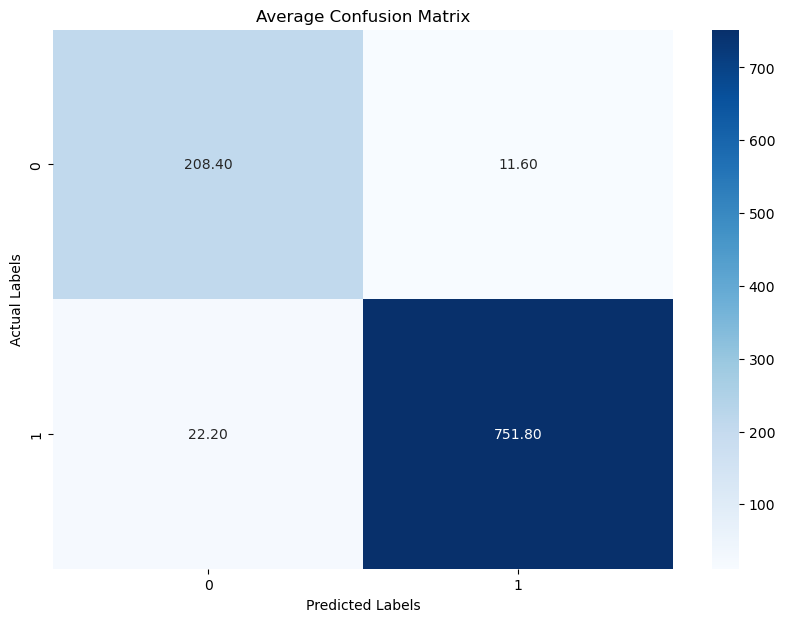


Average Classification Report:
Accuracy: 0.9660
Precision: 0.9439
Recall: 0.9591
F1-Score: 0.9511

Average Number of Features Selected Each Run: 30.20

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9660, STD=0.0062
Precision: AVG=0.9439, STD=0.0126
Recall: AVG=0.9591, STD=0.0087
F1-Score: AVG=0.9511, STD=0.0100


In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [5]:
data = pd.read_csv('data2_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5415, 128)
(5415,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.06418390754847643
At iteration 2, the best solution fitness is 0.053370628462603854
At iteration 3, the best solution fitness is 0.05230025103878115
At iteration 4, the best solution fitness is 0.05230025103878115
At iteration 5, the best solution fitness is 0.05230025103878115
At iteration 6, the best solution fitness is 0.05230025103878115
At iteration 7, the best solution fitness is 0.05230025103878115
At iteration 8, the best solution fitness is 0.05230025103878115
At iteration 9, the best solution fitness is 0.05230025103878115
At iteration 10, the best solution fitness is 0.05230025103878115
At iteration 11, the best solution fitness is 0.05230025103878115
At iteration 12, the best solution fitness is 0.05230025103878115
At iteration 13, the best solution fitness is 0.05230025103878115
At iteration 14, the best solution fitness is 0.05230025103878115
At iteration 15, the best solution fitness is 0.0523002510387811

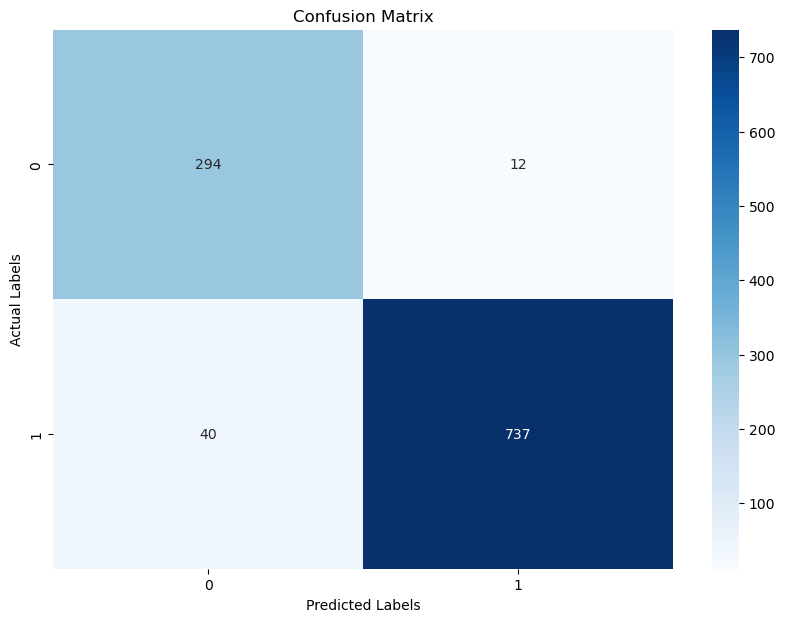

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.059457020429362906
At iteration 2, the best solution fitness is 0.059457020429362906
At iteration 3, the best solution fitness is 0.04634673649584491
At iteration 4, the best solution fitness is 0.04634673649584491
At iteration 5, the best solution fitness is 0.04634673649584491
At iteration 6, the best solution fitness is 0.04634673649584491
At iteration 7, the best solution fitness is 0.04634673649584491
At iteration 8, the best solution fitness is 0.04634673649584491
At iteration 9, the best solution fitness is 0.04634673649584491
At iteration 10, the best solution fitness is 0.04634673649584491
At iteration 11, the best solution fitness is 0.04634673649584491
At iteration 12, the best solution fitness is 0.04634673649584491
At iteration 13, the best solution fitness is 0.04634673649584491
At iteration 14, the best solution fitness is 0.04634673649584491
At iteration 15, the best solution fitness is 0.046346736495844

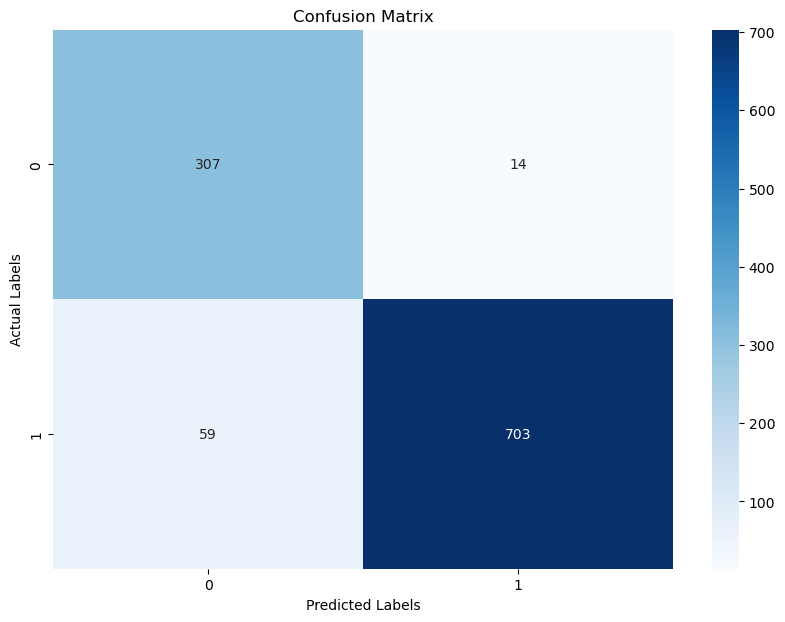

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.0579178930055402
At iteration 2, the best solution fitness is 0.0578397680055402
At iteration 3, the best solution fitness is 0.0578397680055402
At iteration 4, the best solution fitness is 0.0578397680055402
At iteration 5, the best solution fitness is 0.0578397680055402
At iteration 6, the best solution fitness is 0.0578397680055402
At iteration 7, the best solution fitness is 0.0578397680055402
At iteration 8, the best solution fitness is 0.0578397680055402
At iteration 9, the best solution fitness is 0.0578397680055402
At iteration 10, the best solution fitness is 0.0578397680055402
At iteration 11, the best solution fitness is 0.0578397680055402
At iteration 12, the best solution fitness is 0.0578397680055402
At iteration 13, the best solution fitness is 0.0578397680055402
At iteration 14, the best solution fitness is 0.0578397680055402
At iteration 15, the best solution fitness is 0.0578397680055402
At iteration 1

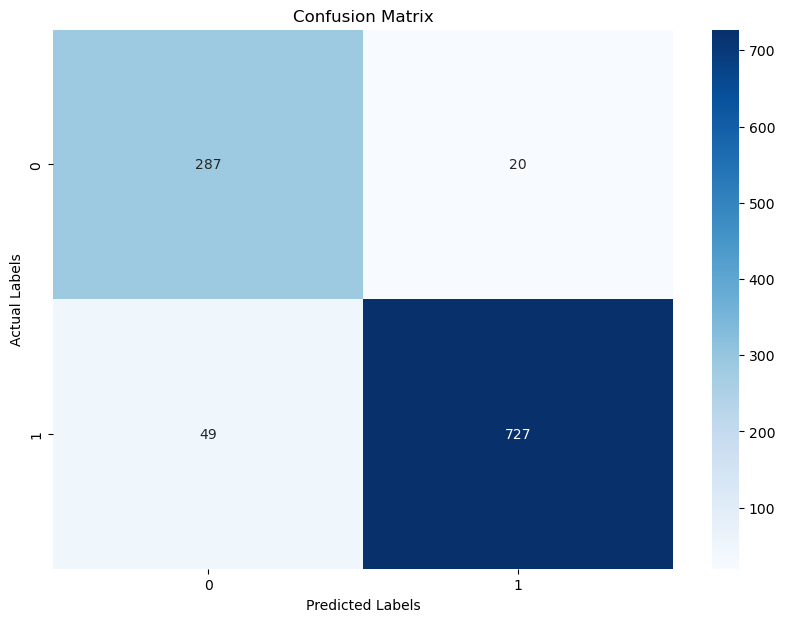

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.04879999134349033
At iteration 2, the best solution fitness is 0.04879999134349033
At iteration 3, the best solution fitness is 0.04879999134349033
At iteration 4, the best solution fitness is 0.04879999134349033
At iteration 5, the best solution fitness is 0.04879999134349033
At iteration 6, the best solution fitness is 0.04879999134349033
At iteration 7, the best solution fitness is 0.04879999134349033
At iteration 8, the best solution fitness is 0.04879999134349033
At iteration 9, the best solution fitness is 0.04879999134349033
At iteration 10, the best solution fitness is 0.04879999134349033
At iteration 11, the best solution fitness is 0.04879999134349033
At iteration 12, the best solution fitness is 0.04879999134349033
At iteration 13, the best solution fitness is 0.04879999134349033
At iteration 14, the best solution fitness is 0.04879999134349033
At iteration 15, the best solution fitness is 0.04879999134349033

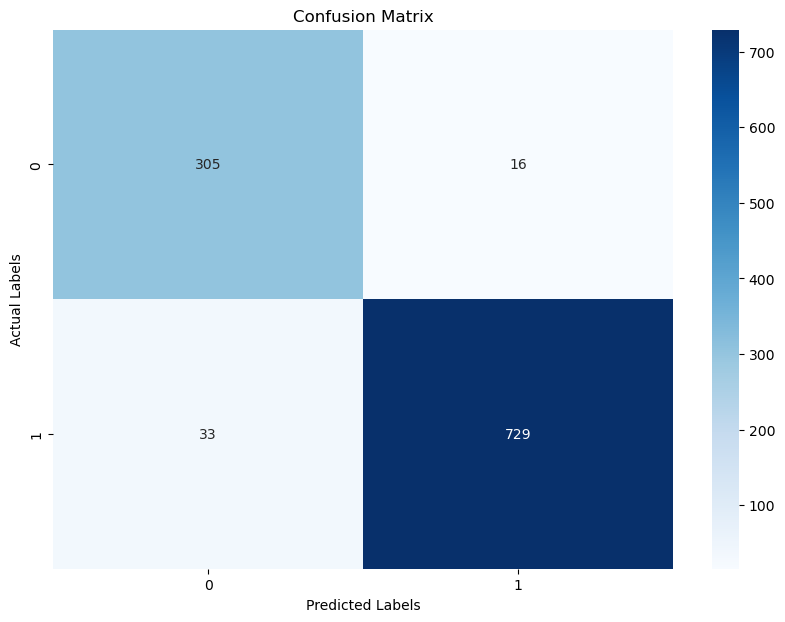

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.054441005886426565
At iteration 2, the best solution fitness is 0.053683128462603855
At iteration 3, the best solution fitness is 0.052011123614958445
At iteration 4, the best solution fitness is 0.052011123614958445
At iteration 5, the best solution fitness is 0.052011123614958445
At iteration 6, the best solution fitness is 0.052011123614958445
At iteration 7, the best solution fitness is 0.052011123614958445
At iteration 8, the best solution fitness is 0.052011123614958445
At iteration 9, the best solution fitness is 0.052011123614958445
At iteration 10, the best solution fitness is 0.052011123614958445
At iteration 11, the best solution fitness is 0.052011123614958445
At iteration 12, the best solution fitness is 0.052011123614958445
At iteration 13, the best solution fitness is 0.052011123614958445
At iteration 14, the best solution fitness is 0.052011123614958445
At iteration 15, the best solution fitness is 0.052

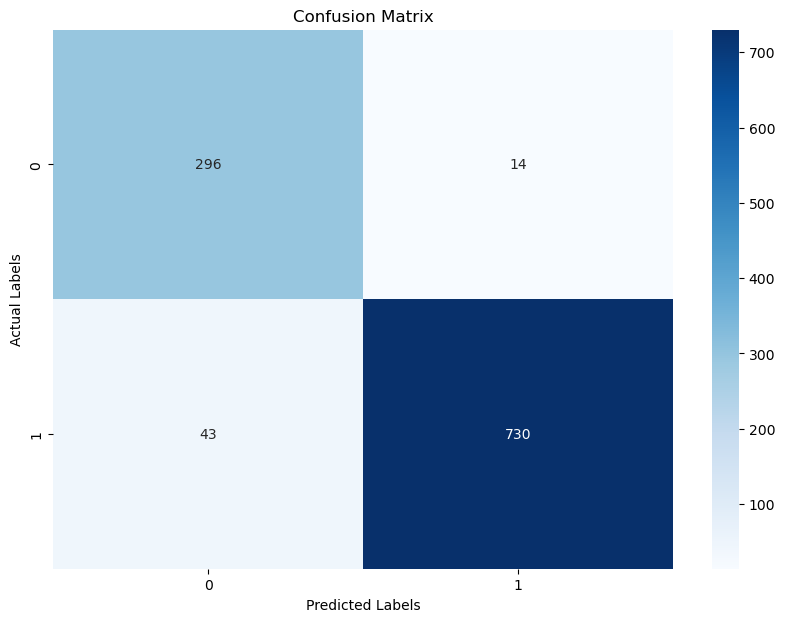


Average Number of Features Selected Each Run: 59.60

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9446, STD=0.0087
Precision: AVG=0.9246, STD=0.0115
Recall: AVG=0.9466, STD=0.0076
F1-Score: AVG=0.9344, STD=0.0098


In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.04379198407202221
At iteration 2, the best solution fitness is 0.041049601800553975
At iteration 3, the best solution fitness is 0.03929947195290857
At iteration 4, the best solution fitness is 0.03754934210526316
At iteration 5, the best solution fitness is 0.03754934210526316
At iteration 6, the best solution fitness is 0.03754934210526316
At iteration 7, the best solution fitness is 0.03754934210526316
At iteration 8, the best solution fitness is 0.03747121710526315
At iteration 9, the best solution fitness is 0.03747121710526315
At iteration 10, the best solution fitness is 0.03747121710526315
At iteration 11, the best solution fitness is 0.037393092105263155
At iteration 12, the best solution fitness is 0.037393092105263155
At iteration 13, the best solution fitness is 0.037393092105263155
At iteration 14, the best solution fitness is 0.037393092105263155
At iteration 15, the best solution fitness is 0.037393092105

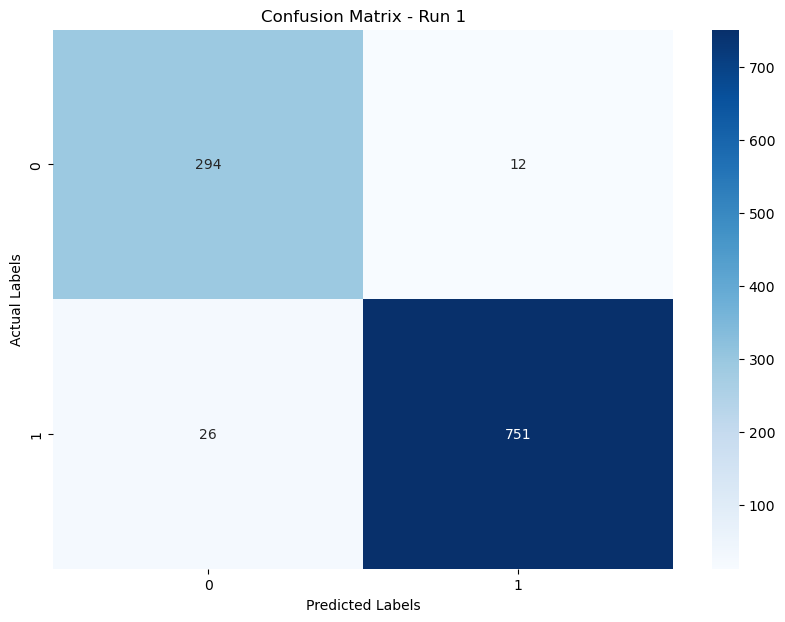

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       306
           1       0.98      0.97      0.98       777

    accuracy                           0.96      1083
   macro avg       0.95      0.96      0.96      1083
weighted avg       0.97      0.96      0.97      1083

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.03820572195290857
At iteration 2, the best solution fitness is 0.03355695983379504
At iteration 3, the best solution fitness is 0.031650579986149625
At iteration 4, the best solution fitness is 0.031650579986149625
At iteration 5, the best solution fitness is 0.031650579986149625
At iteration 6, the best solution fitness is 0.031650579986149625
At iteration 7, the best solution fitness is 0.031650579986149625
At iteration 8, the best solution fitness is 0.03157245498614963
At iteration 9, the best solution fitness is 0.03157245498614963
At iteration 10, the best soluti

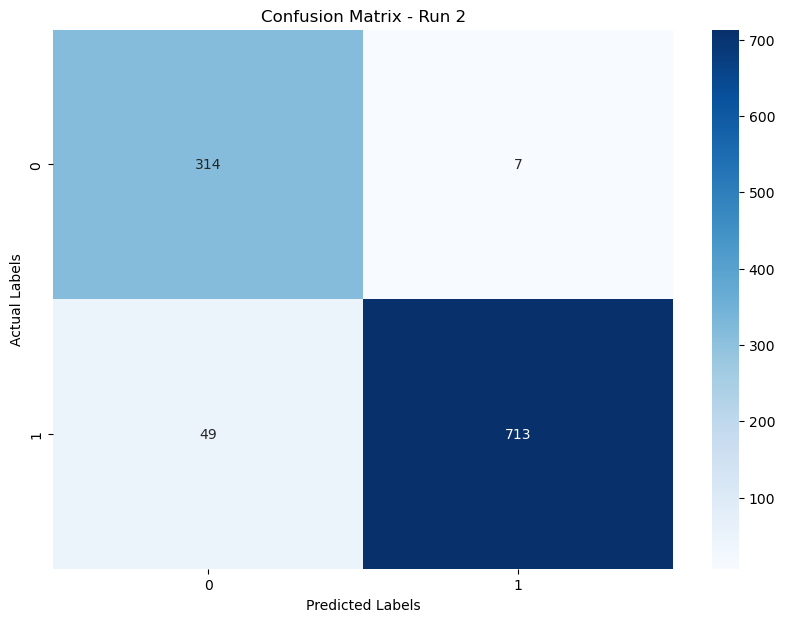

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       321
           1       0.99      0.94      0.96       762

    accuracy                           0.95      1083
   macro avg       0.93      0.96      0.94      1083
weighted avg       0.95      0.95      0.95      1083

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.037080592105263155
At iteration 2, the best solution fitness is 0.03533046225761774
At iteration 3, the best solution fitness is 0.034260084833795036
At iteration 4, the best solution fitness is 0.034260084833795036
At iteration 5, the best solution fitness is 0.03334595740997233
At iteration 6, the best solution fitness is 0.03334595740997233
At iteration 7, the best solution fitness is 0.03334595740997233
At iteration 8, the best solution fitness is 0.03334595740997233
At iteration 9, the best solution fitness is 0.03334595740997233
At iteration 10, the best solution

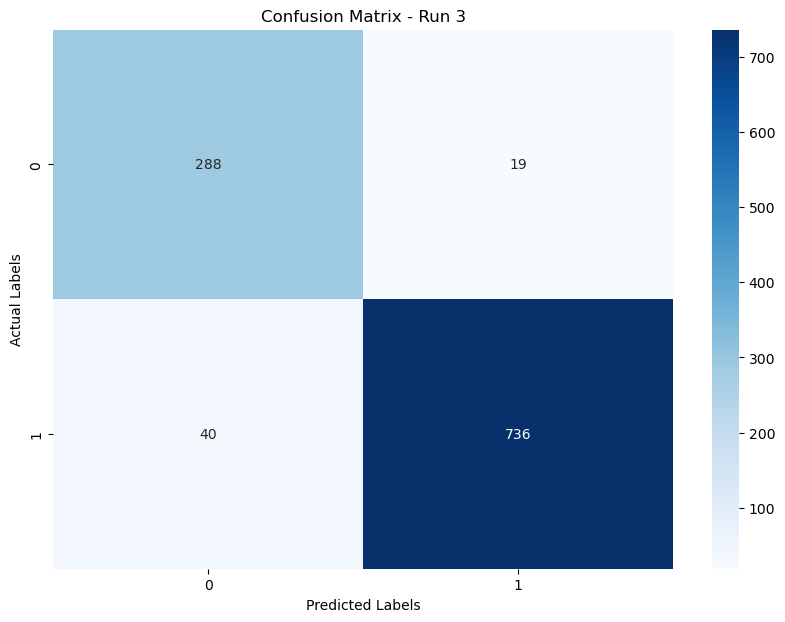

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       307
           1       0.97      0.95      0.96       776

    accuracy                           0.95      1083
   macro avg       0.93      0.94      0.93      1083
weighted avg       0.95      0.95      0.95      1083

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.04165122922437668
At iteration 2, the best solution fitness is 0.04081522680055397
At iteration 3, the best solution fitness is 0.04065897680055398
At iteration 4, the best solution fitness is 0.039510474376731275
At iteration 5, the best solution fitness is 0.039510474376731275
At iteration 6, the best solution fitness is 0.039510474376731275
At iteration 7, the best solution fitness is 0.039510474376731275
At iteration 8, the best solution fitness is 0.039510474376731275
At iteration 9, the best solution fitness is 0.039510474376731275
At iteration 10, the best solut

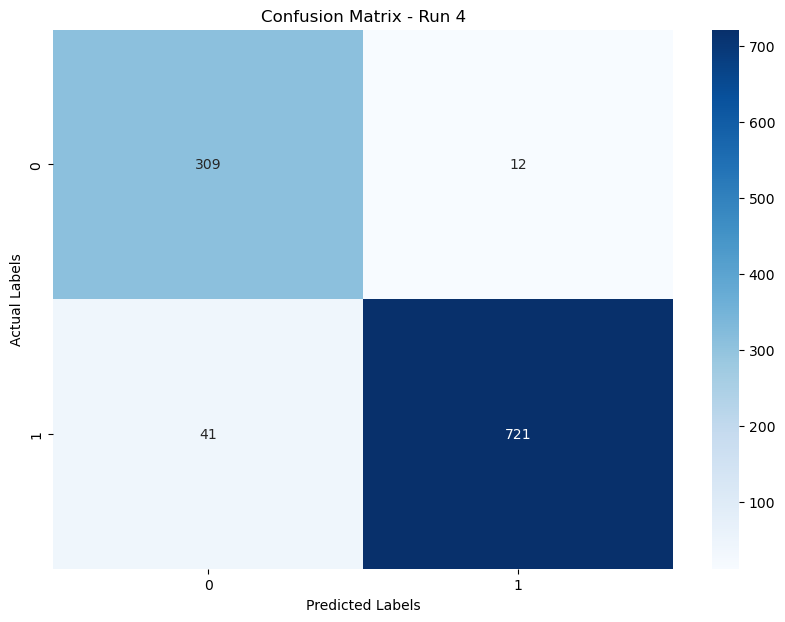

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       321
           1       0.98      0.95      0.96       762

    accuracy                           0.95      1083
   macro avg       0.93      0.95      0.94      1083
weighted avg       0.95      0.95      0.95      1083

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.04397160664819939
At iteration 2, the best solution fitness is 0.036424212257617744
At iteration 3, the best solution fitness is 0.033603704986149625
At iteration 4, the best solution fitness is 0.03352557998614963
At iteration 5, the best solution fitness is 0.03344745498614963
At iteration 6, the best solution fitness is 0.033291204986149625
At iteration 7, the best solution fitness is 0.033291204986149625
At iteration 8, the best solution fitness is 0.03245520256232692
At iteration 9, the best solution fitness is 0.03245520256232692
At iteration 10, the best solutio

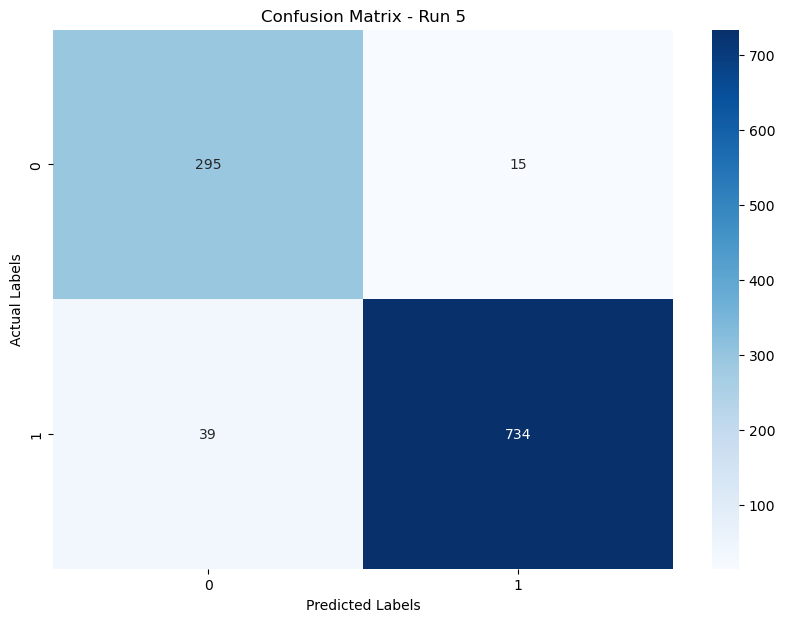

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       310
           1       0.98      0.95      0.96       773

    accuracy                           0.95      1083
   macro avg       0.93      0.95      0.94      1083
weighted avg       0.95      0.95      0.95      1083



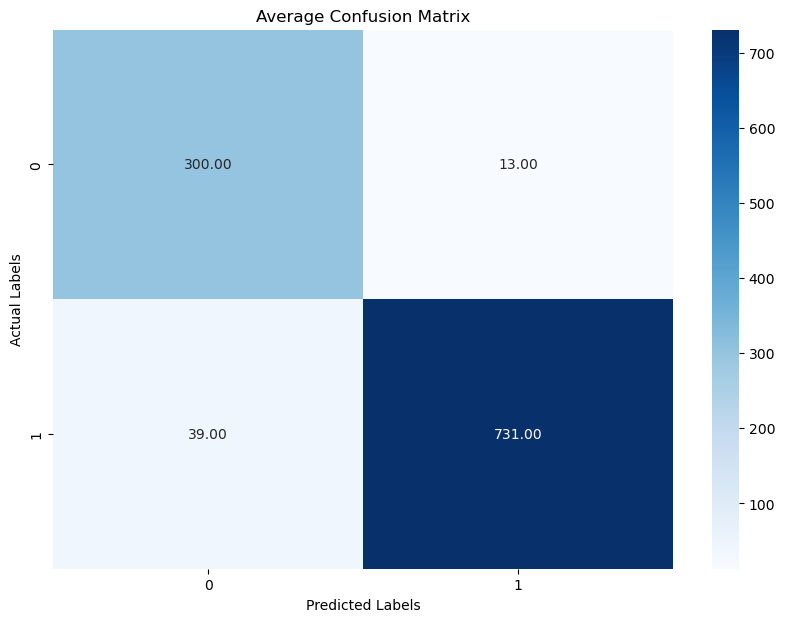


Average Classification Report:
Accuracy: 0.9520
Precision: 0.9341
Recall: 0.9538
F1-Score: 0.9430

Average Number of Features Selected Each Run: 28.80

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9520, STD=0.0067
Precision: AVG=0.9341, STD=0.0091
Recall: AVG=0.9538, STD=0.0068
F1-Score: AVG=0.9430, STD=0.0077


In [7]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [8]:
data = pd.read_csv('data3_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5202, 128)
(5202,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.03675638795585415
At iteration 2, the best solution fitness is 0.03667826295585415
At iteration 3, the best solution fitness is 0.03667826295585415
At iteration 4, the best solution fitness is 0.03667826295585415
At iteration 5, the best solution fitness is 0.03667826295585415
At iteration 6, the best solution fitness is 0.03667826295585415
At iteration 7, the best solution fitness is 0.03667826295585415
At iteration 8, the best solution fitness is 0.03667826295585415
At iteration 9, the best solution fitness is 0.03667826295585415
At iteration 10, the best solution fitness is 0.03667826295585415
At iteration 11, the best solution fitness is 0.03667826295585415
At iteration 12, the best solution fitness is 0.03667826295585415
At iteration 13, the best solution fitness is 0.03667826295585415
At iteration 14, the best solution fitness is 0.03667826295585415
At iteration 15, the best solution fitness is 0.03667826295585415

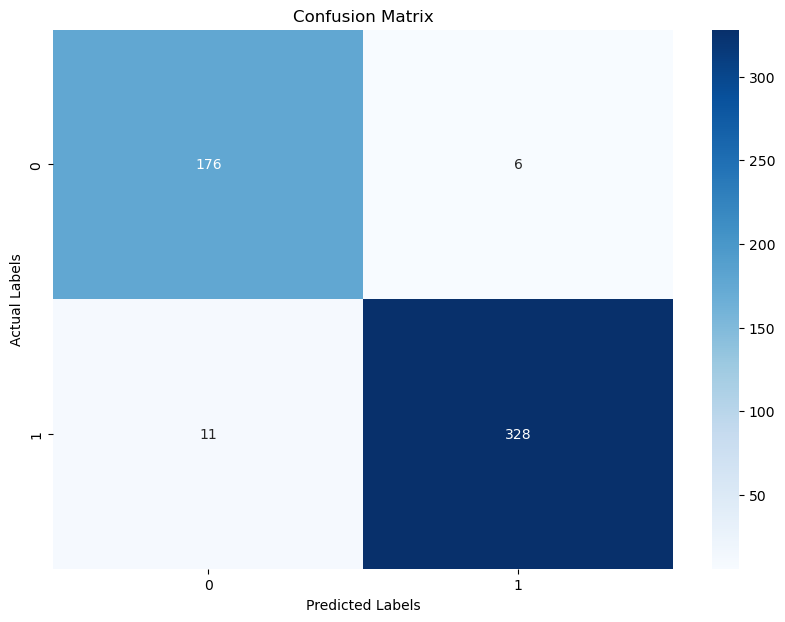

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.03850032989443374
At iteration 2, the best solution fitness is 0.03850032989443374
At iteration 3, the best solution fitness is 0.03850032989443374
At iteration 4, the best solution fitness is 0.03850032989443374
At iteration 5, the best solution fitness is 0.03850032989443374
At iteration 6, the best solution fitness is 0.03850032989443374
At iteration 7, the best solution fitness is 0.03850032989443374
At iteration 8, the best solution fitness is 0.03850032989443374
At iteration 9, the best solution fitness is 0.03850032989443374
At iteration 10, the best solution fitness is 0.03850032989443374
At iteration 11, the best solution fitness is 0.03850032989443374
At iteration 12, the best solution fitness is 0.03850032989443374
At iteration 13, the best solution fitness is 0.03850032989443374
At iteration 14, the best solution fitness is 0.03850032989443374
At iteration 15, the best solution fitness is 0.03850032989443374

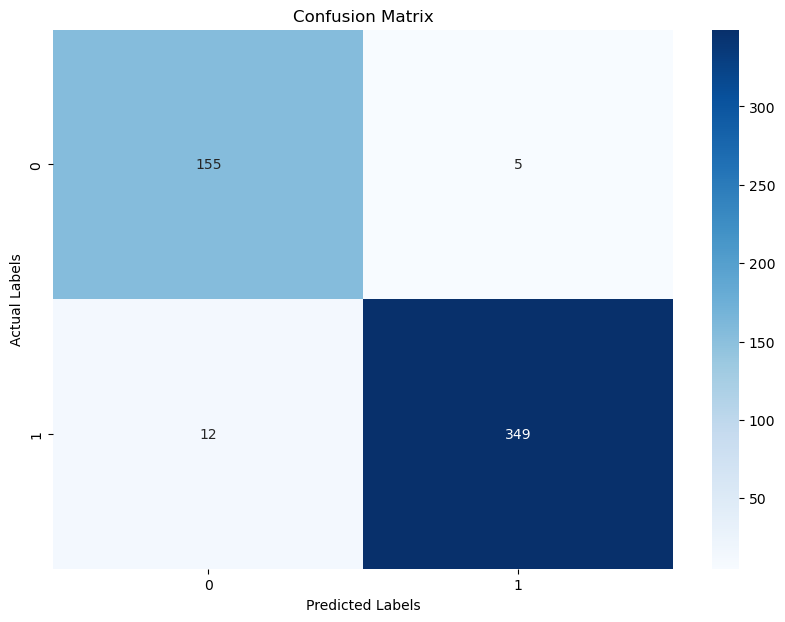

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.044435280710172755
At iteration 2, the best solution fitness is 0.04237883877159304
At iteration 3, the best solution fitness is 0.041025521833013445
At iteration 4, the best solution fitness is 0.041025521833013445
At iteration 5, the best solution fitness is 0.03730326295585414
At iteration 6, the best solution fitness is 0.03730326295585414
At iteration 7, the best solution fitness is 0.03730326295585414
At iteration 8, the best solution fitness is 0.034699946017274434
At iteration 9, the best solution fitness is 0.034699946017274434
At iteration 10, the best solution fitness is 0.034699946017274434
At iteration 11, the best solution fitness is 0.034699946017274434
At iteration 12, the best solution fitness is 0.034699946017274434
At iteration 13, the best solution fitness is 0.034699946017274434
At iteration 14, the best solution fitness is 0.034699946017274434
At iteration 15, the best solution fitness is 0.0346999

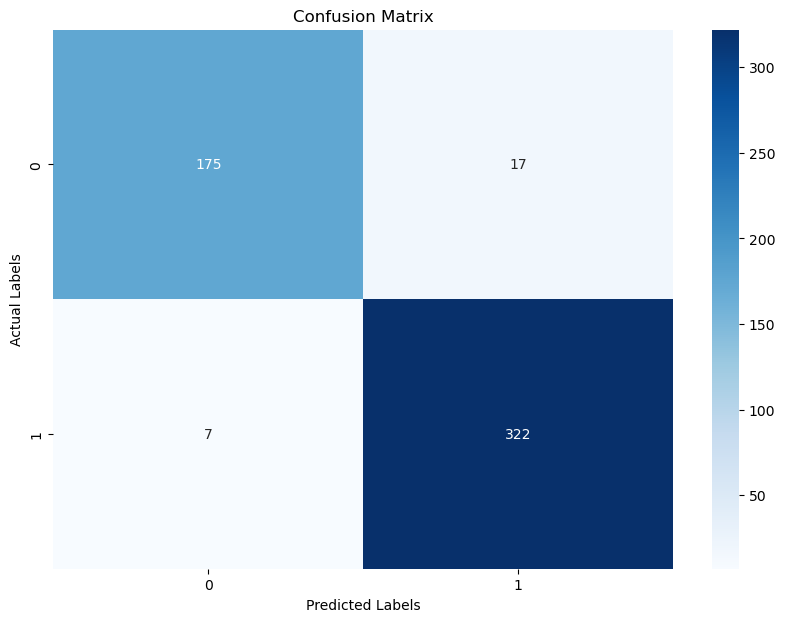

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.04079114683301344
At iteration 2, the best solution fitness is 0.038969079894433746
At iteration 3, the best solution fitness is 0.038969079894433746
At iteration 4, the best solution fitness is 0.038734704894433744
At iteration 5, the best solution fitness is 0.038734704894433744
At iteration 6, the best solution fitness is 0.038734704894433744
At iteration 7, the best solution fitness is 0.038734704894433744
At iteration 8, the best solution fitness is 0.038734704894433744
At iteration 9, the best solution fitness is 0.038734704894433744
At iteration 10, the best solution fitness is 0.038734704894433744
At iteration 11, the best solution fitness is 0.038734704894433744
At iteration 12, the best solution fitness is 0.038734704894433744
At iteration 13, the best solution fitness is 0.038734704894433744
At iteration 14, the best solution fitness is 0.038734704894433744
At iteration 15, the best solution fitness is 0.0387

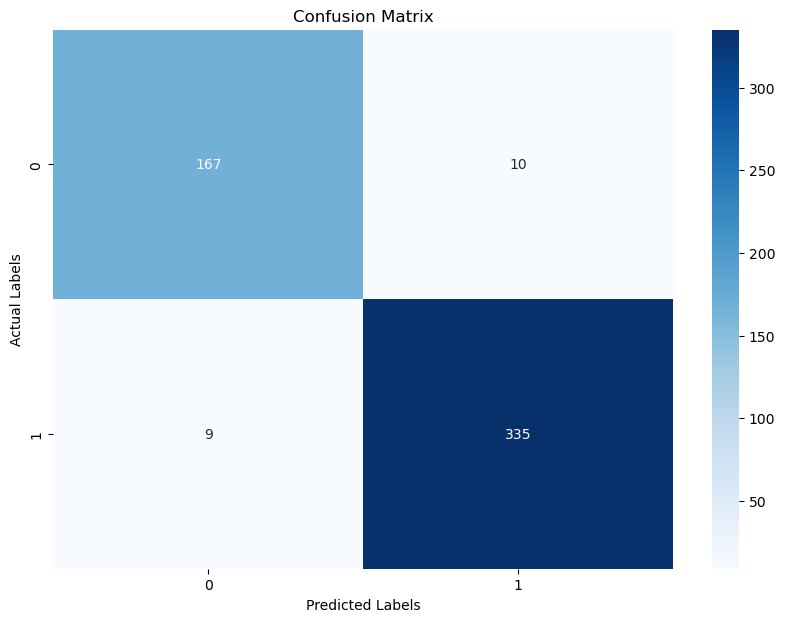

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.04079114683301344
At iteration 2, the best solution fitness is 0.04079114683301344
At iteration 3, the best solution fitness is 0.04079114683301344
At iteration 4, the best solution fitness is 0.03303412907869484
At iteration 5, the best solution fitness is 0.03303412907869484
At iteration 6, the best solution fitness is 0.03303412907869484
At iteration 7, the best solution fitness is 0.03303412907869484
At iteration 8, the best solution fitness is 0.03303412907869484
At iteration 9, the best solution fitness is 0.03303412907869484
At iteration 10, the best solution fitness is 0.03303412907869484
At iteration 11, the best solution fitness is 0.03303412907869484
At iteration 12, the best solution fitness is 0.03303412907869484
At iteration 13, the best solution fitness is 0.03303412907869484
At iteration 14, the best solution fitness is 0.03303412907869484
At iteration 15, the best solution fitness is 0.03303412907869484

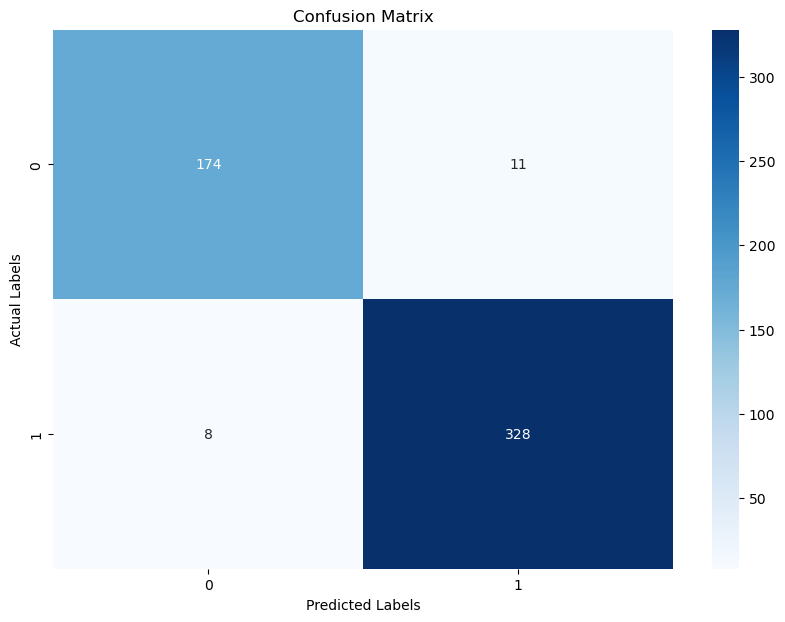


Average Number of Features Selected Each Run: 56.40

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9631, STD=0.0049
Precision: AVG=0.9592, STD=0.0025
Recall: AVG=0.9594, STD=0.0082
F1-Score: AVG=0.9591, STD=0.0049


In [15]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 30
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.04915053134005762
At iteration 2, the best solution fitness is 0.04614125540345825
At iteration 3, the best solution fitness is 0.046063130403458254
At iteration 4, the best solution fitness is 0.045112121757925054
At iteration 5, the best solution fitness is 0.044004863112391976
At iteration 6, the best solution fitness is 0.04392673811239197
At iteration 7, the best solution fitness is 0.04289760446685878
At iteration 8, the best solution fitness is 0.04289760446685878
At iteration 9, the best solution fitness is 0.04289760446685878
At iteration 10, the best solution fitness is 0.04289760446685878
At iteration 11, the best solution fitness is 0.04289760446685878
At iteration 12, the best solution fitness is 0.04289760446685878
At iteration 13, the best solution fitness is 0.04289760446685878
At iteration 14, the best solution fitness is 0.04281947946685878
At iteration 15, the best solution fitness is 0.04281947946685

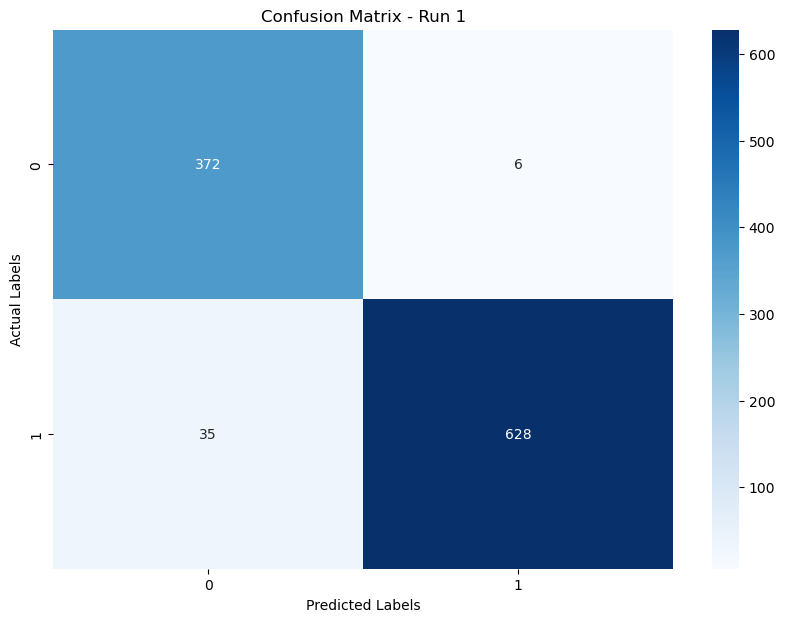

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       378
           1       0.99      0.95      0.97       663

    accuracy                           0.96      1041
   macro avg       0.95      0.97      0.96      1041
weighted avg       0.96      0.96      0.96      1041

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.05912936779538901
At iteration 2, the best solution fitness is 0.05231605727665709
At iteration 3, the best solution fitness is 0.048994281340057615
At iteration 4, the best solution fitness is 0.048916156340057616
At iteration 5, the best solution fitness is 0.048916156340057616
At iteration 6, the best solution fitness is 0.047808897694524524
At iteration 7, the best solution fitness is 0.04765264769452453
At iteration 8, the best solution fitness is 0.047418272694524526
At iteration 9, the best solution fitness is 0.04662351404899134
At iteration 10, the best soluti

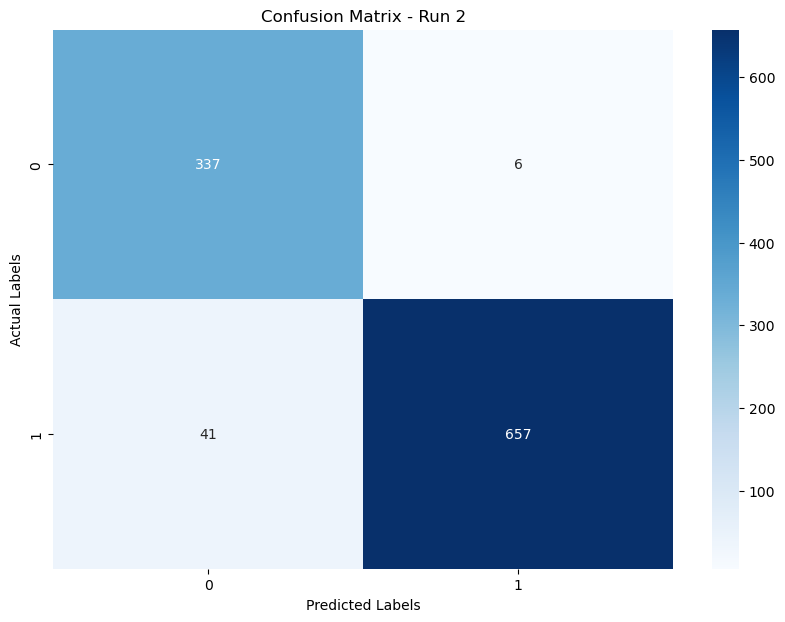

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       343
           1       0.99      0.94      0.97       698

    accuracy                           0.95      1041
   macro avg       0.94      0.96      0.95      1041
weighted avg       0.96      0.95      0.96      1041

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.0388080871757925
At iteration 2, the best solution fitness is 0.035004052593659934
At iteration 3, the best solution fitness is 0.033974918948126855
At iteration 4, the best solution fitness is 0.032945785302593664
At iteration 5, the best solution fitness is 0.032945785302593664
At iteration 6, the best solution fitness is 0.032945785302593664
At iteration 7, the best solution fitness is 0.032945785302593664
At iteration 8, the best solution fitness is 0.032945785302593664
At iteration 9, the best solution fitness is 0.032945785302593664
At iteration 10, the best solu

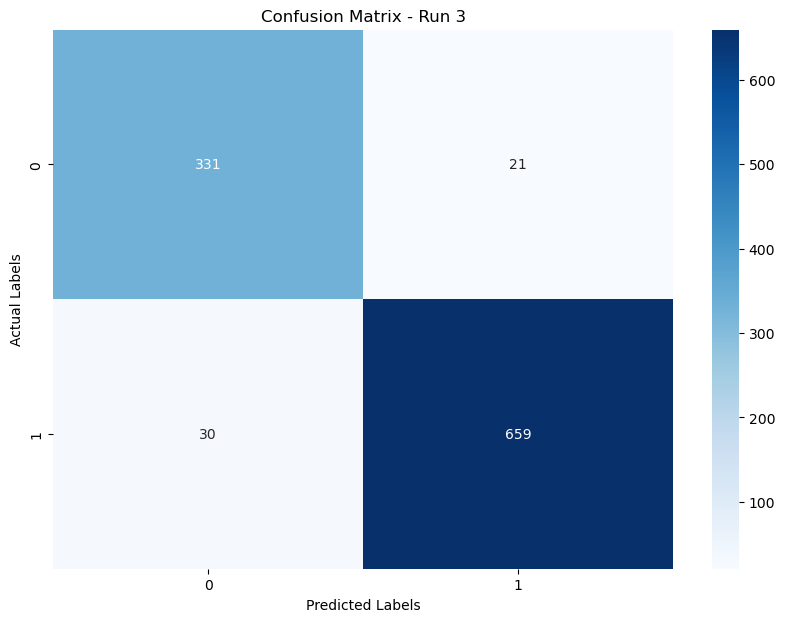

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       352
           1       0.97      0.96      0.96       689

    accuracy                           0.95      1041
   macro avg       0.94      0.95      0.95      1041
weighted avg       0.95      0.95      0.95      1041

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.051718074567723364
At iteration 2, the best solution fitness is 0.046650531340057616
At iteration 3, the best solution fitness is 0.04657240634005762
At iteration 4, the best solution fitness is 0.04657240634005762
At iteration 5, the best solution fitness is 0.04482663904899133
At iteration 6, the best solution fitness is 0.04482663904899133
At iteration 7, the best solution fitness is 0.04482663904899133
At iteration 8, the best solution fitness is 0.04482663904899133
At iteration 9, the best solution fitness is 0.04387563040345825
At iteration 10, the best solution 

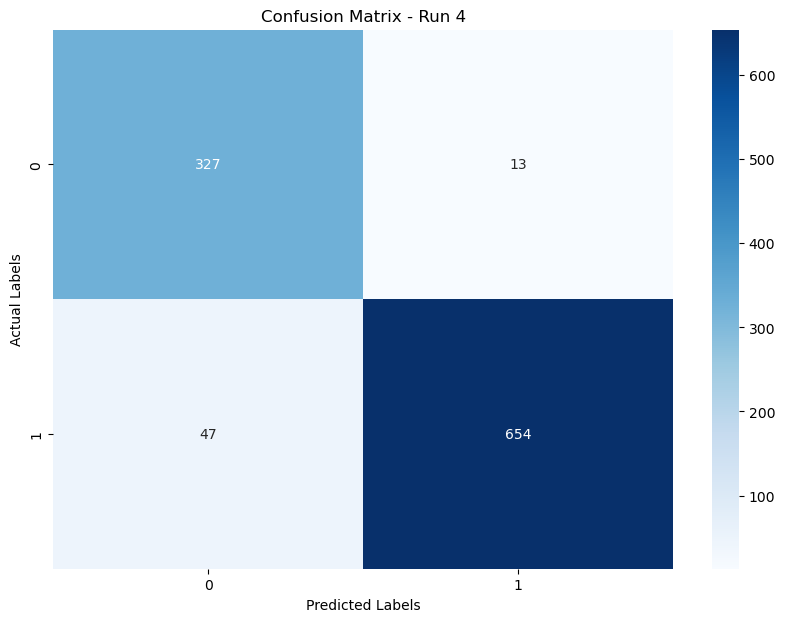

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       340
           1       0.98      0.93      0.96       701

    accuracy                           0.94      1041
   macro avg       0.93      0.95      0.94      1041
weighted avg       0.95      0.94      0.94      1041

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.046728656340057614
At iteration 2, the best solution fitness is 0.04395375540345825
At iteration 3, the best solution fitness is 0.04189548811239197
At iteration 4, the best solution fitness is 0.04189548811239197
At iteration 5, the best solution fitness is 0.041739238112391976
At iteration 6, the best solution fitness is 0.041739238112391976
At iteration 7, the best solution fitness is 0.041739238112391976
At iteration 8, the best solution fitness is 0.041739238112391976
At iteration 9, the best solution fitness is 0.041739238112391976
At iteration 10, the best solut

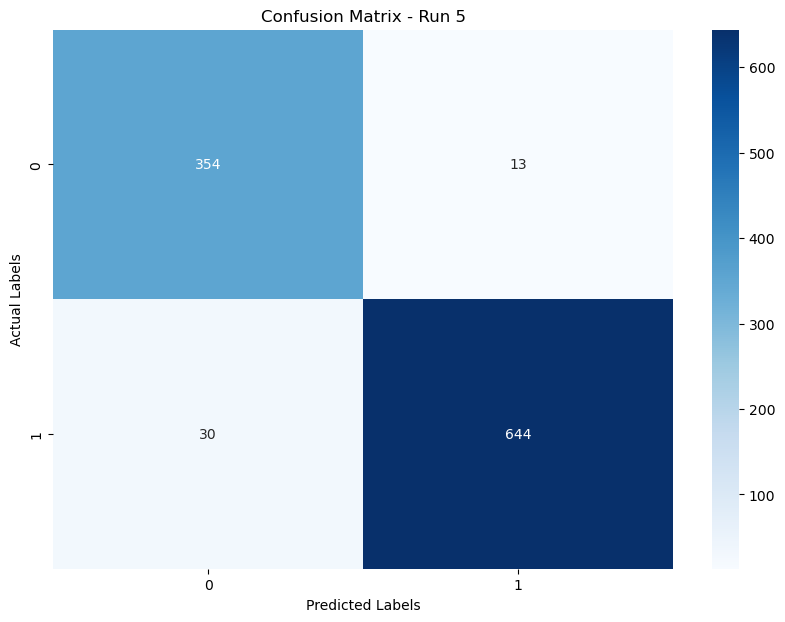

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       367
           1       0.98      0.96      0.97       674

    accuracy                           0.96      1041
   macro avg       0.95      0.96      0.96      1041
weighted avg       0.96      0.96      0.96      1041



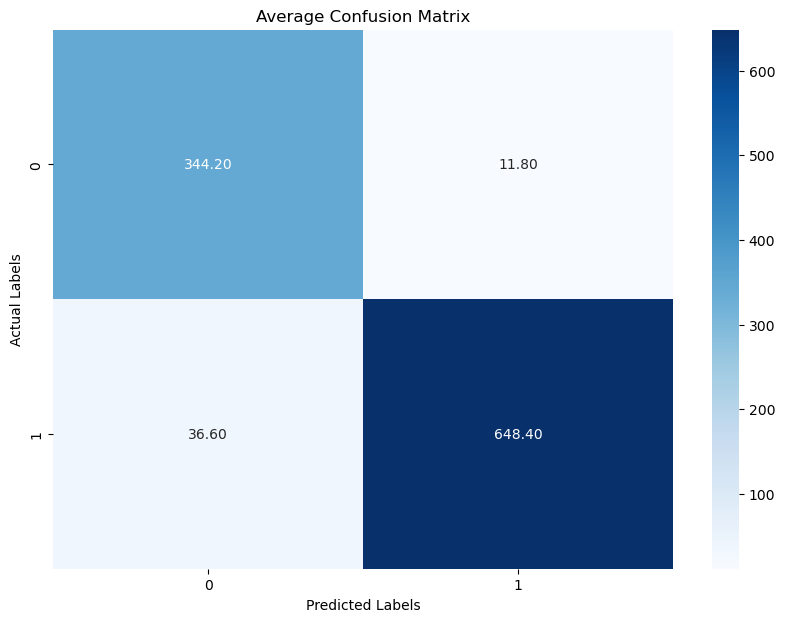


Average Classification Report:
Accuracy: 0.9535
Precision: 0.9430
Recall: 0.9567
F1-Score: 0.9490

Average Number of Features Selected Each Run: 31.20

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9535, STD=0.0065
Precision: AVG=0.9430, STD=0.0089
Recall: AVG=0.9567, STD=0.0074
F1-Score: AVG=0.9490, STD=0.0078


In [9]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [10]:
data = pd.read_csv('data4_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5161, 128)
(5161,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.037865691489361655
At iteration 2, the best solution fitness is 0.037553191489361655
At iteration 3, the best solution fitness is 0.037553191489361655
At iteration 4, the best solution fitness is 0.037553191489361655
At iteration 5, the best solution fitness is 0.037553191489361655
At iteration 6, the best solution fitness is 0.03739694148936166
At iteration 7, the best solution fitness is 0.03739694148936166
At iteration 8, the best solution fitness is 0.03739694148936166
At iteration 9, the best solution fitness is 0.03739694148936166
At iteration 10, the best solution fitness is 0.034466422872340446
At iteration 11, the best solution fitness is 0.034466422872340446
At iteration 12, the best solution fitness is 0.034466422872340446
At iteration 13, the best solution fitness is 0.034466422872340446
At iteration 14, the best solution fitness is 0.034466422872340446
At iteration 15, the best solution fitness is 0.0344664

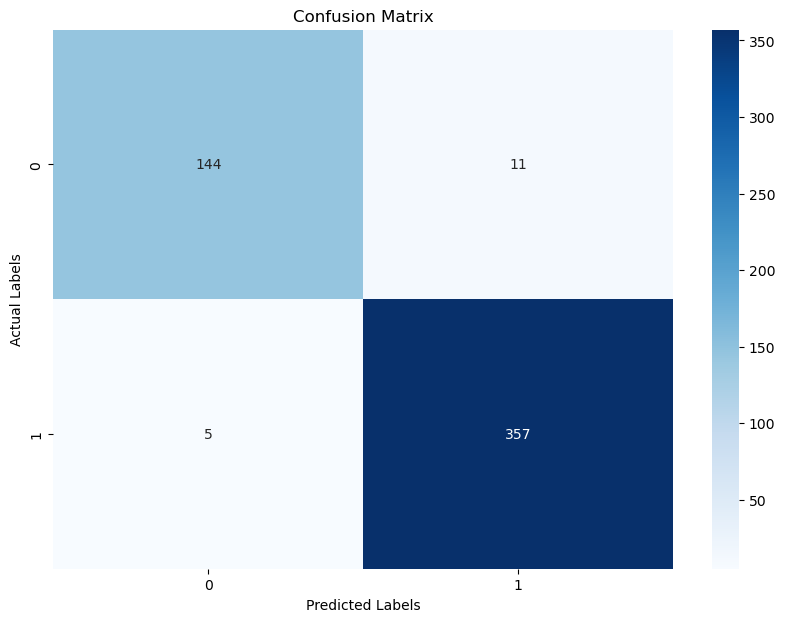

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.03931183510638298
At iteration 2, the best solution fitness is 0.03731881648936166
At iteration 3, the best solution fitness is 0.03731881648936166
At iteration 4, the best solution fitness is 0.03731881648936166
At iteration 5, the best solution fitness is 0.03731881648936166
At iteration 6, the best solution fitness is 0.03731881648936166
At iteration 7, the best solution fitness is 0.03731881648936166
At iteration 8, the best solution fitness is 0.03731881648936166
At iteration 9, the best solution fitness is 0.03731881648936166
At iteration 10, the best solution fitness is 0.03731881648936166
At iteration 11, the best solution fitness is 0.03731881648936166
At iteration 12, the best solution fitness is 0.03731881648936166
At iteration 13, the best solution fitness is 0.03731881648936166
At iteration 14, the best solution fitness is 0.03731881648936166
At iteration 15, the best solution fitness is 0.03731881648936166

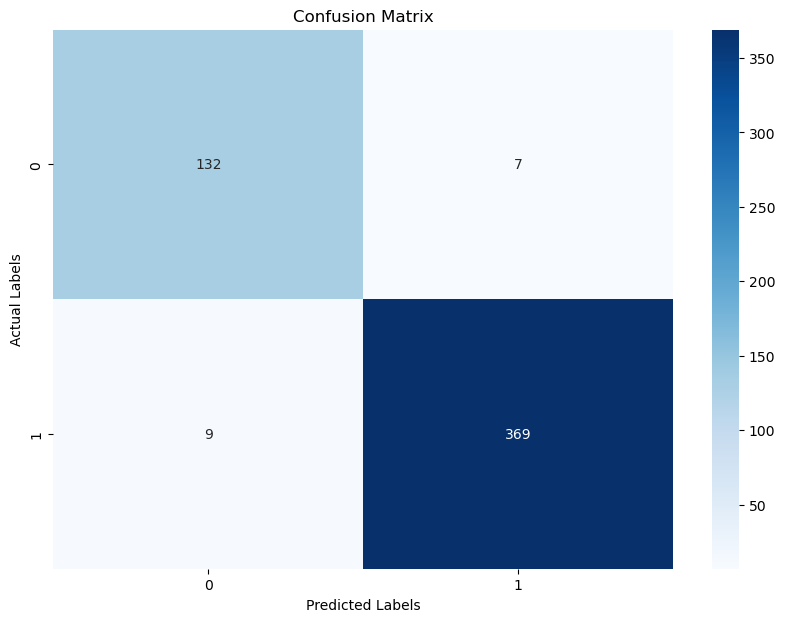

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.03915558510638298
At iteration 2, the best solution fitness is 0.03747506648936166
At iteration 3, the best solution fitness is 0.03747506648936166
At iteration 4, the best solution fitness is 0.03509142287234045
At iteration 5, the best solution fitness is 0.03509142287234045
At iteration 6, the best solution fitness is 0.03509142287234045
At iteration 7, the best solution fitness is 0.03509142287234045
At iteration 8, the best solution fitness is 0.03509142287234045
At iteration 9, the best solution fitness is 0.03509142287234045
At iteration 10, the best solution fitness is 0.03509142287234045
At iteration 11, the best solution fitness is 0.03509142287234045
At iteration 12, the best solution fitness is 0.03509142287234045
At iteration 13, the best solution fitness is 0.03509142287234045
At iteration 14, the best solution fitness is 0.03509142287234045
At iteration 15, the best solution fitness is 0.03509142287234045

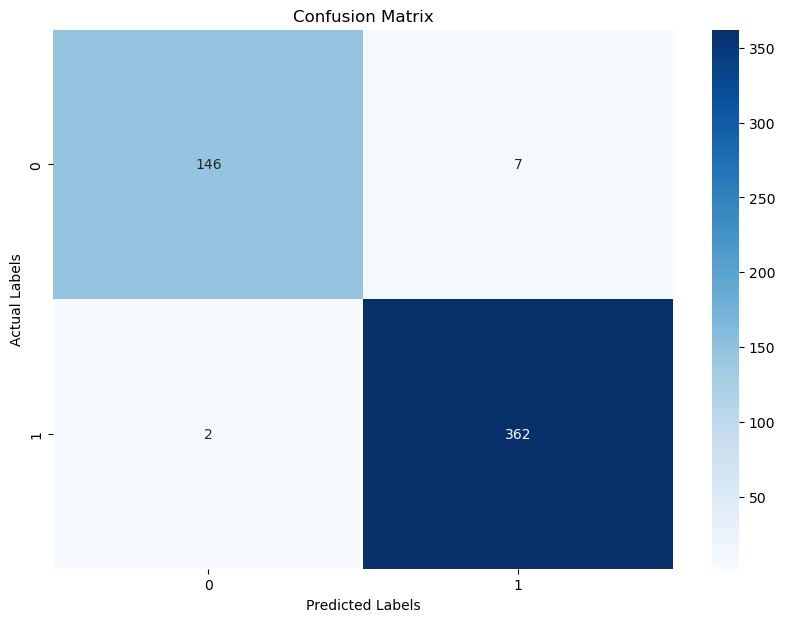

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.03356715425531913
At iteration 2, the best solution fitness is 0.03356715425531913
At iteration 3, the best solution fitness is 0.03356715425531913
At iteration 4, the best solution fitness is 0.03356715425531913
At iteration 5, the best solution fitness is 0.03356715425531913
At iteration 6, the best solution fitness is 0.03356715425531913
At iteration 7, the best solution fitness is 0.03356715425531913
At iteration 8, the best solution fitness is 0.03356715425531913
At iteration 9, the best solution fitness is 0.03235538563829792
At iteration 10, the best solution fitness is 0.031261635638297924
At iteration 11, the best solution fitness is 0.031261635638297924
At iteration 12, the best solution fitness is 0.031261635638297924
At iteration 13, the best solution fitness is 0.031261635638297924
At iteration 14, the best solution fitness is 0.031261635638297924
At iteration 15, the best solution fitness is 0.031261635638

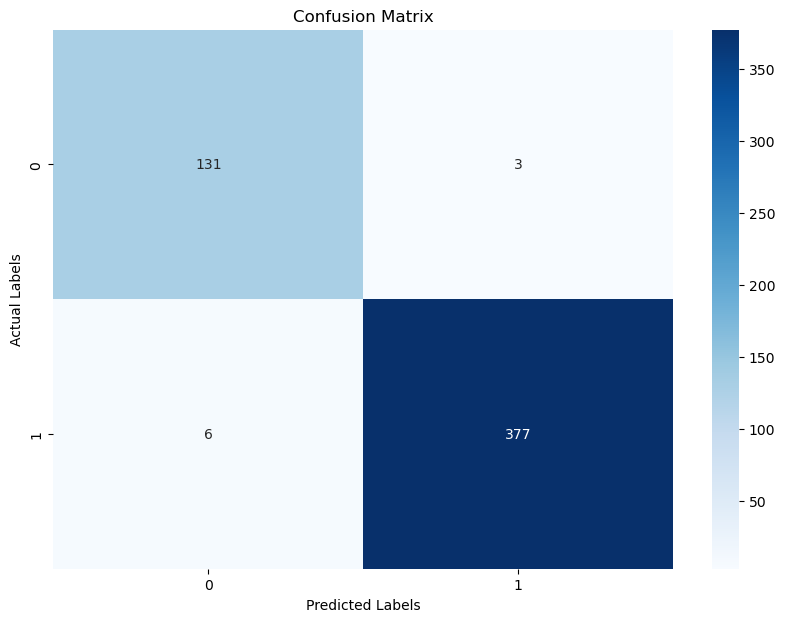

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.03532579787234045
At iteration 2, the best solution fitness is 0.02758809840425528
At iteration 3, the best solution fitness is 0.02758809840425528
At iteration 4, the best solution fitness is 0.02758809840425528
At iteration 5, the best solution fitness is 0.02758809840425528
At iteration 6, the best solution fitness is 0.02758809840425528
At iteration 7, the best solution fitness is 0.02758809840425528
At iteration 8, the best solution fitness is 0.02758809840425528
At iteration 9, the best solution fitness is 0.02758809840425528
At iteration 10, the best solution fitness is 0.02758809840425528
At iteration 11, the best solution fitness is 0.02758809840425528
At iteration 12, the best solution fitness is 0.02758809840425528
At iteration 13, the best solution fitness is 0.02758809840425528
At iteration 14, the best solution fitness is 0.02758809840425528
At iteration 15, the best solution fitness is 0.02758809840425528

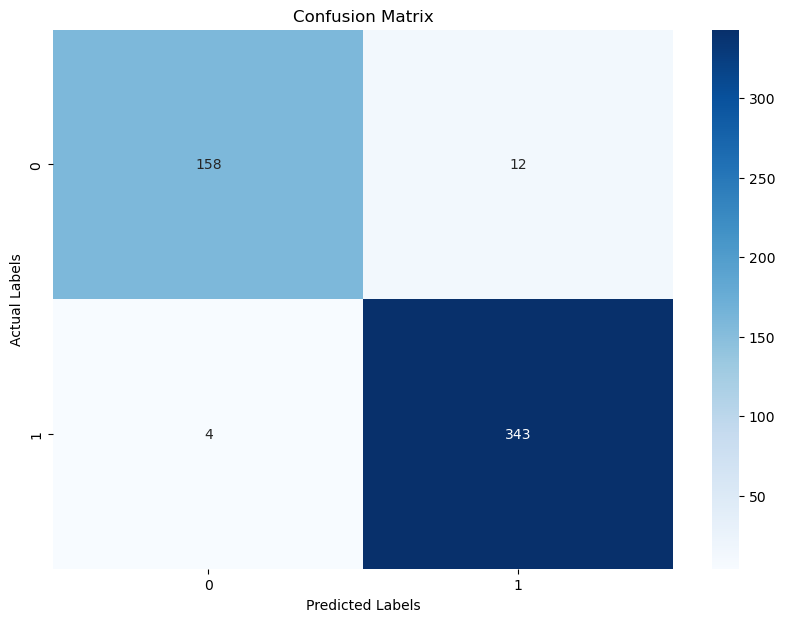


Average Number of Features Selected Each Run: 51.20

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9745, STD=0.0066
Precision: AVG=0.9711, STD=0.0081
Recall: AVG=0.9670, STD=0.0092
F1-Score: AVG=0.9689, STD=0.0077


In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 30
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.041090195425943894
At iteration 2, the best solution fitness is 0.0401318217570184
At iteration 3, the best solution fitness is 0.03821507441916752
At iteration 4, the best solution fitness is 0.03430345474346566
At iteration 5, the best solution fitness is 0.03430345474346566
At iteration 6, the best solution fitness is 0.033345081074540164
At iteration 7, the best solution fitness is 0.03318883107454017
At iteration 8, the best solution fitness is 0.03318883107454017
At iteration 9, the best solution fitness is 0.03318883107454017
At iteration 10, the best solution fitness is 0.03318883107454017
At iteration 11, the best solution fitness is 0.03318883107454017
At iteration 12, the best solution fitness is 0.03318883107454017
At iteration 13, the best solution fitness is 0.03318883107454017
At iteration 14, the best solution fitness is 0.03318883107454017
At iteration 15, the best solution fitness is 0.0331888310745401

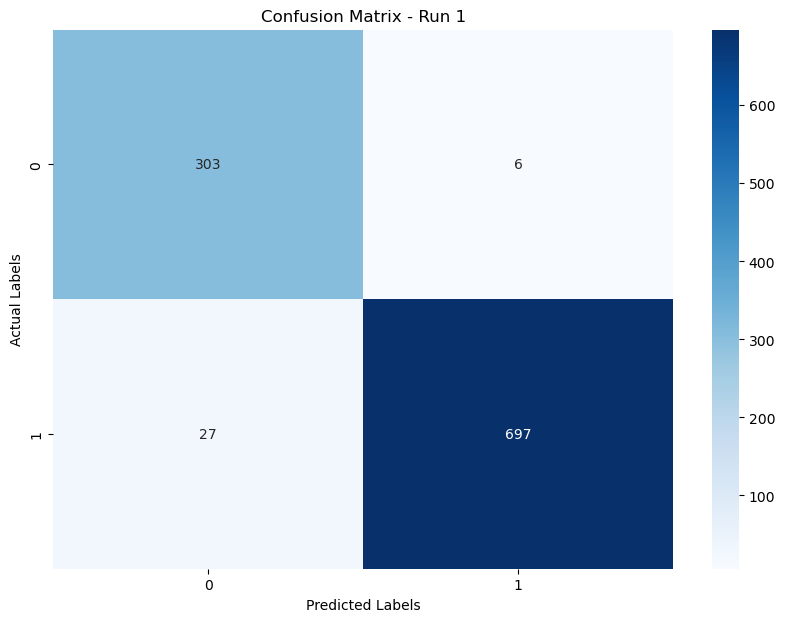

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       309
           1       0.99      0.96      0.98       724

    accuracy                           0.97      1033
   macro avg       0.95      0.97      0.96      1033
weighted avg       0.97      0.97      0.97      1033

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.04415794409486928
At iteration 2, the best solution fitness is 0.04400169409486927
At iteration 3, the best solution fitness is 0.03993382441916752
At iteration 4, the best solution fitness is 0.03905357575024203
At iteration 5, the best solution fitness is 0.03905357575024203
At iteration 6, the best solution fitness is 0.03897545075024203
At iteration 7, the best solution fitness is 0.03897545075024203
At iteration 8, the best solution fitness is 0.03897545075024203
At iteration 9, the best solution fitness is 0.03897545075024203
At iteration 10, the best solution fi

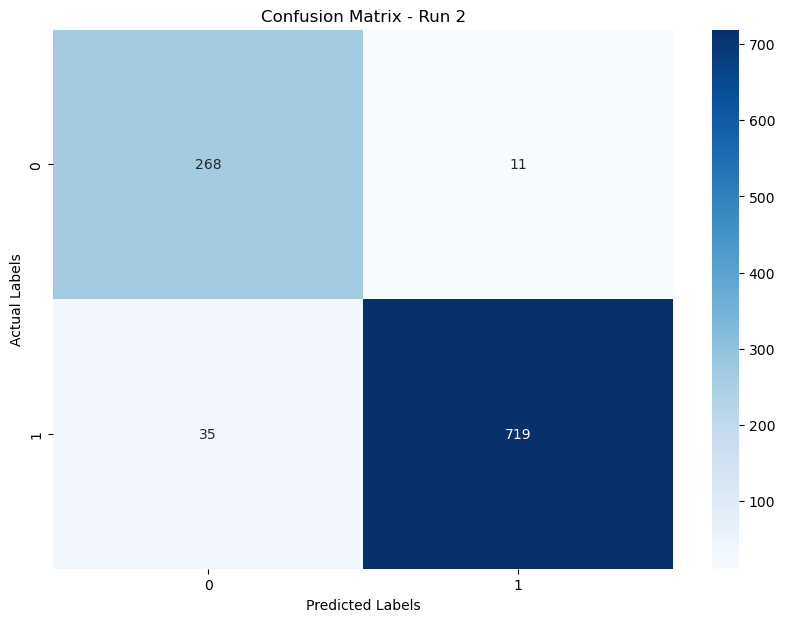

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       279
           1       0.98      0.95      0.97       754

    accuracy                           0.96      1033
   macro avg       0.93      0.96      0.94      1033
weighted avg       0.96      0.96      0.96      1033

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.04669969143272026
At iteration 2, the best solution fitness is 0.045506942763794765
At iteration 3, the best solution fitness is 0.04351207042594389
At iteration 4, the best solution fitness is 0.043355820425943895
At iteration 5, the best solution fitness is 0.0413609480880929
At iteration 6, the best solution fitness is 0.041204698088092906
At iteration 7, the best solution fitness is 0.04040257441916752
At iteration 8, the best solution fitness is 0.03936607575024203
At iteration 9, the best solution fitness is 0.03936607575024203
At iteration 10, the best solution 

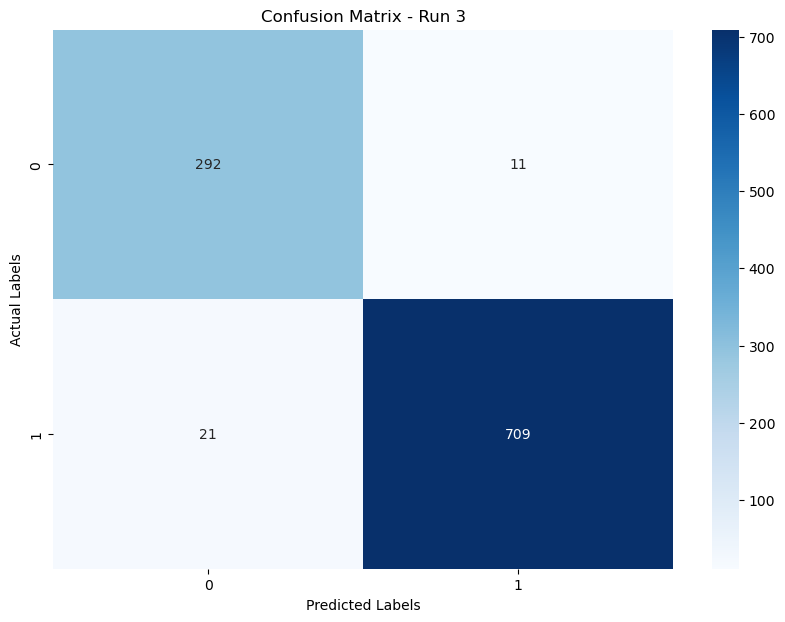

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       303
           1       0.98      0.97      0.98       730

    accuracy                           0.97      1033
   macro avg       0.96      0.97      0.96      1033
weighted avg       0.97      0.97      0.97      1033

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.04466844143272026
At iteration 2, the best solution fitness is 0.03676707708131654
At iteration 3, the best solution fitness is 0.03485032974346566
At iteration 4, the best solution fitness is 0.03293358240561467
At iteration 5, the best solution fitness is 0.03293358240561467
At iteration 6, the best solution fitness is 0.03293358240561467
At iteration 7, the best solution fitness is 0.03285545740561467
At iteration 8, the best solution fitness is 0.03285545740561467
At iteration 9, the best solution fitness is 0.03285545740561467
At iteration 10, the best solution fi

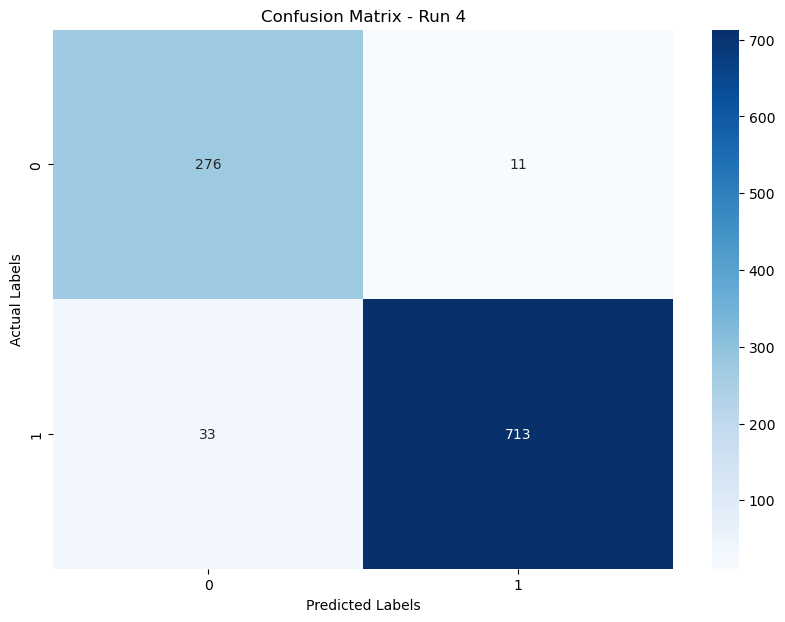

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       287
           1       0.98      0.96      0.97       746

    accuracy                           0.96      1033
   macro avg       0.94      0.96      0.95      1033
weighted avg       0.96      0.96      0.96      1033

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.04218394542594389
At iteration 2, the best solution fitness is 0.03827232575024203
At iteration 3, the best solution fitness is 0.03811607575024203
At iteration 4, the best solution fitness is 0.03803795075024203
At iteration 5, the best solution fitness is 0.03795982575024203
At iteration 6, the best solution fitness is 0.03795982575024203
At iteration 7, the best solution fitness is 0.037881700750242026
At iteration 8, the best solution fitness is 0.037881700750242026
At iteration 9, the best solution fitness is 0.037881700750242026
At iteration 10, the best solution

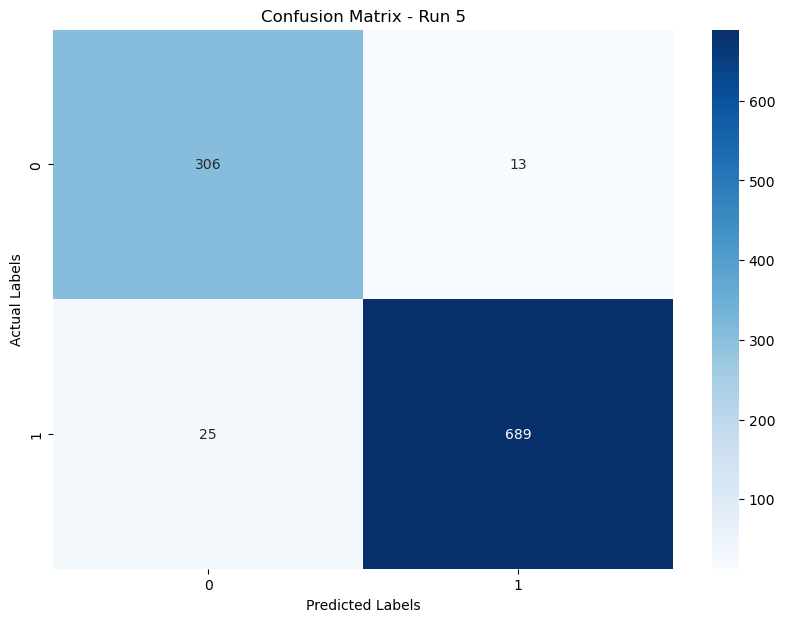

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       319
           1       0.98      0.96      0.97       714

    accuracy                           0.96      1033
   macro avg       0.95      0.96      0.96      1033
weighted avg       0.96      0.96      0.96      1033



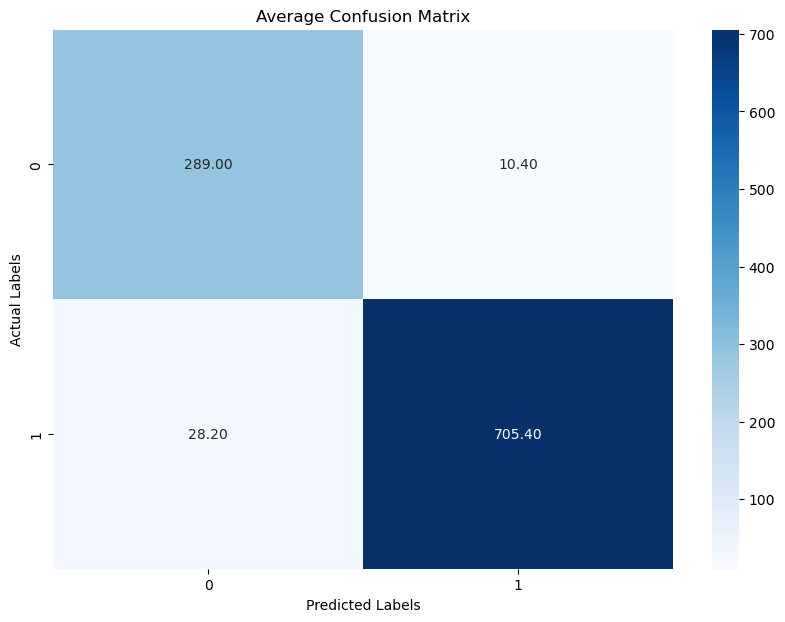


Average Classification Report:
Accuracy: 0.9626
Precision: 0.9481
Recall: 0.9634
F1-Score: 0.9552

Average Number of Features Selected Each Run: 32.60

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9626, STD=0.0055
Precision: AVG=0.9481, STD=0.0094
Recall: AVG=0.9634, STD=0.0054
F1-Score: AVG=0.9552, STD=0.0074


In [11]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [16]:
data = pd.read_csv('data5_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5161, 128)
(5161,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.03899933510638298
At iteration 2, the best solution fitness is 0.03899933510638298
At iteration 3, the best solution fitness is 0.03899933510638298
At iteration 4, the best solution fitness is 0.03899933510638298
At iteration 5, the best solution fitness is 0.03899933510638298
At iteration 6, the best solution fitness is 0.03899933510638298
At iteration 7, the best solution fitness is 0.03899933510638298
At iteration 8, the best solution fitness is 0.03899933510638298
At iteration 9, the best solution fitness is 0.03899933510638298
At iteration 10, the best solution fitness is 0.03899933510638298
At iteration 11, the best solution fitness is 0.03899933510638298
At iteration 12, the best solution fitness is 0.03899933510638298
At iteration 13, the best solution fitness is 0.03899933510638298
At iteration 14, the best solution fitness is 0.03899933510638298
At iteration 15, the best solution fitness is 0.03899933510638298

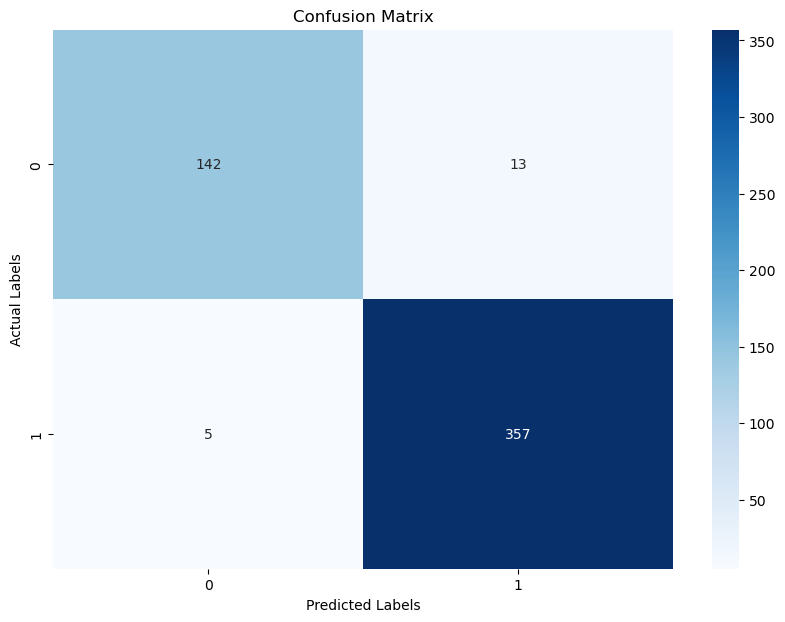

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.036850066489361656
At iteration 2, the best solution fitness is 0.035169547872340445
At iteration 3, the best solution fitness is 0.035169547872340445
At iteration 4, the best solution fitness is 0.035169547872340445
At iteration 5, the best solution fitness is 0.035169547872340445
At iteration 6, the best solution fitness is 0.035169547872340445
At iteration 7, the best solution fitness is 0.035169547872340445
At iteration 8, the best solution fitness is 0.035169547872340445
At iteration 9, the best solution fitness is 0.035169547872340445
At iteration 10, the best solution fitness is 0.035169547872340445
At iteration 11, the best solution fitness is 0.035169547872340445
At iteration 12, the best solution fitness is 0.035169547872340445
At iteration 13, the best solution fitness is 0.035169547872340445
At iteration 14, the best solution fitness is 0.035169547872340445
At iteration 15, the best solution fitness is 0.035

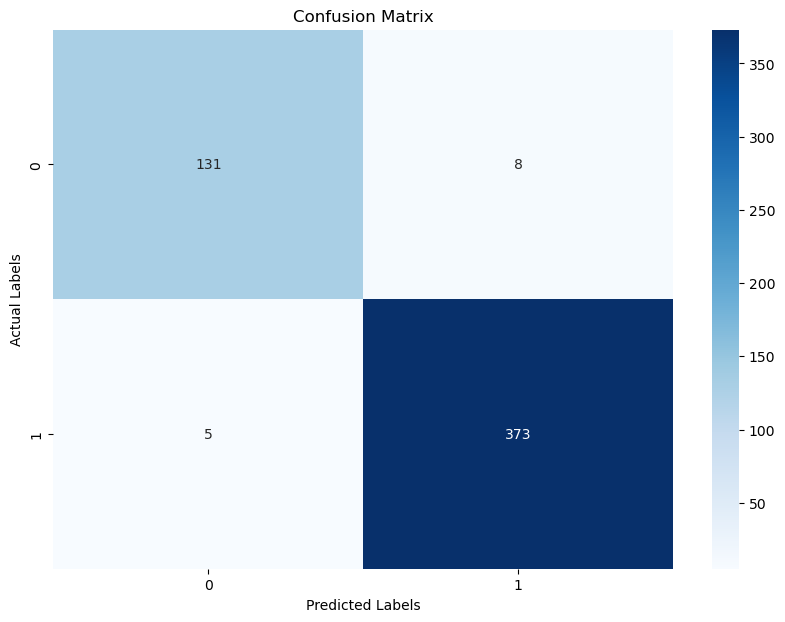

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.039233710106382984
At iteration 2, the best solution fitness is 0.039233710106382984
At iteration 3, the best solution fitness is 0.037865691489361655
At iteration 4, the best solution fitness is 0.03325465425531913
At iteration 5, the best solution fitness is 0.03325465425531913
At iteration 6, the best solution fitness is 0.03325465425531913
At iteration 7, the best solution fitness is 0.03325465425531913
At iteration 8, the best solution fitness is 0.03325465425531913
At iteration 9, the best solution fitness is 0.03325465425531913
At iteration 10, the best solution fitness is 0.03325465425531913
At iteration 11, the best solution fitness is 0.03325465425531913
At iteration 12, the best solution fitness is 0.03325465425531913
At iteration 13, the best solution fitness is 0.03325465425531913
At iteration 14, the best solution fitness is 0.03325465425531913
At iteration 15, the best solution fitness is 0.03325465425531

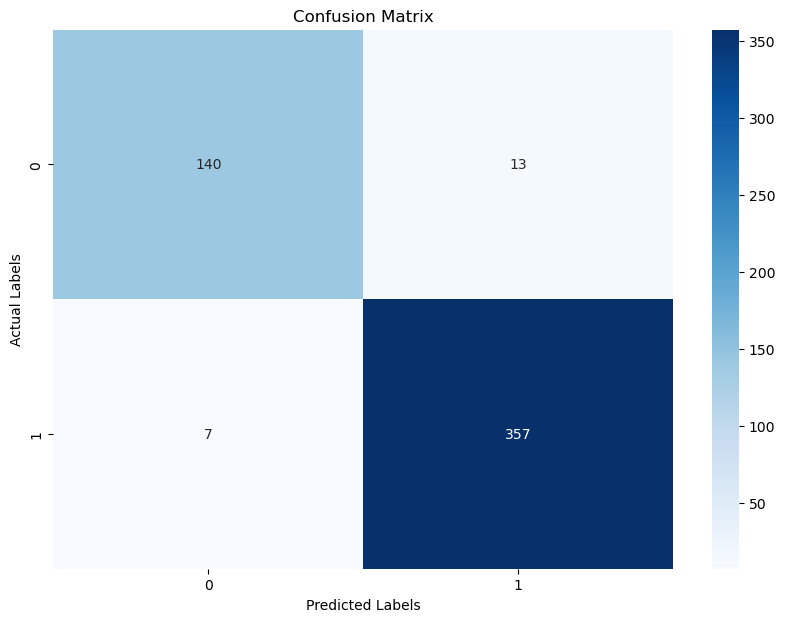

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.035794547872340446
At iteration 2, the best solution fitness is 0.03380152925531913
At iteration 3, the best solution fitness is 0.03380152925531913
At iteration 4, the best solution fitness is 0.03380152925531913
At iteration 5, the best solution fitness is 0.03380152925531913
At iteration 6, the best solution fitness is 0.03380152925531913
At iteration 7, the best solution fitness is 0.03380152925531913
At iteration 8, the best solution fitness is 0.03380152925531913
At iteration 9, the best solution fitness is 0.03380152925531913
At iteration 10, the best solution fitness is 0.03380152925531913
At iteration 11, the best solution fitness is 0.03380152925531913
At iteration 12, the best solution fitness is 0.03380152925531913
At iteration 13, the best solution fitness is 0.03380152925531913
At iteration 14, the best solution fitness is 0.03380152925531913
At iteration 15, the best solution fitness is 0.0338015292553191

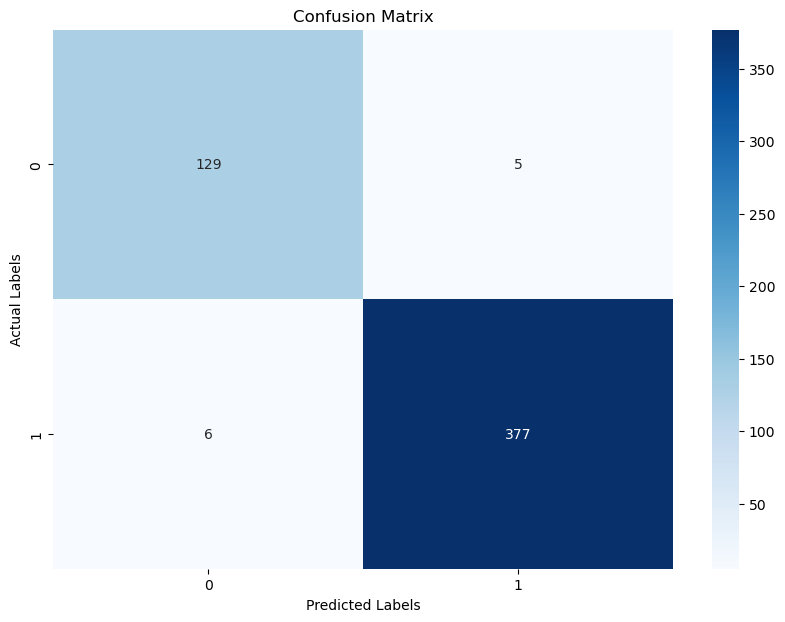

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.03946808510638298
At iteration 2, the best solution fitness is 0.03946808510638298
At iteration 3, the best solution fitness is 0.03778756648936166
At iteration 4, the best solution fitness is 0.03778756648936166
At iteration 5, the best solution fitness is 0.03778756648936166
At iteration 6, the best solution fitness is 0.03778756648936166
At iteration 7, the best solution fitness is 0.03739694148936166
At iteration 8, the best solution fitness is 0.03739694148936166
At iteration 9, the best solution fitness is 0.03739694148936166
At iteration 10, the best solution fitness is 0.03739694148936166
At iteration 11, the best solution fitness is 0.03739694148936166
At iteration 12, the best solution fitness is 0.03739694148936166
At iteration 13, the best solution fitness is 0.03739694148936166
At iteration 14, the best solution fitness is 0.036850066489361656
At iteration 15, the best solution fitness is 0.0368500664893616

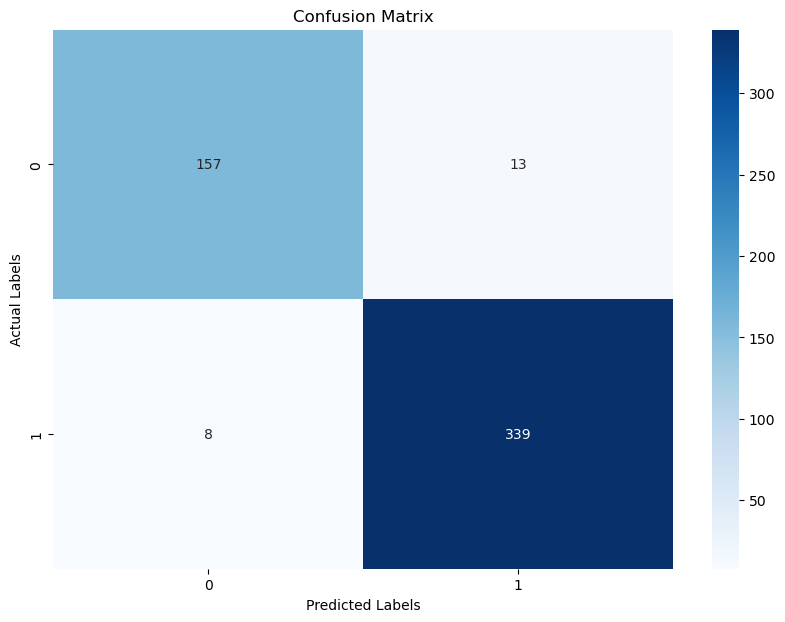


Average Number of Features Selected Each Run: 58.80

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9679, STD=0.0076
Precision: AVG=0.9647, STD=0.0059
Recall: AVG=0.9575, STD=0.0099
F1-Score: AVG=0.9609, STD=0.0078


In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.0410484480880929
At iteration 2, the best solution fitness is 0.036980578412391045
At iteration 3, the best solution fitness is 0.036100329743465664
At iteration 4, the best solution fitness is 0.036100329743465664
At iteration 5, the best solution fitness is 0.03586595474346566
At iteration 6, the best solution fitness is 0.034907581074540166
At iteration 7, the best solution fitness is 0.03306895873668929
At iteration 8, the best solution fitness is 0.031954335067763795
At iteration 9, the best solution fitness is 0.031954335067763795
At iteration 10, the best solution fitness is 0.030917836398838303
At iteration 11, the best solution fitness is 0.030839711398838305
At iteration 12, the best solution fitness is 0.030839711398838305
At iteration 13, the best solution fitness is 0.030839711398838305
At iteration 14, the best solution fitness is 0.030839711398838305
At iteration 15, the best solution fitness is 0.0308397

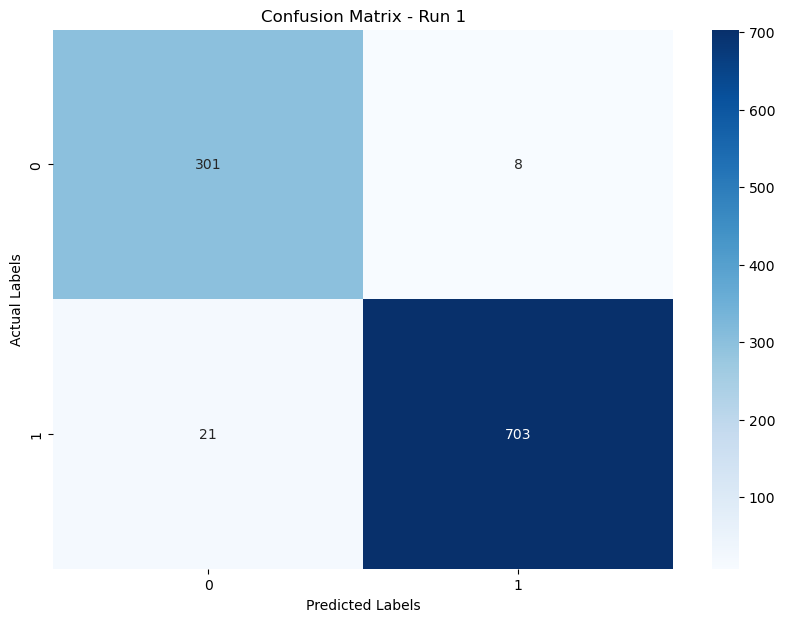

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       309
           1       0.99      0.97      0.98       724

    accuracy                           0.97      1033
   macro avg       0.96      0.97      0.97      1033
weighted avg       0.97      0.97      0.97      1033

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.04314231909486928
At iteration 2, the best solution fitness is 0.036923327081316536
At iteration 3, the best solution fitness is 0.036923327081316536
At iteration 4, the best solution fitness is 0.03676707708131654
At iteration 5, the best solution fitness is 0.03676707708131654
At iteration 6, the best solution fitness is 0.036610827081316535
At iteration 7, the best solution fitness is 0.03557432841239104
At iteration 8, the best solution fitness is 0.03557432841239104
At iteration 9, the best solution fitness is 0.03557432841239104
At iteration 10, the best solution

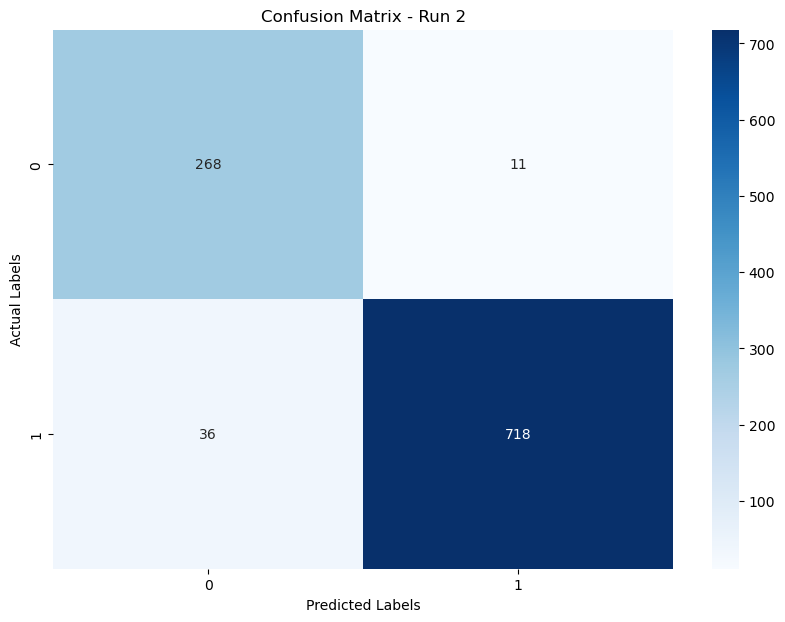

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       279
           1       0.98      0.95      0.97       754

    accuracy                           0.95      1033
   macro avg       0.93      0.96      0.94      1033
weighted avg       0.96      0.95      0.96      1033

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.04765806510164564
At iteration 2, the best solution fitness is 0.039834825750242026
At iteration 3, the best solution fitness is 0.03744932841239104
At iteration 4, the best solution fitness is 0.03633470474346566
At iteration 5, the best solution fitness is 0.03633470474346566
At iteration 6, the best solution fitness is 0.03625657974346566
At iteration 7, the best solution fitness is 0.03625657974346566
At iteration 8, the best solution fitness is 0.03625657974346566
At iteration 9, the best solution fitness is 0.03625657974346566
At iteration 10, the best solution f

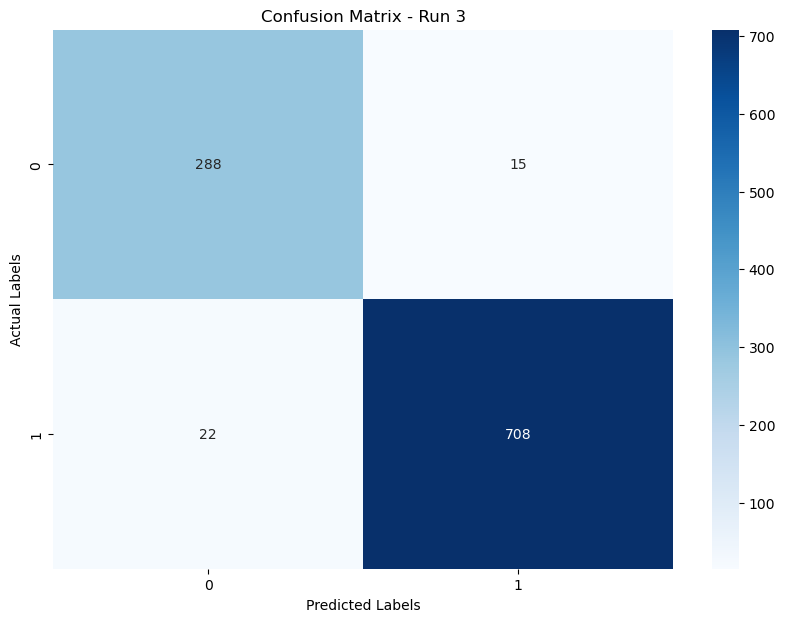

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       303
           1       0.98      0.97      0.97       730

    accuracy                           0.96      1033
   macro avg       0.95      0.96      0.96      1033
weighted avg       0.96      0.96      0.96      1033

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.03614207708131654
At iteration 2, the best solution fitness is 0.031506458736689294
At iteration 3, the best solution fitness is 0.031506458736689294
At iteration 4, the best solution fitness is 0.031506458736689294
At iteration 5, the best solution fitness is 0.03142833373668929
At iteration 6, the best solution fitness is 0.03142833373668929
At iteration 7, the best solution fitness is 0.03142833373668929
At iteration 8, the best solution fitness is 0.03142833373668929
At iteration 9, the best solution fitness is 0.03142833373668929
At iteration 10, the best solution

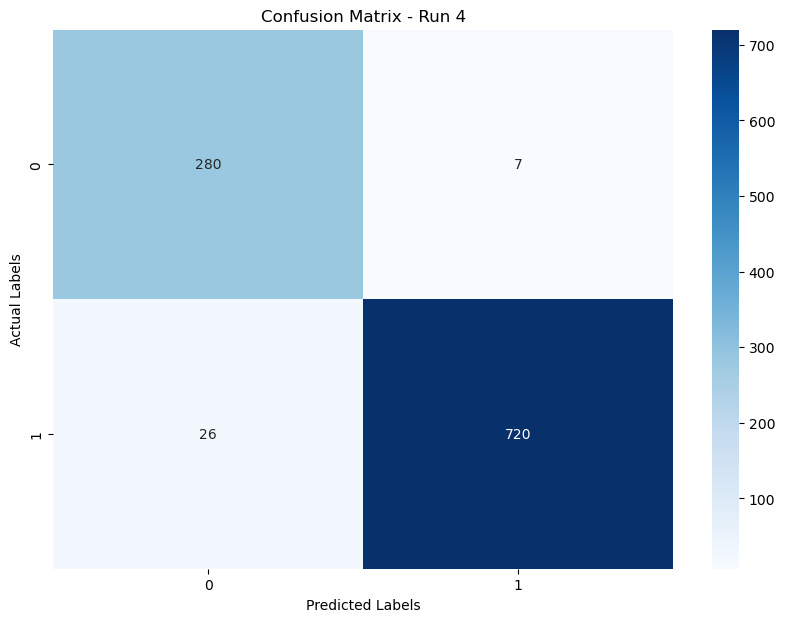

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       287
           1       0.99      0.97      0.98       746

    accuracy                           0.97      1033
   macro avg       0.95      0.97      0.96      1033
weighted avg       0.97      0.97      0.97      1033

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.03637645208131654
At iteration 2, the best solution fitness is 0.03637645208131654
At iteration 3, the best solution fitness is 0.03622020208131654
At iteration 4, the best solution fitness is 0.03606395208131654
At iteration 5, the best solution fitness is 0.03606395208131654
At iteration 6, the best solution fitness is 0.033266956074540166
At iteration 7, the best solution fitness is 0.033266956074540166
At iteration 8, the best solution fitness is 0.033266956074540166
At iteration 9, the best solution fitness is 0.033266956074540166
At iteration 10, the best solutio

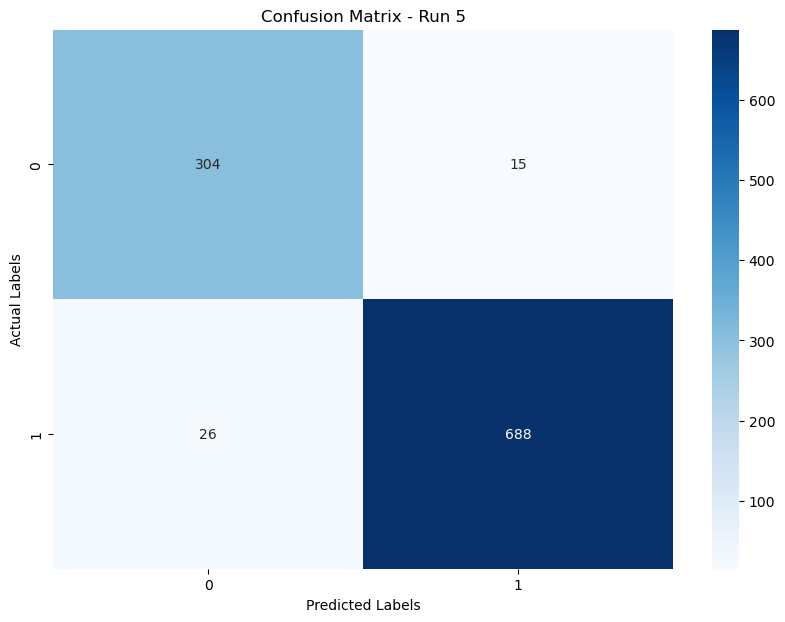

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       319
           1       0.98      0.96      0.97       714

    accuracy                           0.96      1033
   macro avg       0.95      0.96      0.95      1033
weighted avg       0.96      0.96      0.96      1033



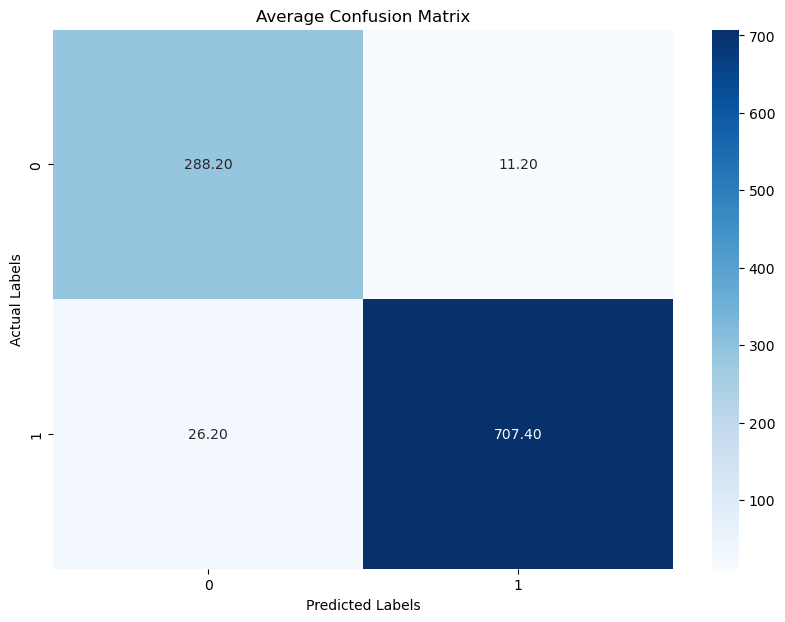


Average Classification Report:
Accuracy: 0.9638
Precision: 0.9504
Recall: 0.9636
F1-Score: 0.9566

Average Number of Features Selected Each Run: 30.40

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9638, STD=0.0060
Precision: AVG=0.9504, STD=0.0094
Recall: AVG=0.9636, STD=0.0066
F1-Score: AVG=0.9566, STD=0.0077


In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=2)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


# AOA Multiclass

In [37]:
data = pd.read_csv('data1(Multi)_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(4966, 128)
(4966,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.02046686368209255
At iteration 2, the best solution fitness is 0.02046686368209255
At iteration 3, the best solution fitness is 0.02046686368209255
At iteration 4, the best solution fitness is 0.02046686368209255
At iteration 5, the best solution fitness is 0.02046686368209255
At iteration 6, the best solution fitness is 0.02046686368209255
At iteration 7, the best solution fitness is 0.02046686368209255
At iteration 8, the best solution fitness is 0.02046686368209255
At iteration 9, the best solution fitness is 0.02046686368209255
At iteration 10, the best solution fitness is 0.02046686368209255
At iteration 11, the best solution fitness is 0.02046686368209255
At iteration 12, the best solution fitness is 0.02046686368209255
At iteration 13, the best solution fitness is 0.018943661971830967
At iteration 14, the best solution fitness is 0.018943661971830967
At iteration 15, the best solution fitness is 0.018943661971830

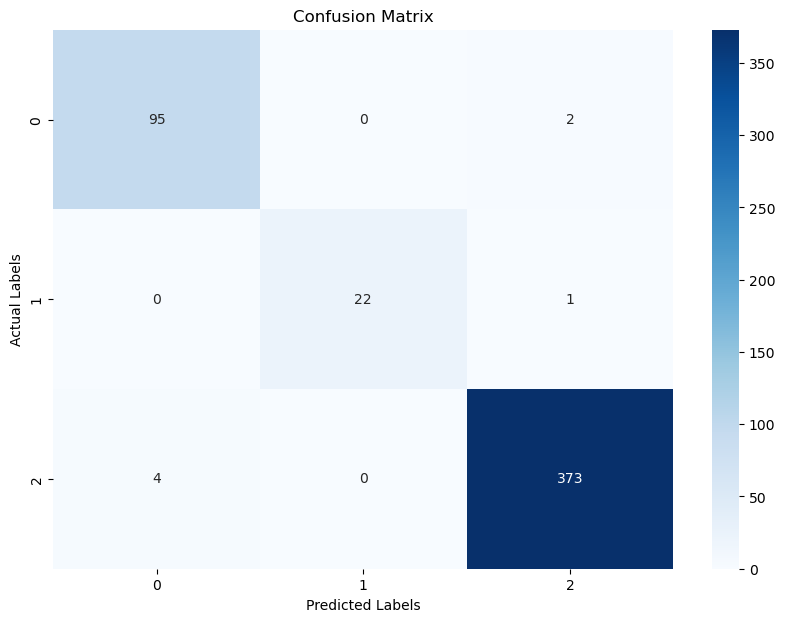

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.02206819039235413
At iteration 2, the best solution fitness is 0.02206819039235413
At iteration 3, the best solution fitness is 0.02206819039235413
At iteration 4, the best solution fitness is 0.02206819039235413
At iteration 5, the best solution fitness is 0.02206819039235413
At iteration 6, the best solution fitness is 0.02206819039235413
At iteration 7, the best solution fitness is 0.02206819039235413
At iteration 8, the best solution fitness is 0.02206819039235413
At iteration 9, the best solution fitness is 0.02206819039235413
At iteration 10, the best solution fitness is 0.02206819039235413
At iteration 11, the best solution fitness is 0.02206819039235413
At iteration 12, the best solution fitness is 0.02206819039235413
At iteration 13, the best solution fitness is 0.02206819039235413
At iteration 14, the best solution fitness is 0.02206819039235413
At iteration 15, the best solution fitness is 0.02206819039235413

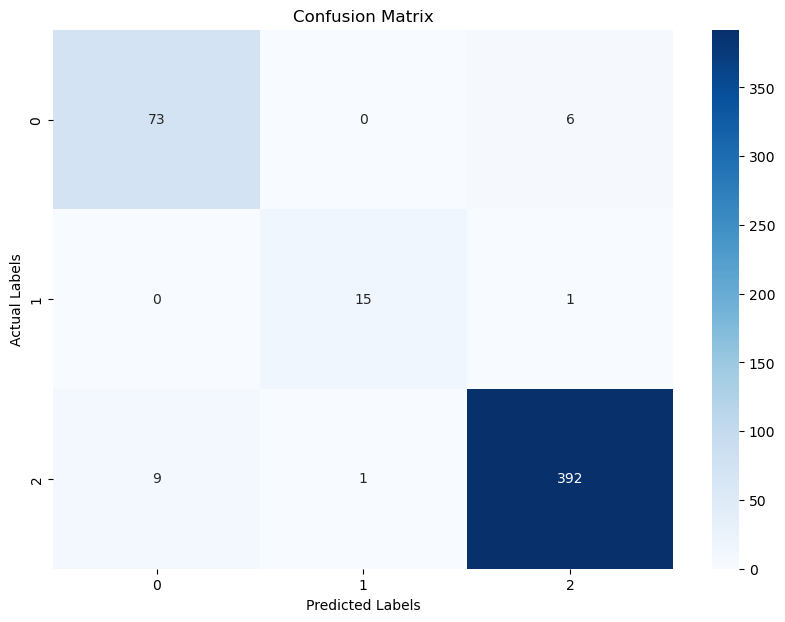

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.02062311368209255
At iteration 2, the best solution fitness is 0.02062311368209255
At iteration 3, the best solution fitness is 0.02062311368209255
At iteration 4, the best solution fitness is 0.02062311368209255
At iteration 5, the best solution fitness is 0.02062311368209255
At iteration 6, the best solution fitness is 0.02062311368209255
At iteration 7, the best solution fitness is 0.02062311368209255
At iteration 8, the best solution fitness is 0.02062311368209255
At iteration 9, the best solution fitness is 0.02062311368209255
At iteration 10, the best solution fitness is 0.02062311368209255
At iteration 11, the best solution fitness is 0.02062311368209255
At iteration 12, the best solution fitness is 0.02062311368209255
At iteration 13, the best solution fitness is 0.02062311368209255
At iteration 14, the best solution fitness is 0.02062311368209255
At iteration 15, the best solution fitness is 0.02062311368209255

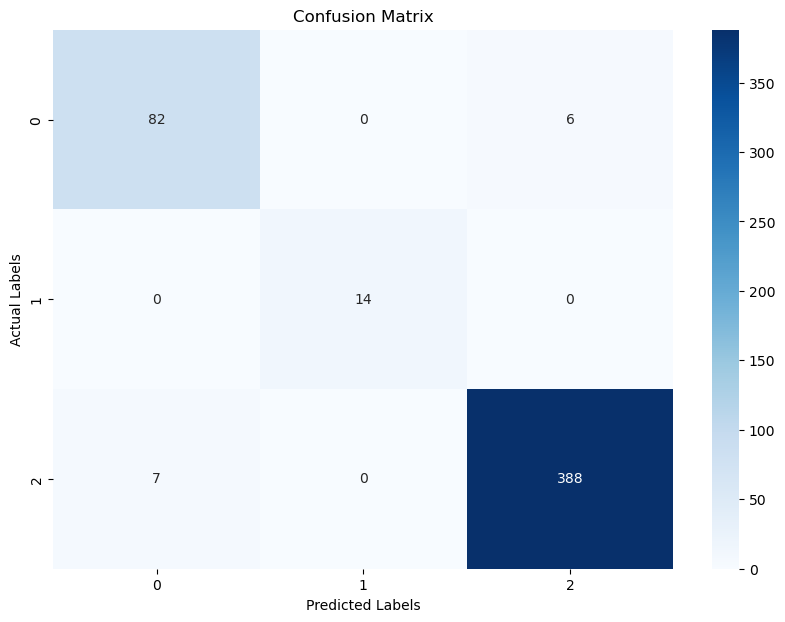

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.02062311368209255
At iteration 2, the best solution fitness is 0.02062311368209255
At iteration 3, the best solution fitness is 0.02062311368209255
At iteration 4, the best solution fitness is 0.02062311368209255
At iteration 5, the best solution fitness is 0.02015436368209255
At iteration 6, the best solution fitness is 0.02015436368209255
At iteration 7, the best solution fitness is 0.01902178697183097
At iteration 8, the best solution fitness is 0.01902178697183097
At iteration 9, the best solution fitness is 0.01902178697183097
At iteration 10, the best solution fitness is 0.01902178697183097
At iteration 11, the best solution fitness is 0.01902178697183097
At iteration 12, the best solution fitness is 0.01902178697183097
At iteration 13, the best solution fitness is 0.01902178697183097
At iteration 14, the best solution fitness is 0.01902178697183097
At iteration 15, the best solution fitness is 0.01902178697183097

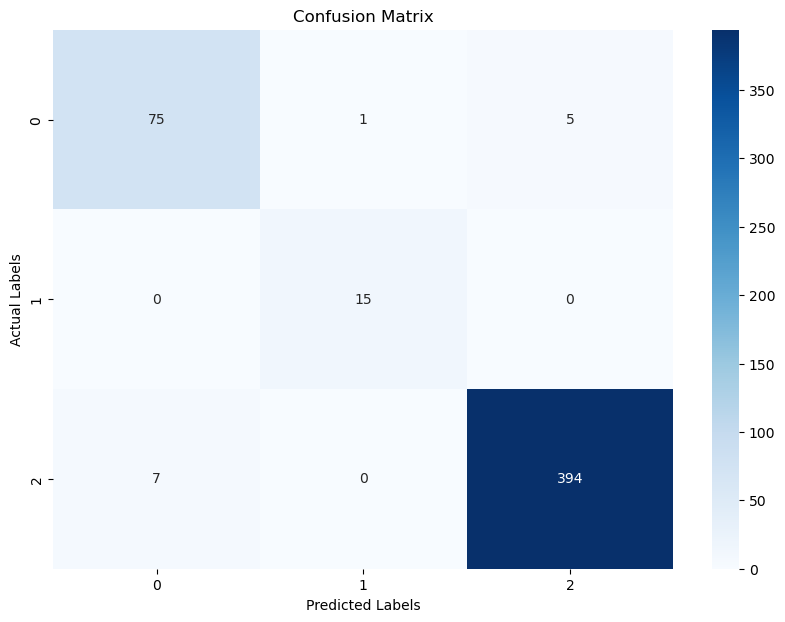

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.018084286971830968
At iteration 2, the best solution fitness is 0.018084286971830968
At iteration 3, the best solution fitness is 0.018084286971830968
At iteration 4, the best solution fitness is 0.018084286971830968
At iteration 5, the best solution fitness is 0.018084286971830968
At iteration 6, the best solution fitness is 0.018084286971830968
At iteration 7, the best solution fitness is 0.018084286971830968
At iteration 8, the best solution fitness is 0.018084286971830968
At iteration 9, the best solution fitness is 0.018084286971830968
At iteration 10, the best solution fitness is 0.018084286971830968
At iteration 11, the best solution fitness is 0.018084286971830968
At iteration 12, the best solution fitness is 0.018084286971830968
At iteration 13, the best solution fitness is 0.018084286971830968
At iteration 14, the best solution fitness is 0.018084286971830968
At iteration 15, the best solution fitness is 0.018

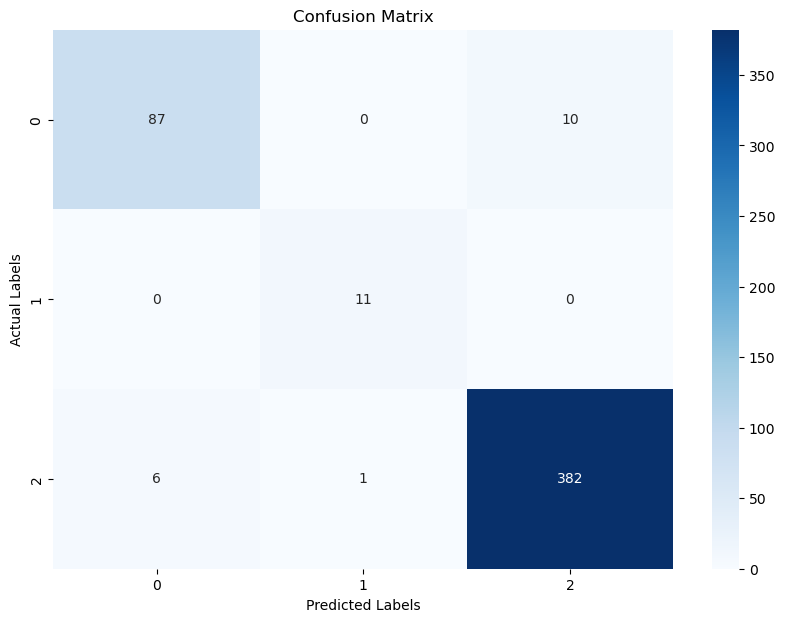


Average Number of Features Selected Each Run: 59.00

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9730, STD=0.0074
Precision: AVG=0.9556, STD=0.0178
Recall: AVG=0.9642, STD=0.0106
F1-Score: AVG=0.9596, STD=0.0137


In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 30
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.015467335261569385
At iteration 2, the best solution fitness is 0.015154835261569386
At iteration 3, the best solution fitness is 0.015076710261569384
At iteration 4, the best solution fitness is 0.014920460261569384
At iteration 5, the best solution fitness is 0.014920460261569384
At iteration 6, the best solution fitness is 0.014920460261569384
At iteration 7, the best solution fitness is 0.014920460261569384
At iteration 8, the best solution fitness is 0.014920460261569384
At iteration 9, the best solution fitness is 0.014920460261569384
At iteration 10, the best solution fitness is 0.014920460261569384
At iteration 11, the best solution fitness is 0.014842335261569386
At iteration 12, the best solution fitness is 0.014842335261569386
At iteration 13, the best solution fitness is 0.014842335261569386
At iteration 14, the best solution fitness is 0.014842335261569386
At iteration 15, the best solution fitness is 0.014

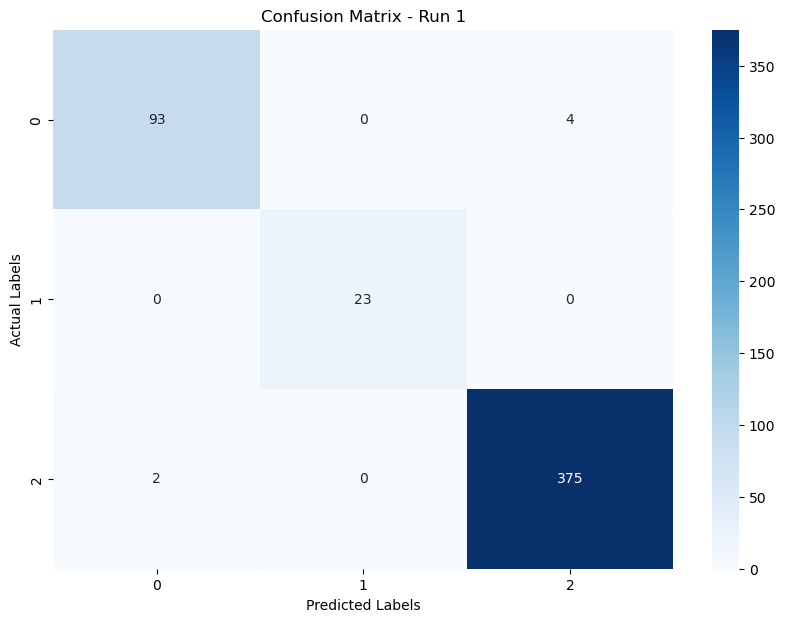

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        97
           1       1.00      1.00      1.00        23
           2       0.99      0.99      0.99       377

    accuracy                           0.99       497
   macro avg       0.99      0.98      0.99       497
weighted avg       0.99      0.99      0.99       497

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.009842806841046329
At iteration 2, the best solution fitness is 0.009764681841046329
At iteration 3, the best solution fitness is 0.009608431841046329
At iteration 4, the best solution fitness is 0.009530306841046329
At iteration 5, the best solution fitness is 0.009452181841046329
At iteration 6, the best solution fitness is 0.0073039801307847475
At iteration 7, the best solution fitness is 0.0073039801307847475
At iteration 8, the best solution fitness is 0.0073039801307847475
At iteration 9, the best solution fit

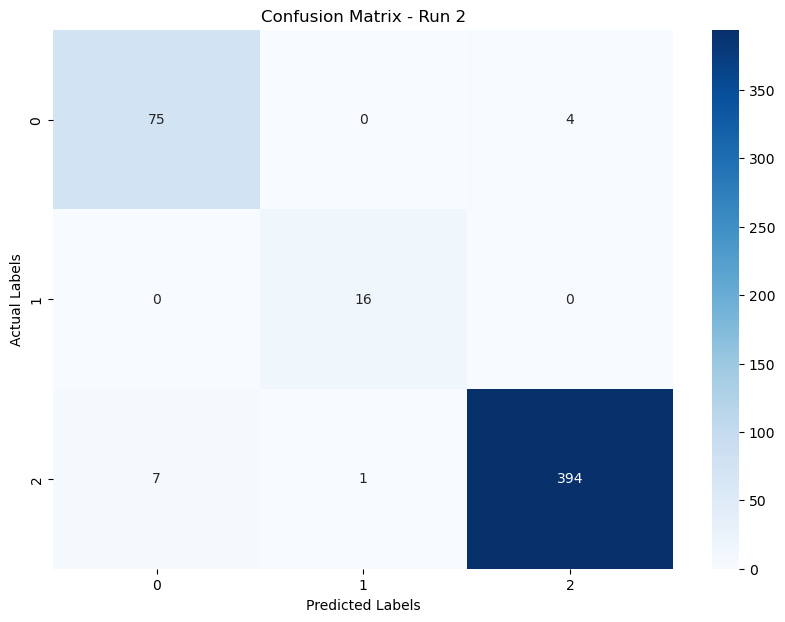

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        79
           1       0.94      1.00      0.97        16
           2       0.99      0.98      0.98       402

    accuracy                           0.98       497
   macro avg       0.95      0.98      0.96       497
weighted avg       0.98      0.98      0.98       497

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.01800616197183097
At iteration 2, the best solution fitness is 0.013553508551307802
At iteration 3, the best solution fitness is 0.011483431841046329
At iteration 4, the best solution fitness is 0.011249056841046328
At iteration 5, the best solution fitness is 0.011249056841046328
At iteration 6, the best solution fitness is 0.01109280684104633
At iteration 7, the best solution fitness is 0.01109280684104633
At iteration 8, the best solution fitness is 0.011014681841046328
At iteration 9, the best solution fitness i

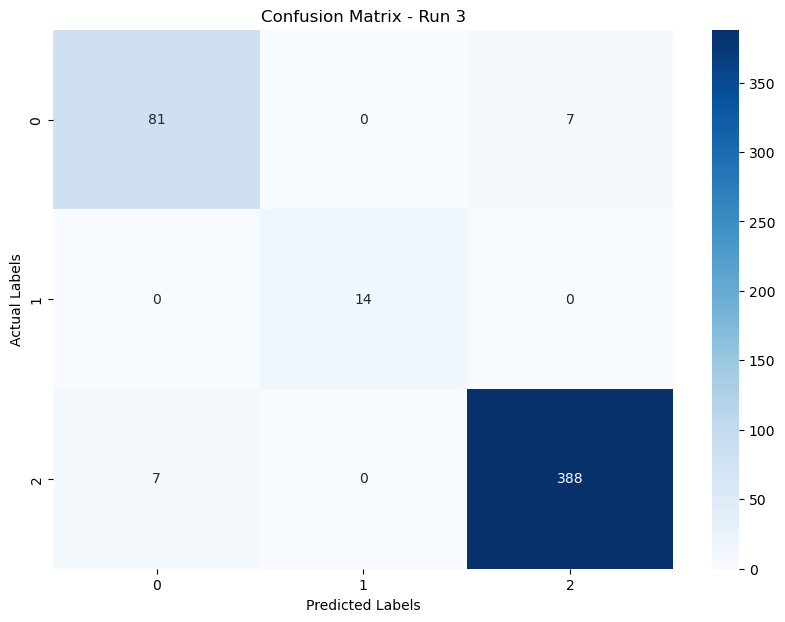

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        88
           1       1.00      1.00      1.00        14
           2       0.98      0.98      0.98       395

    accuracy                           0.97       497
   macro avg       0.97      0.97      0.97       497
weighted avg       0.97      0.97      0.97       497

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.01093655684104633
At iteration 2, the best solution fitness is 0.01031155684104633
At iteration 3, the best solution fitness is 0.009920931841046329
At iteration 4, the best solution fitness is 0.009920931841046329
At iteration 5, the best solution fitness is 0.009842806841046329
At iteration 6, the best solution fitness is 0.009764681841046329
At iteration 7, the best solution fitness is 0.009764681841046329
At iteration 8, the best solution fitness is 0.009764681841046329
At iteration 9, the best solution fitness 

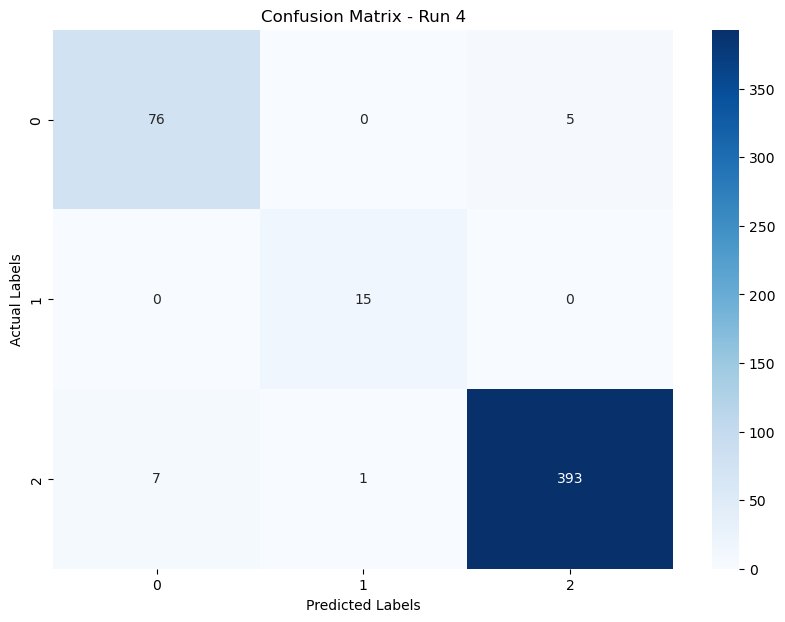

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        81
           1       0.94      1.00      0.97        15
           2       0.99      0.98      0.98       401

    accuracy                           0.97       497
   macro avg       0.95      0.97      0.96       497
weighted avg       0.97      0.97      0.97       497

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.01800616197183097
At iteration 2, the best solution fitness is 0.016014210261569385
At iteration 3, the best solution fitness is 0.009491480130784748
At iteration 4, the best solution fitness is 0.009257105130784747
At iteration 5, the best solution fitness is 0.009022730130784747
At iteration 6, the best solution fitness is 0.008866480130784747
At iteration 7, the best solution fitness is 0.008788355130784747
At iteration 8, the best solution fitness is 0.008788355130784747
At iteration 9, the best solution fitness

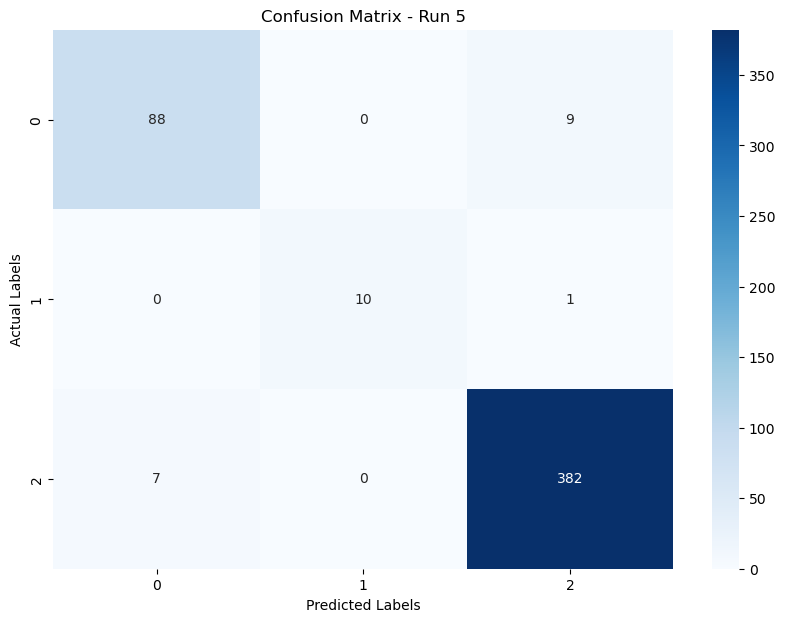

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        97
           1       1.00      0.91      0.95        11
           2       0.97      0.98      0.98       389

    accuracy                           0.97       497
   macro avg       0.97      0.93      0.95       497
weighted avg       0.97      0.97      0.97       497



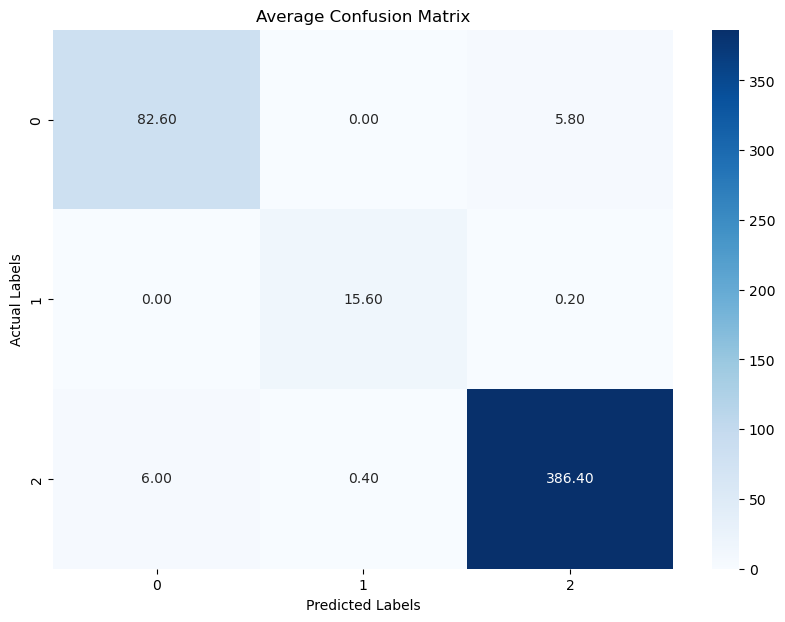


Average Classification Report:
Accuracy: 0.9751
Precision: 0.9639
Recall: 0.9668
F1-Score: 0.9650

Average Number of Features Selected Each Run: 28.60

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9751, STD=0.0073
Precision: AVG=0.9639, STD=0.0155
Recall: AVG=0.9668, STD=0.0179
F1-Score: AVG=0.9650, STD=0.0125


In [38]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")

In [35]:
data = pd.read_csv('data2(Multi)_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5069, 128)
(5069,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.040147928994082795
At iteration 2, the best solution fitness is 0.040147928994082795
At iteration 3, the best solution fitness is 0.040147928994082795
At iteration 4, the best solution fitness is 0.040147928994082795
At iteration 5, the best solution fitness is 0.0377265162721893
At iteration 6, the best solution fitness is 0.0377265162721893
At iteration 7, the best solution fitness is 0.033743065828402405
At iteration 8, the best solution fitness is 0.033743065828402405
At iteration 9, the best solution fitness is 0.033743065828402405
At iteration 10, the best solution fitness is 0.033743065828402405
At iteration 11, the best solution fitness is 0.033743065828402405
At iteration 12, the best solution fitness is 0.033743065828402405
At iteration 13, the best solution fitness is 0.033743065828402405
At iteration 14, the best solution fitness is 0.033743065828402405
At iteration 15, the best solution fitness is 0.0337430

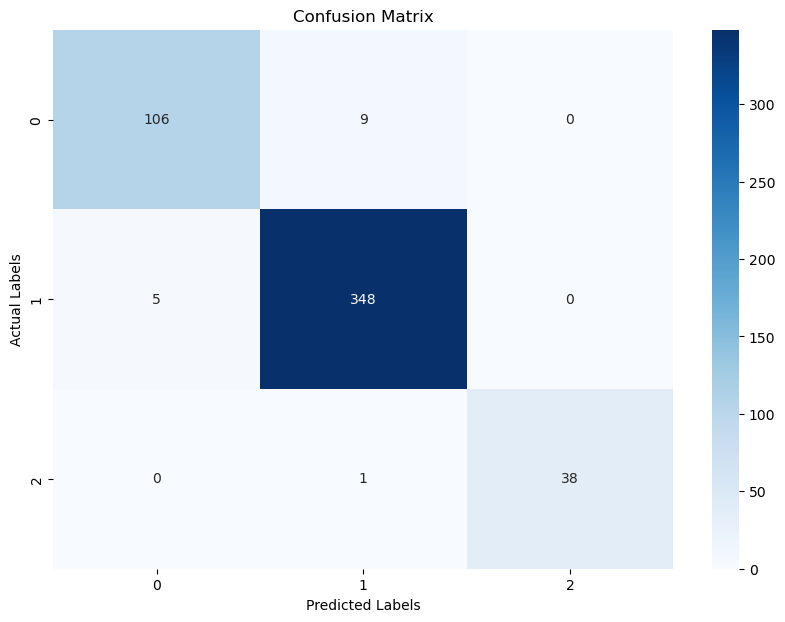

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.03530510355029591
At iteration 2, the best solution fitness is 0.03530510355029591
At iteration 3, the best solution fitness is 0.03530510355029591
At iteration 4, the best solution fitness is 0.034368065828402405
At iteration 5, the best solution fitness is 0.034368065828402405
At iteration 6, the best solution fitness is 0.030306490384615404
At iteration 7, the best solution fitness is 0.030306490384615404
At iteration 8, the best solution fitness is 0.030306490384615404
At iteration 9, the best solution fitness is 0.030306490384615404
At iteration 10, the best solution fitness is 0.030306490384615404
At iteration 11, the best solution fitness is 0.030306490384615404
At iteration 12, the best solution fitness is 0.030306490384615404
At iteration 13, the best solution fitness is 0.030306490384615404
At iteration 14, the best solution fitness is 0.030306490384615404
At iteration 15, the best solution fitness is 0.030306

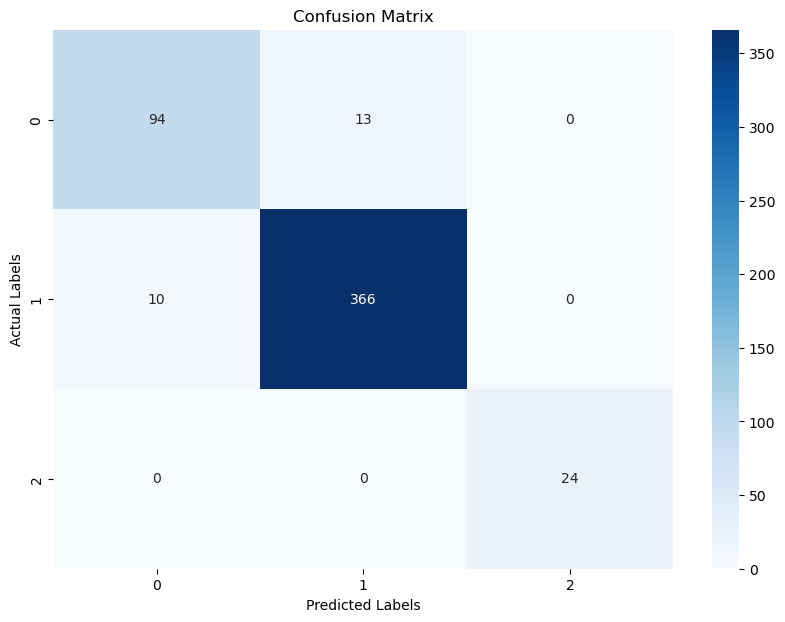

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.0403823039940828
At iteration 2, the best solution fitness is 0.0383515162721893
At iteration 3, the best solution fitness is 0.03577385355029591
At iteration 4, the best solution fitness is 0.03577385355029591
At iteration 5, the best solution fitness is 0.03577385355029591
At iteration 6, the best solution fitness is 0.03577385355029591
At iteration 7, the best solution fitness is 0.03577385355029591
At iteration 8, the best solution fitness is 0.03577385355029591
At iteration 9, the best solution fitness is 0.03577385355029591
At iteration 10, the best solution fitness is 0.03577385355029591
At iteration 11, the best solution fitness is 0.03577385355029591
At iteration 12, the best solution fitness is 0.03577385355029591
At iteration 13, the best solution fitness is 0.03577385355029591
At iteration 14, the best solution fitness is 0.03577385355029591
At iteration 15, the best solution fitness is 0.03577385355029591
A

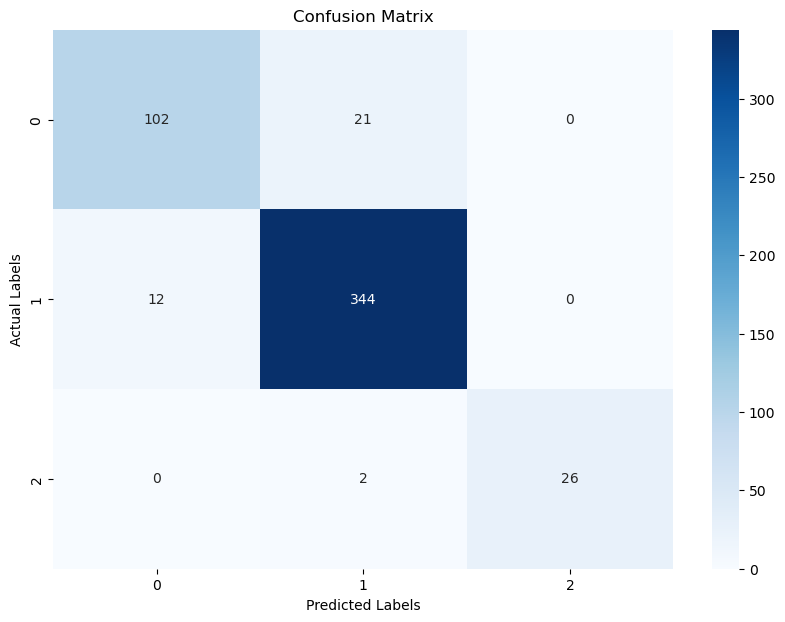

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.0382733912721893
At iteration 2, the best solution fitness is 0.0382733912721893
At iteration 3, the best solution fitness is 0.037570266272189304
At iteration 4, the best solution fitness is 0.037570266272189304
At iteration 5, the best solution fitness is 0.037570266272189304
At iteration 6, the best solution fitness is 0.031634153106508904
At iteration 7, the best solution fitness is 0.031634153106508904
At iteration 8, the best solution fitness is 0.031634153106508904
At iteration 9, the best solution fitness is 0.031634153106508904
At iteration 10, the best solution fitness is 0.031634153106508904
At iteration 11, the best solution fitness is 0.031634153106508904
At iteration 12, the best solution fitness is 0.031634153106508904
At iteration 13, the best solution fitness is 0.031634153106508904
At iteration 14, the best solution fitness is 0.031634153106508904
At iteration 15, the best solution fitness is 0.0316341

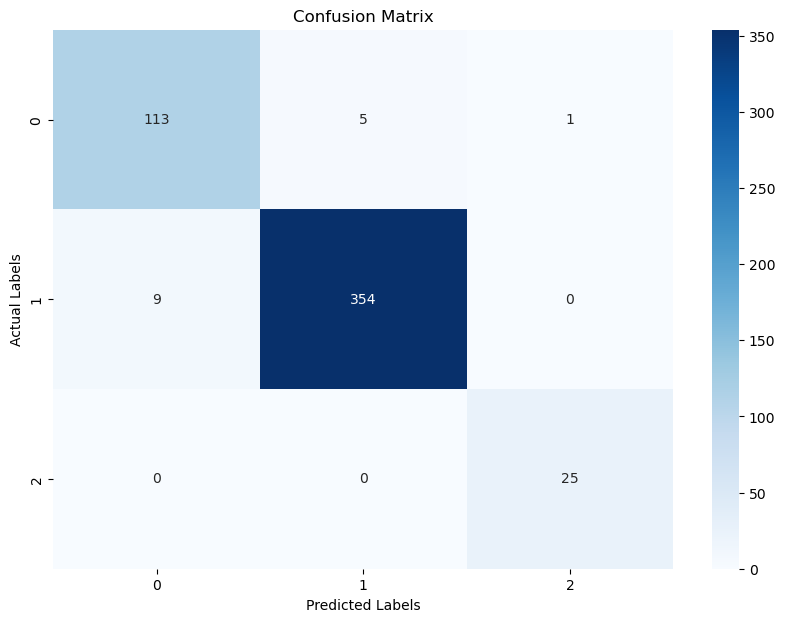

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.0320247781065089
At iteration 2, the best solution fitness is 0.0320247781065089
At iteration 3, the best solution fitness is 0.0320247781065089
At iteration 4, the best solution fitness is 0.0320247781065089
At iteration 5, the best solution fitness is 0.0320247781065089
At iteration 6, the best solution fitness is 0.0320247781065089
At iteration 7, the best solution fitness is 0.0320247781065089
At iteration 8, the best solution fitness is 0.0320247781065089
At iteration 9, the best solution fitness is 0.0320247781065089
At iteration 10, the best solution fitness is 0.0320247781065089
At iteration 11, the best solution fitness is 0.0320247781065089
At iteration 12, the best solution fitness is 0.0320247781065089
At iteration 13, the best solution fitness is 0.0320247781065089
At iteration 14, the best solution fitness is 0.0320247781065089
At iteration 15, the best solution fitness is 0.0320247781065089
At iteration 1

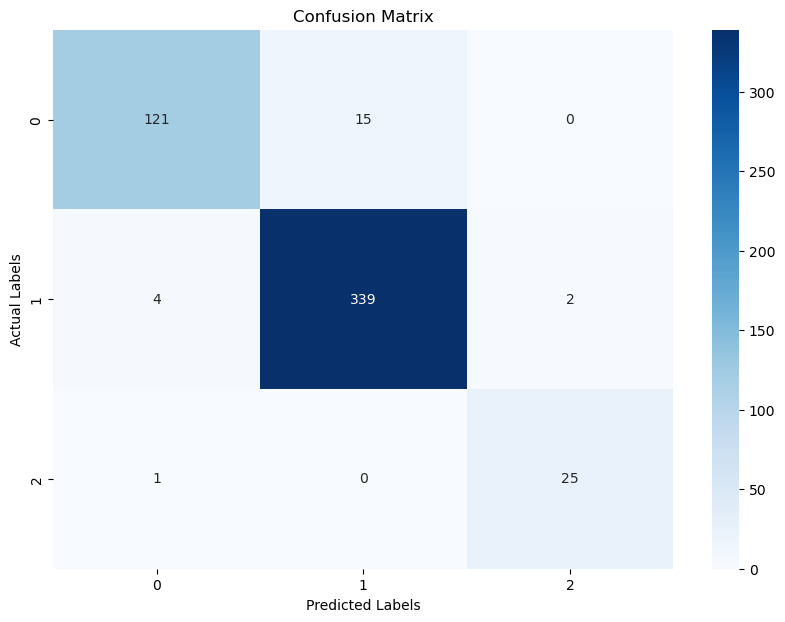


Average Number of Features Selected Each Run: 58.60

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9566, STD=0.0144
Precision: AVG=0.9564, STD=0.0109
Recall: AVG=0.9478, STD=0.0224
F1-Score: AVG=0.9517, STD=0.0156


In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 30
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.022026627218934898
At iteration 2, the best solution fitness is 0.0180431767751479
At iteration 3, the best solution fitness is 0.017965051775147897
At iteration 4, the best solution fitness is 0.015778014053254397
At iteration 5, the best solution fitness is 0.015778014053254397
At iteration 6, the best solution fitness is 0.015778014053254397
At iteration 7, the best solution fitness is 0.015778014053254397
At iteration 8, the best solution fitness is 0.015778014053254397
At iteration 9, the best solution fitness is 0.015778014053254397
At iteration 10, the best solution fitness is 0.015699889053254396
At iteration 11, the best solution fitness is 0.015699889053254396
At iteration 12, the best solution fitness is 0.015699889053254396
At iteration 13, the best solution fitness is 0.015699889053254396
At iteration 14, the best solution fitness is 0.015699889053254396
At iteration 15, the best solution fitness is 0.01569

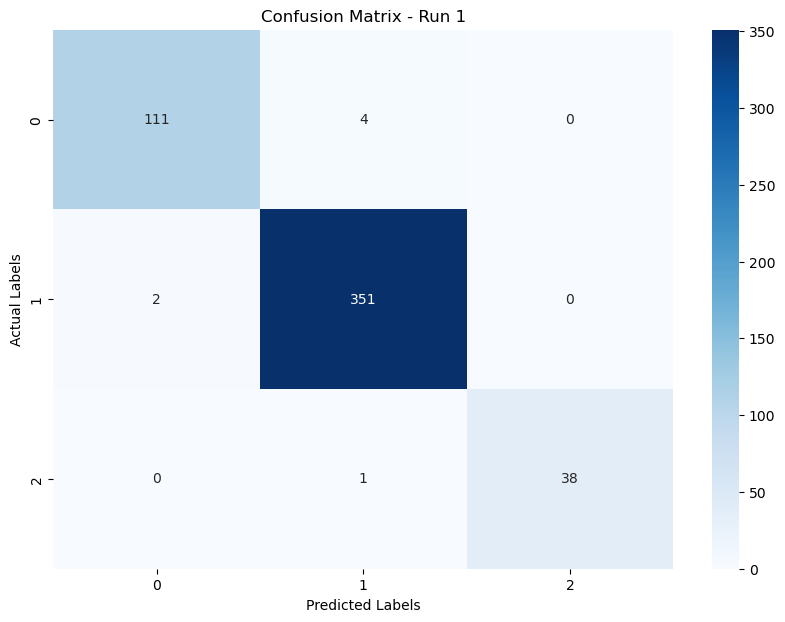

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       115
           1       0.99      0.99      0.99       353
           2       1.00      0.97      0.99        39

    accuracy                           0.99       507
   macro avg       0.99      0.98      0.98       507
weighted avg       0.99      0.99      0.99       507

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.0226516272189349
At iteration 2, the best solution fitness is 0.018590051775147897
At iteration 3, the best solution fitness is 0.016403014053254398
At iteration 4, the best solution fitness is 0.015934264053254397
At iteration 5, the best solution fitness is 0.015934264053254397
At iteration 6, the best solution fitness is 0.015778014053254397
At iteration 7, the best solution fitness is 0.015778014053254397
At iteration 8, the best solution fitness is 0.015621764053254397
At iteration 9, the best solution fitness 

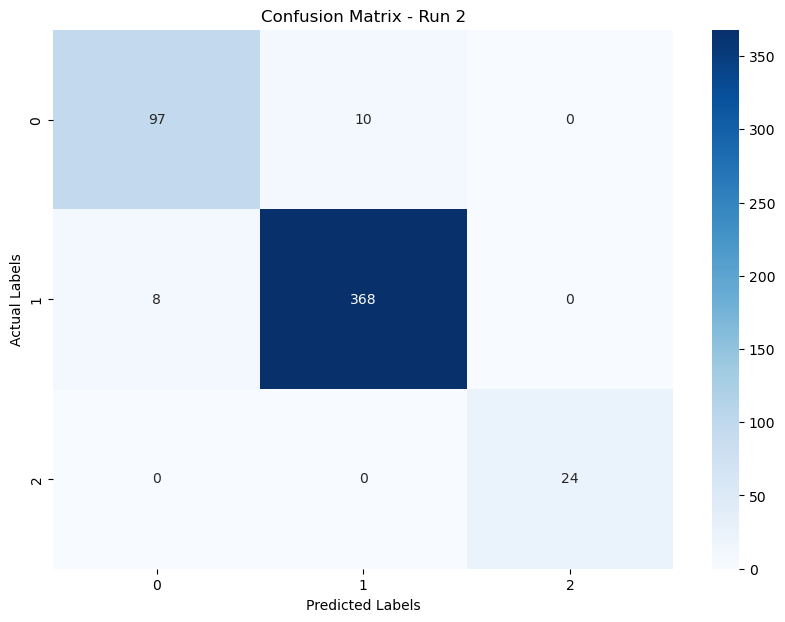

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       107
           1       0.97      0.98      0.98       376
           2       1.00      1.00      1.00        24

    accuracy                           0.96       507
   macro avg       0.97      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.0221047522189349
At iteration 2, the best solution fitness is 0.0180431767751479
At iteration 3, the best solution fitness is 0.017730676775147898
At iteration 4, the best solution fitness is 0.0176525517751479
At iteration 5, the best solution fitness is 0.017496301775147896
At iteration 6, the best solution fitness is 0.017496301775147896
At iteration 7, the best solution fitness is 0.017418176775147898
At iteration 8, the best solution fitness is 0.017418176775147898
At iteration 9, the best solution fitness is 0

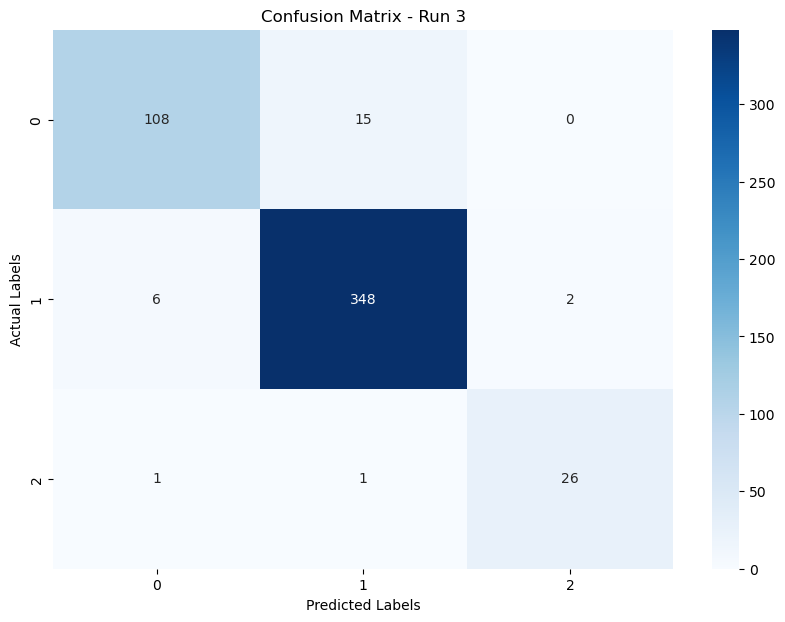

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       123
           1       0.96      0.98      0.97       356
           2       0.93      0.93      0.93        28

    accuracy                           0.95       507
   macro avg       0.94      0.93      0.93       507
weighted avg       0.95      0.95      0.95       507

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.025385539940828403
At iteration 2, the best solution fitness is 0.0227297522189349
At iteration 3, the best solution fitness is 0.0206208394970414
At iteration 4, the best solution fitness is 0.020542714497041398
At iteration 5, the best solution fitness is 0.0204645894970414
At iteration 6, the best solution fitness is 0.0204645894970414
At iteration 7, the best solution fitness is 0.0204645894970414
At iteration 8, the best solution fitness is 0.0204645894970414
At iteration 9, the best solution fitness is 0.02038

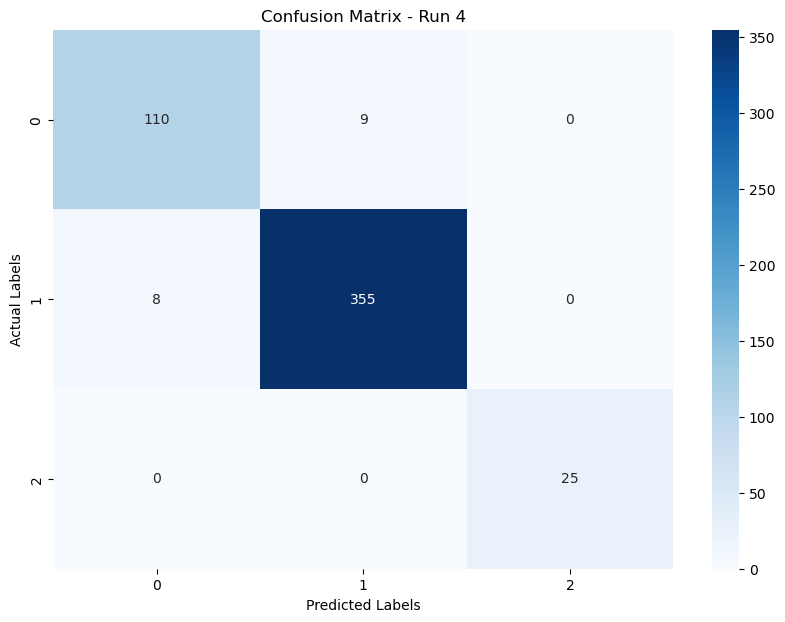

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       119
           1       0.98      0.98      0.98       363
           2       1.00      1.00      1.00        25

    accuracy                           0.97       507
   macro avg       0.97      0.97      0.97       507
weighted avg       0.97      0.97      0.97       507

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.027338202662721904
At iteration 2, the best solution fitness is 0.023979752218934898
At iteration 3, the best solution fitness is 0.0232766272189349
At iteration 4, the best solution fitness is 0.0212458394970414
At iteration 5, the best solution fitness is 0.0210895894970414
At iteration 6, the best solution fitness is 0.0209333394970414
At iteration 7, the best solution fitness is 0.020855214497041398
At iteration 8, the best solution fitness is 0.020698964497041398
At iteration 9, the best solution fitness is 0.0

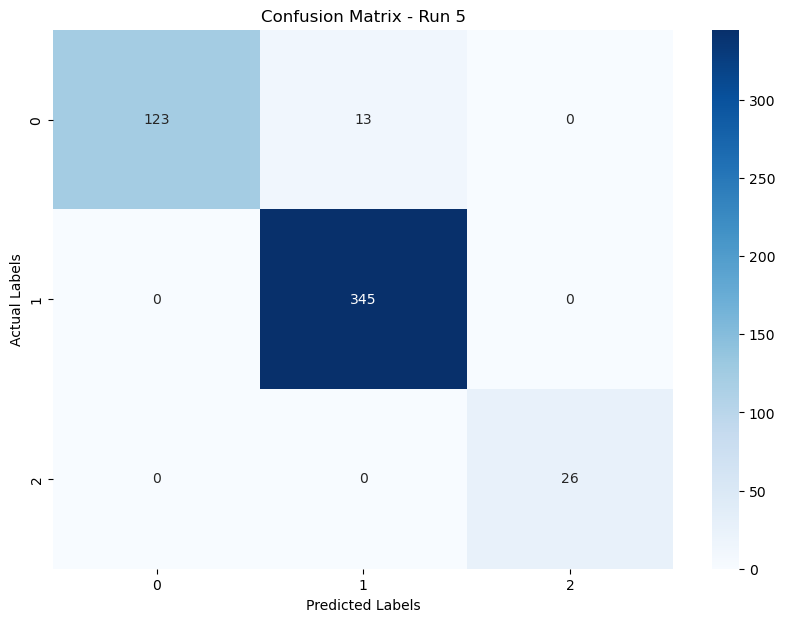

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       136
           1       0.96      1.00      0.98       345
           2       1.00      1.00      1.00        26

    accuracy                           0.97       507
   macro avg       0.99      0.97      0.98       507
weighted avg       0.98      0.97      0.97       507



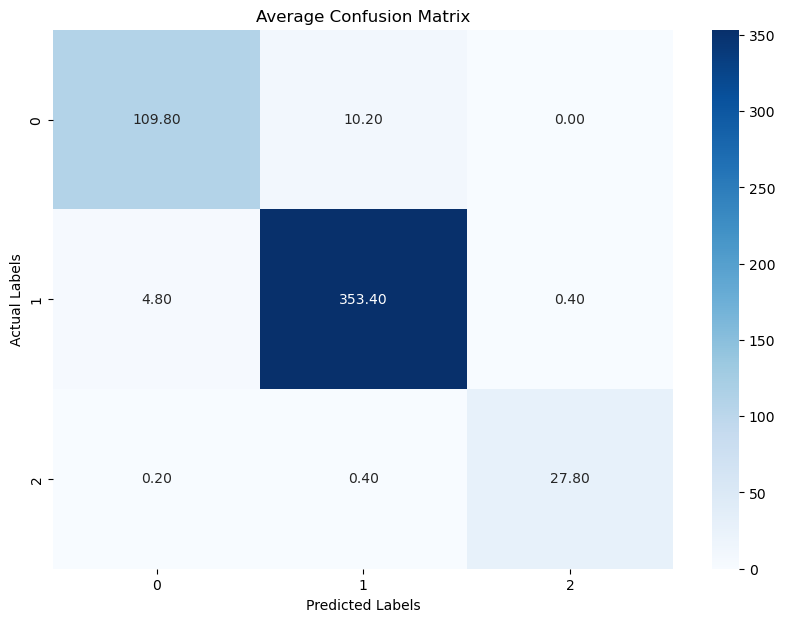


Average Classification Report:
Accuracy: 0.9684
Precision: 0.9707
Recall: 0.9607
F1-Score: 0.9654

Average Number of Features Selected Each Run: 28.40

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9684, STD=0.0117
Precision: AVG=0.9707, STD=0.0175
Recall: AVG=0.9607, STD=0.0171
F1-Score: AVG=0.9654, STD=0.0170


In [36]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [33]:
data = pd.read_csv('data3(Multi)_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5202, 128)
(5202,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.042847588771593045
At iteration 2, the best solution fitness is 0.042847588771593045
At iteration 3, the best solution fitness is 0.042847588771593045
At iteration 4, the best solution fitness is 0.037225137955854144
At iteration 5, the best solution fitness is 0.037225137955854144
At iteration 6, the best solution fitness is 0.037225137955854144
At iteration 7, the best solution fitness is 0.037225137955854144
At iteration 8, the best solution fitness is 0.037225137955854144
At iteration 9, the best solution fitness is 0.037225137955854144
At iteration 10, the best solution fitness is 0.037225137955854144
At iteration 11, the best solution fitness is 0.037225137955854144
At iteration 12, the best solution fitness is 0.037225137955854144
At iteration 13, the best solution fitness is 0.037225137955854144
At iteration 14, the best solution fitness is 0.037225137955854144
At iteration 15, the best solution fitness is 0.037

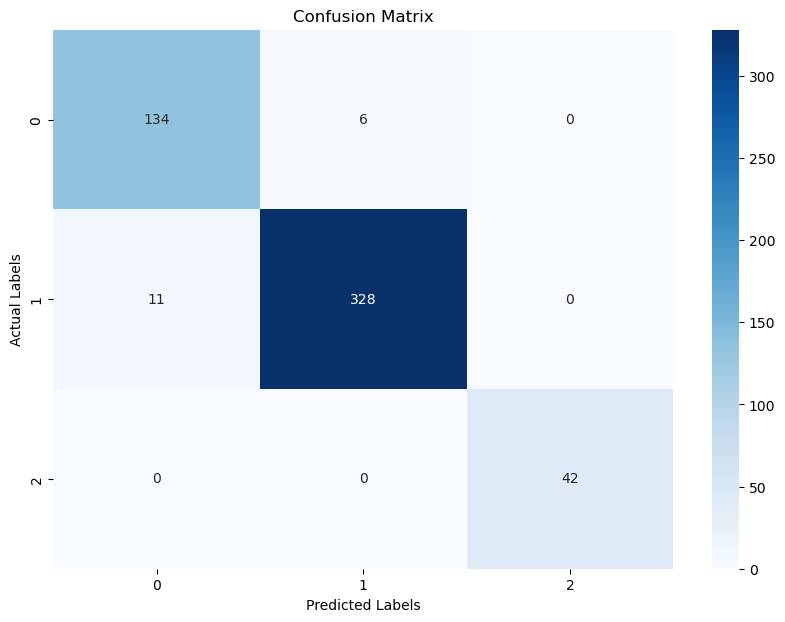

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.041338021833013446
At iteration 2, the best solution fitness is 0.037147012955854146
At iteration 3, the best solution fitness is 0.037147012955854146
At iteration 4, the best solution fitness is 0.035012446017274435
At iteration 5, the best solution fitness is 0.035012446017274435
At iteration 6, the best solution fitness is 0.035012446017274435
At iteration 7, the best solution fitness is 0.035012446017274435
At iteration 8, the best solution fitness is 0.035012446017274435
At iteration 9, the best solution fitness is 0.035012446017274435
At iteration 10, the best solution fitness is 0.035012446017274435
At iteration 11, the best solution fitness is 0.035012446017274435
At iteration 12, the best solution fitness is 0.035012446017274435
At iteration 13, the best solution fitness is 0.035012446017274435
At iteration 14, the best solution fitness is 0.035012446017274435
At iteration 15, the best solution fitness is 0.035

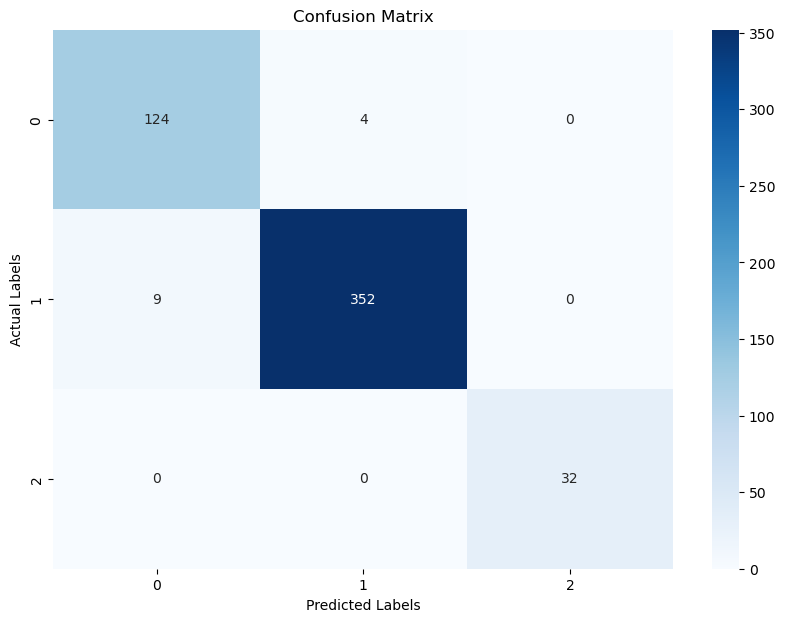

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.04245696377159305
At iteration 2, the best solution fitness is 0.036912637955854144
At iteration 3, the best solution fitness is 0.036834512955854146
At iteration 4, the best solution fitness is 0.03644388795585415
At iteration 5, the best solution fitness is 0.03644388795585415
At iteration 6, the best solution fitness is 0.03644388795585415
At iteration 7, the best solution fitness is 0.03644388795585415
At iteration 8, the best solution fitness is 0.03644388795585415
At iteration 9, the best solution fitness is 0.03644388795585415
At iteration 10, the best solution fitness is 0.03644388795585415
At iteration 11, the best solution fitness is 0.03644388795585415
At iteration 12, the best solution fitness is 0.03644388795585415
At iteration 13, the best solution fitness is 0.03644388795585415
At iteration 14, the best solution fitness is 0.03644388795585415
At iteration 15, the best solution fitness is 0.036443887955854

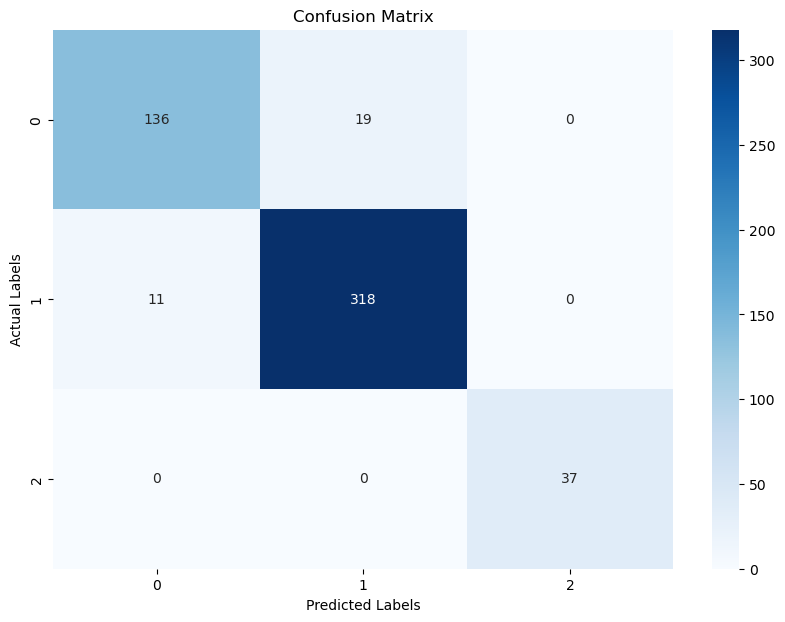

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.042925713771593044
At iteration 2, the best solution fitness is 0.042925713771593044
At iteration 3, the best solution fitness is 0.04047864683301344
At iteration 4, the best solution fitness is 0.04047864683301344
At iteration 5, the best solution fitness is 0.038734704894433744
At iteration 6, the best solution fitness is 0.038734704894433744
At iteration 7, the best solution fitness is 0.038734704894433744
At iteration 8, the best solution fitness is 0.038734704894433744
At iteration 9, the best solution fitness is 0.038734704894433744
At iteration 10, the best solution fitness is 0.038734704894433744
At iteration 11, the best solution fitness is 0.038734704894433744
At iteration 12, the best solution fitness is 0.038734704894433744
At iteration 13, the best solution fitness is 0.038734704894433744
At iteration 14, the best solution fitness is 0.038734704894433744
At iteration 15, the best solution fitness is 0.03873

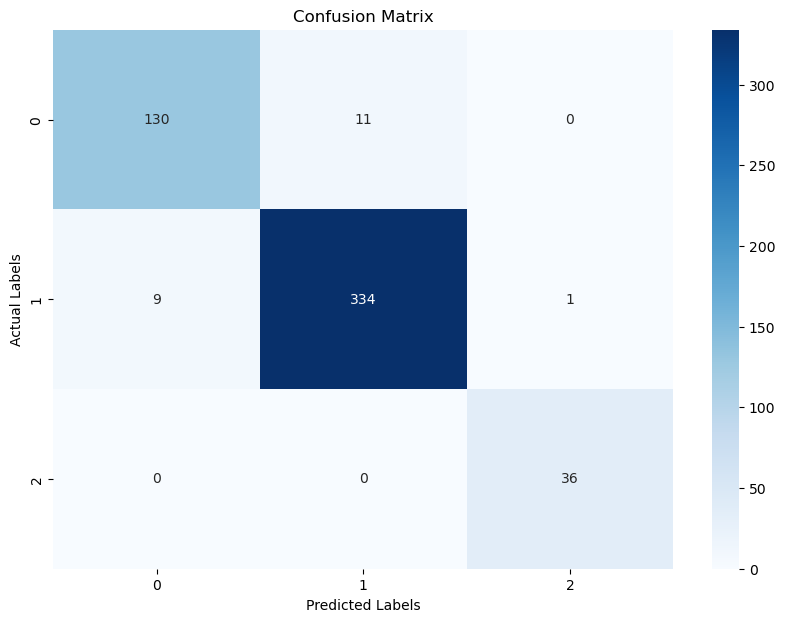

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.03889095489443374
At iteration 2, the best solution fitness is 0.03889095489443374
At iteration 3, the best solution fitness is 0.03889095489443374
At iteration 4, the best solution fitness is 0.03889095489443374
At iteration 5, the best solution fitness is 0.03889095489443374
At iteration 6, the best solution fitness is 0.03889095489443374
At iteration 7, the best solution fitness is 0.03889095489443374
At iteration 8, the best solution fitness is 0.038109704894433744
At iteration 9, the best solution fitness is 0.038109704894433744
At iteration 10, the best solution fitness is 0.038109704894433744
At iteration 11, the best solution fitness is 0.038109704894433744
At iteration 12, the best solution fitness is 0.038109704894433744
At iteration 13, the best solution fitness is 0.038109704894433744
At iteration 14, the best solution fitness is 0.038109704894433744
At iteration 15, the best solution fitness is 0.0381097048

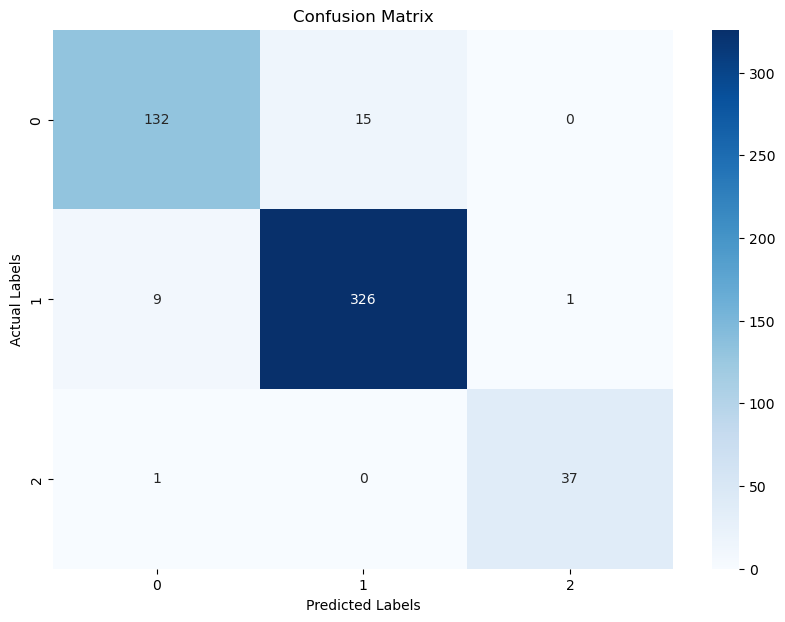


Average Number of Features Selected Each Run: 56.60

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9589, STD=0.0117
Precision: AVG=0.9621, STD=0.0078
Recall: AVG=0.9632, STD=0.0138
F1-Score: AVG=0.9625, STD=0.0107


In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 30
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.03303412907869484
At iteration 2, the best solution fitness is 0.029077495201535537
At iteration 3, the best solution fitness is 0.02535523632437623
At iteration 4, the best solution fitness is 0.025120861324376232
At iteration 5, the best solution fitness is 0.024964611324376232
At iteration 6, the best solution fitness is 0.024886486324376234
At iteration 7, the best solution fitness is 0.024886486324376234
At iteration 8, the best solution fitness is 0.024886486324376234
At iteration 9, the best solution fitness is 0.02480836132437623
At iteration 10, the best solution fitness is 0.02480836132437623
At iteration 11, the best solution fitness is 0.02480836132437623
At iteration 12, the best solution fitness is 0.02480836132437623
At iteration 13, the best solution fitness is 0.02480836132437623
At iteration 14, the best solution fitness is 0.02473023632437623
At iteration 15, the best solution fitness is 0.02465211132

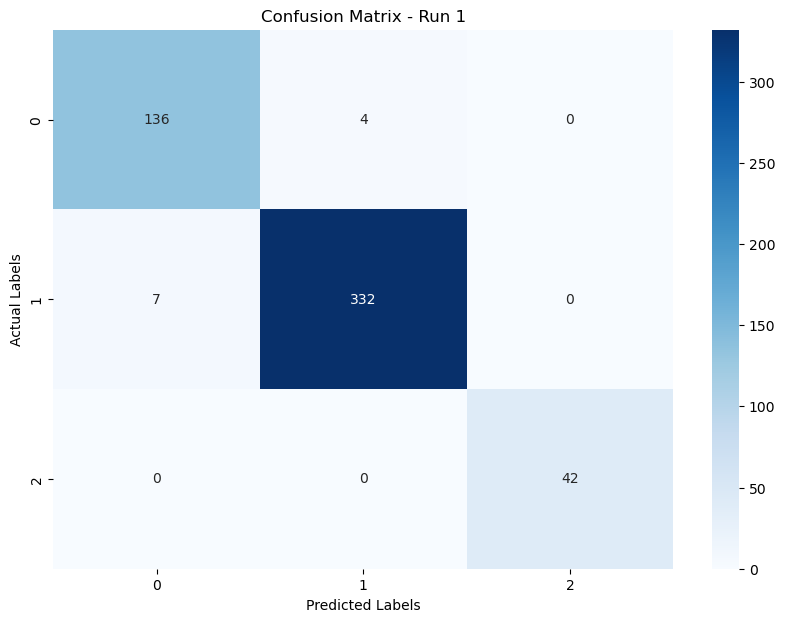

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       140
           1       0.99      0.98      0.98       339
           2       1.00      1.00      1.00        42

    accuracy                           0.98       521
   macro avg       0.98      0.98      0.98       521
weighted avg       0.98      0.98      0.98       521

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.023167736324376232
At iteration 2, the best solution fitness is 0.020955044385796522
At iteration 3, the best solution fitness is 0.018586102447216923
At iteration 4, the best solution fitness is 0.01462946857005762
At iteration 5, the best solution fitness is 0.01462946857005762
At iteration 6, the best solution fitness is 0.01462946857005762
At iteration 7, the best solution fitness is 0.01462946857005762
At iteration 8, the best solution fitness is 0.01462946857005762
At iteration 9, the best solution fitness is 

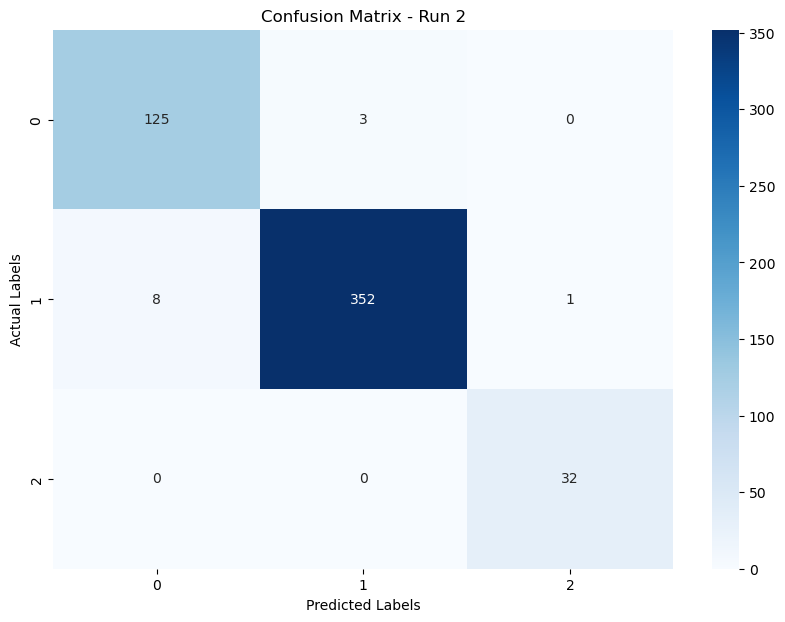

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       128
           1       0.99      0.98      0.98       361
           2       0.97      1.00      0.98        32

    accuracy                           0.98       521
   macro avg       0.97      0.98      0.98       521
weighted avg       0.98      0.98      0.98       521

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.034699946017274434
At iteration 2, the best solution fitness is 0.03233100407869484
At iteration 3, the best solution fitness is 0.03233100407869484
At iteration 4, the best solution fitness is 0.032096629078694844
At iteration 5, the best solution fitness is 0.03201850407869484
At iteration 6, the best solution fitness is 0.03194037907869484
At iteration 7, the best solution fitness is 0.03194037907869484
At iteration 8, the best solution fitness is 0.03194037907869484
At iteration 9, the best solution fitness is 0

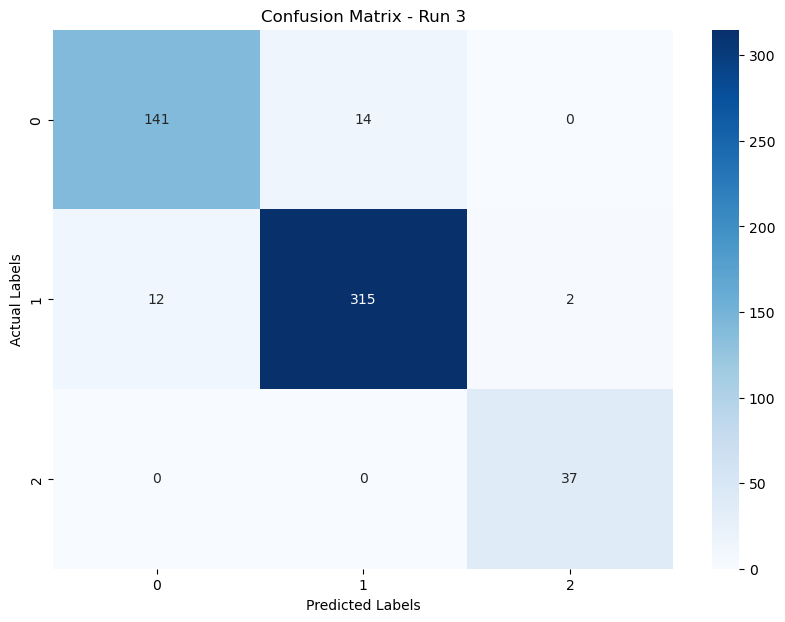

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       155
           1       0.96      0.96      0.96       329
           2       0.95      1.00      0.97        37

    accuracy                           0.95       521
   macro avg       0.94      0.96      0.95       521
weighted avg       0.95      0.95      0.95       521

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.026708553262955827
At iteration 2, the best solution fitness is 0.026708553262955827
At iteration 3, the best solution fitness is 0.026708553262955827
At iteration 4, the best solution fitness is 0.02663042826295583
At iteration 5, the best solution fitness is 0.026239803262955826
At iteration 6, the best solution fitness is 0.024261486324376233
At iteration 7, the best solution fitness is 0.024105236324376233
At iteration 8, the best solution fitness is 0.024105236324376233
At iteration 9, the best solution fitness

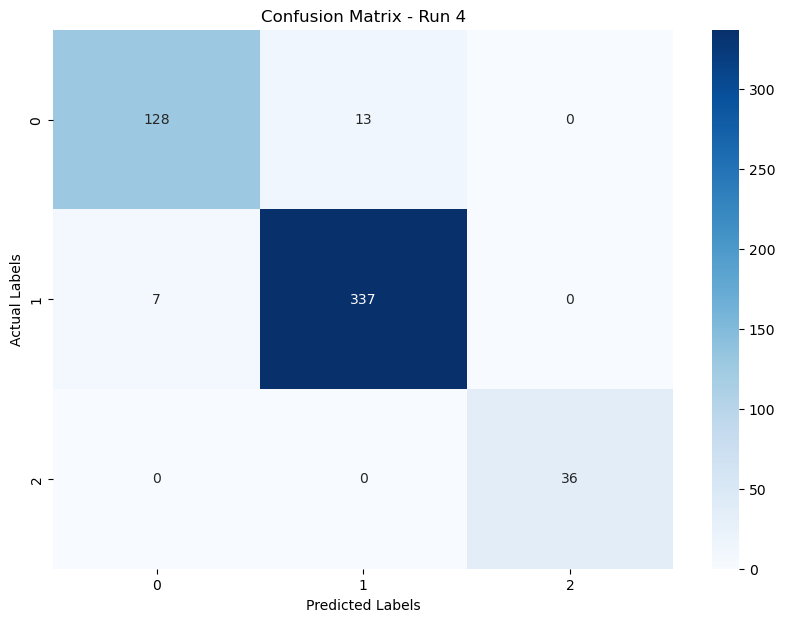

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       141
           1       0.96      0.98      0.97       344
           2       1.00      1.00      1.00        36

    accuracy                           0.96       521
   macro avg       0.97      0.96      0.97       521
weighted avg       0.96      0.96      0.96       521

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.02824331214011513
At iteration 2, the best solution fitness is 0.020564419385796524
At iteration 3, the best solution fitness is 0.018586102447216923
At iteration 4, the best solution fitness is 0.018586102447216923
At iteration 5, the best solution fitness is 0.01660778550863722
At iteration 6, the best solution fitness is 0.016529660508637217
At iteration 7, the best solution fitness is 0.01470759357005762
At iteration 8, the best solution fitness is 0.01470759357005762
At iteration 9, the best solution fitness is

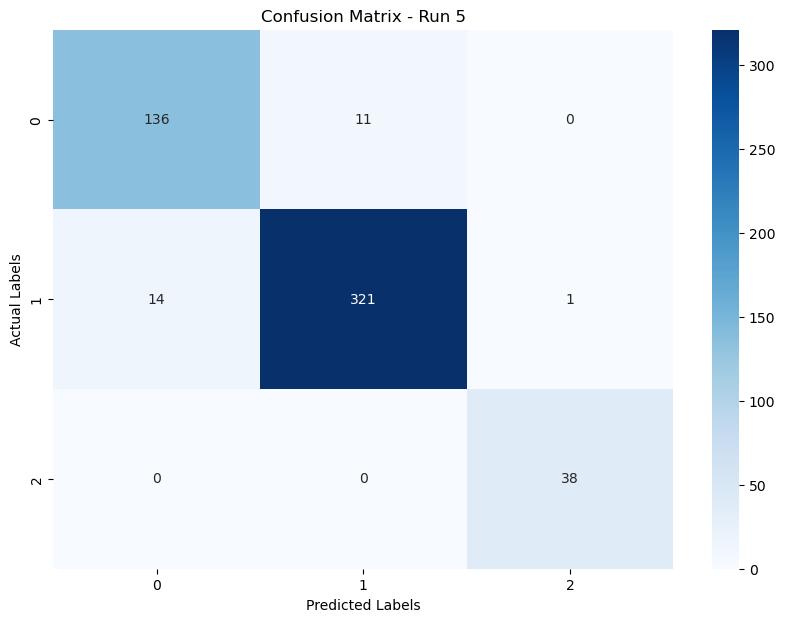

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       147
           1       0.97      0.96      0.96       336
           2       0.97      1.00      0.99        38

    accuracy                           0.95       521
   macro avg       0.95      0.96      0.95       521
weighted avg       0.95      0.95      0.95       521



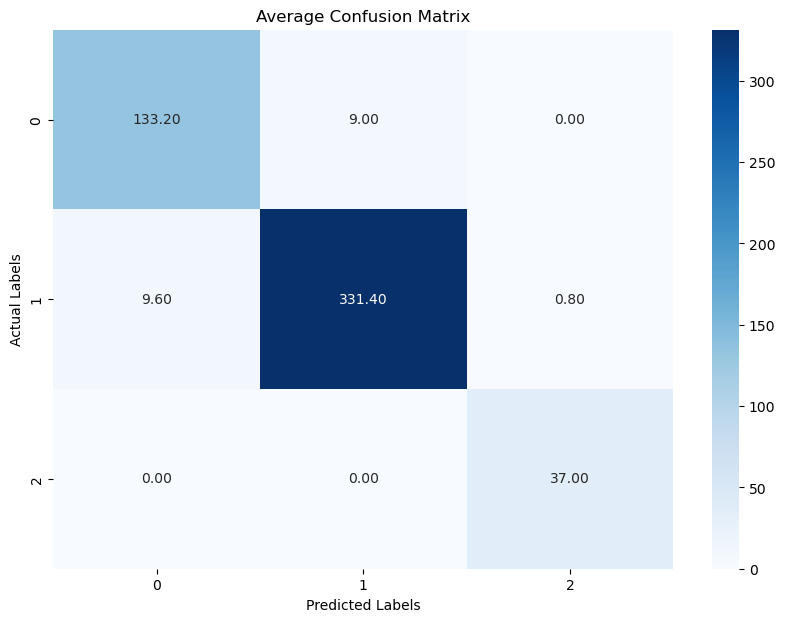


Average Classification Report:
Accuracy: 0.9628
Precision: 0.9618
Recall: 0.9692
F1-Score: 0.9653

Average Number of Features Selected Each Run: 32.40

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9628, STD=0.0134
Precision: AVG=0.9618, STD=0.0138
Recall: AVG=0.9692, STD=0.0121
F1-Score: AVG=0.9653, STD=0.0122


In [34]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [31]:
data = pd.read_csv('data4(Multi)_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5161, 128)
(5161,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.0412267287234043
At iteration 2, the best solution fitness is 0.0406017287234043
At iteration 3, the best solution fitness is 0.0406017287234043
At iteration 4, the best solution fitness is 0.0406017287234043
At iteration 5, the best solution fitness is 0.0406017287234043
At iteration 6, the best solution fitness is 0.0406017287234043
At iteration 7, the best solution fitness is 0.0406017287234043
At iteration 8, the best solution fitness is 0.03876496010638298
At iteration 9, the best solution fitness is 0.03876496010638298
At iteration 10, the best solution fitness is 0.03587267287234045
At iteration 11, the best solution fitness is 0.03587267287234045
At iteration 12, the best solution fitness is 0.03587267287234045
At iteration 13, the best solution fitness is 0.03587267287234045
At iteration 14, the best solution fitness is 0.03587267287234045
At iteration 15, the best solution fitness is 0.03587267287234045
At ite

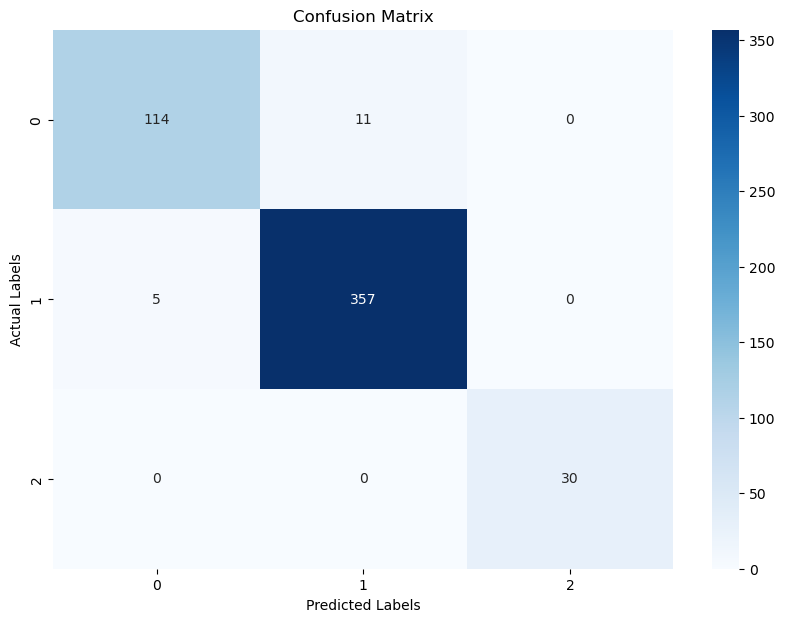

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.046971409574468034
At iteration 2, the best solution fitness is 0.043063497340425506
At iteration 3, the best solution fitness is 0.0413048537234043
At iteration 4, the best solution fitness is 0.0413048537234043
At iteration 5, the best solution fitness is 0.0413048537234043
At iteration 6, the best solution fitness is 0.03915558510638298
At iteration 7, the best solution fitness is 0.03915558510638298
At iteration 8, the best solution fitness is 0.03563829787234045
At iteration 9, the best solution fitness is 0.03563829787234045
At iteration 10, the best solution fitness is 0.03563829787234045
At iteration 11, the best solution fitness is 0.03563829787234045
At iteration 12, the best solution fitness is 0.03563829787234045
At iteration 13, the best solution fitness is 0.035169547872340445
At iteration 14, the best solution fitness is 0.035169547872340445
At iteration 15, the best solution fitness is 0.0351695478723404

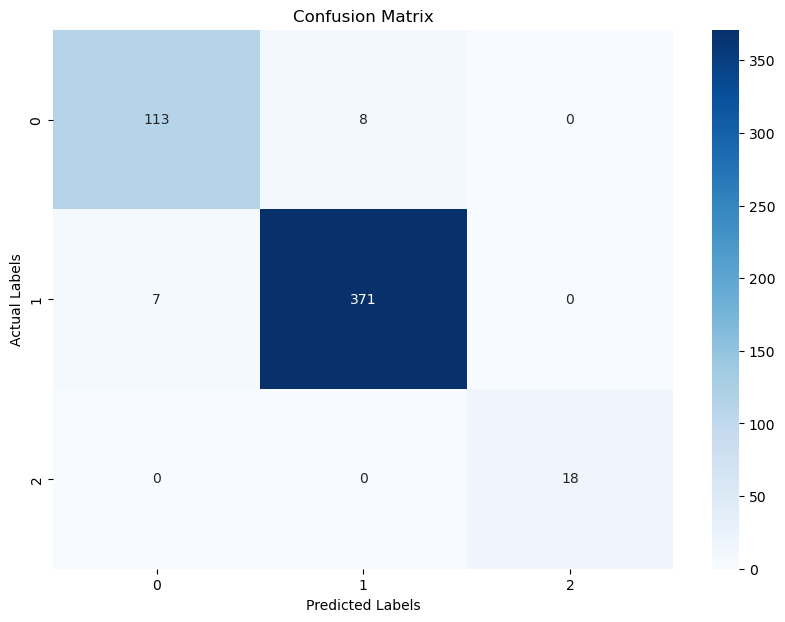

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.04267287234042551
At iteration 2, the best solution fitness is 0.04267287234042551
At iteration 3, the best solution fitness is 0.04267287234042551
At iteration 4, the best solution fitness is 0.03938996010638298
At iteration 5, the best solution fitness is 0.03938996010638298
At iteration 6, the best solution fitness is 0.03938996010638298
At iteration 7, the best solution fitness is 0.03938996010638298
At iteration 8, the best solution fitness is 0.03938996010638298
At iteration 9, the best solution fitness is 0.03938996010638298
At iteration 10, the best solution fitness is 0.035482047872340446
At iteration 11, the best solution fitness is 0.035482047872340446
At iteration 12, the best solution fitness is 0.035482047872340446
At iteration 13, the best solution fitness is 0.035482047872340446
At iteration 14, the best solution fitness is 0.035482047872340446
At iteration 15, the best solution fitness is 0.035482047872

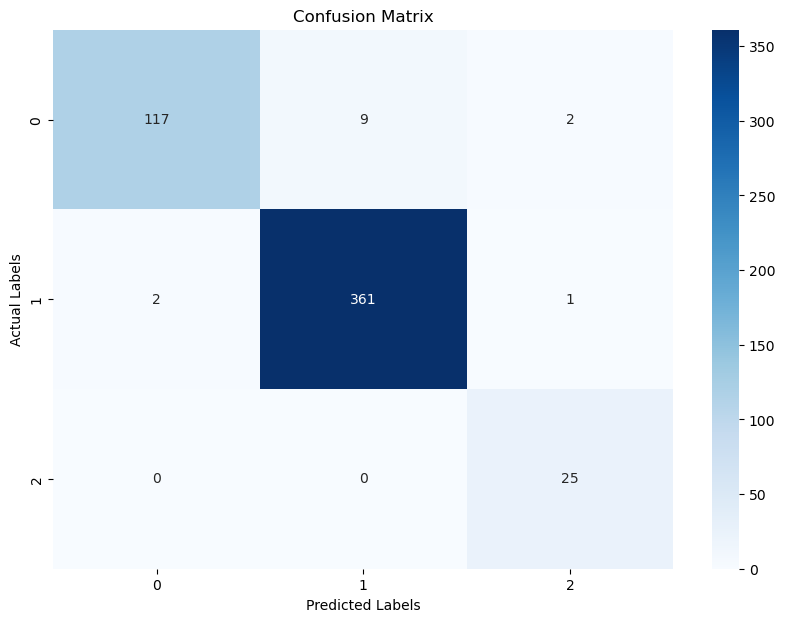

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.03180851063829792
At iteration 2, the best solution fitness is 0.03180851063829792
At iteration 3, the best solution fitness is 0.03180851063829792
At iteration 4, the best solution fitness is 0.03180851063829792
At iteration 5, the best solution fitness is 0.03180851063829792
At iteration 6, the best solution fitness is 0.03180851063829792
At iteration 7, the best solution fitness is 0.03180851063829792
At iteration 8, the best solution fitness is 0.03180851063829792
At iteration 9, the best solution fitness is 0.03180851063829792
At iteration 10, the best solution fitness is 0.03180851063829792
At iteration 11, the best solution fitness is 0.03180851063829792
At iteration 12, the best solution fitness is 0.03180851063829792
At iteration 13, the best solution fitness is 0.03180851063829792
At iteration 14, the best solution fitness is 0.03180851063829792
At iteration 15, the best solution fitness is 0.03180851063829792

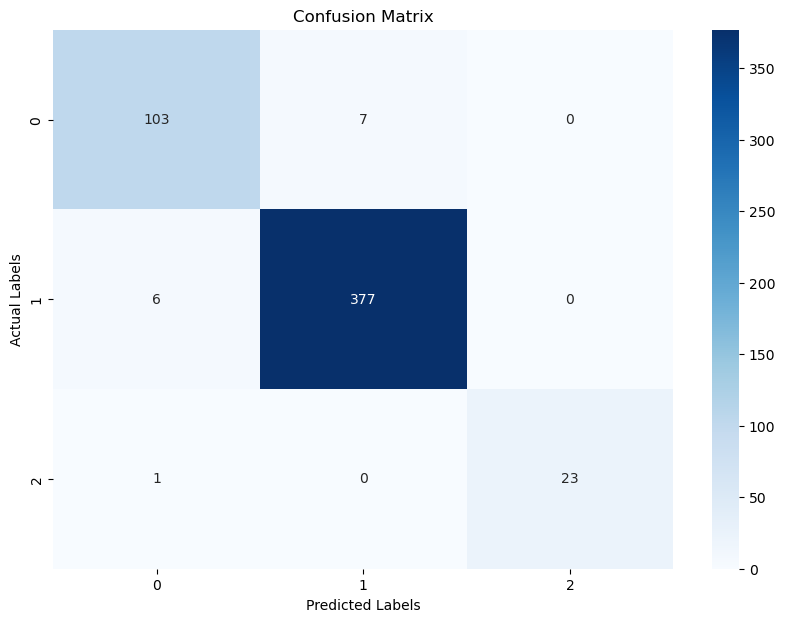

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.0409923537234043
At iteration 2, the best solution fitness is 0.0408361037234043
At iteration 3, the best solution fitness is 0.03731881648936166
At iteration 4, the best solution fitness is 0.03731881648936166
At iteration 5, the best solution fitness is 0.03731881648936166
At iteration 6, the best solution fitness is 0.03731881648936166
At iteration 7, the best solution fitness is 0.03731881648936166
At iteration 8, the best solution fitness is 0.03708444148936166
At iteration 9, the best solution fitness is 0.03708444148936166
At iteration 10, the best solution fitness is 0.03708444148936166
At iteration 11, the best solution fitness is 0.03708444148936166
At iteration 12, the best solution fitness is 0.03708444148936166
At iteration 13, the best solution fitness is 0.03587267287234045
At iteration 14, the best solution fitness is 0.03587267287234045
At iteration 15, the best solution fitness is 0.03587267287234045
A

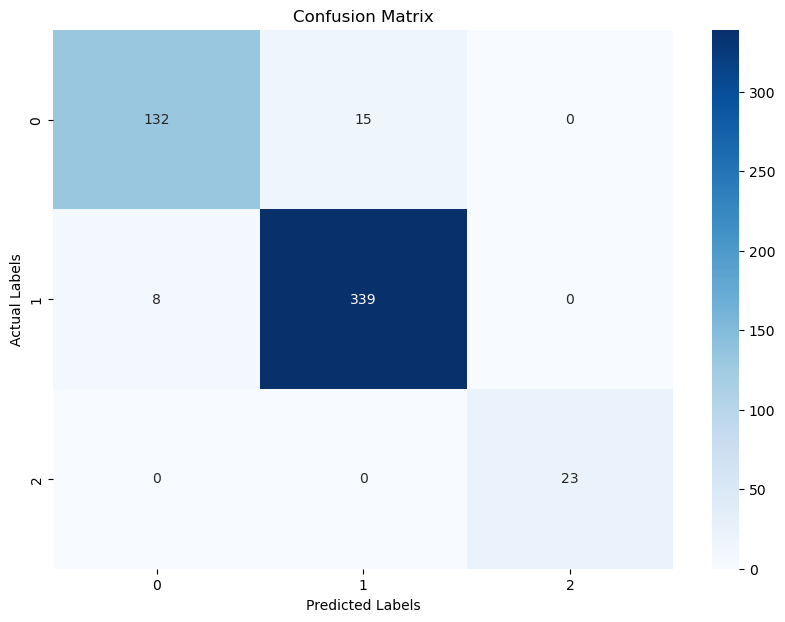


Average Number of Features Selected Each Run: 63.60

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9683, STD=0.0065
Precision: AVG=0.9679, STD=0.0092
Recall: AVG=0.9649, STD=0.0052
F1-Score: AVG=0.9660, STD=0.0053


In [29]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 30
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.02930851063829792
At iteration 2, the best solution fitness is 0.02563497340425528
At iteration 3, the best solution fitness is 0.02532247340425528
At iteration 4, the best solution fitness is 0.021414561170212752
At iteration 5, the best solution fitness is 0.019343417553191543
At iteration 6, the best solution fitness is 0.019187167553191543
At iteration 7, the best solution fitness is 0.019187167553191543
At iteration 8, the best solution fitness is 0.019187167553191543
At iteration 9, the best solution fitness is 0.019187167553191543
At iteration 10, the best solution fitness is 0.019187167553191543
At iteration 11, the best solution fitness is 0.019187167553191543
At iteration 12, the best solution fitness is 0.019187167553191543
At iteration 13, the best solution fitness is 0.019187167553191543
At iteration 14, the best solution fitness is 0.019187167553191543
At iteration 15, the best solution fitness is 0.019187

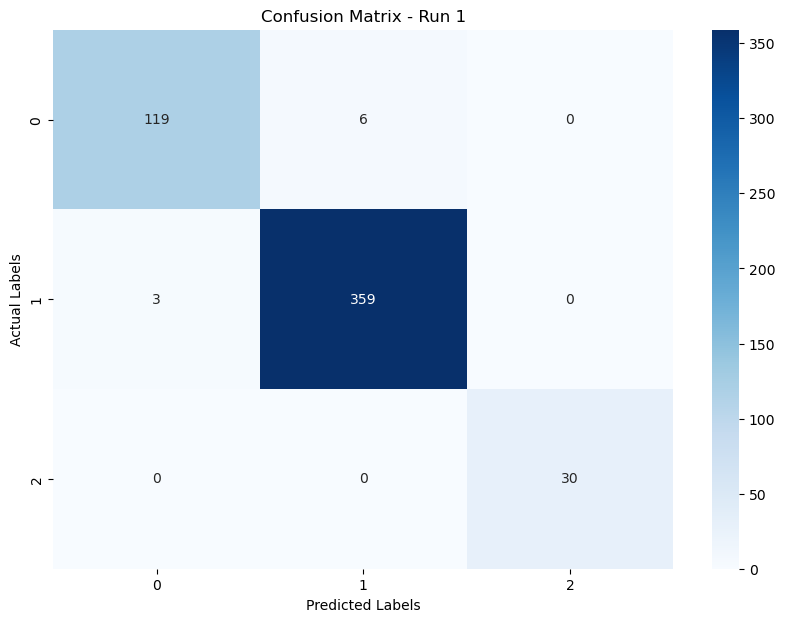

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       125
           1       0.98      0.99      0.99       362
           2       1.00      1.00      1.00        30

    accuracy                           0.98       517
   macro avg       0.99      0.98      0.98       517
weighted avg       0.98      0.98      0.98       517

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.02563497340425528
At iteration 2, the best solution fitness is 0.02356382978723407
At iteration 3, the best solution fitness is 0.017506648936170224
At iteration 4, the best solution fitness is 0.017428523936170226
At iteration 5, the best solution fitness is 0.017428523936170226
At iteration 6, the best solution fitness is 0.017428523936170226
At iteration 7, the best solution fitness is 0.017428523936170226
At iteration 8, the best solution fitness is 0.017350398936170224
At iteration 9, the best solution fitness 

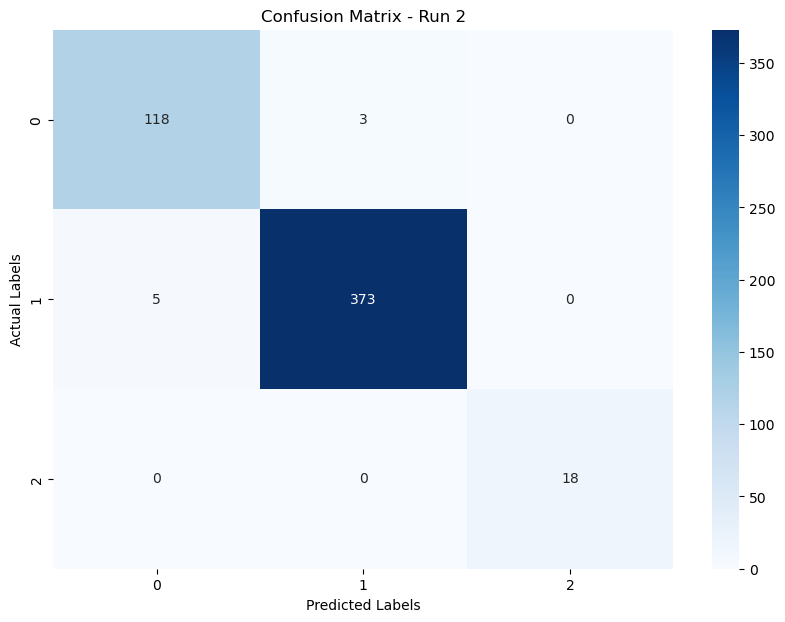

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.99      0.99      0.99       378
           2       1.00      1.00      1.00        18

    accuracy                           0.98       517
   macro avg       0.98      0.99      0.99       517
weighted avg       0.98      0.98      0.98       517

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.03462267287234045
At iteration 2, the best solution fitness is 0.030871010638297922
At iteration 3, the best solution fitness is 0.030480385638297924
At iteration 4, the best solution fitness is 0.030402260638297922
At iteration 5, the best solution fitness is 0.030402260638297922
At iteration 6, the best solution fitness is 0.030324135638297924
At iteration 7, the best solution fitness is 0.03024601063829792
At iteration 8, the best solution fitness is 0.03024601063829792
At iteration 9, the best solution fitness i

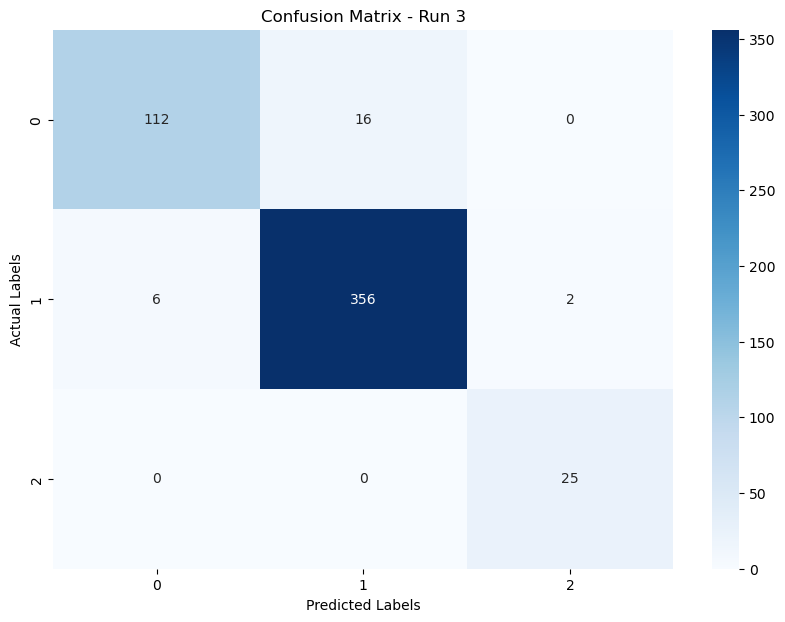

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       128
           1       0.96      0.98      0.97       364
           2       0.93      1.00      0.96        25

    accuracy                           0.95       517
   macro avg       0.94      0.95      0.95       517
weighted avg       0.95      0.95      0.95       517

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.03739694148936166
At iteration 2, the best solution fitness is 0.03180851063829792
At iteration 3, the best solution fitness is 0.03133976063829792
At iteration 4, the best solution fitness is 0.029268617021276602
At iteration 5, the best solution fitness is 0.029268617021276602
At iteration 6, the best solution fitness is 0.029190492021276604
At iteration 7, the best solution fitness is 0.029190492021276604
At iteration 8, the best solution fitness is 0.029112367021276602
At iteration 9, the best solution fitness i

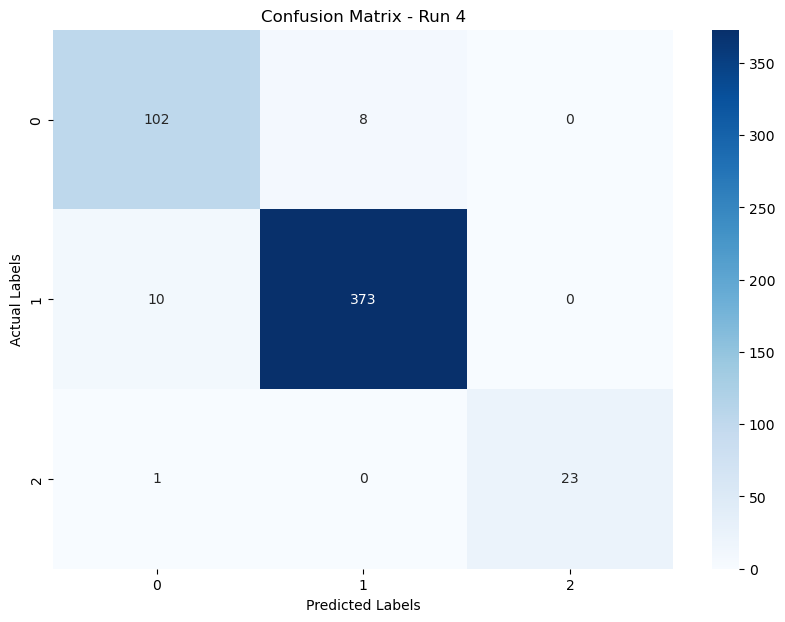

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       110
           1       0.98      0.97      0.98       383
           2       1.00      0.96      0.98        24

    accuracy                           0.96       517
   macro avg       0.96      0.95      0.96       517
weighted avg       0.96      0.96      0.96       517

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.028214760638297923
At iteration 2, the best solution fitness is 0.024228723404255283
At iteration 3, the best solution fitness is 0.023916223404255282
At iteration 4, the best solution fitness is 0.02383809840425528
At iteration 5, the best solution fitness is 0.02383809840425528
At iteration 6, the best solution fitness is 0.02383809840425528
At iteration 7, the best solution fitness is 0.02383809840425528
At iteration 8, the best solution fitness is 0.02383809840425528
At iteration 9, the best solution fitness is 

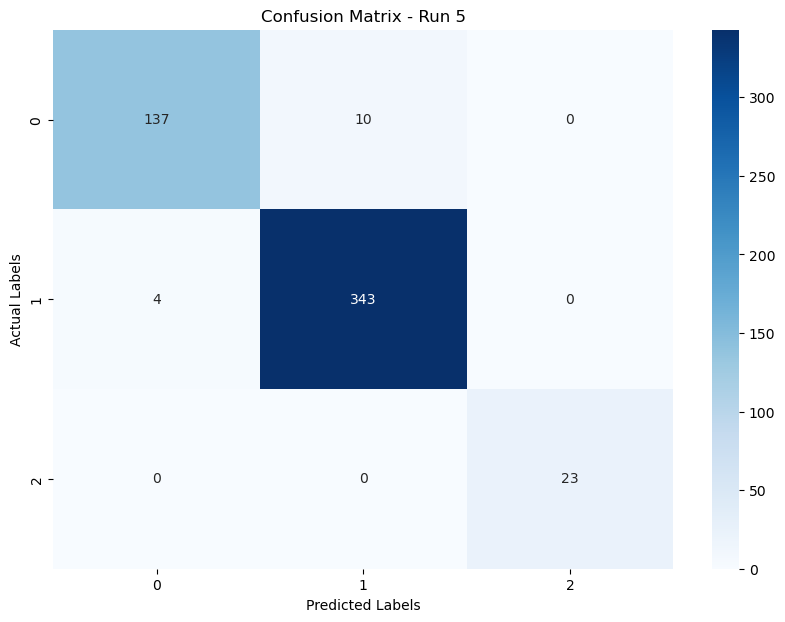

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       147
           1       0.97      0.99      0.98       347
           2       1.00      1.00      1.00        23

    accuracy                           0.97       517
   macro avg       0.98      0.97      0.98       517
weighted avg       0.97      0.97      0.97       517



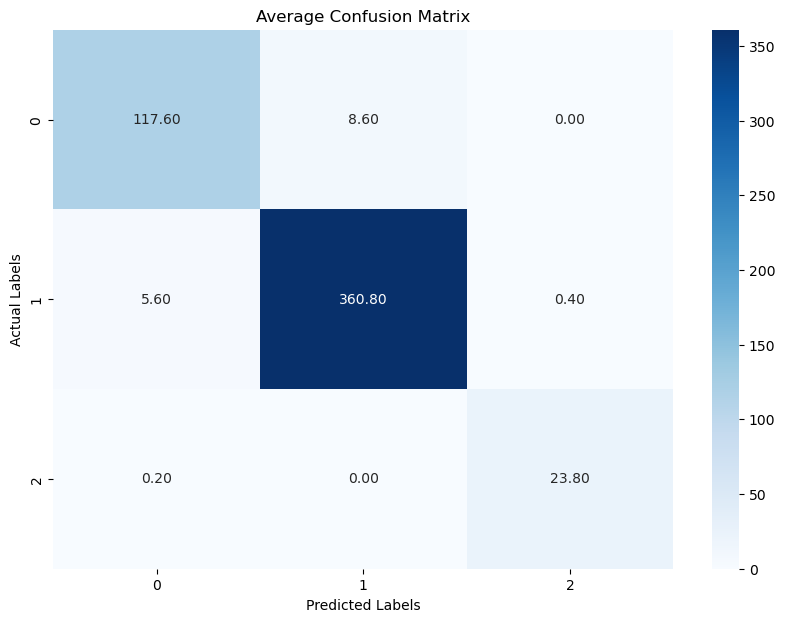


Average Classification Report:
Accuracy: 0.9714
Precision: 0.9712
Recall: 0.9692
F1-Score: 0.9699

Average Number of Features Selected Each Run: 31.00

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9714, STD=0.0117
Precision: AVG=0.9712, STD=0.0164
Recall: AVG=0.9692, STD=0.0147
F1-Score: AVG=0.9699, STD=0.0156


In [32]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


In [27]:
data = pd.read_csv('data5(Multi)_Cleaned.csv')
data.head()

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the column representing the class labels
X = data.drop('marker', axis=1)
y = data['marker']
print (X.shape)
print (y.shape)

(5161, 128)
(5161,)


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.04482214095744683
At iteration 2, the best solution fitness is 0.03778756648936166
At iteration 3, the best solution fitness is 0.03692819148936166
At iteration 4, the best solution fitness is 0.03692819148936166
At iteration 5, the best solution fitness is 0.03692819148936166
At iteration 6, the best solution fitness is 0.03692819148936166
At iteration 7, the best solution fitness is 0.03692819148936166
At iteration 8, the best solution fitness is 0.03692819148936166
At iteration 9, the best solution fitness is 0.03692819148936166
At iteration 10, the best solution fitness is 0.03692819148936166
At iteration 11, the best solution fitness is 0.03692819148936166
At iteration 12, the best solution fitness is 0.03692819148936166
At iteration 13, the best solution fitness is 0.03692819148936166
At iteration 14, the best solution fitness is 0.03692819148936166
At iteration 15, the best solution fitness is 0.03692819148936166

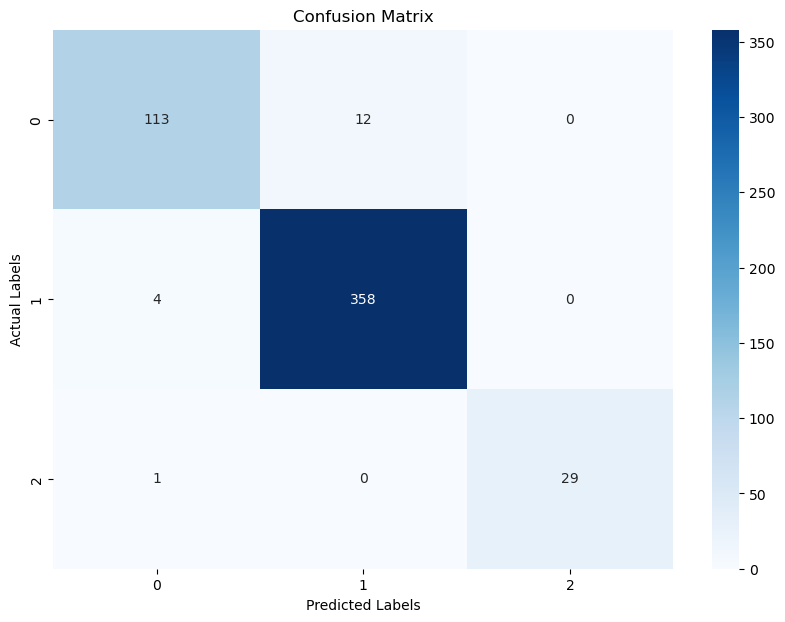

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.03763131648936166
At iteration 2, the best solution fitness is 0.03763131648936166
At iteration 3, the best solution fitness is 0.03763131648936166
At iteration 4, the best solution fitness is 0.03739694148936166
At iteration 5, the best solution fitness is 0.03739694148936166
At iteration 6, the best solution fitness is 0.03739694148936166
At iteration 7, the best solution fitness is 0.03739694148936166
At iteration 8, the best solution fitness is 0.03739694148936166
At iteration 9, the best solution fitness is 0.03739694148936166
At iteration 10, the best solution fitness is 0.03739694148936166
At iteration 11, the best solution fitness is 0.03739694148936166
At iteration 12, the best solution fitness is 0.03739694148936166
At iteration 13, the best solution fitness is 0.03739694148936166
At iteration 14, the best solution fitness is 0.03739694148936166
At iteration 15, the best solution fitness is 0.03739694148936166

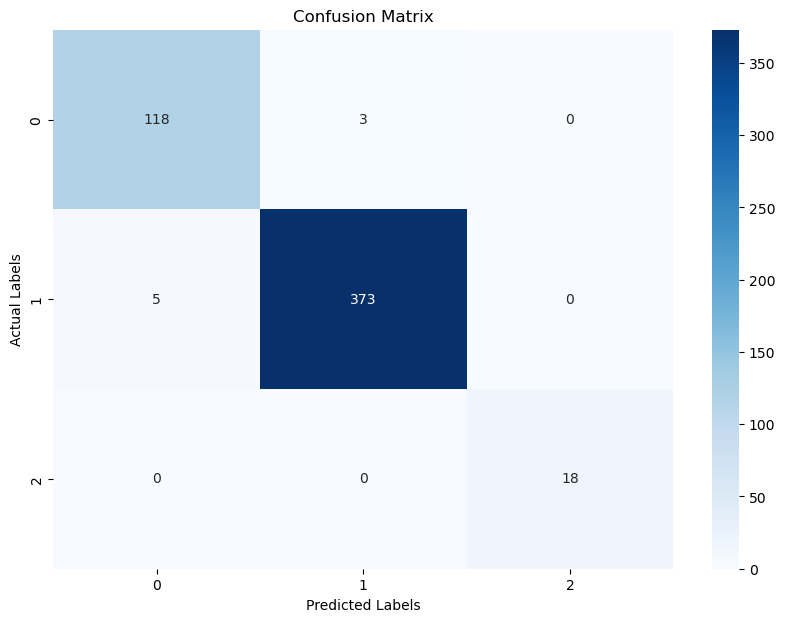

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.03931183510638298
At iteration 2, the best solution fitness is 0.03493517287234045
At iteration 3, the best solution fitness is 0.03493517287234045
At iteration 4, the best solution fitness is 0.03493517287234045
At iteration 5, the best solution fitness is 0.03493517287234045
At iteration 6, the best solution fitness is 0.03493517287234045
At iteration 7, the best solution fitness is 0.03493517287234045
At iteration 8, the best solution fitness is 0.03493517287234045
At iteration 9, the best solution fitness is 0.03493517287234045
At iteration 10, the best solution fitness is 0.03493517287234045
At iteration 11, the best solution fitness is 0.03493517287234045
At iteration 12, the best solution fitness is 0.03493517287234045
At iteration 13, the best solution fitness is 0.03493517287234045
At iteration 14, the best solution fitness is 0.03493517287234045
At iteration 15, the best solution fitness is 0.03493517287234045

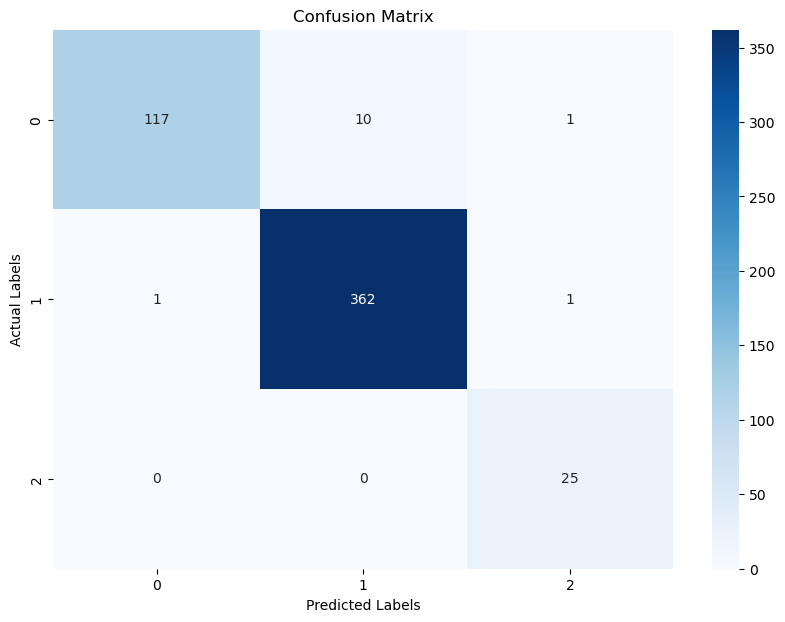

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.037240691489361655
At iteration 2, the best solution fitness is 0.037240691489361655
At iteration 3, the best solution fitness is 0.037240691489361655
At iteration 4, the best solution fitness is 0.037240691489361655
At iteration 5, the best solution fitness is 0.037240691489361655
At iteration 6, the best solution fitness is 0.03477892287234045
At iteration 7, the best solution fitness is 0.03477892287234045
At iteration 8, the best solution fitness is 0.03477892287234045
At iteration 9, the best solution fitness is 0.03477892287234045
At iteration 10, the best solution fitness is 0.03477892287234045
At iteration 11, the best solution fitness is 0.03477892287234045
At iteration 12, the best solution fitness is 0.03477892287234045
At iteration 13, the best solution fitness is 0.033645279255319134
At iteration 14, the best solution fitness is 0.033645279255319134
At iteration 15, the best solution fitness is 0.0336452792

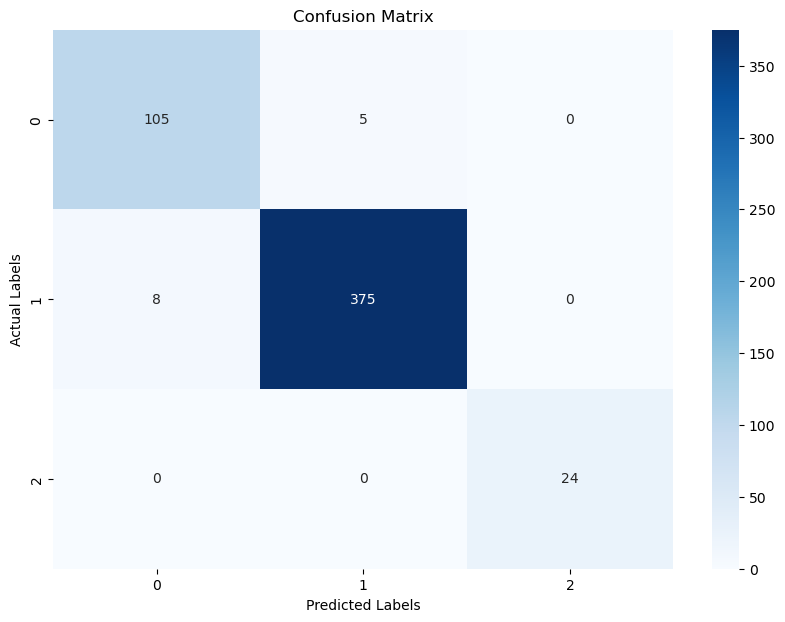

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.03645944148936166
At iteration 2, the best solution fitness is 0.03645944148936166
At iteration 3, the best solution fitness is 0.03645944148936166
At iteration 4, the best solution fitness is 0.03645944148936166
At iteration 5, the best solution fitness is 0.03645944148936166
At iteration 6, the best solution fitness is 0.03645944148936166
At iteration 7, the best solution fitness is 0.03645944148936166
At iteration 8, the best solution fitness is 0.03645944148936166
At iteration 9, the best solution fitness is 0.03645944148936166
At iteration 10, the best solution fitness is 0.03645944148936166
At iteration 11, the best solution fitness is 0.03645944148936166
At iteration 12, the best solution fitness is 0.03645944148936166
At iteration 13, the best solution fitness is 0.03645944148936166
At iteration 14, the best solution fitness is 0.03645944148936166
At iteration 15, the best solution fitness is 0.03645944148936166

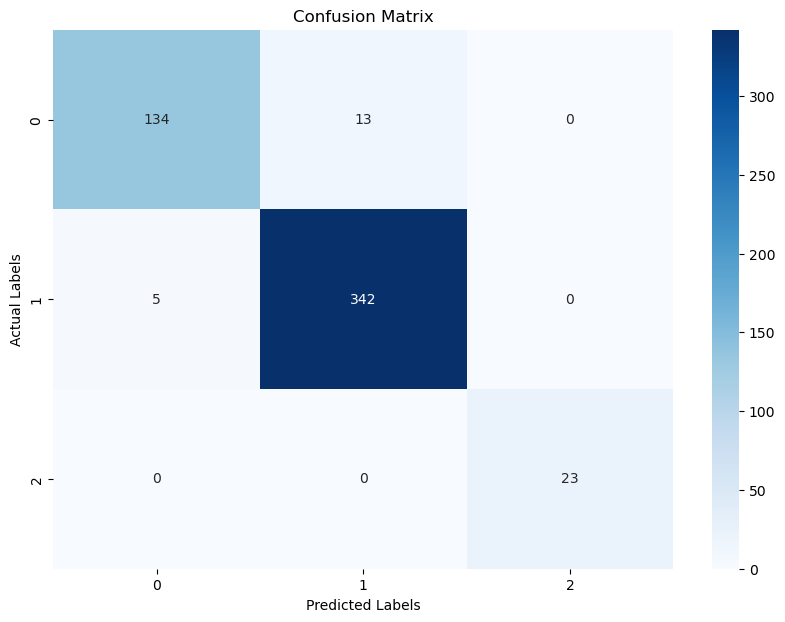


Average Number of Features Selected Each Run: 57.20

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9733, STD=0.0069
Precision: AVG=0.9740, STD=0.0065
Recall: AVG=0.9707, STD=0.0115
F1-Score: AVG=0.9720, STD=0.0078


In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X, y, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X[:, selected_features] if not isinstance(X, pd.DataFrame) else X.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def AOA(N, M_Iter, LB, UB, Dim, X, y, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X, y, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB - LB) * Mu + LB)
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = Best_P[j] / (MOP + np.finfo(float).eps) * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] * MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X, y, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve

N = 30
M_Iter = 30
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X, y)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    all_accuracies.append(accuracy_score(y_test, y_pred))
    all_precisions.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    all_recalls.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    all_f1_scores.append(f1_score(y_test, y_pred, average='macro', zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")


Run 1/5
AOA Working
At iteration 1, the best solution fitness is 0.028996010638297924
At iteration 2, the best solution fitness is 0.023016954787234072
At iteration 3, the best solution fitness is 0.021102061170212752
At iteration 4, the best solution fitness is 0.021102061170212752
At iteration 5, the best solution fitness is 0.020945811170212752
At iteration 6, the best solution fitness is 0.020945811170212752
At iteration 7, the best solution fitness is 0.018952792553191544
At iteration 8, the best solution fitness is 0.018952792553191544
At iteration 9, the best solution fitness is 0.018952792553191544
At iteration 10, the best solution fitness is 0.018952792553191544
At iteration 11, the best solution fitness is 0.018952792553191544
At iteration 12, the best solution fitness is 0.018952792553191544
At iteration 13, the best solution fitness is 0.018952792553191544
At iteration 14, the best solution fitness is 0.018952792553191544
At iteration 15, the best solution fitness is 0.018

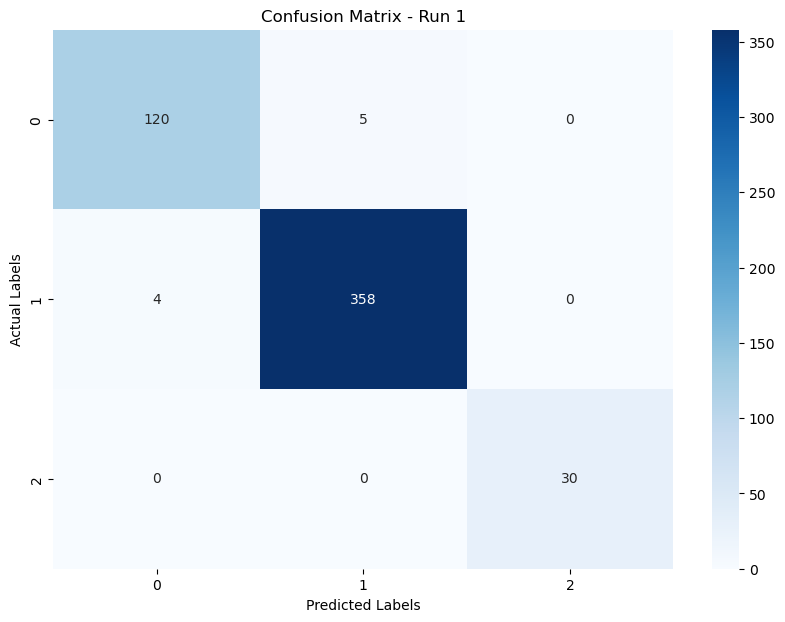

Classification Report - Run 1:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       125
           1       0.99      0.99      0.99       362
           2       1.00      1.00      1.00        30

    accuracy                           0.98       517
   macro avg       0.98      0.98      0.98       517
weighted avg       0.98      0.98      0.98       517

Run 2/5
AOA Working
At iteration 1, the best solution fitness is 0.036850066489361656
At iteration 2, the best solution fitness is 0.03477892287234045
At iteration 3, the best solution fitness is 0.03270777925531913
At iteration 4, the best solution fitness is 0.030714760638297922
At iteration 5, the best solution fitness is 0.026806848404255283
At iteration 6, the best solution fitness is 0.026806848404255283
At iteration 7, the best solution fitness is 0.026806848404255283
At iteration 8, the best solution fitness is 0.026806848404255283
At iteration 9, the best solution fitness 

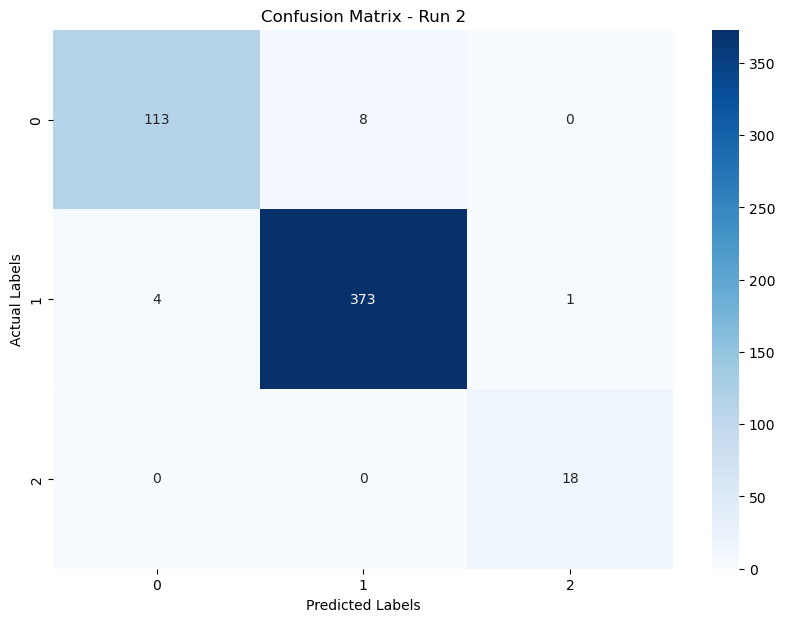

Classification Report - Run 2:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       121
           1       0.98      0.99      0.98       378
           2       0.95      1.00      0.97        18

    accuracy                           0.97       517
   macro avg       0.96      0.97      0.97       517
weighted avg       0.97      0.97      0.97       517

Run 3/5
AOA Working
At iteration 1, the best solution fitness is 0.026612367021276603
At iteration 2, the best solution fitness is 0.020945811170212752
At iteration 3, the best solution fitness is 0.020867686170212753
At iteration 4, the best solution fitness is 0.020711436170212753
At iteration 5, the best solution fitness is 0.02063331117021275
At iteration 6, the best solution fitness is 0.02063331117021275
At iteration 7, the best solution fitness is 0.02063331117021275
At iteration 8, the best solution fitness is 0.02063331117021275
At iteration 9, the best solution fitness is

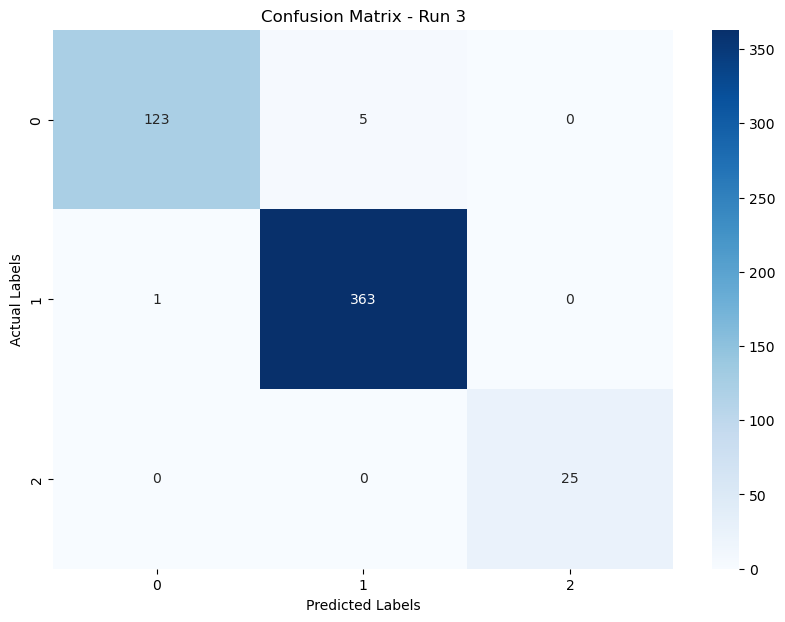

Classification Report - Run 3:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       128
           1       0.99      1.00      0.99       364
           2       1.00      1.00      1.00        25

    accuracy                           0.99       517
   macro avg       0.99      0.99      0.99       517
weighted avg       0.99      0.99      0.99       517

Run 4/5
AOA Working
At iteration 1, the best solution fitness is 0.030129654255319133
At iteration 2, the best solution fitness is 0.022470079787234074
At iteration 3, the best solution fitness is 0.020711436170212753
At iteration 4, the best solution fitness is 0.018796542553191544
At iteration 5, the best solution fitness is 0.018796542553191544
At iteration 6, the best solution fitness is 0.018796542553191544
At iteration 7, the best solution fitness is 0.018796542553191544
At iteration 8, the best solution fitness is 0.018796542553191544
At iteration 9, the best solution fitnes

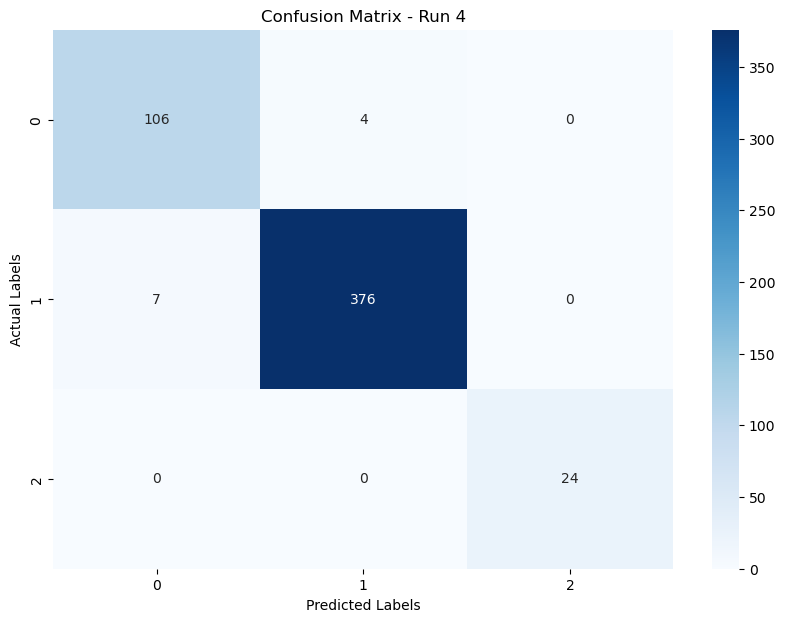

Classification Report - Run 4:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       110
           1       0.99      0.98      0.99       383
           2       1.00      1.00      1.00        24

    accuracy                           0.98       517
   macro avg       0.98      0.98      0.98       517
weighted avg       0.98      0.98      0.98       517

Run 5/5
AOA Working
At iteration 1, the best solution fitness is 0.02579122340425528
At iteration 2, the best solution fitness is 0.023798204787234073
At iteration 3, the best solution fitness is 0.02180518617021275
At iteration 4, the best solution fitness is 0.02180518617021275
At iteration 5, the best solution fitness is 0.02164893617021275
At iteration 6, the best solution fitness is 0.02164893617021275
At iteration 7, the best solution fitness is 0.02164893617021275
At iteration 8, the best solution fitness is 0.02164893617021275
At iteration 9, the best solution fitness is 0.

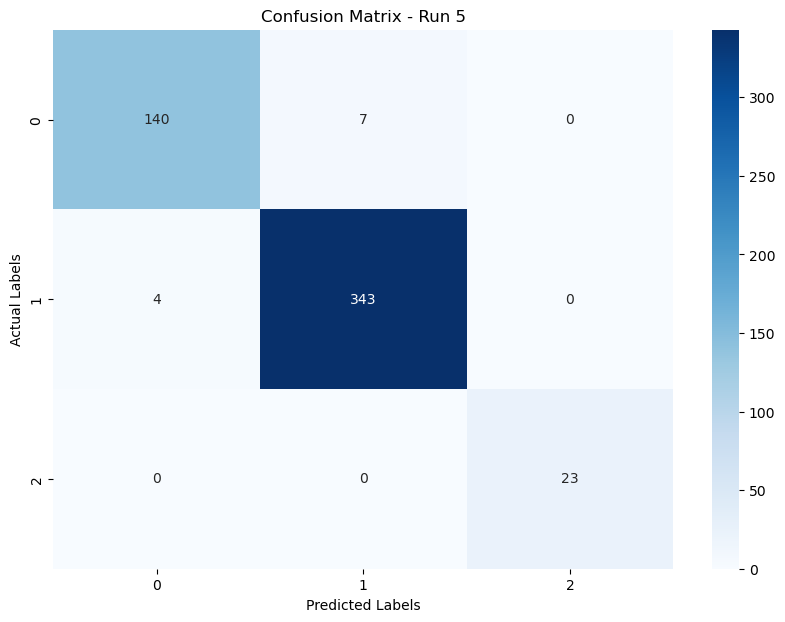

Classification Report - Run 5:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       147
           1       0.98      0.99      0.98       347
           2       1.00      1.00      1.00        23

    accuracy                           0.98       517
   macro avg       0.98      0.98      0.98       517
weighted avg       0.98      0.98      0.98       517



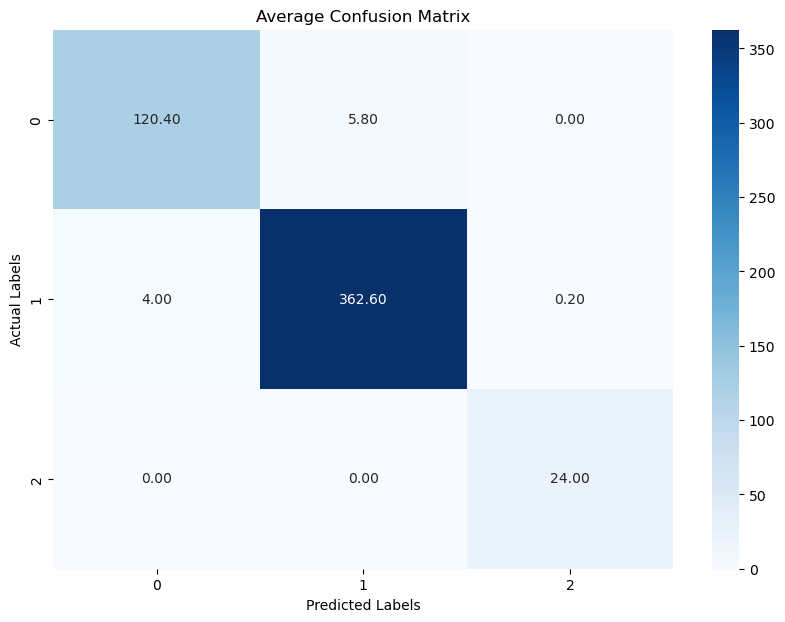


Average Classification Report:
Accuracy: 0.9807
Precision: 0.9803
Recall: 0.9809
F1-Score: 0.9805

Average Number of Features Selected Each Run: 27.20

Average and Standard Deviation after multiple runs:
Accuracy: AVG=0.9807, STD=0.0046
Precision: AVG=0.9803, STD=0.0097
Recall: AVG=0.9809, STD=0.0042
F1-Score: AVG=0.9805, STD=0.0069


In [30]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

def s_shaped_transformation(x):
    return 1 / (1 + np.exp(-x))

def cost_function(x, X_res, y_res, beta=0.01):
    alpha = 1 - beta  # Define alpha based on beta
    
    # Sigmoid-based transformation to determine inclusion probabilities
    inclusion_probabilities = s_shaped_transformation(x)
    selected_features = inclusion_probabilities > 0.5
    
    # If no features are selected, return a high cost to avoid trivial solutions
    if not np.any(selected_features):
        return alpha + beta  # Worst case: maximum error + maximum feature ratio
    
    # Apply feature selection
    X_selected = X_res[:, selected_features] if not isinstance(X_res, pd.DataFrame) else X_res.loc[:, selected_features]
    X_selected = np.ascontiguousarray(X_selected)  # Ensure the array is contiguous

    # Split and train the classifier
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.1, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train, y_train)
    error = 1 - classifier.score(X_test, y_test)  # Error rate is 1 - accuracy
    
    # Calculate the number of selected features and total features
    num_selected_features = np.sum(selected_features)
    total_features = X_res.shape[1]

    # Calculate the fitness
    fitness = alpha * error + beta * (num_selected_features / total_features)
    
    return fitness

def initialization(N, Dim, UB, LB):
    X = np.random.rand(N, Dim) * (UB - LB) + LB
    return X

def dynamic_opposite_learning(P_init, LB, UB):
    r8, r9 = np.random.rand(), np.random.rand()
    P_dobl = P_init * r8 * (r9 * (UB + LB - P_init)) - P_init
    return P_dobl

def laplace_crossover(parent1, parent2, b=1.0):
    # Generate a random number from Laplace distribution
    u = np.random.uniform(-0.5, 0.5, parent1.shape)
    return parent1 + (parent2 - parent1) * np.sign(u) * np.log(1 - 2 * np.abs(u)) * b

def AOA(N, M_Iter, LB, UB, Dim, X_res, y_res, beta=0.01):
    print('AOA Working')
    
    # Two variables to keep the positions and the fitness value of the best-obtained solution
    Best_P = np.zeros(Dim)
    Best_FF = np.inf
    Conv_curve = np.zeros(M_Iter)
    
    # Initialize the positions of solution
    X_pos = initialization(N, Dim, UB, LB)
    X_dobl = dynamic_opposite_learning(X_pos, LB, UB)
    X_pos = np.vstack((X_pos, X_dobl))
    Xnew = np.copy(X_pos)
    Ffun = np.zeros(X_pos.shape[0])  # (fitness values)
    Ffun_new = np.zeros(Xnew.shape[0])  # (fitness values)
    
    MOP_Max = 1
    MOP_Min = 0.2
    C_Iter = 1
    Alpha = 5
    Mu = 0.499
    
    for i in range(X_pos.shape[0]):
        Ffun[i] = cost_function(X_pos[i, :], X_res, y_res, beta)  # Calculate the fitness values of solutions
        if Ffun[i] < Best_FF:
            Best_FF = Ffun[i]
            Best_P = X_pos[i, :]
    
    while C_Iter < M_Iter + 1:  # Main loop
        MOP = 1 - ((C_Iter) ** (1 / Alpha) / (M_Iter) ** (1 / Alpha))  # Probability Ratio
        MOA = MOP_Min + C_Iter * ((MOP_Max - MOP_Min) / M_Iter)  # Accelerated function
        
        # Update the Position of solutions
        for i in range(X_pos.shape[0]):  # if each of the UB and LB has a just value
            for j in range(X_pos.shape[1]):
                r1 = np.random.rand()
                if len(LB) == 1:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            # Apply Laplace crossover
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB - LB) * Mu + LB)
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB - LB) * Mu + LB)
                else:
                    if r1 < MOA:
                        r2 = np.random.rand()
                        if r2 > 0.5:
                            Xnew[i, j] = laplace_crossover(Best_P[j], X_pos[i, j])
                        else:
                            Xnew[i, j] = laplace_crossover(X_pos[i, j], Best_P[j])
                    else:
                        r3 = np.random.rand()
                        if r3 > 0.5:
                            Xnew[i, j] = Best_P[j] - MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                        else:
                            Xnew[i, j] = Best_P[j] + MOP * ((UB[j] - LB[j]) * Mu + LB[j])
                
            Flag_UB = Xnew[i, :] > UB  # check if they exceed (up) the boundaries
            Flag_LB = Xnew[i, :] < LB  # check if they exceed (down) the boundaries
            Xnew[i, :] = (Xnew[i, :] * (~(Flag_UB + Flag_LB))) + UB * Flag_UB + LB * Flag_LB
            
            Ffun_new[i] = cost_function(Xnew[i, :], X_res, y_res, beta)  # calculate Fitness function
            if Ffun_new[i] < Ffun[i]:
                X_pos[i, :] = Xnew[i, :]
                Ffun[i] = Ffun_new[i]
            if Ffun[i] < Best_FF:
                Best_FF = Ffun[i]
                Best_P = X_pos[i, :]
        
        # Update the convergence curve
        Conv_curve[C_Iter - 1] = Best_FF
        
        # Print the best solution details at each iteration
        print(f'At iteration {C_Iter}, the best solution fitness is {Best_FF}')
        
        C_Iter += 1  # incremental iteration
    
    return Best_FF, Best_P, Conv_curve


N = 30
M_Iter = 20
LB = np.array([-10])
UB = np.array([10])
Dim = X.shape[1]
n_runs = 5

all_accuracies = []
all_precisions = []
all_recalls = []
all_f1_scores = []
selected_features_counts = []
classification_reports = []
confusion_matrices = []

for run in range(n_runs):
    print(f"Run {run + 1}/{n_runs}")
    Best_FF, Best_P, Conv_curve = AOA(N, M_Iter, LB, UB, Dim, X.values, y.values)
    
    # Convert cost back to accuracy
    best_accuracy = 1 - Best_FF
    print(f"Best Accuracy = {best_accuracy:.4f}")
    
    selected_features = s_shaped_transformation(Best_P) > 0.5
    selected_feature_indices = np.where(selected_features)[0]
    selected_features_counts.append(len(selected_feature_indices))

    # Proceed with data selection based on 'selected_features'
    X_selected = X.values[:, selected_feature_indices] if not isinstance(X, pd.DataFrame) else X.iloc[:, selected_feature_indices]
    X_selected = np.ascontiguousarray(X_selected)  # Convert to contiguous array
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42 + run)
    
    # Train and evaluate a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    all_accuracies.append(accuracy)
    all_precisions.append(precision)
    all_recalls.append(recall)
    all_f1_scores.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - Run {run + 1}')
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    # Print classification report for this run
    report = classification_report(y_test, y_pred, zero_division=0)
    classification_reports.append(report)
    print(f"Classification Report - Run {run + 1}:\n{report}")

# Calculate average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# Plot average confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(avg_confusion_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Calculate average classification report
precision_avg = np.mean(all_precisions)
recall_avg = np.mean(all_recalls)
f1_avg = np.mean(all_f1_scores)
accuracy_avg = np.mean(all_accuracies)

print("\nAverage Classification Report:")
print(f"Accuracy: {accuracy_avg:.4f}")
print(f"Precision: {precision_avg:.4f}")
print(f"Recall: {recall_avg:.4f}")
print(f"F1-Score: {f1_avg:.4f}")

avg_selected_features = np.mean(selected_features_counts)
print(f"\nAverage Number of Features Selected Each Run: {avg_selected_features:.2f}")

print("\nAverage and Standard Deviation after multiple runs:")
print(f"Accuracy: AVG={np.mean(all_accuracies):.4f}, STD={np.std(all_accuracies):.4f}")
print(f"Precision: AVG={np.mean(all_precisions):.4f}, STD={np.std(all_precisions):.4f}")
print(f"Recall: AVG={np.mean(all_recalls):.4f}, STD={np.std(all_recalls):.4f}")
print(f"F1-Score: AVG={np.mean(all_f1_scores):.4f}, STD={np.std(all_f1_scores):.4f}")
